In [1]:
from model import LeNet
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.backend import image_data_format
import matplotlib.pyplot as plt
import numpy as np

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
print("[INFO] accessing MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

print('Straight from the dataset:')
print('Training data shape: {}'.format(trainData.shape))
print('Training labels shape: {}'.format(trainLabels.shape))
print('Test data shape: {}'.format(testData.shape))
print('Test labels shape: {}'.format(testLabels.shape))

# Channels first
if image_data_format() == "channels_first":
    trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
    testData = testData.reshape((testData.shape[0], 1, 28, 28))
# Channels last
else:
    trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
    testData = testData.reshape((testData.shape[0], 28, 28, 1))

trainData = trainData.astype(np.float32) / 255.0
testData = testData.astype(np.float32) / 255.0

le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

print('After data preparation:')
print('Training data shape: {}'.format(trainData.shape))
print('Training labels shape: {}'.format(trainLabels.shape))
print('Test data shape: {}'.format(testData.shape))
print('Test labels shape: {}'.format(testLabels.shape))

[INFO] accessing MNIST...
Straight from the dataset:
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
After data preparation:
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [3]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
properties = {
    'width':    28,
    'height':   28,
    'channels': 1,
    'classes':  10
}
model = LeNet.build(properties)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
model.summary()


[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)           

In [4]:
print("[INFO] training network...")
H = model.fit(
    trainData, trainLabels,
    validation_data=(testData, testLabels),
    batch_size=128,
    epochs=20,
    verbose=1
)

[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20


  128/60000 [..............................] - ETA: 1:19 - loss: 2.3943 - acc: 0.1641

  256/60000 [..............................] - ETA: 58s - loss: 2.3708 - acc: 0.1445 

  384/60000 [..............................] - ETA: 47s - loss: 2.3586 - acc: 0.1458

  512/60000 [..............................] - ETA: 42s - loss: 2.3544 - acc: 0.1348

  640/60000 [..............................] - ETA: 39s - loss: 2.3495 - acc: 0.1297

  768/60000 [..............................] - ETA: 37s - loss: 2.3462 - acc: 0.1302

  896/60000 [..............................] - ETA: 37s - loss: 2.3462 - acc: 0.1283

 1024/60000 [..............................] - ETA: 36s - loss: 2.3425 - acc: 0.1250

 1152/60000 [..............................] - ETA: 36s - loss: 2.3353 - acc: 0.1293

 1280/60000 [..............................] - ETA: 35s - loss: 2.3330 - acc: 0.1289

 1408/60000 [..............................] - ETA: 34s - loss: 2.3305 - acc: 0.1286

 1536/60000 [..............................] - ETA: 33s - loss: 2.3284 - acc: 0.1257

 1664/60000 [..............................] - ETA: 32s - loss: 2.3248 - acc: 0.1298

 1792/60000 [..............................] - ETA: 32s - loss: 2.3221 - acc: 0.1289

 1920/60000 [..............................] - ETA: 31s - loss: 2.3198 - acc: 0.1313

 2048/60000 [>.............................] - ETA: 31s - loss: 2.3183 - acc: 0.1328

 2176/60000 [>.............................] - ETA: 30s - loss: 2.3174 - acc: 0.1314

 2304/60000 [>.............................] - ETA: 30s - loss: 2.3155 - acc: 0.1350

 2432/60000 [>.............................] - ETA: 29s - loss: 2.3136 - acc: 0.1386

 2560/60000 [>.............................] - ETA: 29s - loss: 2.3114 - acc: 0.1430

 2688/60000 [>.............................] - ETA: 29s - loss: 2.3093 - acc: 0.1466

 2816/60000 [>.............................] - ETA: 28s - loss: 2.3081 - acc: 0.1491

 2944/60000 [>.............................] - ETA: 28s - loss: 2.3064 - acc: 0.1542

 3072/60000 [>.............................] - ETA: 28s - loss: 2.3048 - acc: 0.1566

 3200/60000 [>.............................] - ETA: 28s - loss: 2.3030 - acc: 0.1600

 3328/60000 [>.............................] - ETA: 27s - loss: 2.3017 - acc: 0.1611

 3456/60000 [>.............................] - ETA: 27s - loss: 2.3006 - acc: 0.1632

 3584/60000 [>.............................] - ETA: 27s - loss: 2.2992 - acc: 0.1627

 3712/60000 [>.............................] - ETA: 27s - loss: 2.2977 - acc: 0.1654

 3840/60000 [>.............................] - ETA: 27s - loss: 2.2967 - acc: 0.1641

 3968/60000 [>.............................] - ETA: 26s - loss: 2.2957 - acc: 0.1641

 4096/60000 [=>............................] - ETA: 26s - loss: 2.2948 - acc: 0.1653

 4224/60000 [=>............................] - ETA: 26s - loss: 2.2939 - acc: 0.1664

 4352/60000 [=>............................] - ETA: 26s - loss: 2.2928 - acc: 0.1668

 4480/60000 [=>............................] - ETA: 26s - loss: 2.2917 - acc: 0.1701

 4608/60000 [=>............................] - ETA: 26s - loss: 2.2906 - acc: 0.1723

 4736/60000 [=>............................] - ETA: 25s - loss: 2.2896 - acc: 0.1753

 4864/60000 [=>............................] - ETA: 25s - loss: 2.2884 - acc: 0.1764

 4992/60000 [=>............................] - ETA: 25s - loss: 2.2872 - acc: 0.1783

 5120/60000 [=>............................] - ETA: 25s - loss: 2.2860 - acc: 0.1816

 5248/60000 [=>............................] - ETA: 25s - loss: 2.2849 - acc: 0.1837

 5376/60000 [=>............................] - ETA: 25s - loss: 2.2840 - acc: 0.1855

 5504/60000 [=>............................] - ETA: 25s - loss: 2.2829 - acc: 0.1891

 5632/60000 [=>............................] - ETA: 25s - loss: 2.2820 - acc: 0.1902

 5760/60000 [=>............................] - ETA: 25s - loss: 2.2810 - acc: 0.1950

 5888/60000 [=>............................] - ETA: 25s - loss: 2.2798 - acc: 0.1989

 6016/60000 [==>...........................] - ETA: 24s - loss: 2.2787 - acc: 0.2041

 6144/60000 [==>...........................] - ETA: 24s - loss: 2.2776 - acc: 0.2069

 6272/60000 [==>...........................] - ETA: 24s - loss: 2.2764 - acc: 0.2114

 6400/60000 [==>...........................] - ETA: 24s - loss: 2.2756 - acc: 0.2156

 6528/60000 [==>...........................] - ETA: 24s - loss: 2.2746 - acc: 0.2183

 6656/60000 [==>...........................] - ETA: 24s - loss: 2.2737 - acc: 0.2213

 6784/60000 [==>...........................] - ETA: 24s - loss: 2.2726 - acc: 0.2239

 6912/60000 [==>...........................] - ETA: 24s - loss: 2.2715 - acc: 0.2266

 7040/60000 [==>...........................] - ETA: 24s - loss: 2.2705 - acc: 0.2283

 7168/60000 [==>...........................] - ETA: 24s - loss: 2.2696 - acc: 0.2305

 7296/60000 [==>...........................] - ETA: 24s - loss: 2.2683 - acc: 0.2352

 7424/60000 [==>...........................] - ETA: 23s - loss: 2.2674 - acc: 0.2386

 7552/60000 [==>...........................] - ETA: 23s - loss: 2.2663 - acc: 0.2418

 7680/60000 [==>...........................] - ETA: 23s - loss: 2.2652 - acc: 0.2451

 7808/60000 [==>...........................] - ETA: 23s - loss: 2.2643 - acc: 0.2486

 7936/60000 [==>...........................] - ETA: 23s - loss: 2.2633 - acc: 0.2514

 8064/60000 [===>..........................] - ETA: 23s - loss: 2.2621 - acc: 0.2556

 8192/60000 [===>..........................] - ETA: 23s - loss: 2.2611 - acc: 0.2562

 8320/60000 [===>..........................] - ETA: 23s - loss: 2.2601 - acc: 0.2579

 8448/60000 [===>..........................] - ETA: 23s - loss: 2.2589 - acc: 0.2605

 8576/60000 [===>..........................] - ETA: 23s - loss: 2.2581 - acc: 0.2633

 8704/60000 [===>..........................] - ETA: 23s - loss: 2.2573 - acc: 0.2655

 8832/60000 [===>..........................] - ETA: 23s - loss: 2.2561 - acc: 0.2685

 8960/60000 [===>..........................] - ETA: 22s - loss: 2.2553 - acc: 0.2702

 9088/60000 [===>..........................] - ETA: 22s - loss: 2.2542 - acc: 0.2740

 9216/60000 [===>..........................] - ETA: 22s - loss: 2.2528 - acc: 0.2784

 9344/60000 [===>..........................] - ETA: 22s - loss: 2.2516 - acc: 0.2809

 9472/60000 [===>..........................] - ETA: 22s - loss: 2.2504 - acc: 0.2839

 9600/60000 [===>..........................] - ETA: 22s - loss: 2.2495 - acc: 0.2851

 9728/60000 [===>..........................] - ETA: 22s - loss: 2.2483 - acc: 0.2872

 9856/60000 [===>..........................] - ETA: 22s - loss: 2.2472 - acc: 0.2891

 9984/60000 [===>..........................] - ETA: 22s - loss: 2.2460 - acc: 0.2927

10112/60000 [====>.........................] - ETA: 22s - loss: 2.2447 - acc: 0.2965

10240/60000 [====>.........................] - ETA: 22s - loss: 2.2436 - acc: 0.2996

10368/60000 [====>.........................] - ETA: 22s - loss: 2.2422 - acc: 0.3034

10496/60000 [====>.........................] - ETA: 22s - loss: 2.2409 - acc: 0.3060

10624/60000 [====>.........................] - ETA: 22s - loss: 2.2396 - acc: 0.3086

10752/60000 [====>.........................] - ETA: 22s - loss: 2.2383 - acc: 0.3119

10880/60000 [====>.........................] - ETA: 22s - loss: 2.2371 - acc: 0.3143

11008/60000 [====>.........................] - ETA: 22s - loss: 2.2355 - acc: 0.3169

11136/60000 [====>.........................] - ETA: 22s - loss: 2.2342 - acc: 0.3185

11264/60000 [====>.........................] - ETA: 22s - loss: 2.2331 - acc: 0.3192

11392/60000 [====>.........................] - ETA: 21s - loss: 2.2318 - acc: 0.3216

11520/60000 [====>.........................] - ETA: 21s - loss: 2.2301 - acc: 0.3253

11648/60000 [====>.........................] - ETA: 21s - loss: 2.2286 - acc: 0.3273

11776/60000 [====>.........................] - ETA: 21s - loss: 2.2272 - acc: 0.3307

11904/60000 [====>.........................] - ETA: 21s - loss: 2.2254 - acc: 0.3343

12032/60000 [=====>........................] - ETA: 21s - loss: 2.2242 - acc: 0.3364

12160/60000 [=====>........................] - ETA: 21s - loss: 2.2225 - acc: 0.3399

12288/60000 [=====>........................] - ETA: 21s - loss: 2.2212 - acc: 0.3416

12416/60000 [=====>........................] - ETA: 21s - loss: 2.2196 - acc: 0.3441

12544/60000 [=====>........................] - ETA: 21s - loss: 2.2181 - acc: 0.3461

12672/60000 [=====>........................] - ETA: 21s - loss: 2.2165 - acc: 0.3486

12800/60000 [=====>........................] - ETA: 21s - loss: 2.2147 - acc: 0.3514

12928/60000 [=====>........................] - ETA: 21s - loss: 2.2132 - acc: 0.3530

13056/60000 [=====>........................] - ETA: 21s - loss: 2.2114 - acc: 0.3559

13184/60000 [=====>........................] - ETA: 21s - loss: 2.2097 - acc: 0.3588

13312/60000 [=====>........................] - ETA: 21s - loss: 2.2081 - acc: 0.3611

13440/60000 [=====>........................] - ETA: 21s - loss: 2.2065 - acc: 0.3637

13568/60000 [=====>........................] - ETA: 21s - loss: 2.2045 - acc: 0.3665

13696/60000 [=====>........................] - ETA: 21s - loss: 2.2025 - acc: 0.3689

13824/60000 [=====>........................] - ETA: 20s - loss: 2.2009 - acc: 0.3712

13952/60000 [=====>........................] - ETA: 20s - loss: 2.1987 - acc: 0.3739

14080/60000 [======>.......................] - ETA: 20s - loss: 2.1970 - acc: 0.3754

14208/60000 [======>.......................] - ETA: 20s - loss: 2.1948 - acc: 0.3784

14336/60000 [======>.......................] - ETA: 20s - loss: 2.1929 - acc: 0.3805

14464/60000 [======>.......................] - ETA: 20s - loss: 2.1909 - acc: 0.3823

14592/60000 [======>.......................] - ETA: 20s - loss: 2.1887 - acc: 0.3841

14720/60000 [======>.......................] - ETA: 20s - loss: 2.1865 - acc: 0.3863

14848/60000 [======>.......................] - ETA: 20s - loss: 2.1842 - acc: 0.3889

14976/60000 [======>.......................] - ETA: 20s - loss: 2.1819 - acc: 0.3914

15104/60000 [======>.......................] - ETA: 20s - loss: 2.1795 - acc: 0.3938

15232/60000 [======>.......................] - ETA: 20s - loss: 2.1770 - acc: 0.3964

15360/60000 [======>.......................] - ETA: 20s - loss: 2.1747 - acc: 0.3984

15488/60000 [======>.......................] - ETA: 20s - loss: 2.1718 - acc: 0.4007

15616/60000 [======>.......................] - ETA: 19s - loss: 2.1697 - acc: 0.4021

15744/60000 [======>.......................] - ETA: 19s - loss: 2.1670 - acc: 0.4037

15872/60000 [======>.......................] - ETA: 19s - loss: 2.1647 - acc: 0.4058

16000/60000 [=======>......................] - ETA: 19s - loss: 2.1623 - acc: 0.4076

16128/60000 [=======>......................] - ETA: 19s - loss: 2.1599 - acc: 0.4097

16256/60000 [=======>......................] - ETA: 19s - loss: 2.1570 - acc: 0.4122

16384/60000 [=======>......................] - ETA: 19s - loss: 2.1543 - acc: 0.4141

16512/60000 [=======>......................] - ETA: 19s - loss: 2.1515 - acc: 0.4159

16640/60000 [=======>......................] - ETA: 19s - loss: 2.1487 - acc: 0.4181

16768/60000 [=======>......................] - ETA: 19s - loss: 2.1456 - acc: 0.4199

16896/60000 [=======>......................] - ETA: 19s - loss: 2.1425 - acc: 0.4216

17024/60000 [=======>......................] - ETA: 19s - loss: 2.1395 - acc: 0.4239

17152/60000 [=======>......................] - ETA: 19s - loss: 2.1363 - acc: 0.4255

17280/60000 [=======>......................] - ETA: 19s - loss: 2.1330 - acc: 0.4274

17408/60000 [=======>......................] - ETA: 19s - loss: 2.1300 - acc: 0.4288

17536/60000 [=======>......................] - ETA: 18s - loss: 2.1271 - acc: 0.4307

17664/60000 [=======>......................] - ETA: 18s - loss: 2.1237 - acc: 0.4326

17792/60000 [=======>......................] - ETA: 18s - loss: 2.1204 - acc: 0.4346

17920/60000 [=======>......................] - ETA: 18s - loss: 2.1168 - acc: 0.4369

18048/60000 [========>.....................] - ETA: 18s - loss: 2.1132 - acc: 0.4389

18176/60000 [========>.....................] - ETA: 18s - loss: 2.1101 - acc: 0.4401

18304/60000 [========>.....................] - ETA: 18s - loss: 2.1061 - acc: 0.4424

18432/60000 [========>.....................] - ETA: 18s - loss: 2.1019 - acc: 0.4445

18560/60000 [========>.....................] - ETA: 18s - loss: 2.0981 - acc: 0.4460

18688/60000 [========>.....................] - ETA: 18s - loss: 2.0942 - acc: 0.4476

18816/60000 [========>.....................] - ETA: 18s - loss: 2.0900 - acc: 0.4498

18944/60000 [========>.....................] - ETA: 18s - loss: 2.0860 - acc: 0.4515

19072/60000 [========>.....................] - ETA: 18s - loss: 2.0821 - acc: 0.4532

19200/60000 [========>.....................] - ETA: 18s - loss: 2.0781 - acc: 0.4548

19328/60000 [========>.....................] - ETA: 18s - loss: 2.0740 - acc: 0.4563

19456/60000 [========>.....................] - ETA: 18s - loss: 2.0700 - acc: 0.4576

19584/60000 [========>.....................] - ETA: 17s - loss: 2.0656 - acc: 0.4594

19712/60000 [========>.....................] - ETA: 17s - loss: 2.0615 - acc: 0.4608

19840/60000 [========>.....................] - ETA: 17s - loss: 2.0569 - acc: 0.4630

19968/60000 [========>.....................] - ETA: 17s - loss: 2.0527 - acc: 0.4643

20096/60000 [=========>....................] - ETA: 17s - loss: 2.0487 - acc: 0.4659

20224/60000 [=========>....................] - ETA: 17s - loss: 2.0447 - acc: 0.4677

20352/60000 [=========>....................] - ETA: 17s - loss: 2.0405 - acc: 0.4693

20480/60000 [=========>....................] - ETA: 17s - loss: 2.0365 - acc: 0.4707

20608/60000 [=========>....................] - ETA: 17s - loss: 2.0318 - acc: 0.4722

20736/60000 [=========>....................] - ETA: 17s - loss: 2.0275 - acc: 0.4735

20864/60000 [=========>....................] - ETA: 17s - loss: 2.0229 - acc: 0.4752

20992/60000 [=========>....................] - ETA: 17s - loss: 2.0182 - acc: 0.4769

21120/60000 [=========>....................] - ETA: 17s - loss: 2.0136 - acc: 0.4783

21248/60000 [=========>....................] - ETA: 17s - loss: 2.0087 - acc: 0.4803

21376/60000 [=========>....................] - ETA: 17s - loss: 2.0039 - acc: 0.4818

21504/60000 [=========>....................] - ETA: 17s - loss: 1.9997 - acc: 0.4828

21632/60000 [=========>....................] - ETA: 16s - loss: 1.9947 - acc: 0.4847

21760/60000 [=========>....................] - ETA: 16s - loss: 1.9905 - acc: 0.4859

21888/60000 [=========>....................] - ETA: 16s - loss: 1.9857 - acc: 0.4874

22016/60000 [==========>...................] - ETA: 16s - loss: 1.9807 - acc: 0.4893

22144/60000 [==========>...................] - ETA: 16s - loss: 1.9758 - acc: 0.4907

22272/60000 [==========>...................] - ETA: 16s - loss: 1.9710 - acc: 0.4919

22400/60000 [==========>...................] - ETA: 16s - loss: 1.9653 - acc: 0.4934

22528/60000 [==========>...................] - ETA: 16s - loss: 1.9604 - acc: 0.4948

22656/60000 [==========>...................] - ETA: 16s - loss: 1.9549 - acc: 0.4966

22784/60000 [==========>...................] - ETA: 16s - loss: 1.9500 - acc: 0.4980

22912/60000 [==========>...................] - ETA: 16s - loss: 1.9446 - acc: 0.4996

23040/60000 [==========>...................] - ETA: 16s - loss: 1.9391 - acc: 0.5016

23168/60000 [==========>...................] - ETA: 16s - loss: 1.9341 - acc: 0.5032

23296/60000 [==========>...................] - ETA: 16s - loss: 1.9288 - acc: 0.5048

23424/60000 [==========>...................] - ETA: 16s - loss: 1.9233 - acc: 0.5067

23552/60000 [==========>...................] - ETA: 16s - loss: 1.9187 - acc: 0.5079

23680/60000 [==========>...................] - ETA: 15s - loss: 1.9141 - acc: 0.5093

23808/60000 [==========>...................] - ETA: 15s - loss: 1.9084 - acc: 0.5110

23936/60000 [==========>...................] - ETA: 15s - loss: 1.9027 - acc: 0.5125

24064/60000 [===========>..................] - ETA: 15s - loss: 1.8979 - acc: 0.5134

24192/60000 [===========>..................] - ETA: 15s - loss: 1.8929 - acc: 0.5149

24320/60000 [===========>..................] - ETA: 15s - loss: 1.8877 - acc: 0.5167

24448/60000 [===========>..................] - ETA: 15s - loss: 1.8823 - acc: 0.5184

24576/60000 [===========>..................] - ETA: 15s - loss: 1.8769 - acc: 0.5199

24704/60000 [===========>..................] - ETA: 15s - loss: 1.8720 - acc: 0.5211

24832/60000 [===========>..................] - ETA: 15s - loss: 1.8673 - acc: 0.5221

24960/60000 [===========>..................] - ETA: 15s - loss: 1.8620 - acc: 0.5237

25088/60000 [===========>..................] - ETA: 15s - loss: 1.8574 - acc: 0.5246

25216/60000 [===========>..................] - ETA: 15s - loss: 1.8519 - acc: 0.5259

25344/60000 [===========>..................] - ETA: 15s - loss: 1.8470 - acc: 0.5270

25472/60000 [===========>..................] - ETA: 15s - loss: 1.8414 - acc: 0.5286

25600/60000 [===========>..................] - ETA: 15s - loss: 1.8364 - acc: 0.5299

25728/60000 [===========>..................] - ETA: 15s - loss: 1.8318 - acc: 0.5307

25856/60000 [===========>..................] - ETA: 14s - loss: 1.8273 - acc: 0.5319

25984/60000 [===========>..................] - ETA: 14s - loss: 1.8218 - acc: 0.5334

26112/60000 [============>.................] - ETA: 14s - loss: 1.8169 - acc: 0.5346

26240/60000 [============>.................] - ETA: 14s - loss: 1.8120 - acc: 0.5360

26368/60000 [============>.................] - ETA: 14s - loss: 1.8070 - acc: 0.5374

26496/60000 [============>.................] - ETA: 14s - loss: 1.8020 - acc: 0.5385

26624/60000 [============>.................] - ETA: 14s - loss: 1.7971 - acc: 0.5397

26752/60000 [============>.................] - ETA: 14s - loss: 1.7926 - acc: 0.5407

26880/60000 [============>.................] - ETA: 14s - loss: 1.7879 - acc: 0.5417

27008/60000 [============>.................] - ETA: 14s - loss: 1.7828 - acc: 0.5430

27136/60000 [============>.................] - ETA: 14s - loss: 1.7781 - acc: 0.5441

27264/60000 [============>.................] - ETA: 14s - loss: 1.7735 - acc: 0.5452

27392/60000 [============>.................] - ETA: 14s - loss: 1.7693 - acc: 0.5462

27520/60000 [============>.................] - ETA: 14s - loss: 1.7648 - acc: 0.5473

27648/60000 [============>.................] - ETA: 14s - loss: 1.7596 - acc: 0.5486

27776/60000 [============>.................] - ETA: 14s - loss: 1.7551 - acc: 0.5496

27904/60000 [============>.................] - ETA: 14s - loss: 1.7498 - acc: 0.5511

28032/60000 [=============>................] - ETA: 13s - loss: 1.7450 - acc: 0.5523

28160/60000 [=============>................] - ETA: 13s - loss: 1.7402 - acc: 0.5536

28288/60000 [=============>................] - ETA: 13s - loss: 1.7353 - acc: 0.5548

28416/60000 [=============>................] - ETA: 13s - loss: 1.7306 - acc: 0.5557

28544/60000 [=============>................] - ETA: 13s - loss: 1.7261 - acc: 0.5570

28672/60000 [=============>................] - ETA: 13s - loss: 1.7208 - acc: 0.5585

28800/60000 [=============>................] - ETA: 13s - loss: 1.7160 - acc: 0.5596

28928/60000 [=============>................] - ETA: 13s - loss: 1.7112 - acc: 0.5608

29056/60000 [=============>................] - ETA: 13s - loss: 1.7064 - acc: 0.5622

29184/60000 [=============>................] - ETA: 13s - loss: 1.7019 - acc: 0.5633

29312/60000 [=============>................] - ETA: 13s - loss: 1.6978 - acc: 0.5641

29440/60000 [=============>................] - ETA: 13s - loss: 1.6937 - acc: 0.5649

29568/60000 [=============>................] - ETA: 13s - loss: 1.6889 - acc: 0.5661

29696/60000 [=============>................] - ETA: 13s - loss: 1.6844 - acc: 0.5672

29824/60000 [=============>................] - ETA: 13s - loss: 1.6797 - acc: 0.5684

29952/60000 [=============>................] - ETA: 13s - loss: 1.6751 - acc: 0.5696

30080/60000 [==============>...............] - ETA: 13s - loss: 1.6708 - acc: 0.5706

30208/60000 [==============>...............] - ETA: 12s - loss: 1.6662 - acc: 0.5716

30336/60000 [==============>...............] - ETA: 12s - loss: 1.6617 - acc: 0.5728

30464/60000 [==============>...............] - ETA: 12s - loss: 1.6567 - acc: 0.5740

30592/60000 [==============>...............] - ETA: 12s - loss: 1.6527 - acc: 0.5750

30720/60000 [==============>...............] - ETA: 12s - loss: 1.6485 - acc: 0.5760

30848/60000 [==============>...............] - ETA: 12s - loss: 1.6444 - acc: 0.5770

30976/60000 [==============>...............] - ETA: 12s - loss: 1.6403 - acc: 0.5780

31104/60000 [==============>...............] - ETA: 12s - loss: 1.6361 - acc: 0.5790

31232/60000 [==============>...............] - ETA: 12s - loss: 1.6320 - acc: 0.5800

31360/60000 [==============>...............] - ETA: 12s - loss: 1.6278 - acc: 0.5808

31488/60000 [==============>...............] - ETA: 12s - loss: 1.6234 - acc: 0.5818

31616/60000 [==============>...............] - ETA: 12s - loss: 1.6189 - acc: 0.5829

31744/60000 [==============>...............] - ETA: 12s - loss: 1.6150 - acc: 0.5839

31872/60000 [==============>...............] - ETA: 12s - loss: 1.6109 - acc: 0.5850

32000/60000 [===============>..............] - ETA: 12s - loss: 1.6068 - acc: 0.5861

32128/60000 [===============>..............] - ETA: 12s - loss: 1.6028 - acc: 0.5872

32256/60000 [===============>..............] - ETA: 12s - loss: 1.5991 - acc: 0.5881

32384/60000 [===============>..............] - ETA: 12s - loss: 1.5955 - acc: 0.5890

32512/60000 [===============>..............] - ETA: 11s - loss: 1.5916 - acc: 0.5899

32640/60000 [===============>..............] - ETA: 11s - loss: 1.5874 - acc: 0.5910

32768/60000 [===============>..............] - ETA: 11s - loss: 1.5836 - acc: 0.5918

32896/60000 [===============>..............] - ETA: 11s - loss: 1.5794 - acc: 0.5928

33024/60000 [===============>..............] - ETA: 11s - loss: 1.5760 - acc: 0.5935

33152/60000 [===============>..............] - ETA: 11s - loss: 1.5719 - acc: 0.5944

33280/60000 [===============>..............] - ETA: 11s - loss: 1.5679 - acc: 0.5954

33408/60000 [===============>..............] - ETA: 11s - loss: 1.5640 - acc: 0.5963

33536/60000 [===============>..............] - ETA: 11s - loss: 1.5600 - acc: 0.5971

33664/60000 [===============>..............] - ETA: 11s - loss: 1.5564 - acc: 0.5978

33792/60000 [===============>..............] - ETA: 11s - loss: 1.5528 - acc: 0.5987

33920/60000 [===============>..............] - ETA: 11s - loss: 1.5489 - acc: 0.5996

34048/60000 [================>.............] - ETA: 11s - loss: 1.5453 - acc: 0.6006

34176/60000 [================>.............] - ETA: 11s - loss: 1.5420 - acc: 0.6014

34304/60000 [================>.............] - ETA: 11s - loss: 1.5388 - acc: 0.6020

34432/60000 [================>.............] - ETA: 11s - loss: 1.5351 - acc: 0.6029

34560/60000 [================>.............] - ETA: 11s - loss: 1.5314 - acc: 0.6038

34688/60000 [================>.............] - ETA: 10s - loss: 1.5284 - acc: 0.6043

34816/60000 [================>.............] - ETA: 10s - loss: 1.5250 - acc: 0.6049

34944/60000 [================>.............] - ETA: 10s - loss: 1.5212 - acc: 0.6059

35072/60000 [================>.............] - ETA: 10s - loss: 1.5180 - acc: 0.6065

35200/60000 [================>.............] - ETA: 10s - loss: 1.5147 - acc: 0.6071

35328/60000 [================>.............] - ETA: 10s - loss: 1.5115 - acc: 0.6078

35456/60000 [================>.............] - ETA: 10s - loss: 1.5083 - acc: 0.6085

35584/60000 [================>.............] - ETA: 10s - loss: 1.5052 - acc: 0.6092

35712/60000 [================>.............] - ETA: 10s - loss: 1.5019 - acc: 0.6101

35840/60000 [================>.............] - ETA: 10s - loss: 1.4979 - acc: 0.6112

35968/60000 [================>.............] - ETA: 10s - loss: 1.4946 - acc: 0.6121

36096/60000 [=================>............] - ETA: 10s - loss: 1.4908 - acc: 0.6131

36224/60000 [=================>............] - ETA: 10s - loss: 1.4874 - acc: 0.6139

36352/60000 [=================>............] - ETA: 10s - loss: 1.4837 - acc: 0.6148

36480/60000 [=================>............] - ETA: 10s - loss: 1.4806 - acc: 0.6155

36608/60000 [=================>............] - ETA: 10s - loss: 1.4773 - acc: 0.6163

36736/60000 [=================>............] - ETA: 10s - loss: 1.4741 - acc: 0.6170

36864/60000 [=================>............] - ETA: 10s - loss: 1.4708 - acc: 0.6177

36992/60000 [=================>............] - ETA: 9s - loss: 1.4677 - acc: 0.6185 

37120/60000 [=================>............] - ETA: 9s - loss: 1.4642 - acc: 0.6193

37248/60000 [=================>............] - ETA: 9s - loss: 1.4613 - acc: 0.6199

37376/60000 [=================>............] - ETA: 9s - loss: 1.4581 - acc: 0.6205

37504/60000 [=================>............] - ETA: 9s - loss: 1.4546 - acc: 0.6214

37632/60000 [=================>............] - ETA: 9s - loss: 1.4511 - acc: 0.6223

37760/60000 [=================>............] - ETA: 9s - loss: 1.4482 - acc: 0.6229

37888/60000 [=================>............] - ETA: 9s - loss: 1.4448 - acc: 0.6239

38016/60000 [==================>...........] - ETA: 9s - loss: 1.4418 - acc: 0.6245

38144/60000 [==================>...........] - ETA: 9s - loss: 1.4386 - acc: 0.6251

38272/60000 [==================>...........] - ETA: 9s - loss: 1.4355 - acc: 0.6256

38400/60000 [==================>...........] - ETA: 9s - loss: 1.4323 - acc: 0.6265

38528/60000 [==================>...........] - ETA: 9s - loss: 1.4289 - acc: 0.6273

38656/60000 [==================>...........] - ETA: 9s - loss: 1.4257 - acc: 0.6282

38784/60000 [==================>...........] - ETA: 9s - loss: 1.4225 - acc: 0.6289

38912/60000 [==================>...........] - ETA: 9s - loss: 1.4191 - acc: 0.6298

39040/60000 [==================>...........] - ETA: 9s - loss: 1.4161 - acc: 0.6305

39168/60000 [==================>...........] - ETA: 8s - loss: 1.4129 - acc: 0.6313

39296/60000 [==================>...........] - ETA: 8s - loss: 1.4099 - acc: 0.6320

39424/60000 [==================>...........] - ETA: 8s - loss: 1.4069 - acc: 0.6329

39552/60000 [==================>...........] - ETA: 8s - loss: 1.4041 - acc: 0.6335

39680/60000 [==================>...........] - ETA: 8s - loss: 1.4009 - acc: 0.6343

39808/60000 [==================>...........] - ETA: 8s - loss: 1.3984 - acc: 0.6348

39936/60000 [==================>...........] - ETA: 8s - loss: 1.3952 - acc: 0.6357

40064/60000 [===================>..........] - ETA: 8s - loss: 1.3920 - acc: 0.6366

40192/60000 [===================>..........] - ETA: 8s - loss: 1.3888 - acc: 0.6375

40320/60000 [===================>..........] - ETA: 8s - loss: 1.3859 - acc: 0.6381

40448/60000 [===================>..........] - ETA: 8s - loss: 1.3829 - acc: 0.6387

40576/60000 [===================>..........] - ETA: 8s - loss: 1.3800 - acc: 0.6394

40704/60000 [===================>..........] - ETA: 8s - loss: 1.3773 - acc: 0.6401

40832/60000 [===================>..........] - ETA: 8s - loss: 1.3744 - acc: 0.6407

40960/60000 [===================>..........] - ETA: 8s - loss: 1.3714 - acc: 0.6415

41088/60000 [===================>..........] - ETA: 8s - loss: 1.3686 - acc: 0.6421

41216/60000 [===================>..........] - ETA: 8s - loss: 1.3664 - acc: 0.6426

41344/60000 [===================>..........] - ETA: 8s - loss: 1.3640 - acc: 0.6430

41472/60000 [===================>..........] - ETA: 7s - loss: 1.3613 - acc: 0.6435

41600/60000 [===================>..........] - ETA: 7s - loss: 1.3585 - acc: 0.6441

41728/60000 [===================>..........] - ETA: 7s - loss: 1.3555 - acc: 0.6449

41856/60000 [===================>..........] - ETA: 7s - loss: 1.3527 - acc: 0.6456

41984/60000 [===================>..........] - ETA: 7s - loss: 1.3497 - acc: 0.6463

42112/60000 [====================>.........] - ETA: 7s - loss: 1.3470 - acc: 0.6469

42240/60000 [====================>.........] - ETA: 7s - loss: 1.3441 - acc: 0.6475

42368/60000 [====================>.........] - ETA: 7s - loss: 1.3410 - acc: 0.6483

42496/60000 [====================>.........] - ETA: 7s - loss: 1.3382 - acc: 0.6491

42624/60000 [====================>.........] - ETA: 7s - loss: 1.3357 - acc: 0.6496

42752/60000 [====================>.........] - ETA: 7s - loss: 1.3334 - acc: 0.6501

42880/60000 [====================>.........] - ETA: 7s - loss: 1.3307 - acc: 0.6507

43008/60000 [====================>.........] - ETA: 7s - loss: 1.3279 - acc: 0.6515

43136/60000 [====================>.........] - ETA: 7s - loss: 1.3255 - acc: 0.6521

43264/60000 [====================>.........] - ETA: 7s - loss: 1.3231 - acc: 0.6526

43392/60000 [====================>.........] - ETA: 7s - loss: 1.3204 - acc: 0.6532

43520/60000 [====================>.........] - ETA: 7s - loss: 1.3175 - acc: 0.6540

43648/60000 [====================>.........] - ETA: 7s - loss: 1.3150 - acc: 0.6546

43776/60000 [====================>.........] - ETA: 6s - loss: 1.3122 - acc: 0.6553

43904/60000 [====================>.........] - ETA: 6s - loss: 1.3099 - acc: 0.6559

44032/60000 [=====================>........] - ETA: 6s - loss: 1.3075 - acc: 0.6565

44160/60000 [=====================>........] - ETA: 6s - loss: 1.3050 - acc: 0.6572

44288/60000 [=====================>........] - ETA: 6s - loss: 1.3026 - acc: 0.6577

44416/60000 [=====================>........] - ETA: 6s - loss: 1.3003 - acc: 0.6582

44544/60000 [=====================>........] - ETA: 6s - loss: 1.2987 - acc: 0.6586

44672/60000 [=====================>........] - ETA: 6s - loss: 1.2966 - acc: 0.6591

44800/60000 [=====================>........] - ETA: 6s - loss: 1.2942 - acc: 0.6596

44928/60000 [=====================>........] - ETA: 6s - loss: 1.2918 - acc: 0.6601

45056/60000 [=====================>........] - ETA: 6s - loss: 1.2894 - acc: 0.6608

45184/60000 [=====================>........] - ETA: 6s - loss: 1.2871 - acc: 0.6614

45312/60000 [=====================>........] - ETA: 6s - loss: 1.2852 - acc: 0.6619

45440/60000 [=====================>........] - ETA: 6s - loss: 1.2828 - acc: 0.6626

45568/60000 [=====================>........] - ETA: 6s - loss: 1.2803 - acc: 0.6632

45696/60000 [=====================>........] - ETA: 6s - loss: 1.2776 - acc: 0.6639

45824/60000 [=====================>........] - ETA: 6s - loss: 1.2752 - acc: 0.6645

45952/60000 [=====================>........] - ETA: 6s - loss: 1.2734 - acc: 0.6649

46080/60000 [======================>.......] - ETA: 5s - loss: 1.2712 - acc: 0.6654

46208/60000 [======================>.......] - ETA: 5s - loss: 1.2689 - acc: 0.6659

46336/60000 [======================>.......] - ETA: 5s - loss: 1.2669 - acc: 0.6664

46464/60000 [======================>.......] - ETA: 5s - loss: 1.2647 - acc: 0.6670

46592/60000 [======================>.......] - ETA: 5s - loss: 1.2626 - acc: 0.6675

46720/60000 [======================>.......] - ETA: 5s - loss: 1.2605 - acc: 0.6679

46848/60000 [======================>.......] - ETA: 5s - loss: 1.2579 - acc: 0.6686

46976/60000 [======================>.......] - ETA: 5s - loss: 1.2555 - acc: 0.6692

47104/60000 [======================>.......] - ETA: 5s - loss: 1.2532 - acc: 0.6698

47232/60000 [======================>.......] - ETA: 5s - loss: 1.2509 - acc: 0.6704

47360/60000 [======================>.......] - ETA: 5s - loss: 1.2488 - acc: 0.6708

47488/60000 [======================>.......] - ETA: 5s - loss: 1.2467 - acc: 0.6713

47616/60000 [======================>.......] - ETA: 5s - loss: 1.2443 - acc: 0.6718

47744/60000 [======================>.......] - ETA: 5s - loss: 1.2422 - acc: 0.6723

47872/60000 [======================>.......] - ETA: 5s - loss: 1.2401 - acc: 0.6728

48000/60000 [=======================>......] - ETA: 5s - loss: 1.2377 - acc: 0.6734

48128/60000 [=======================>......] - ETA: 5s - loss: 1.2351 - acc: 0.6741

48256/60000 [=======================>......] - ETA: 5s - loss: 1.2329 - acc: 0.6747

48384/60000 [=======================>......] - ETA: 4s - loss: 1.2305 - acc: 0.6753

48512/60000 [=======================>......] - ETA: 4s - loss: 1.2281 - acc: 0.6760

48640/60000 [=======================>......] - ETA: 4s - loss: 1.2262 - acc: 0.6764

48768/60000 [=======================>......] - ETA: 4s - loss: 1.2248 - acc: 0.6767

48896/60000 [=======================>......] - ETA: 4s - loss: 1.2225 - acc: 0.6773

49024/60000 [=======================>......] - ETA: 4s - loss: 1.2206 - acc: 0.6778

49152/60000 [=======================>......] - ETA: 4s - loss: 1.2184 - acc: 0.6783

49280/60000 [=======================>......] - ETA: 4s - loss: 1.2161 - acc: 0.6789

49408/60000 [=======================>......] - ETA: 4s - loss: 1.2140 - acc: 0.6794

49536/60000 [=======================>......] - ETA: 4s - loss: 1.2120 - acc: 0.6798

49664/60000 [=======================>......] - ETA: 4s - loss: 1.2098 - acc: 0.6803

49792/60000 [=======================>......] - ETA: 4s - loss: 1.2078 - acc: 0.6808

49920/60000 [=======================>......] - ETA: 4s - loss: 1.2056 - acc: 0.6813

50048/60000 [========================>.....] - ETA: 4s - loss: 1.2036 - acc: 0.6818

50176/60000 [========================>.....] - ETA: 4s - loss: 1.2017 - acc: 0.6824

50304/60000 [========================>.....] - ETA: 4s - loss: 1.1994 - acc: 0.6829

50432/60000 [========================>.....] - ETA: 4s - loss: 1.1970 - acc: 0.6836

50560/60000 [========================>.....] - ETA: 4s - loss: 1.1948 - acc: 0.6841

50688/60000 [========================>.....] - ETA: 4s - loss: 1.1928 - acc: 0.6846

50816/60000 [========================>.....] - ETA: 3s - loss: 1.1911 - acc: 0.6850

50944/60000 [========================>.....] - ETA: 3s - loss: 1.1891 - acc: 0.6854

51072/60000 [========================>.....] - ETA: 3s - loss: 1.1870 - acc: 0.6859

51200/60000 [========================>.....] - ETA: 3s - loss: 1.1851 - acc: 0.6864

51328/60000 [========================>.....] - ETA: 3s - loss: 1.1830 - acc: 0.6870

51456/60000 [========================>.....] - ETA: 3s - loss: 1.1814 - acc: 0.6874

51584/60000 [========================>.....] - ETA: 3s - loss: 1.1795 - acc: 0.6879

51712/60000 [========================>.....] - ETA: 3s - loss: 1.1777 - acc: 0.6883

51840/60000 [========================>.....] - ETA: 3s - loss: 1.1759 - acc: 0.6887

51968/60000 [========================>.....] - ETA: 3s - loss: 1.1741 - acc: 0.6892

52096/60000 [=========================>....] - ETA: 3s - loss: 1.1721 - acc: 0.6897

52224/60000 [=========================>....] - ETA: 3s - loss: 1.1701 - acc: 0.6902

52352/60000 [=========================>....] - ETA: 3s - loss: 1.1685 - acc: 0.6907

52480/60000 [=========================>....] - ETA: 3s - loss: 1.1667 - acc: 0.6911

52608/60000 [=========================>....] - ETA: 3s - loss: 1.1648 - acc: 0.6916

52736/60000 [=========================>....] - ETA: 3s - loss: 1.1632 - acc: 0.6920

52864/60000 [=========================>....] - ETA: 3s - loss: 1.1614 - acc: 0.6924

52992/60000 [=========================>....] - ETA: 3s - loss: 1.1597 - acc: 0.6928

53120/60000 [=========================>....] - ETA: 2s - loss: 1.1577 - acc: 0.6933

53248/60000 [=========================>....] - ETA: 2s - loss: 1.1561 - acc: 0.6936

53376/60000 [=========================>....] - ETA: 2s - loss: 1.1546 - acc: 0.6939

53504/60000 [=========================>....] - ETA: 2s - loss: 1.1529 - acc: 0.6942

53632/60000 [=========================>....] - ETA: 2s - loss: 1.1510 - acc: 0.6946

53760/60000 [=========================>....] - ETA: 2s - loss: 1.1495 - acc: 0.6950

53888/60000 [=========================>....] - ETA: 2s - loss: 1.1478 - acc: 0.6954

54016/60000 [==========================>...] - ETA: 2s - loss: 1.1460 - acc: 0.6958

54144/60000 [==========================>...] - ETA: 2s - loss: 1.1443 - acc: 0.6963

54272/60000 [==========================>...] - ETA: 2s - loss: 1.1425 - acc: 0.6967

54400/60000 [==========================>...] - ETA: 2s - loss: 1.1406 - acc: 0.6972

54528/60000 [==========================>...] - ETA: 2s - loss: 1.1388 - acc: 0.6977

54656/60000 [==========================>...] - ETA: 2s - loss: 1.1371 - acc: 0.6981

54784/60000 [==========================>...] - ETA: 2s - loss: 1.1352 - acc: 0.6986

54912/60000 [==========================>...] - ETA: 2s - loss: 1.1334 - acc: 0.6991

55040/60000 [==========================>...] - ETA: 2s - loss: 1.1317 - acc: 0.6995

55168/60000 [==========================>...] - ETA: 2s - loss: 1.1298 - acc: 0.6999

55296/60000 [==========================>...] - ETA: 2s - loss: 1.1284 - acc: 0.7002

55424/60000 [==========================>...] - ETA: 1s - loss: 1.1266 - acc: 0.7007

55552/60000 [==========================>...] - ETA: 1s - loss: 1.1247 - acc: 0.7011

55680/60000 [==========================>...] - ETA: 1s - loss: 1.1229 - acc: 0.7016

55808/60000 [==========================>...] - ETA: 1s - loss: 1.1212 - acc: 0.7020

55936/60000 [==========================>...] - ETA: 1s - loss: 1.1196 - acc: 0.7024

56064/60000 [===========================>..] - ETA: 1s - loss: 1.1177 - acc: 0.7028

56192/60000 [===========================>..] - ETA: 1s - loss: 1.1159 - acc: 0.7031

56320/60000 [===========================>..] - ETA: 1s - loss: 1.1141 - acc: 0.7036

56448/60000 [===========================>..] - ETA: 1s - loss: 1.1124 - acc: 0.7040

56576/60000 [===========================>..] - ETA: 1s - loss: 1.1109 - acc: 0.7043

56704/60000 [===========================>..] - ETA: 1s - loss: 1.1091 - acc: 0.7048

56832/60000 [===========================>..] - ETA: 1s - loss: 1.1075 - acc: 0.7052

56960/60000 [===========================>..] - ETA: 1s - loss: 1.1059 - acc: 0.7056

57088/60000 [===========================>..] - ETA: 1s - loss: 1.1043 - acc: 0.7061

57216/60000 [===========================>..] - ETA: 1s - loss: 1.1024 - acc: 0.7066

57344/60000 [===========================>..] - ETA: 1s - loss: 1.1006 - acc: 0.7071

57472/60000 [===========================>..] - ETA: 1s - loss: 1.0987 - acc: 0.7075

57600/60000 [===========================>..] - ETA: 1s - loss: 1.0970 - acc: 0.7080

57728/60000 [===========================>..] - ETA: 0s - loss: 1.0954 - acc: 0.7082

57856/60000 [===========================>..] - ETA: 0s - loss: 1.0941 - acc: 0.7086

57984/60000 [===========================>..] - ETA: 0s - loss: 1.0925 - acc: 0.7089

58112/60000 [============================>.] - ETA: 0s - loss: 1.0910 - acc: 0.7094

58240/60000 [============================>.] - ETA: 0s - loss: 1.0893 - acc: 0.7098

58368/60000 [============================>.] - ETA: 0s - loss: 1.0878 - acc: 0.7102

58496/60000 [============================>.] - ETA: 0s - loss: 1.0864 - acc: 0.7106

58624/60000 [============================>.] - ETA: 0s - loss: 1.0847 - acc: 0.7111

58752/60000 [============================>.] - ETA: 0s - loss: 1.0832 - acc: 0.7115

58880/60000 [============================>.] - ETA: 0s - loss: 1.0815 - acc: 0.7119

59008/60000 [============================>.] - ETA: 0s - loss: 1.0800 - acc: 0.7123

59136/60000 [============================>.] - ETA: 0s - loss: 1.0783 - acc: 0.7127

59264/60000 [============================>.] - ETA: 0s - loss: 1.0765 - acc: 0.7131

59392/60000 [============================>.] - ETA: 0s - loss: 1.0750 - acc: 0.7135

59520/60000 [============================>.] - ETA: 0s - loss: 1.0733 - acc: 0.7140

59648/60000 [============================>.] - ETA: 0s - loss: 1.0719 - acc: 0.7143

59776/60000 [============================>.] - ETA: 0s - loss: 1.0706 - acc: 0.7146

59904/60000 [============================>.] - ETA: 0s - loss: 1.0690 - acc: 0.7150

60000/60000 [==============================] - 27s 457us/step - loss: 1.0678 - acc: 0.7153 - val_loss: 0.3440 - val_acc: 0.8955


Epoch 2/20
  128/60000 [..............................] - ETA: 25s - loss: 0.3528 - acc: 0.8750

  256/60000 [..............................] - ETA: 25s - loss: 0.3543 - acc: 0.8984

  384/60000 [..............................] - ETA: 25s - loss: 0.3550 - acc: 0.8932

  512/60000 [..............................] - ETA: 25s - loss: 0.3578 - acc: 0.8867

  640/60000 [..............................] - ETA: 25s - loss: 0.3789 - acc: 0.8812

  768/60000 [..............................] - ETA: 26s - loss: 0.3846 - acc: 0.8763

  896/60000 [..............................] - ETA: 25s - loss: 0.3963 - acc: 0.8739

 1024/60000 [..............................] - ETA: 25s - loss: 0.3931 - acc: 0.8750

 1152/60000 [..............................] - ETA: 25s - loss: 0.3929 - acc: 0.8811

 1280/60000 [..............................] - ETA: 25s - loss: 0.3963 - acc: 0.8789

 1408/60000 [..............................] - ETA: 25s - loss: 0.4069 - acc: 0.8778

 1536/60000 [..............................] - ETA: 25s - loss: 0.4164 - acc: 0.8763

 1664/60000 [..............................] - ETA: 25s - loss: 0.4116 - acc: 0.8786

 1792/60000 [..............................] - ETA: 25s - loss: 0.4068 - acc: 0.8772

 1920/60000 [..............................] - ETA: 25s - loss: 0.4094 - acc: 0.8745

 2048/60000 [>.............................] - ETA: 25s - loss: 0.4117 - acc: 0.8740

 2176/60000 [>.............................] - ETA: 25s - loss: 0.4063 - acc: 0.8764

 2304/60000 [>.............................] - ETA: 25s - loss: 0.4017 - acc: 0.8785

 2432/60000 [>.............................] - ETA: 25s - loss: 0.3969 - acc: 0.8799

 2560/60000 [>.............................] - ETA: 25s - loss: 0.3949 - acc: 0.8816

 2688/60000 [>.............................] - ETA: 25s - loss: 0.3907 - acc: 0.8839

 2816/60000 [>.............................] - ETA: 25s - loss: 0.3867 - acc: 0.8846

 2944/60000 [>.............................] - ETA: 25s - loss: 0.3841 - acc: 0.8862

 3072/60000 [>.............................] - ETA: 25s - loss: 0.3800 - acc: 0.8870

 3200/60000 [>.............................] - ETA: 25s - loss: 0.3772 - acc: 0.8881

 3328/60000 [>.............................] - ETA: 24s - loss: 0.3758 - acc: 0.8888

 3456/60000 [>.............................] - ETA: 24s - loss: 0.3765 - acc: 0.8892

 3584/60000 [>.............................] - ETA: 24s - loss: 0.3739 - acc: 0.8901

 3712/60000 [>.............................] - ETA: 24s - loss: 0.3734 - acc: 0.8901

 3840/60000 [>.............................] - ETA: 24s - loss: 0.3724 - acc: 0.8911

 3968/60000 [>.............................] - ETA: 24s - loss: 0.3708 - acc: 0.8916

 4096/60000 [=>............................] - ETA: 24s - loss: 0.3682 - acc: 0.8926

 4224/60000 [=>............................] - ETA: 24s - loss: 0.3652 - acc: 0.8937

 4352/60000 [=>............................] - ETA: 24s - loss: 0.3627 - acc: 0.8950

 4480/60000 [=>............................] - ETA: 24s - loss: 0.3627 - acc: 0.8953

 4608/60000 [=>............................] - ETA: 24s - loss: 0.3627 - acc: 0.8954

 4736/60000 [=>............................] - ETA: 24s - loss: 0.3622 - acc: 0.8957

 4864/60000 [=>............................] - ETA: 24s - loss: 0.3625 - acc: 0.8956

 4992/60000 [=>............................] - ETA: 24s - loss: 0.3622 - acc: 0.8958

 5120/60000 [=>............................] - ETA: 24s - loss: 0.3596 - acc: 0.8967

 5248/60000 [=>............................] - ETA: 24s - loss: 0.3589 - acc: 0.8967

 5376/60000 [=>............................] - ETA: 24s - loss: 0.3579 - acc: 0.8969

 5504/60000 [=>............................] - ETA: 23s - loss: 0.3569 - acc: 0.8972

 5632/60000 [=>............................] - ETA: 23s - loss: 0.3579 - acc: 0.8961

 5760/60000 [=>............................] - ETA: 23s - loss: 0.3561 - acc: 0.8962

 5888/60000 [=>............................] - ETA: 23s - loss: 0.3544 - acc: 0.8966

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.3541 - acc: 0.8964

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.3519 - acc: 0.8968

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.3517 - acc: 0.8964

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.3509 - acc: 0.8967

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.3506 - acc: 0.8963

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.3514 - acc: 0.8959

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.3525 - acc: 0.8949

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.3535 - acc: 0.8938

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.3542 - acc: 0.8936

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.3551 - acc: 0.8936

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.3538 - acc: 0.8939

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.3535 - acc: 0.8948

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.3518 - acc: 0.8947

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.3523 - acc: 0.8945

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.3524 - acc: 0.8950

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.3504 - acc: 0.8953

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.3497 - acc: 0.8956

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.3488 - acc: 0.8959

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.3468 - acc: 0.8964

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.3457 - acc: 0.8965

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.3456 - acc: 0.8967

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.3448 - acc: 0.8965

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.3447 - acc: 0.8966

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.3442 - acc: 0.8969

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.3446 - acc: 0.8970

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.3435 - acc: 0.8972

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.3437 - acc: 0.8968

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.3433 - acc: 0.8969

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.3453 - acc: 0.8962

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.3441 - acc: 0.8968

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.3420 - acc: 0.8974

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.3418 - acc: 0.8977

10112/60000 [====>.........................] - ETA: 21s - loss: 0.3423 - acc: 0.8976

10240/60000 [====>.........................] - ETA: 21s - loss: 0.3411 - acc: 0.8980

10368/60000 [====>.........................] - ETA: 21s - loss: 0.3411 - acc: 0.8980

10496/60000 [====>.........................] - ETA: 21s - loss: 0.3414 - acc: 0.8974

10624/60000 [====>.........................] - ETA: 21s - loss: 0.3410 - acc: 0.8978

10752/60000 [====>.........................] - ETA: 21s - loss: 0.3416 - acc: 0.8979

10880/60000 [====>.........................] - ETA: 21s - loss: 0.3426 - acc: 0.8972

11008/60000 [====>.........................] - ETA: 21s - loss: 0.3419 - acc: 0.8970

11136/60000 [====>.........................] - ETA: 21s - loss: 0.3410 - acc: 0.8973

11264/60000 [====>.........................] - ETA: 20s - loss: 0.3419 - acc: 0.8971

11392/60000 [====>.........................] - ETA: 20s - loss: 0.3416 - acc: 0.8972

11520/60000 [====>.........................] - ETA: 20s - loss: 0.3428 - acc: 0.8968

11648/60000 [====>.........................] - ETA: 20s - loss: 0.3426 - acc: 0.8969

11776/60000 [====>.........................] - ETA: 20s - loss: 0.3423 - acc: 0.8970

11904/60000 [====>.........................] - ETA: 20s - loss: 0.3418 - acc: 0.8972

12032/60000 [=====>........................] - ETA: 20s - loss: 0.3419 - acc: 0.8974

12160/60000 [=====>........................] - ETA: 20s - loss: 0.3417 - acc: 0.8974

12288/60000 [=====>........................] - ETA: 20s - loss: 0.3418 - acc: 0.8973

12416/60000 [=====>........................] - ETA: 20s - loss: 0.3423 - acc: 0.8969

12544/60000 [=====>........................] - ETA: 20s - loss: 0.3417 - acc: 0.8972

12672/60000 [=====>........................] - ETA: 20s - loss: 0.3409 - acc: 0.8970

12800/60000 [=====>........................] - ETA: 20s - loss: 0.3403 - acc: 0.8973

12928/60000 [=====>........................] - ETA: 20s - loss: 0.3404 - acc: 0.8970

13056/60000 [=====>........................] - ETA: 20s - loss: 0.3394 - acc: 0.8972

13184/60000 [=====>........................] - ETA: 20s - loss: 0.3385 - acc: 0.8975

13312/60000 [=====>........................] - ETA: 20s - loss: 0.3374 - acc: 0.8979

13440/60000 [=====>........................] - ETA: 20s - loss: 0.3374 - acc: 0.8976

13568/60000 [=====>........................] - ETA: 19s - loss: 0.3375 - acc: 0.8977

13696/60000 [=====>........................] - ETA: 19s - loss: 0.3375 - acc: 0.8977

13824/60000 [=====>........................] - ETA: 19s - loss: 0.3366 - acc: 0.8981

13952/60000 [=====>........................] - ETA: 19s - loss: 0.3369 - acc: 0.8983

14080/60000 [======>.......................] - ETA: 19s - loss: 0.3374 - acc: 0.8984

14208/60000 [======>.......................] - ETA: 19s - loss: 0.3370 - acc: 0.8984

14336/60000 [======>.......................] - ETA: 19s - loss: 0.3372 - acc: 0.8982

14464/60000 [======>.......................] - ETA: 19s - loss: 0.3372 - acc: 0.8982

14592/60000 [======>.......................] - ETA: 19s - loss: 0.3368 - acc: 0.8983

14720/60000 [======>.......................] - ETA: 19s - loss: 0.3363 - acc: 0.8985

14848/60000 [======>.......................] - ETA: 19s - loss: 0.3367 - acc: 0.8987

14976/60000 [======>.......................] - ETA: 19s - loss: 0.3358 - acc: 0.8989

15104/60000 [======>.......................] - ETA: 19s - loss: 0.3357 - acc: 0.8988

15232/60000 [======>.......................] - ETA: 19s - loss: 0.3356 - acc: 0.8990

15360/60000 [======>.......................] - ETA: 19s - loss: 0.3357 - acc: 0.8989

15488/60000 [======>.......................] - ETA: 19s - loss: 0.3351 - acc: 0.8990

15616/60000 [======>.......................] - ETA: 19s - loss: 0.3344 - acc: 0.8991

15744/60000 [======>.......................] - ETA: 19s - loss: 0.3341 - acc: 0.8991

15872/60000 [======>.......................] - ETA: 19s - loss: 0.3339 - acc: 0.8991

16000/60000 [=======>......................] - ETA: 18s - loss: 0.3353 - acc: 0.8988

16128/60000 [=======>......................] - ETA: 18s - loss: 0.3351 - acc: 0.8987

16256/60000 [=======>......................] - ETA: 18s - loss: 0.3350 - acc: 0.8989

16384/60000 [=======>......................] - ETA: 18s - loss: 0.3356 - acc: 0.8989

16512/60000 [=======>......................] - ETA: 18s - loss: 0.3353 - acc: 0.8989

16640/60000 [=======>......................] - ETA: 18s - loss: 0.3347 - acc: 0.8989

16768/60000 [=======>......................] - ETA: 18s - loss: 0.3340 - acc: 0.8992

16896/60000 [=======>......................] - ETA: 18s - loss: 0.3338 - acc: 0.8990

17024/60000 [=======>......................] - ETA: 18s - loss: 0.3337 - acc: 0.8990

17152/60000 [=======>......................] - ETA: 18s - loss: 0.3341 - acc: 0.8990

17280/60000 [=======>......................] - ETA: 18s - loss: 0.3342 - acc: 0.8988

17408/60000 [=======>......................] - ETA: 18s - loss: 0.3338 - acc: 0.8989

17536/60000 [=======>......................] - ETA: 18s - loss: 0.3329 - acc: 0.8992

17664/60000 [=======>......................] - ETA: 18s - loss: 0.3331 - acc: 0.8988

17792/60000 [=======>......................] - ETA: 18s - loss: 0.3331 - acc: 0.8988

17920/60000 [=======>......................] - ETA: 18s - loss: 0.3322 - acc: 0.8992

18048/60000 [========>.....................] - ETA: 18s - loss: 0.3332 - acc: 0.8988

18176/60000 [========>.....................] - ETA: 18s - loss: 0.3334 - acc: 0.8986

18304/60000 [========>.....................] - ETA: 17s - loss: 0.3334 - acc: 0.8985

18432/60000 [========>.....................] - ETA: 17s - loss: 0.3327 - acc: 0.8987

18560/60000 [========>.....................] - ETA: 17s - loss: 0.3320 - acc: 0.8990

18688/60000 [========>.....................] - ETA: 17s - loss: 0.3318 - acc: 0.8990

18816/60000 [========>.....................] - ETA: 17s - loss: 0.3322 - acc: 0.8988

18944/60000 [========>.....................] - ETA: 17s - loss: 0.3322 - acc: 0.8987

19072/60000 [========>.....................] - ETA: 17s - loss: 0.3329 - acc: 0.8985

19200/60000 [========>.....................] - ETA: 17s - loss: 0.3321 - acc: 0.8989

19328/60000 [========>.....................] - ETA: 17s - loss: 0.3316 - acc: 0.8990

19456/60000 [========>.....................] - ETA: 17s - loss: 0.3318 - acc: 0.8988

19584/60000 [========>.....................] - ETA: 17s - loss: 0.3319 - acc: 0.8991

19712/60000 [========>.....................] - ETA: 17s - loss: 0.3314 - acc: 0.8990

19840/60000 [========>.....................] - ETA: 17s - loss: 0.3312 - acc: 0.8991

19968/60000 [========>.....................] - ETA: 17s - loss: 0.3312 - acc: 0.8991

20096/60000 [=========>....................] - ETA: 17s - loss: 0.3314 - acc: 0.8990

20224/60000 [=========>....................] - ETA: 17s - loss: 0.3315 - acc: 0.8989

20352/60000 [=========>....................] - ETA: 17s - loss: 0.3316 - acc: 0.8990

20480/60000 [=========>....................] - ETA: 17s - loss: 0.3313 - acc: 0.8990

20608/60000 [=========>....................] - ETA: 17s - loss: 0.3309 - acc: 0.8991

20736/60000 [=========>....................] - ETA: 17s - loss: 0.3307 - acc: 0.8991

20864/60000 [=========>....................] - ETA: 16s - loss: 0.3318 - acc: 0.8987

20992/60000 [=========>....................] - ETA: 16s - loss: 0.3321 - acc: 0.8987

21120/60000 [=========>....................] - ETA: 16s - loss: 0.3316 - acc: 0.8990

21248/60000 [=========>....................] - ETA: 16s - loss: 0.3318 - acc: 0.8988

21376/60000 [=========>....................] - ETA: 16s - loss: 0.3317 - acc: 0.8987

21504/60000 [=========>....................] - ETA: 16s - loss: 0.3320 - acc: 0.8985

21632/60000 [=========>....................] - ETA: 16s - loss: 0.3320 - acc: 0.8987

21760/60000 [=========>....................] - ETA: 16s - loss: 0.3314 - acc: 0.8989

21888/60000 [=========>....................] - ETA: 16s - loss: 0.3314 - acc: 0.8990

22016/60000 [==========>...................] - ETA: 16s - loss: 0.3308 - acc: 0.8990

22144/60000 [==========>...................] - ETA: 16s - loss: 0.3306 - acc: 0.8991

22272/60000 [==========>...................] - ETA: 16s - loss: 0.3306 - acc: 0.8992

22400/60000 [==========>...................] - ETA: 16s - loss: 0.3296 - acc: 0.8995

22528/60000 [==========>...................] - ETA: 16s - loss: 0.3288 - acc: 0.8998

22656/60000 [==========>...................] - ETA: 16s - loss: 0.3279 - acc: 0.9002

22784/60000 [==========>...................] - ETA: 16s - loss: 0.3282 - acc: 0.9000

22912/60000 [==========>...................] - ETA: 16s - loss: 0.3276 - acc: 0.9003

23040/60000 [==========>...................] - ETA: 16s - loss: 0.3273 - acc: 0.9004

23168/60000 [==========>...................] - ETA: 15s - loss: 0.3276 - acc: 0.9003

23296/60000 [==========>...................] - ETA: 15s - loss: 0.3270 - acc: 0.9004

23424/60000 [==========>...................] - ETA: 15s - loss: 0.3271 - acc: 0.9003

23552/60000 [==========>...................] - ETA: 15s - loss: 0.3264 - acc: 0.9004

23680/60000 [==========>...................] - ETA: 15s - loss: 0.3261 - acc: 0.9005

23808/60000 [==========>...................] - ETA: 15s - loss: 0.3259 - acc: 0.9007

23936/60000 [==========>...................] - ETA: 15s - loss: 0.3259 - acc: 0.9008

24064/60000 [===========>..................] - ETA: 15s - loss: 0.3257 - acc: 0.9007

24192/60000 [===========>..................] - ETA: 15s - loss: 0.3260 - acc: 0.9006

24320/60000 [===========>..................] - ETA: 15s - loss: 0.3254 - acc: 0.9009

24448/60000 [===========>..................] - ETA: 15s - loss: 0.3246 - acc: 0.9011

24576/60000 [===========>..................] - ETA: 15s - loss: 0.3240 - acc: 0.9014

24704/60000 [===========>..................] - ETA: 15s - loss: 0.3242 - acc: 0.9012

24832/60000 [===========>..................] - ETA: 15s - loss: 0.3236 - acc: 0.9014

24960/60000 [===========>..................] - ETA: 15s - loss: 0.3238 - acc: 0.9014

25088/60000 [===========>..................] - ETA: 15s - loss: 0.3235 - acc: 0.9013

25216/60000 [===========>..................] - ETA: 15s - loss: 0.3231 - acc: 0.9014

25344/60000 [===========>..................] - ETA: 15s - loss: 0.3226 - acc: 0.9014

25472/60000 [===========>..................] - ETA: 14s - loss: 0.3224 - acc: 0.9015

25600/60000 [===========>..................] - ETA: 14s - loss: 0.3219 - acc: 0.9016

25728/60000 [===========>..................] - ETA: 14s - loss: 0.3213 - acc: 0.9018

25856/60000 [===========>..................] - ETA: 14s - loss: 0.3218 - acc: 0.9017

25984/60000 [===========>..................] - ETA: 14s - loss: 0.3220 - acc: 0.9017

26112/60000 [============>.................] - ETA: 14s - loss: 0.3220 - acc: 0.9017

26240/60000 [============>.................] - ETA: 14s - loss: 0.3222 - acc: 0.9014

26368/60000 [============>.................] - ETA: 14s - loss: 0.3222 - acc: 0.9012

26496/60000 [============>.................] - ETA: 14s - loss: 0.3215 - acc: 0.9015

26624/60000 [============>.................] - ETA: 14s - loss: 0.3219 - acc: 0.9012

26752/60000 [============>.................] - ETA: 14s - loss: 0.3212 - acc: 0.9014

26880/60000 [============>.................] - ETA: 14s - loss: 0.3207 - acc: 0.9016

27008/60000 [============>.................] - ETA: 14s - loss: 0.3204 - acc: 0.9016

27136/60000 [============>.................] - ETA: 14s - loss: 0.3208 - acc: 0.9016

27264/60000 [============>.................] - ETA: 14s - loss: 0.3214 - acc: 0.9016

27392/60000 [============>.................] - ETA: 14s - loss: 0.3211 - acc: 0.9018

27520/60000 [============>.................] - ETA: 14s - loss: 0.3208 - acc: 0.9019

27648/60000 [============>.................] - ETA: 13s - loss: 0.3204 - acc: 0.9021

27776/60000 [============>.................] - ETA: 13s - loss: 0.3202 - acc: 0.9022

27904/60000 [============>.................] - ETA: 13s - loss: 0.3201 - acc: 0.9023

28032/60000 [=============>................] - ETA: 13s - loss: 0.3196 - acc: 0.9023

28160/60000 [=============>................] - ETA: 13s - loss: 0.3194 - acc: 0.9023

28288/60000 [=============>................] - ETA: 13s - loss: 0.3195 - acc: 0.9024

28416/60000 [=============>................] - ETA: 13s - loss: 0.3192 - acc: 0.9026

28544/60000 [=============>................] - ETA: 13s - loss: 0.3189 - acc: 0.9027

28672/60000 [=============>................] - ETA: 13s - loss: 0.3187 - acc: 0.9028

28800/60000 [=============>................] - ETA: 13s - loss: 0.3184 - acc: 0.9028

28928/60000 [=============>................] - ETA: 13s - loss: 0.3182 - acc: 0.9029

29056/60000 [=============>................] - ETA: 13s - loss: 0.3180 - acc: 0.9028

29184/60000 [=============>................] - ETA: 13s - loss: 0.3177 - acc: 0.9029

29312/60000 [=============>................] - ETA: 13s - loss: 0.3181 - acc: 0.9029

29440/60000 [=============>................] - ETA: 13s - loss: 0.3180 - acc: 0.9030

29568/60000 [=============>................] - ETA: 13s - loss: 0.3176 - acc: 0.9031

29696/60000 [=============>................] - ETA: 13s - loss: 0.3174 - acc: 0.9032

29824/60000 [=============>................] - ETA: 13s - loss: 0.3174 - acc: 0.9031

29952/60000 [=============>................] - ETA: 12s - loss: 0.3171 - acc: 0.9032

30080/60000 [==============>...............] - ETA: 12s - loss: 0.3170 - acc: 0.9032

30208/60000 [==============>...............] - ETA: 12s - loss: 0.3172 - acc: 0.9031

30336/60000 [==============>...............] - ETA: 12s - loss: 0.3169 - acc: 0.9033

30464/60000 [==============>...............] - ETA: 12s - loss: 0.3170 - acc: 0.9031

30592/60000 [==============>...............] - ETA: 12s - loss: 0.3172 - acc: 0.9029

30720/60000 [==============>...............] - ETA: 12s - loss: 0.3173 - acc: 0.9031

30848/60000 [==============>...............] - ETA: 12s - loss: 0.3174 - acc: 0.9031

30976/60000 [==============>...............] - ETA: 12s - loss: 0.3172 - acc: 0.9032

31104/60000 [==============>...............] - ETA: 12s - loss: 0.3171 - acc: 0.9031

31232/60000 [==============>...............] - ETA: 12s - loss: 0.3170 - acc: 0.9033

31360/60000 [==============>...............] - ETA: 12s - loss: 0.3172 - acc: 0.9032

31488/60000 [==============>...............] - ETA: 12s - loss: 0.3169 - acc: 0.9033

31616/60000 [==============>...............] - ETA: 12s - loss: 0.3167 - acc: 0.9034

31744/60000 [==============>...............] - ETA: 12s - loss: 0.3169 - acc: 0.9034

31872/60000 [==============>...............] - ETA: 12s - loss: 0.3167 - acc: 0.9034

32000/60000 [===============>..............] - ETA: 12s - loss: 0.3165 - acc: 0.9035

32128/60000 [===============>..............] - ETA: 12s - loss: 0.3165 - acc: 0.9035

32256/60000 [===============>..............] - ETA: 11s - loss: 0.3163 - acc: 0.9035

32384/60000 [===============>..............] - ETA: 11s - loss: 0.3162 - acc: 0.9035

32512/60000 [===============>..............] - ETA: 11s - loss: 0.3162 - acc: 0.9035

32640/60000 [===============>..............] - ETA: 11s - loss: 0.3161 - acc: 0.9035

32768/60000 [===============>..............] - ETA: 11s - loss: 0.3162 - acc: 0.9034

32896/60000 [===============>..............] - ETA: 11s - loss: 0.3163 - acc: 0.9034

33024/60000 [===============>..............] - ETA: 11s - loss: 0.3162 - acc: 0.9035

33152/60000 [===============>..............] - ETA: 11s - loss: 0.3159 - acc: 0.9037

33280/60000 [===============>..............] - ETA: 11s - loss: 0.3155 - acc: 0.9038

33408/60000 [===============>..............] - ETA: 11s - loss: 0.3155 - acc: 0.9038

33536/60000 [===============>..............] - ETA: 11s - loss: 0.3152 - acc: 0.9039

33664/60000 [===============>..............] - ETA: 11s - loss: 0.3151 - acc: 0.9039

33792/60000 [===============>..............] - ETA: 11s - loss: 0.3150 - acc: 0.9039

33920/60000 [===============>..............] - ETA: 11s - loss: 0.3147 - acc: 0.9041

34048/60000 [================>.............] - ETA: 11s - loss: 0.3146 - acc: 0.9040

34176/60000 [================>.............] - ETA: 11s - loss: 0.3142 - acc: 0.9042

34304/60000 [================>.............] - ETA: 11s - loss: 0.3139 - acc: 0.9042

34432/60000 [================>.............] - ETA: 11s - loss: 0.3134 - acc: 0.9044

34560/60000 [================>.............] - ETA: 10s - loss: 0.3130 - acc: 0.9046

34688/60000 [================>.............] - ETA: 10s - loss: 0.3127 - acc: 0.9047

34816/60000 [================>.............] - ETA: 10s - loss: 0.3126 - acc: 0.9048

34944/60000 [================>.............] - ETA: 10s - loss: 0.3124 - acc: 0.9048

35072/60000 [================>.............] - ETA: 10s - loss: 0.3122 - acc: 0.9048

35200/60000 [================>.............] - ETA: 10s - loss: 0.3121 - acc: 0.9049

35328/60000 [================>.............] - ETA: 10s - loss: 0.3122 - acc: 0.9049

35456/60000 [================>.............] - ETA: 10s - loss: 0.3117 - acc: 0.9052

35584/60000 [================>.............] - ETA: 10s - loss: 0.3116 - acc: 0.9052

35712/60000 [================>.............] - ETA: 10s - loss: 0.3110 - acc: 0.9054

35840/60000 [================>.............] - ETA: 10s - loss: 0.3104 - acc: 0.9056

35968/60000 [================>.............] - ETA: 10s - loss: 0.3103 - acc: 0.9056

36096/60000 [=================>............] - ETA: 10s - loss: 0.3101 - acc: 0.9057

36224/60000 [=================>............] - ETA: 10s - loss: 0.3102 - acc: 0.9056

36352/60000 [=================>............] - ETA: 10s - loss: 0.3100 - acc: 0.9056

36480/60000 [=================>............] - ETA: 10s - loss: 0.3100 - acc: 0.9057

36608/60000 [=================>............] - ETA: 10s - loss: 0.3096 - acc: 0.9058

36736/60000 [=================>............] - ETA: 10s - loss: 0.3092 - acc: 0.9060

36864/60000 [=================>............] - ETA: 9s - loss: 0.3088 - acc: 0.9061 

36992/60000 [=================>............] - ETA: 9s - loss: 0.3084 - acc: 0.9062

37120/60000 [=================>............] - ETA: 9s - loss: 0.3081 - acc: 0.9063

37248/60000 [=================>............] - ETA: 9s - loss: 0.3078 - acc: 0.9065

37376/60000 [=================>............] - ETA: 9s - loss: 0.3076 - acc: 0.9065

37504/60000 [=================>............] - ETA: 9s - loss: 0.3074 - acc: 0.9066

37632/60000 [=================>............] - ETA: 9s - loss: 0.3075 - acc: 0.9066

37760/60000 [=================>............] - ETA: 9s - loss: 0.3074 - acc: 0.9067

37888/60000 [=================>............] - ETA: 9s - loss: 0.3072 - acc: 0.9068

38016/60000 [==================>...........] - ETA: 9s - loss: 0.3072 - acc: 0.9069

38144/60000 [==================>...........] - ETA: 9s - loss: 0.3071 - acc: 0.9070

38272/60000 [==================>...........] - ETA: 9s - loss: 0.3069 - acc: 0.9071

38400/60000 [==================>...........] - ETA: 9s - loss: 0.3064 - acc: 0.9073

38528/60000 [==================>...........] - ETA: 9s - loss: 0.3060 - acc: 0.9074

38656/60000 [==================>...........] - ETA: 9s - loss: 0.3061 - acc: 0.9074

38784/60000 [==================>...........] - ETA: 9s - loss: 0.3057 - acc: 0.9075

38912/60000 [==================>...........] - ETA: 9s - loss: 0.3056 - acc: 0.9074

39040/60000 [==================>...........] - ETA: 9s - loss: 0.3053 - acc: 0.9075

39168/60000 [==================>...........] - ETA: 9s - loss: 0.3053 - acc: 0.9075

39296/60000 [==================>...........] - ETA: 8s - loss: 0.3052 - acc: 0.9075

39424/60000 [==================>...........] - ETA: 8s - loss: 0.3050 - acc: 0.9075

39552/60000 [==================>...........] - ETA: 8s - loss: 0.3052 - acc: 0.9076

39680/60000 [==================>...........] - ETA: 8s - loss: 0.3051 - acc: 0.9076

39808/60000 [==================>...........] - ETA: 8s - loss: 0.3050 - acc: 0.9077

39936/60000 [==================>...........] - ETA: 8s - loss: 0.3050 - acc: 0.9077

40064/60000 [===================>..........] - ETA: 8s - loss: 0.3055 - acc: 0.9076

40192/60000 [===================>..........] - ETA: 8s - loss: 0.3056 - acc: 0.9075

40320/60000 [===================>..........] - ETA: 8s - loss: 0.3053 - acc: 0.9076

40448/60000 [===================>..........] - ETA: 8s - loss: 0.3051 - acc: 0.9077

40576/60000 [===================>..........] - ETA: 8s - loss: 0.3049 - acc: 0.9077

40704/60000 [===================>..........] - ETA: 8s - loss: 0.3045 - acc: 0.9078

40832/60000 [===================>..........] - ETA: 8s - loss: 0.3046 - acc: 0.9077

40960/60000 [===================>..........] - ETA: 8s - loss: 0.3045 - acc: 0.9078

41088/60000 [===================>..........] - ETA: 8s - loss: 0.3043 - acc: 0.9079

41216/60000 [===================>..........] - ETA: 8s - loss: 0.3042 - acc: 0.9079

41344/60000 [===================>..........] - ETA: 8s - loss: 0.3041 - acc: 0.9080

41472/60000 [===================>..........] - ETA: 8s - loss: 0.3040 - acc: 0.9080

41600/60000 [===================>..........] - ETA: 7s - loss: 0.3042 - acc: 0.9080

41728/60000 [===================>..........] - ETA: 7s - loss: 0.3040 - acc: 0.9081

41856/60000 [===================>..........] - ETA: 7s - loss: 0.3038 - acc: 0.9082

41984/60000 [===================>..........] - ETA: 7s - loss: 0.3035 - acc: 0.9083

42112/60000 [====================>.........] - ETA: 7s - loss: 0.3031 - acc: 0.9084

42240/60000 [====================>.........] - ETA: 7s - loss: 0.3028 - acc: 0.9085

42368/60000 [====================>.........] - ETA: 7s - loss: 0.3026 - acc: 0.9085

42496/60000 [====================>.........] - ETA: 7s - loss: 0.3024 - acc: 0.9086

42624/60000 [====================>.........] - ETA: 7s - loss: 0.3022 - acc: 0.9087

42752/60000 [====================>.........] - ETA: 7s - loss: 0.3018 - acc: 0.9088

42880/60000 [====================>.........] - ETA: 7s - loss: 0.3019 - acc: 0.9088

43008/60000 [====================>.........] - ETA: 7s - loss: 0.3019 - acc: 0.9088

43136/60000 [====================>.........] - ETA: 7s - loss: 0.3016 - acc: 0.9090

43264/60000 [====================>.........] - ETA: 7s - loss: 0.3012 - acc: 0.9091

43392/60000 [====================>.........] - ETA: 7s - loss: 0.3009 - acc: 0.9092

43520/60000 [====================>.........] - ETA: 7s - loss: 0.3007 - acc: 0.9092

43648/60000 [====================>.........] - ETA: 7s - loss: 0.3007 - acc: 0.9092

43776/60000 [====================>.........] - ETA: 7s - loss: 0.3003 - acc: 0.9093

43904/60000 [====================>.........] - ETA: 7s - loss: 0.3006 - acc: 0.9093

44032/60000 [=====================>........] - ETA: 6s - loss: 0.3004 - acc: 0.9093

44160/60000 [=====================>........] - ETA: 6s - loss: 0.3001 - acc: 0.9094

44288/60000 [=====================>........] - ETA: 6s - loss: 0.2998 - acc: 0.9095

44416/60000 [=====================>........] - ETA: 6s - loss: 0.2994 - acc: 0.9096

44544/60000 [=====================>........] - ETA: 6s - loss: 0.2992 - acc: 0.9097

44672/60000 [=====================>........] - ETA: 6s - loss: 0.2990 - acc: 0.9097

44800/60000 [=====================>........] - ETA: 6s - loss: 0.2987 - acc: 0.9097

44928/60000 [=====================>........] - ETA: 6s - loss: 0.2984 - acc: 0.9098

45056/60000 [=====================>........] - ETA: 6s - loss: 0.2980 - acc: 0.9099

45184/60000 [=====================>........] - ETA: 6s - loss: 0.2978 - acc: 0.9100

45312/60000 [=====================>........] - ETA: 6s - loss: 0.2975 - acc: 0.9101

45440/60000 [=====================>........] - ETA: 6s - loss: 0.2977 - acc: 0.9101

45568/60000 [=====================>........] - ETA: 6s - loss: 0.2977 - acc: 0.9102

45696/60000 [=====================>........] - ETA: 6s - loss: 0.2976 - acc: 0.9102

45824/60000 [=====================>........] - ETA: 6s - loss: 0.2975 - acc: 0.9102

45952/60000 [=====================>........] - ETA: 6s - loss: 0.2974 - acc: 0.9102

46080/60000 [======================>.......] - ETA: 6s - loss: 0.2974 - acc: 0.9102

46208/60000 [======================>.......] - ETA: 5s - loss: 0.2972 - acc: 0.9102

46336/60000 [======================>.......] - ETA: 5s - loss: 0.2971 - acc: 0.9102

46464/60000 [======================>.......] - ETA: 5s - loss: 0.2972 - acc: 0.9102

46592/60000 [======================>.......] - ETA: 5s - loss: 0.2971 - acc: 0.9102

46720/60000 [======================>.......] - ETA: 5s - loss: 0.2969 - acc: 0.9103

46848/60000 [======================>.......] - ETA: 5s - loss: 0.2967 - acc: 0.9103

46976/60000 [======================>.......] - ETA: 5s - loss: 0.2964 - acc: 0.9104

47104/60000 [======================>.......] - ETA: 5s - loss: 0.2962 - acc: 0.9105

47232/60000 [======================>.......] - ETA: 5s - loss: 0.2961 - acc: 0.9105

47360/60000 [======================>.......] - ETA: 5s - loss: 0.2962 - acc: 0.9105

47488/60000 [======================>.......] - ETA: 5s - loss: 0.2961 - acc: 0.9105

47616/60000 [======================>.......] - ETA: 5s - loss: 0.2960 - acc: 0.9106

47744/60000 [======================>.......] - ETA: 5s - loss: 0.2958 - acc: 0.9105

47872/60000 [======================>.......] - ETA: 5s - loss: 0.2956 - acc: 0.9106

48000/60000 [=======================>......] - ETA: 5s - loss: 0.2954 - acc: 0.9107

48128/60000 [=======================>......] - ETA: 5s - loss: 0.2951 - acc: 0.9108

48256/60000 [=======================>......] - ETA: 5s - loss: 0.2951 - acc: 0.9108

48384/60000 [=======================>......] - ETA: 5s - loss: 0.2948 - acc: 0.9108

48512/60000 [=======================>......] - ETA: 5s - loss: 0.2948 - acc: 0.9109

48640/60000 [=======================>......] - ETA: 4s - loss: 0.2946 - acc: 0.9109

48768/60000 [=======================>......] - ETA: 4s - loss: 0.2947 - acc: 0.9109

48896/60000 [=======================>......] - ETA: 4s - loss: 0.2946 - acc: 0.9109

49024/60000 [=======================>......] - ETA: 4s - loss: 0.2945 - acc: 0.9109

49152/60000 [=======================>......] - ETA: 4s - loss: 0.2945 - acc: 0.9109

49280/60000 [=======================>......] - ETA: 4s - loss: 0.2941 - acc: 0.9110

49408/60000 [=======================>......] - ETA: 4s - loss: 0.2938 - acc: 0.9111

49536/60000 [=======================>......] - ETA: 4s - loss: 0.2937 - acc: 0.9111

49664/60000 [=======================>......] - ETA: 4s - loss: 0.2938 - acc: 0.9111

49792/60000 [=======================>......] - ETA: 4s - loss: 0.2938 - acc: 0.9110

49920/60000 [=======================>......] - ETA: 4s - loss: 0.2937 - acc: 0.9111

50048/60000 [========================>.....] - ETA: 4s - loss: 0.2933 - acc: 0.9113

50176/60000 [========================>.....] - ETA: 4s - loss: 0.2933 - acc: 0.9112

50304/60000 [========================>.....] - ETA: 4s - loss: 0.2932 - acc: 0.9113

50432/60000 [========================>.....] - ETA: 4s - loss: 0.2929 - acc: 0.9113

50560/60000 [========================>.....] - ETA: 4s - loss: 0.2927 - acc: 0.9114

50688/60000 [========================>.....] - ETA: 4s - loss: 0.2928 - acc: 0.9114

50816/60000 [========================>.....] - ETA: 4s - loss: 0.2928 - acc: 0.9114

50944/60000 [========================>.....] - ETA: 3s - loss: 0.2926 - acc: 0.9115

51072/60000 [========================>.....] - ETA: 3s - loss: 0.2923 - acc: 0.9116

51200/60000 [========================>.....] - ETA: 3s - loss: 0.2922 - acc: 0.9116

51328/60000 [========================>.....] - ETA: 3s - loss: 0.2922 - acc: 0.9117

51456/60000 [========================>.....] - ETA: 3s - loss: 0.2923 - acc: 0.9117

51584/60000 [========================>.....] - ETA: 3s - loss: 0.2922 - acc: 0.9117

51712/60000 [========================>.....] - ETA: 3s - loss: 0.2921 - acc: 0.9117

51840/60000 [========================>.....] - ETA: 3s - loss: 0.2918 - acc: 0.9118

51968/60000 [========================>.....] - ETA: 3s - loss: 0.2915 - acc: 0.9119

52096/60000 [=========================>....] - ETA: 3s - loss: 0.2914 - acc: 0.9119

52224/60000 [=========================>....] - ETA: 3s - loss: 0.2915 - acc: 0.9119

52352/60000 [=========================>....] - ETA: 3s - loss: 0.2913 - acc: 0.9119

52480/60000 [=========================>....] - ETA: 3s - loss: 0.2911 - acc: 0.9119

52608/60000 [=========================>....] - ETA: 3s - loss: 0.2915 - acc: 0.9119

52736/60000 [=========================>....] - ETA: 3s - loss: 0.2916 - acc: 0.9119

52864/60000 [=========================>....] - ETA: 3s - loss: 0.2912 - acc: 0.9119

52992/60000 [=========================>....] - ETA: 3s - loss: 0.2911 - acc: 0.9119

53120/60000 [=========================>....] - ETA: 3s - loss: 0.2909 - acc: 0.9119

53248/60000 [=========================>....] - ETA: 2s - loss: 0.2907 - acc: 0.9120

53376/60000 [=========================>....] - ETA: 2s - loss: 0.2907 - acc: 0.9120

53504/60000 [=========================>....] - ETA: 2s - loss: 0.2904 - acc: 0.9121

53632/60000 [=========================>....] - ETA: 2s - loss: 0.2901 - acc: 0.9122

53760/60000 [=========================>....] - ETA: 2s - loss: 0.2899 - acc: 0.9122

53888/60000 [=========================>....] - ETA: 2s - loss: 0.2897 - acc: 0.9123

54016/60000 [==========================>...] - ETA: 2s - loss: 0.2900 - acc: 0.9122

54144/60000 [==========================>...] - ETA: 2s - loss: 0.2896 - acc: 0.9123

54272/60000 [==========================>...] - ETA: 2s - loss: 0.2892 - acc: 0.9124

54400/60000 [==========================>...] - ETA: 2s - loss: 0.2891 - acc: 0.9124

54528/60000 [==========================>...] - ETA: 2s - loss: 0.2892 - acc: 0.9124

54656/60000 [==========================>...] - ETA: 2s - loss: 0.2890 - acc: 0.9124

54784/60000 [==========================>...] - ETA: 2s - loss: 0.2887 - acc: 0.9124

54912/60000 [==========================>...] - ETA: 2s - loss: 0.2888 - acc: 0.9124

55040/60000 [==========================>...] - ETA: 2s - loss: 0.2886 - acc: 0.9125

55168/60000 [==========================>...] - ETA: 2s - loss: 0.2884 - acc: 0.9125

55296/60000 [==========================>...] - ETA: 2s - loss: 0.2883 - acc: 0.9126

55424/60000 [==========================>...] - ETA: 1s - loss: 0.2881 - acc: 0.9127

55552/60000 [==========================>...] - ETA: 1s - loss: 0.2879 - acc: 0.9127

55680/60000 [==========================>...] - ETA: 1s - loss: 0.2880 - acc: 0.9127

55808/60000 [==========================>...] - ETA: 1s - loss: 0.2876 - acc: 0.9128

55936/60000 [==========================>...] - ETA: 1s - loss: 0.2874 - acc: 0.9128

56064/60000 [===========================>..] - ETA: 1s - loss: 0.2871 - acc: 0.9129

56192/60000 [===========================>..] - ETA: 1s - loss: 0.2869 - acc: 0.9130

56320/60000 [===========================>..] - ETA: 1s - loss: 0.2867 - acc: 0.9130

56448/60000 [===========================>..] - ETA: 1s - loss: 0.2866 - acc: 0.9129

56576/60000 [===========================>..] - ETA: 1s - loss: 0.2864 - acc: 0.9130

56704/60000 [===========================>..] - ETA: 1s - loss: 0.2862 - acc: 0.9130

56832/60000 [===========================>..] - ETA: 1s - loss: 0.2863 - acc: 0.9129

56960/60000 [===========================>..] - ETA: 1s - loss: 0.2862 - acc: 0.9129

57088/60000 [===========================>..] - ETA: 1s - loss: 0.2861 - acc: 0.9130

57216/60000 [===========================>..] - ETA: 1s - loss: 0.2859 - acc: 0.9131

57344/60000 [===========================>..] - ETA: 1s - loss: 0.2858 - acc: 0.9131

57472/60000 [===========================>..] - ETA: 1s - loss: 0.2857 - acc: 0.9132

57600/60000 [===========================>..] - ETA: 1s - loss: 0.2855 - acc: 0.9133

57728/60000 [===========================>..] - ETA: 0s - loss: 0.2859 - acc: 0.9132

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2859 - acc: 0.9132

57984/60000 [===========================>..] - ETA: 0s - loss: 0.2856 - acc: 0.9133

58112/60000 [============================>.] - ETA: 0s - loss: 0.2853 - acc: 0.9133

58240/60000 [============================>.] - ETA: 0s - loss: 0.2853 - acc: 0.9133

58368/60000 [============================>.] - ETA: 0s - loss: 0.2852 - acc: 0.9134

58496/60000 [============================>.] - ETA: 0s - loss: 0.2851 - acc: 0.9134

58624/60000 [============================>.] - ETA: 0s - loss: 0.2848 - acc: 0.9135

58752/60000 [============================>.] - ETA: 0s - loss: 0.2846 - acc: 0.9135

58880/60000 [============================>.] - ETA: 0s - loss: 0.2845 - acc: 0.9136

59008/60000 [============================>.] - ETA: 0s - loss: 0.2843 - acc: 0.9137

59136/60000 [============================>.] - ETA: 0s - loss: 0.2844 - acc: 0.9136

59264/60000 [============================>.] - ETA: 0s - loss: 0.2844 - acc: 0.9136

59392/60000 [============================>.] - ETA: 0s - loss: 0.2844 - acc: 0.9136

59520/60000 [============================>.] - ETA: 0s - loss: 0.2841 - acc: 0.9137

59648/60000 [============================>.] - ETA: 0s - loss: 0.2839 - acc: 0.9138

59776/60000 [============================>.] - ETA: 0s - loss: 0.2836 - acc: 0.9139

59904/60000 [============================>.] - ETA: 0s - loss: 0.2835 - acc: 0.9139

60000/60000 [==============================] - 28s 463us/step - loss: 0.2833 - acc: 0.9140 - val_loss: 0.2278 - val_acc: 0.9309


Epoch 3/20
  128/60000 [..............................] - ETA: 25s - loss: 0.2134 - acc: 0.9453

  256/60000 [..............................] - ETA: 24s - loss: 0.1843 - acc: 0.9531

  384/60000 [..............................] - ETA: 24s - loss: 0.1892 - acc: 0.9531

  512/60000 [..............................] - ETA: 24s - loss: 0.1983 - acc: 0.9492

  640/60000 [..............................] - ETA: 24s - loss: 0.1995 - acc: 0.9484

  768/60000 [..............................] - ETA: 24s - loss: 0.2049 - acc: 0.9427

  896/60000 [..............................] - ETA: 24s - loss: 0.2292 - acc: 0.9353

 1024/60000 [..............................] - ETA: 24s - loss: 0.2237 - acc: 0.9336

 1152/60000 [..............................] - ETA: 24s - loss: 0.2154 - acc: 0.9349

 1280/60000 [..............................] - ETA: 24s - loss: 0.2130 - acc: 0.9344

 1408/60000 [..............................] - ETA: 24s - loss: 0.2137 - acc: 0.9347

 1536/60000 [..............................] - ETA: 24s - loss: 0.2232 - acc: 0.9303

 1664/60000 [..............................] - ETA: 24s - loss: 0.2225 - acc: 0.9309

 1792/60000 [..............................] - ETA: 24s - loss: 0.2219 - acc: 0.9325

 1920/60000 [..............................] - ETA: 24s - loss: 0.2206 - acc: 0.9339

 2048/60000 [>.............................] - ETA: 24s - loss: 0.2174 - acc: 0.9346

 2176/60000 [>.............................] - ETA: 24s - loss: 0.2181 - acc: 0.9343

 2304/60000 [>.............................] - ETA: 24s - loss: 0.2291 - acc: 0.9314

 2432/60000 [>.............................] - ETA: 24s - loss: 0.2338 - acc: 0.9301

 2560/60000 [>.............................] - ETA: 24s - loss: 0.2346 - acc: 0.9305

 2688/60000 [>.............................] - ETA: 24s - loss: 0.2348 - acc: 0.9315

 2816/60000 [>.............................] - ETA: 24s - loss: 0.2344 - acc: 0.9322

 2944/60000 [>.............................] - ETA: 24s - loss: 0.2351 - acc: 0.9317

 3072/60000 [>.............................] - ETA: 24s - loss: 0.2371 - acc: 0.9320

 3200/60000 [>.............................] - ETA: 24s - loss: 0.2321 - acc: 0.9334

 3328/60000 [>.............................] - ETA: 24s - loss: 0.2369 - acc: 0.9324

 3456/60000 [>.............................] - ETA: 24s - loss: 0.2357 - acc: 0.9332

 3584/60000 [>.............................] - ETA: 24s - loss: 0.2345 - acc: 0.9328

 3712/60000 [>.............................] - ETA: 24s - loss: 0.2322 - acc: 0.9340

 3840/60000 [>.............................] - ETA: 24s - loss: 0.2309 - acc: 0.9344

 3968/60000 [>.............................] - ETA: 24s - loss: 0.2290 - acc: 0.9350

 4096/60000 [=>............................] - ETA: 24s - loss: 0.2305 - acc: 0.9346

 4224/60000 [=>............................] - ETA: 24s - loss: 0.2285 - acc: 0.9351

 4352/60000 [=>............................] - ETA: 24s - loss: 0.2287 - acc: 0.9352

 4480/60000 [=>............................] - ETA: 24s - loss: 0.2263 - acc: 0.9357

 4608/60000 [=>............................] - ETA: 24s - loss: 0.2278 - acc: 0.9353

 4736/60000 [=>............................] - ETA: 24s - loss: 0.2293 - acc: 0.9350

 4864/60000 [=>............................] - ETA: 24s - loss: 0.2287 - acc: 0.9346

 4992/60000 [=>............................] - ETA: 24s - loss: 0.2262 - acc: 0.9351

 5120/60000 [=>............................] - ETA: 24s - loss: 0.2258 - acc: 0.9350

 5248/60000 [=>............................] - ETA: 23s - loss: 0.2280 - acc: 0.9343

 5376/60000 [=>............................] - ETA: 23s - loss: 0.2301 - acc: 0.9340

 5504/60000 [=>............................] - ETA: 23s - loss: 0.2301 - acc: 0.9331

 5632/60000 [=>............................] - ETA: 23s - loss: 0.2280 - acc: 0.9339

 5760/60000 [=>............................] - ETA: 23s - loss: 0.2271 - acc: 0.9340

 5888/60000 [=>............................] - ETA: 23s - loss: 0.2264 - acc: 0.9339

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.2266 - acc: 0.9332

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.2258 - acc: 0.9333

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.2246 - acc: 0.9337

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.2264 - acc: 0.9325

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.2248 - acc: 0.9329

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.2248 - acc: 0.9325

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.2260 - acc: 0.9323

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.2264 - acc: 0.9324

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.2261 - acc: 0.9324

 7168/60000 [==>...........................] - ETA: 23s - loss: 0.2244 - acc: 0.9330

 7296/60000 [==>...........................] - ETA: 23s - loss: 0.2247 - acc: 0.9328

 7424/60000 [==>...........................] - ETA: 23s - loss: 0.2254 - acc: 0.9325

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.2266 - acc: 0.9323

 7680/60000 [==>...........................] - ETA: 23s - loss: 0.2251 - acc: 0.9329

 7808/60000 [==>...........................] - ETA: 23s - loss: 0.2262 - acc: 0.9321

 7936/60000 [==>...........................] - ETA: 23s - loss: 0.2257 - acc: 0.9323

 8064/60000 [===>..........................] - ETA: 23s - loss: 0.2251 - acc: 0.9320

 8192/60000 [===>..........................] - ETA: 23s - loss: 0.2255 - acc: 0.9315

 8320/60000 [===>..........................] - ETA: 23s - loss: 0.2257 - acc: 0.9319

 8448/60000 [===>..........................] - ETA: 23s - loss: 0.2252 - acc: 0.9321

 8576/60000 [===>..........................] - ETA: 23s - loss: 0.2255 - acc: 0.9319

 8704/60000 [===>..........................] - ETA: 23s - loss: 0.2245 - acc: 0.9321

 8832/60000 [===>..........................] - ETA: 23s - loss: 0.2251 - acc: 0.9320

 8960/60000 [===>..........................] - ETA: 23s - loss: 0.2249 - acc: 0.9323

 9088/60000 [===>..........................] - ETA: 23s - loss: 0.2243 - acc: 0.9324

 9216/60000 [===>..........................] - ETA: 23s - loss: 0.2269 - acc: 0.9314

 9344/60000 [===>..........................] - ETA: 23s - loss: 0.2261 - acc: 0.9317

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.2260 - acc: 0.9320

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.2279 - acc: 0.9318

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.2268 - acc: 0.9323

 9856/60000 [===>..........................] - ETA: 22s - loss: 0.2278 - acc: 0.9317

 9984/60000 [===>..........................] - ETA: 22s - loss: 0.2288 - acc: 0.9309

10112/60000 [====>.........................] - ETA: 22s - loss: 0.2283 - acc: 0.9312

10240/60000 [====>.........................] - ETA: 22s - loss: 0.2269 - acc: 0.9316

10368/60000 [====>.........................] - ETA: 22s - loss: 0.2259 - acc: 0.9321

10496/60000 [====>.........................] - ETA: 22s - loss: 0.2245 - acc: 0.9325

10624/60000 [====>.........................] - ETA: 22s - loss: 0.2236 - acc: 0.9330

10752/60000 [====>.........................] - ETA: 22s - loss: 0.2241 - acc: 0.9330

10880/60000 [====>.........................] - ETA: 22s - loss: 0.2245 - acc: 0.9330

11008/60000 [====>.........................] - ETA: 21s - loss: 0.2243 - acc: 0.9330

11136/60000 [====>.........................] - ETA: 21s - loss: 0.2234 - acc: 0.9335

11264/60000 [====>.........................] - ETA: 21s - loss: 0.2231 - acc: 0.9336

11392/60000 [====>.........................] - ETA: 21s - loss: 0.2232 - acc: 0.9336

11520/60000 [====>.........................] - ETA: 21s - loss: 0.2226 - acc: 0.9338

11648/60000 [====>.........................] - ETA: 21s - loss: 0.2222 - acc: 0.9337

11776/60000 [====>.........................] - ETA: 21s - loss: 0.2219 - acc: 0.9336

11904/60000 [====>.........................] - ETA: 21s - loss: 0.2234 - acc: 0.9333

12032/60000 [=====>........................] - ETA: 21s - loss: 0.2235 - acc: 0.9334

12160/60000 [=====>........................] - ETA: 21s - loss: 0.2230 - acc: 0.9336

12288/60000 [=====>........................] - ETA: 21s - loss: 0.2225 - acc: 0.9336

12416/60000 [=====>........................] - ETA: 21s - loss: 0.2227 - acc: 0.9335

12544/60000 [=====>........................] - ETA: 21s - loss: 0.2229 - acc: 0.9334

12672/60000 [=====>........................] - ETA: 21s - loss: 0.2226 - acc: 0.9336

12800/60000 [=====>........................] - ETA: 21s - loss: 0.2226 - acc: 0.9337

12928/60000 [=====>........................] - ETA: 21s - loss: 0.2224 - acc: 0.9336

13056/60000 [=====>........................] - ETA: 21s - loss: 0.2214 - acc: 0.9341

13184/60000 [=====>........................] - ETA: 20s - loss: 0.2210 - acc: 0.9342

13312/60000 [=====>........................] - ETA: 20s - loss: 0.2206 - acc: 0.9343

13440/60000 [=====>........................] - ETA: 20s - loss: 0.2200 - acc: 0.9344

13568/60000 [=====>........................] - ETA: 20s - loss: 0.2194 - acc: 0.9346

13696/60000 [=====>........................] - ETA: 20s - loss: 0.2199 - acc: 0.9345

13824/60000 [=====>........................] - ETA: 20s - loss: 0.2197 - acc: 0.9345

13952/60000 [=====>........................] - ETA: 20s - loss: 0.2198 - acc: 0.9344

14080/60000 [======>.......................] - ETA: 20s - loss: 0.2193 - acc: 0.9345

14208/60000 [======>.......................] - ETA: 20s - loss: 0.2190 - acc: 0.9348

14336/60000 [======>.......................] - ETA: 20s - loss: 0.2189 - acc: 0.9348

14464/60000 [======>.......................] - ETA: 20s - loss: 0.2184 - acc: 0.9348

14592/60000 [======>.......................] - ETA: 20s - loss: 0.2183 - acc: 0.9348

14720/60000 [======>.......................] - ETA: 20s - loss: 0.2179 - acc: 0.9348

14848/60000 [======>.......................] - ETA: 20s - loss: 0.2177 - acc: 0.9347

14976/60000 [======>.......................] - ETA: 20s - loss: 0.2179 - acc: 0.9348

15104/60000 [======>.......................] - ETA: 19s - loss: 0.2181 - acc: 0.9347

15232/60000 [======>.......................] - ETA: 19s - loss: 0.2175 - acc: 0.9347

15360/60000 [======>.......................] - ETA: 19s - loss: 0.2177 - acc: 0.9348

15488/60000 [======>.......................] - ETA: 19s - loss: 0.2181 - acc: 0.9347

15616/60000 [======>.......................] - ETA: 19s - loss: 0.2173 - acc: 0.9349

15744/60000 [======>.......................] - ETA: 19s - loss: 0.2166 - acc: 0.9352

15872/60000 [======>.......................] - ETA: 19s - loss: 0.2162 - acc: 0.9355

16000/60000 [=======>......................] - ETA: 19s - loss: 0.2161 - acc: 0.9357

16128/60000 [=======>......................] - ETA: 19s - loss: 0.2168 - acc: 0.9355

16256/60000 [=======>......................] - ETA: 19s - loss: 0.2167 - acc: 0.9356

16384/60000 [=======>......................] - ETA: 19s - loss: 0.2164 - acc: 0.9357

16512/60000 [=======>......................] - ETA: 19s - loss: 0.2162 - acc: 0.9357

16640/60000 [=======>......................] - ETA: 19s - loss: 0.2163 - acc: 0.9358

16768/60000 [=======>......................] - ETA: 19s - loss: 0.2175 - acc: 0.9355

16896/60000 [=======>......................] - ETA: 19s - loss: 0.2179 - acc: 0.9354

17024/60000 [=======>......................] - ETA: 19s - loss: 0.2169 - acc: 0.9357

17152/60000 [=======>......................] - ETA: 18s - loss: 0.2172 - acc: 0.9358

17280/60000 [=======>......................] - ETA: 18s - loss: 0.2170 - acc: 0.9355

17408/60000 [=======>......................] - ETA: 18s - loss: 0.2170 - acc: 0.9355

17536/60000 [=======>......................] - ETA: 18s - loss: 0.2174 - acc: 0.9356

17664/60000 [=======>......................] - ETA: 18s - loss: 0.2173 - acc: 0.9356

17792/60000 [=======>......................] - ETA: 18s - loss: 0.2173 - acc: 0.9355

17920/60000 [=======>......................] - ETA: 18s - loss: 0.2171 - acc: 0.9355

18048/60000 [========>.....................] - ETA: 18s - loss: 0.2171 - acc: 0.9357

18176/60000 [========>.....................] - ETA: 18s - loss: 0.2172 - acc: 0.9355

18304/60000 [========>.....................] - ETA: 18s - loss: 0.2171 - acc: 0.9355

18432/60000 [========>.....................] - ETA: 18s - loss: 0.2185 - acc: 0.9352

18560/60000 [========>.....................] - ETA: 18s - loss: 0.2182 - acc: 0.9352

18688/60000 [========>.....................] - ETA: 18s - loss: 0.2183 - acc: 0.9352

18816/60000 [========>.....................] - ETA: 18s - loss: 0.2182 - acc: 0.9354

18944/60000 [========>.....................] - ETA: 18s - loss: 0.2178 - acc: 0.9354

19072/60000 [========>.....................] - ETA: 18s - loss: 0.2170 - acc: 0.9356

19200/60000 [========>.....................] - ETA: 17s - loss: 0.2167 - acc: 0.9356

19328/60000 [========>.....................] - ETA: 17s - loss: 0.2173 - acc: 0.9351

19456/60000 [========>.....................] - ETA: 17s - loss: 0.2169 - acc: 0.9351

19584/60000 [========>.....................] - ETA: 17s - loss: 0.2169 - acc: 0.9351

19712/60000 [========>.....................] - ETA: 17s - loss: 0.2167 - acc: 0.9352

19840/60000 [========>.....................] - ETA: 17s - loss: 0.2167 - acc: 0.9353

19968/60000 [========>.....................] - ETA: 17s - loss: 0.2164 - acc: 0.9354

20096/60000 [=========>....................] - ETA: 17s - loss: 0.2161 - acc: 0.9355

20224/60000 [=========>....................] - ETA: 17s - loss: 0.2157 - acc: 0.9356

20352/60000 [=========>....................] - ETA: 17s - loss: 0.2156 - acc: 0.9356

20480/60000 [=========>....................] - ETA: 17s - loss: 0.2154 - acc: 0.9357

20608/60000 [=========>....................] - ETA: 17s - loss: 0.2148 - acc: 0.9358

20736/60000 [=========>....................] - ETA: 17s - loss: 0.2144 - acc: 0.9359

20864/60000 [=========>....................] - ETA: 17s - loss: 0.2143 - acc: 0.9359

20992/60000 [=========>....................] - ETA: 17s - loss: 0.2147 - acc: 0.9358

21120/60000 [=========>....................] - ETA: 17s - loss: 0.2143 - acc: 0.9358

21248/60000 [=========>....................] - ETA: 16s - loss: 0.2143 - acc: 0.9358

21376/60000 [=========>....................] - ETA: 16s - loss: 0.2139 - acc: 0.9358

21504/60000 [=========>....................] - ETA: 16s - loss: 0.2142 - acc: 0.9356

21632/60000 [=========>....................] - ETA: 16s - loss: 0.2141 - acc: 0.9357

21760/60000 [=========>....................] - ETA: 16s - loss: 0.2142 - acc: 0.9357

21888/60000 [=========>....................] - ETA: 16s - loss: 0.2143 - acc: 0.9356

22016/60000 [==========>...................] - ETA: 16s - loss: 0.2140 - acc: 0.9357

22144/60000 [==========>...................] - ETA: 16s - loss: 0.2136 - acc: 0.9358

22272/60000 [==========>...................] - ETA: 16s - loss: 0.2139 - acc: 0.9357

22400/60000 [==========>...................] - ETA: 16s - loss: 0.2139 - acc: 0.9355

22528/60000 [==========>...................] - ETA: 16s - loss: 0.2140 - acc: 0.9355

22656/60000 [==========>...................] - ETA: 16s - loss: 0.2138 - acc: 0.9356

22784/60000 [==========>...................] - ETA: 16s - loss: 0.2144 - acc: 0.9354

22912/60000 [==========>...................] - ETA: 16s - loss: 0.2144 - acc: 0.9354

23040/60000 [==========>...................] - ETA: 16s - loss: 0.2149 - acc: 0.9352

23168/60000 [==========>...................] - ETA: 16s - loss: 0.2151 - acc: 0.9352

23296/60000 [==========>...................] - ETA: 16s - loss: 0.2151 - acc: 0.9351

23424/60000 [==========>...................] - ETA: 16s - loss: 0.2150 - acc: 0.9351

23552/60000 [==========>...................] - ETA: 16s - loss: 0.2147 - acc: 0.9352

23680/60000 [==========>...................] - ETA: 16s - loss: 0.2147 - acc: 0.9352

23808/60000 [==========>...................] - ETA: 16s - loss: 0.2144 - acc: 0.9354

23936/60000 [==========>...................] - ETA: 15s - loss: 0.2142 - acc: 0.9355

24064/60000 [===========>..................] - ETA: 15s - loss: 0.2141 - acc: 0.9355

24192/60000 [===========>..................] - ETA: 15s - loss: 0.2143 - acc: 0.9354

24320/60000 [===========>..................] - ETA: 15s - loss: 0.2138 - acc: 0.9356

24448/60000 [===========>..................] - ETA: 15s - loss: 0.2142 - acc: 0.9355

24576/60000 [===========>..................] - ETA: 15s - loss: 0.2139 - acc: 0.9357

24704/60000 [===========>..................] - ETA: 15s - loss: 0.2137 - acc: 0.9358

24832/60000 [===========>..................] - ETA: 15s - loss: 0.2135 - acc: 0.9359

24960/60000 [===========>..................] - ETA: 15s - loss: 0.2131 - acc: 0.9361

25088/60000 [===========>..................] - ETA: 15s - loss: 0.2125 - acc: 0.9363

25216/60000 [===========>..................] - ETA: 15s - loss: 0.2121 - acc: 0.9365

25344/60000 [===========>..................] - ETA: 15s - loss: 0.2122 - acc: 0.9365

25472/60000 [===========>..................] - ETA: 15s - loss: 0.2121 - acc: 0.9366

25600/60000 [===========>..................] - ETA: 15s - loss: 0.2125 - acc: 0.9364

25728/60000 [===========>..................] - ETA: 15s - loss: 0.2124 - acc: 0.9365

25856/60000 [===========>..................] - ETA: 15s - loss: 0.2126 - acc: 0.9364

25984/60000 [===========>..................] - ETA: 15s - loss: 0.2125 - acc: 0.9364

26112/60000 [============>.................] - ETA: 15s - loss: 0.2121 - acc: 0.9365

26240/60000 [============>.................] - ETA: 14s - loss: 0.2122 - acc: 0.9365

26368/60000 [============>.................] - ETA: 14s - loss: 0.2121 - acc: 0.9366

26496/60000 [============>.................] - ETA: 14s - loss: 0.2119 - acc: 0.9366

26624/60000 [============>.................] - ETA: 14s - loss: 0.2120 - acc: 0.9365

26752/60000 [============>.................] - ETA: 14s - loss: 0.2120 - acc: 0.9366

26880/60000 [============>.................] - ETA: 14s - loss: 0.2122 - acc: 0.9366

27008/60000 [============>.................] - ETA: 14s - loss: 0.2120 - acc: 0.9367

27136/60000 [============>.................] - ETA: 14s - loss: 0.2116 - acc: 0.9368

27264/60000 [============>.................] - ETA: 14s - loss: 0.2115 - acc: 0.9367

27392/60000 [============>.................] - ETA: 14s - loss: 0.2116 - acc: 0.9367

27520/60000 [============>.................] - ETA: 14s - loss: 0.2118 - acc: 0.9367

27648/60000 [============>.................] - ETA: 14s - loss: 0.2117 - acc: 0.9366

27776/60000 [============>.................] - ETA: 14s - loss: 0.2116 - acc: 0.9366

27904/60000 [============>.................] - ETA: 14s - loss: 0.2115 - acc: 0.9366

28032/60000 [=============>................] - ETA: 14s - loss: 0.2117 - acc: 0.9366

28160/60000 [=============>................] - ETA: 14s - loss: 0.2118 - acc: 0.9365

28288/60000 [=============>................] - ETA: 14s - loss: 0.2120 - acc: 0.9366

28416/60000 [=============>................] - ETA: 14s - loss: 0.2120 - acc: 0.9366

28544/60000 [=============>................] - ETA: 13s - loss: 0.2117 - acc: 0.9366

28672/60000 [=============>................] - ETA: 13s - loss: 0.2113 - acc: 0.9368

28800/60000 [=============>................] - ETA: 13s - loss: 0.2112 - acc: 0.9368

28928/60000 [=============>................] - ETA: 13s - loss: 0.2113 - acc: 0.9366

29056/60000 [=============>................] - ETA: 13s - loss: 0.2110 - acc: 0.9367

29184/60000 [=============>................] - ETA: 13s - loss: 0.2109 - acc: 0.9366

29312/60000 [=============>................] - ETA: 13s - loss: 0.2114 - acc: 0.9365

29440/60000 [=============>................] - ETA: 13s - loss: 0.2112 - acc: 0.9366

29568/60000 [=============>................] - ETA: 13s - loss: 0.2107 - acc: 0.9368

29696/60000 [=============>................] - ETA: 13s - loss: 0.2105 - acc: 0.9369

29824/60000 [=============>................] - ETA: 13s - loss: 0.2105 - acc: 0.9368

29952/60000 [=============>................] - ETA: 13s - loss: 0.2104 - acc: 0.9368

30080/60000 [==============>...............] - ETA: 13s - loss: 0.2103 - acc: 0.9368

30208/60000 [==============>...............] - ETA: 13s - loss: 0.2099 - acc: 0.9369

30336/60000 [==============>...............] - ETA: 13s - loss: 0.2095 - acc: 0.9370

30464/60000 [==============>...............] - ETA: 13s - loss: 0.2098 - acc: 0.9370

30592/60000 [==============>...............] - ETA: 13s - loss: 0.2099 - acc: 0.9369

30720/60000 [==============>...............] - ETA: 13s - loss: 0.2097 - acc: 0.9370

30848/60000 [==============>...............] - ETA: 12s - loss: 0.2094 - acc: 0.9371

30976/60000 [==============>...............] - ETA: 12s - loss: 0.2095 - acc: 0.9370

31104/60000 [==============>...............] - ETA: 12s - loss: 0.2090 - acc: 0.9371

31232/60000 [==============>...............] - ETA: 12s - loss: 0.2092 - acc: 0.9371

31360/60000 [==============>...............] - ETA: 12s - loss: 0.2095 - acc: 0.9371

31488/60000 [==============>...............] - ETA: 12s - loss: 0.2093 - acc: 0.9370

31616/60000 [==============>...............] - ETA: 12s - loss: 0.2089 - acc: 0.9372

31744/60000 [==============>...............] - ETA: 12s - loss: 0.2088 - acc: 0.9372

31872/60000 [==============>...............] - ETA: 12s - loss: 0.2096 - acc: 0.9372

32000/60000 [===============>..............] - ETA: 12s - loss: 0.2098 - acc: 0.9372

32128/60000 [===============>..............] - ETA: 12s - loss: 0.2095 - acc: 0.9373

32256/60000 [===============>..............] - ETA: 12s - loss: 0.2092 - acc: 0.9374

32384/60000 [===============>..............] - ETA: 12s - loss: 0.2094 - acc: 0.9374

32512/60000 [===============>..............] - ETA: 12s - loss: 0.2092 - acc: 0.9374

32640/60000 [===============>..............] - ETA: 12s - loss: 0.2092 - acc: 0.9373

32768/60000 [===============>..............] - ETA: 12s - loss: 0.2091 - acc: 0.9373

32896/60000 [===============>..............] - ETA: 12s - loss: 0.2090 - acc: 0.9374

33024/60000 [===============>..............] - ETA: 11s - loss: 0.2087 - acc: 0.9374

33152/60000 [===============>..............] - ETA: 11s - loss: 0.2083 - acc: 0.9376

33280/60000 [===============>..............] - ETA: 11s - loss: 0.2082 - acc: 0.9377

33408/60000 [===============>..............] - ETA: 11s - loss: 0.2083 - acc: 0.9375

33536/60000 [===============>..............] - ETA: 11s - loss: 0.2081 - acc: 0.9376

33664/60000 [===============>..............] - ETA: 11s - loss: 0.2078 - acc: 0.9377

33792/60000 [===============>..............] - ETA: 11s - loss: 0.2076 - acc: 0.9378

33920/60000 [===============>..............] - ETA: 11s - loss: 0.2076 - acc: 0.9378

34048/60000 [================>.............] - ETA: 11s - loss: 0.2073 - acc: 0.9379

34176/60000 [================>.............] - ETA: 11s - loss: 0.2072 - acc: 0.9380

34304/60000 [================>.............] - ETA: 11s - loss: 0.2069 - acc: 0.9381

34432/60000 [================>.............] - ETA: 11s - loss: 0.2072 - acc: 0.9380

34560/60000 [================>.............] - ETA: 11s - loss: 0.2071 - acc: 0.9380

34688/60000 [================>.............] - ETA: 11s - loss: 0.2070 - acc: 0.9381

34816/60000 [================>.............] - ETA: 11s - loss: 0.2073 - acc: 0.9380

34944/60000 [================>.............] - ETA: 11s - loss: 0.2074 - acc: 0.9379

35072/60000 [================>.............] - ETA: 11s - loss: 0.2072 - acc: 0.9380

35200/60000 [================>.............] - ETA: 10s - loss: 0.2071 - acc: 0.9380

35328/60000 [================>.............] - ETA: 10s - loss: 0.2073 - acc: 0.9380

35456/60000 [================>.............] - ETA: 10s - loss: 0.2070 - acc: 0.9381

35584/60000 [================>.............] - ETA: 10s - loss: 0.2070 - acc: 0.9381

35712/60000 [================>.............] - ETA: 10s - loss: 0.2068 - acc: 0.9382

35840/60000 [================>.............] - ETA: 10s - loss: 0.2065 - acc: 0.9383

35968/60000 [================>.............] - ETA: 10s - loss: 0.2067 - acc: 0.9382

36096/60000 [=================>............] - ETA: 10s - loss: 0.2065 - acc: 0.9383

36224/60000 [=================>............] - ETA: 10s - loss: 0.2066 - acc: 0.9383

36352/60000 [=================>............] - ETA: 10s - loss: 0.2067 - acc: 0.9383

36480/60000 [=================>............] - ETA: 10s - loss: 0.2066 - acc: 0.9384

36608/60000 [=================>............] - ETA: 10s - loss: 0.2063 - acc: 0.9385

36736/60000 [=================>............] - ETA: 10s - loss: 0.2060 - acc: 0.9386

36864/60000 [=================>............] - ETA: 10s - loss: 0.2059 - acc: 0.9386

36992/60000 [=================>............] - ETA: 10s - loss: 0.2057 - acc: 0.9386

37120/60000 [=================>............] - ETA: 10s - loss: 0.2056 - acc: 0.9387

37248/60000 [=================>............] - ETA: 10s - loss: 0.2055 - acc: 0.9387

37376/60000 [=================>............] - ETA: 10s - loss: 0.2053 - acc: 0.9388

37504/60000 [=================>............] - ETA: 9s - loss: 0.2051 - acc: 0.9389 

37632/60000 [=================>............] - ETA: 9s - loss: 0.2050 - acc: 0.9389

37760/60000 [=================>............] - ETA: 9s - loss: 0.2049 - acc: 0.9390

37888/60000 [=================>............] - ETA: 9s - loss: 0.2050 - acc: 0.9389

38016/60000 [==================>...........] - ETA: 9s - loss: 0.2050 - acc: 0.9389

38144/60000 [==================>...........] - ETA: 9s - loss: 0.2047 - acc: 0.9390

38272/60000 [==================>...........] - ETA: 9s - loss: 0.2048 - acc: 0.9390

38400/60000 [==================>...........] - ETA: 9s - loss: 0.2052 - acc: 0.9389

38528/60000 [==================>...........] - ETA: 9s - loss: 0.2052 - acc: 0.9389

38656/60000 [==================>...........] - ETA: 9s - loss: 0.2051 - acc: 0.9389

38784/60000 [==================>...........] - ETA: 9s - loss: 0.2049 - acc: 0.9389

38912/60000 [==================>...........] - ETA: 9s - loss: 0.2051 - acc: 0.9388

39040/60000 [==================>...........] - ETA: 9s - loss: 0.2052 - acc: 0.9388

39168/60000 [==================>...........] - ETA: 9s - loss: 0.2051 - acc: 0.9388

39296/60000 [==================>...........] - ETA: 9s - loss: 0.2049 - acc: 0.9389

39424/60000 [==================>...........] - ETA: 9s - loss: 0.2046 - acc: 0.9390

39552/60000 [==================>...........] - ETA: 9s - loss: 0.2043 - acc: 0.9391

39680/60000 [==================>...........] - ETA: 8s - loss: 0.2045 - acc: 0.9390

39808/60000 [==================>...........] - ETA: 8s - loss: 0.2045 - acc: 0.9390

39936/60000 [==================>...........] - ETA: 8s - loss: 0.2045 - acc: 0.9389

40064/60000 [===================>..........] - ETA: 8s - loss: 0.2042 - acc: 0.9390

40192/60000 [===================>..........] - ETA: 8s - loss: 0.2043 - acc: 0.9390

40320/60000 [===================>..........] - ETA: 8s - loss: 0.2045 - acc: 0.9389

40448/60000 [===================>..........] - ETA: 8s - loss: 0.2043 - acc: 0.9390

40576/60000 [===================>..........] - ETA: 8s - loss: 0.2043 - acc: 0.9390

40704/60000 [===================>..........] - ETA: 8s - loss: 0.2045 - acc: 0.9389

40832/60000 [===================>..........] - ETA: 8s - loss: 0.2046 - acc: 0.9388

40960/60000 [===================>..........] - ETA: 8s - loss: 0.2046 - acc: 0.9388

41088/60000 [===================>..........] - ETA: 8s - loss: 0.2048 - acc: 0.9387

41216/60000 [===================>..........] - ETA: 8s - loss: 0.2045 - acc: 0.9388

41344/60000 [===================>..........] - ETA: 8s - loss: 0.2043 - acc: 0.9390

41472/60000 [===================>..........] - ETA: 8s - loss: 0.2044 - acc: 0.9390

41600/60000 [===================>..........] - ETA: 8s - loss: 0.2044 - acc: 0.9390

41728/60000 [===================>..........] - ETA: 8s - loss: 0.2046 - acc: 0.9389

41856/60000 [===================>..........] - ETA: 7s - loss: 0.2045 - acc: 0.9389

41984/60000 [===================>..........] - ETA: 7s - loss: 0.2042 - acc: 0.9390

42112/60000 [====================>.........] - ETA: 7s - loss: 0.2040 - acc: 0.9390

42240/60000 [====================>.........] - ETA: 7s - loss: 0.2037 - acc: 0.9392

42368/60000 [====================>.........] - ETA: 7s - loss: 0.2038 - acc: 0.9391

42496/60000 [====================>.........] - ETA: 7s - loss: 0.2034 - acc: 0.9392

42624/60000 [====================>.........] - ETA: 7s - loss: 0.2033 - acc: 0.9392

42752/60000 [====================>.........] - ETA: 7s - loss: 0.2031 - acc: 0.9393

42880/60000 [====================>.........] - ETA: 7s - loss: 0.2030 - acc: 0.9393

43008/60000 [====================>.........] - ETA: 7s - loss: 0.2032 - acc: 0.9393

43136/60000 [====================>.........] - ETA: 7s - loss: 0.2030 - acc: 0.9394

43264/60000 [====================>.........] - ETA: 7s - loss: 0.2027 - acc: 0.9395

43392/60000 [====================>.........] - ETA: 7s - loss: 0.2028 - acc: 0.9394

43520/60000 [====================>.........] - ETA: 7s - loss: 0.2025 - acc: 0.9395

43648/60000 [====================>.........] - ETA: 7s - loss: 0.2025 - acc: 0.9395

43776/60000 [====================>.........] - ETA: 7s - loss: 0.2027 - acc: 0.9394

43904/60000 [====================>.........] - ETA: 7s - loss: 0.2026 - acc: 0.9394

44032/60000 [=====================>........] - ETA: 7s - loss: 0.2025 - acc: 0.9394

44160/60000 [=====================>........] - ETA: 6s - loss: 0.2027 - acc: 0.9393

44288/60000 [=====================>........] - ETA: 6s - loss: 0.2025 - acc: 0.9394

44416/60000 [=====================>........] - ETA: 6s - loss: 0.2024 - acc: 0.9393

44544/60000 [=====================>........] - ETA: 6s - loss: 0.2023 - acc: 0.9393

44672/60000 [=====================>........] - ETA: 6s - loss: 0.2024 - acc: 0.9394

44800/60000 [=====================>........] - ETA: 6s - loss: 0.2026 - acc: 0.9394

44928/60000 [=====================>........] - ETA: 6s - loss: 0.2024 - acc: 0.9394

45056/60000 [=====================>........] - ETA: 6s - loss: 0.2023 - acc: 0.9395

45184/60000 [=====================>........] - ETA: 6s - loss: 0.2026 - acc: 0.9394

45312/60000 [=====================>........] - ETA: 6s - loss: 0.2026 - acc: 0.9394

45440/60000 [=====================>........] - ETA: 6s - loss: 0.2024 - acc: 0.9395

45568/60000 [=====================>........] - ETA: 6s - loss: 0.2023 - acc: 0.9395

45696/60000 [=====================>........] - ETA: 6s - loss: 0.2019 - acc: 0.9397

45824/60000 [=====================>........] - ETA: 6s - loss: 0.2020 - acc: 0.9396

45952/60000 [=====================>........] - ETA: 6s - loss: 0.2023 - acc: 0.9396

46080/60000 [======================>.......] - ETA: 6s - loss: 0.2023 - acc: 0.9396

46208/60000 [======================>.......] - ETA: 6s - loss: 0.2020 - acc: 0.9397

46336/60000 [======================>.......] - ETA: 6s - loss: 0.2021 - acc: 0.9396

46464/60000 [======================>.......] - ETA: 5s - loss: 0.2023 - acc: 0.9396

46592/60000 [======================>.......] - ETA: 5s - loss: 0.2023 - acc: 0.9396

46720/60000 [======================>.......] - ETA: 5s - loss: 0.2023 - acc: 0.9396

46848/60000 [======================>.......] - ETA: 5s - loss: 0.2020 - acc: 0.9397

46976/60000 [======================>.......] - ETA: 5s - loss: 0.2020 - acc: 0.9396

47104/60000 [======================>.......] - ETA: 5s - loss: 0.2017 - acc: 0.9397

47232/60000 [======================>.......] - ETA: 5s - loss: 0.2020 - acc: 0.9396

47360/60000 [======================>.......] - ETA: 5s - loss: 0.2019 - acc: 0.9396

47488/60000 [======================>.......] - ETA: 5s - loss: 0.2018 - acc: 0.9396

47616/60000 [======================>.......] - ETA: 5s - loss: 0.2018 - acc: 0.9396

47744/60000 [======================>.......] - ETA: 5s - loss: 0.2017 - acc: 0.9396

47872/60000 [======================>.......] - ETA: 5s - loss: 0.2016 - acc: 0.9397

48000/60000 [=======================>......] - ETA: 5s - loss: 0.2014 - acc: 0.9397

48128/60000 [=======================>......] - ETA: 5s - loss: 0.2014 - acc: 0.9397

48256/60000 [=======================>......] - ETA: 5s - loss: 0.2013 - acc: 0.9397

48384/60000 [=======================>......] - ETA: 5s - loss: 0.2013 - acc: 0.9397

48512/60000 [=======================>......] - ETA: 5s - loss: 0.2011 - acc: 0.9397

48640/60000 [=======================>......] - ETA: 4s - loss: 0.2014 - acc: 0.9396

48768/60000 [=======================>......] - ETA: 4s - loss: 0.2012 - acc: 0.9397

48896/60000 [=======================>......] - ETA: 4s - loss: 0.2012 - acc: 0.9397

49024/60000 [=======================>......] - ETA: 4s - loss: 0.2012 - acc: 0.9398

49152/60000 [=======================>......] - ETA: 4s - loss: 0.2012 - acc: 0.9397

49280/60000 [=======================>......] - ETA: 4s - loss: 0.2011 - acc: 0.9397

49408/60000 [=======================>......] - ETA: 4s - loss: 0.2009 - acc: 0.9398

49536/60000 [=======================>......] - ETA: 4s - loss: 0.2007 - acc: 0.9398

49664/60000 [=======================>......] - ETA: 4s - loss: 0.2005 - acc: 0.9399

49792/60000 [=======================>......] - ETA: 4s - loss: 0.2003 - acc: 0.9399

49920/60000 [=======================>......] - ETA: 4s - loss: 0.2002 - acc: 0.9399

50048/60000 [========================>.....] - ETA: 4s - loss: 0.2001 - acc: 0.9399

50176/60000 [========================>.....] - ETA: 4s - loss: 0.2000 - acc: 0.9399

50304/60000 [========================>.....] - ETA: 4s - loss: 0.2000 - acc: 0.9399

50432/60000 [========================>.....] - ETA: 4s - loss: 0.1998 - acc: 0.9400

50560/60000 [========================>.....] - ETA: 4s - loss: 0.1996 - acc: 0.9401

50688/60000 [========================>.....] - ETA: 4s - loss: 0.1996 - acc: 0.9401

50816/60000 [========================>.....] - ETA: 4s - loss: 0.1997 - acc: 0.9401

50944/60000 [========================>.....] - ETA: 3s - loss: 0.1999 - acc: 0.9400

51072/60000 [========================>.....] - ETA: 3s - loss: 0.2001 - acc: 0.9399

51200/60000 [========================>.....] - ETA: 3s - loss: 0.2001 - acc: 0.9399

51328/60000 [========================>.....] - ETA: 3s - loss: 0.2000 - acc: 0.9399

51456/60000 [========================>.....] - ETA: 3s - loss: 0.1997 - acc: 0.9400

51584/60000 [========================>.....] - ETA: 3s - loss: 0.1996 - acc: 0.9400

51712/60000 [========================>.....] - ETA: 3s - loss: 0.1996 - acc: 0.9401

51840/60000 [========================>.....] - ETA: 3s - loss: 0.1996 - acc: 0.9401

51968/60000 [========================>.....] - ETA: 3s - loss: 0.1994 - acc: 0.9401

52096/60000 [=========================>....] - ETA: 3s - loss: 0.1993 - acc: 0.9402

52224/60000 [=========================>....] - ETA: 3s - loss: 0.1993 - acc: 0.9401

52352/60000 [=========================>....] - ETA: 3s - loss: 0.1990 - acc: 0.9403

52480/60000 [=========================>....] - ETA: 3s - loss: 0.1989 - acc: 0.9403

52608/60000 [=========================>....] - ETA: 3s - loss: 0.1989 - acc: 0.9403

52736/60000 [=========================>....] - ETA: 3s - loss: 0.1987 - acc: 0.9403

52864/60000 [=========================>....] - ETA: 3s - loss: 0.1989 - acc: 0.9403

52992/60000 [=========================>....] - ETA: 3s - loss: 0.1990 - acc: 0.9403

53120/60000 [=========================>....] - ETA: 3s - loss: 0.1990 - acc: 0.9403

53248/60000 [=========================>....] - ETA: 2s - loss: 0.1991 - acc: 0.9403

53376/60000 [=========================>....] - ETA: 2s - loss: 0.1993 - acc: 0.9402

53504/60000 [=========================>....] - ETA: 2s - loss: 0.1991 - acc: 0.9403

53632/60000 [=========================>....] - ETA: 2s - loss: 0.1989 - acc: 0.9404

53760/60000 [=========================>....] - ETA: 2s - loss: 0.1990 - acc: 0.9403

53888/60000 [=========================>....] - ETA: 2s - loss: 0.1990 - acc: 0.9404

54016/60000 [==========================>...] - ETA: 2s - loss: 0.1989 - acc: 0.9404

54144/60000 [==========================>...] - ETA: 2s - loss: 0.1987 - acc: 0.9405

54272/60000 [==========================>...] - ETA: 2s - loss: 0.1987 - acc: 0.9405

54400/60000 [==========================>...] - ETA: 2s - loss: 0.1987 - acc: 0.9404

54528/60000 [==========================>...] - ETA: 2s - loss: 0.1987 - acc: 0.9404

54656/60000 [==========================>...] - ETA: 2s - loss: 0.1986 - acc: 0.9404

54784/60000 [==========================>...] - ETA: 2s - loss: 0.1986 - acc: 0.9404

54912/60000 [==========================>...] - ETA: 2s - loss: 0.1985 - acc: 0.9405

55040/60000 [==========================>...] - ETA: 2s - loss: 0.1984 - acc: 0.9405

55168/60000 [==========================>...] - ETA: 2s - loss: 0.1985 - acc: 0.9405

55296/60000 [==========================>...] - ETA: 2s - loss: 0.1984 - acc: 0.9405

55424/60000 [==========================>...] - ETA: 1s - loss: 0.1984 - acc: 0.9405

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1983 - acc: 0.9405

55680/60000 [==========================>...] - ETA: 1s - loss: 0.1986 - acc: 0.9404

55808/60000 [==========================>...] - ETA: 1s - loss: 0.1987 - acc: 0.9404

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1987 - acc: 0.9404

56064/60000 [===========================>..] - ETA: 1s - loss: 0.1987 - acc: 0.9403

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1988 - acc: 0.9403

56320/60000 [===========================>..] - ETA: 1s - loss: 0.1988 - acc: 0.9403

56448/60000 [===========================>..] - ETA: 1s - loss: 0.1988 - acc: 0.9403

56576/60000 [===========================>..] - ETA: 1s - loss: 0.1987 - acc: 0.9404

56704/60000 [===========================>..] - ETA: 1s - loss: 0.1989 - acc: 0.9404

56832/60000 [===========================>..] - ETA: 1s - loss: 0.1990 - acc: 0.9403

56960/60000 [===========================>..] - ETA: 1s - loss: 0.1991 - acc: 0.9403

57088/60000 [===========================>..] - ETA: 1s - loss: 0.1994 - acc: 0.9403

57216/60000 [===========================>..] - ETA: 1s - loss: 0.1994 - acc: 0.9402

57344/60000 [===========================>..] - ETA: 1s - loss: 0.1995 - acc: 0.9402

57472/60000 [===========================>..] - ETA: 1s - loss: 0.1993 - acc: 0.9403

57600/60000 [===========================>..] - ETA: 1s - loss: 0.1993 - acc: 0.9403

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1992 - acc: 0.9403

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1995 - acc: 0.9402

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1997 - acc: 0.9402

58112/60000 [============================>.] - ETA: 0s - loss: 0.1996 - acc: 0.9402

58240/60000 [============================>.] - ETA: 0s - loss: 0.1996 - acc: 0.9402

58368/60000 [============================>.] - ETA: 0s - loss: 0.1994 - acc: 0.9403

58496/60000 [============================>.] - ETA: 0s - loss: 0.1994 - acc: 0.9403

58624/60000 [============================>.] - ETA: 0s - loss: 0.1993 - acc: 0.9403

58752/60000 [============================>.] - ETA: 0s - loss: 0.1994 - acc: 0.9402

58880/60000 [============================>.] - ETA: 0s - loss: 0.1995 - acc: 0.9402

59008/60000 [============================>.] - ETA: 0s - loss: 0.1993 - acc: 0.9402

59136/60000 [============================>.] - ETA: 0s - loss: 0.1992 - acc: 0.9403

59264/60000 [============================>.] - ETA: 0s - loss: 0.1993 - acc: 0.9403

59392/60000 [============================>.] - ETA: 0s - loss: 0.1992 - acc: 0.9403

59520/60000 [============================>.] - ETA: 0s - loss: 0.1990 - acc: 0.9404

59648/60000 [============================>.] - ETA: 0s - loss: 0.1989 - acc: 0.9404

59776/60000 [============================>.] - ETA: 0s - loss: 0.1991 - acc: 0.9404

59904/60000 [============================>.] - ETA: 0s - loss: 0.1991 - acc: 0.9403

60000/60000 [==============================] - 28s 462us/step - loss: 0.1990 - acc: 0.9403 - val_loss: 0.1561 - val_acc: 0.9525


Epoch 4/20
  128/60000 [..............................] - ETA: 25s - loss: 0.1950 - acc: 0.9453

  256/60000 [..............................] - ETA: 25s - loss: 0.1888 - acc: 0.9414

  384/60000 [..............................] - ETA: 25s - loss: 0.1722 - acc: 0.9427

  512/60000 [..............................] - ETA: 25s - loss: 0.1545 - acc: 0.9512

  640/60000 [..............................] - ETA: 25s - loss: 0.1529 - acc: 0.9500

  768/60000 [..............................] - ETA: 24s - loss: 0.1718 - acc: 0.9414

  896/60000 [..............................] - ETA: 24s - loss: 0.1580 - acc: 0.9475

 1024/60000 [..............................] - ETA: 24s - loss: 0.1575 - acc: 0.9463

 1152/60000 [..............................] - ETA: 24s - loss: 0.1536 - acc: 0.9505

 1280/60000 [..............................] - ETA: 24s - loss: 0.1504 - acc: 0.9500

 1408/60000 [..............................] - ETA: 24s - loss: 0.1427 - acc: 0.9538

 1536/60000 [..............................] - ETA: 24s - loss: 0.1447 - acc: 0.9518

 1664/60000 [..............................] - ETA: 24s - loss: 0.1507 - acc: 0.9507

 1792/60000 [..............................] - ETA: 24s - loss: 0.1504 - acc: 0.9515

 1920/60000 [..............................] - ETA: 24s - loss: 0.1503 - acc: 0.9516

 2048/60000 [>.............................] - ETA: 24s - loss: 0.1462 - acc: 0.9531

 2176/60000 [>.............................] - ETA: 24s - loss: 0.1432 - acc: 0.9545

 2304/60000 [>.............................] - ETA: 24s - loss: 0.1430 - acc: 0.9549

 2432/60000 [>.............................] - ETA: 24s - loss: 0.1430 - acc: 0.9544

 2560/60000 [>.............................] - ETA: 24s - loss: 0.1447 - acc: 0.9543

 2688/60000 [>.............................] - ETA: 24s - loss: 0.1426 - acc: 0.9557

 2816/60000 [>.............................] - ETA: 24s - loss: 0.1451 - acc: 0.9549

 2944/60000 [>.............................] - ETA: 24s - loss: 0.1461 - acc: 0.9538

 3072/60000 [>.............................] - ETA: 24s - loss: 0.1501 - acc: 0.9531

 3200/60000 [>.............................] - ETA: 24s - loss: 0.1532 - acc: 0.9525

 3328/60000 [>.............................] - ETA: 24s - loss: 0.1537 - acc: 0.9525

 3456/60000 [>.............................] - ETA: 24s - loss: 0.1537 - acc: 0.9520

 3584/60000 [>.............................] - ETA: 24s - loss: 0.1547 - acc: 0.9523

 3712/60000 [>.............................] - ETA: 24s - loss: 0.1539 - acc: 0.9526

 3840/60000 [>.............................] - ETA: 24s - loss: 0.1546 - acc: 0.9518

 3968/60000 [>.............................] - ETA: 24s - loss: 0.1563 - acc: 0.9514

 4096/60000 [=>............................] - ETA: 24s - loss: 0.1587 - acc: 0.9509

 4224/60000 [=>............................] - ETA: 23s - loss: 0.1620 - acc: 0.9493

 4352/60000 [=>............................] - ETA: 23s - loss: 0.1619 - acc: 0.9494

 4480/60000 [=>............................] - ETA: 23s - loss: 0.1636 - acc: 0.9493

 4608/60000 [=>............................] - ETA: 23s - loss: 0.1633 - acc: 0.9497

 4736/60000 [=>............................] - ETA: 23s - loss: 0.1655 - acc: 0.9491

 4864/60000 [=>............................] - ETA: 23s - loss: 0.1661 - acc: 0.9490

 4992/60000 [=>............................] - ETA: 23s - loss: 0.1649 - acc: 0.9493

 5120/60000 [=>............................] - ETA: 23s - loss: 0.1644 - acc: 0.9494

 5248/60000 [=>............................] - ETA: 23s - loss: 0.1642 - acc: 0.9493

 5376/60000 [=>............................] - ETA: 23s - loss: 0.1647 - acc: 0.9487

 5504/60000 [=>............................] - ETA: 23s - loss: 0.1634 - acc: 0.9493

 5632/60000 [=>............................] - ETA: 23s - loss: 0.1667 - acc: 0.9485

 5760/60000 [=>............................] - ETA: 23s - loss: 0.1657 - acc: 0.9488

 5888/60000 [=>............................] - ETA: 23s - loss: 0.1663 - acc: 0.9485

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.1693 - acc: 0.9476

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.1690 - acc: 0.9476

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.1705 - acc: 0.9475

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.1708 - acc: 0.9477

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.1712 - acc: 0.9476

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.1711 - acc: 0.9474

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.1702 - acc: 0.9475

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.1694 - acc: 0.9479

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.1687 - acc: 0.9480

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.1673 - acc: 0.9484

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.1671 - acc: 0.9487

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.1667 - acc: 0.9487

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.1674 - acc: 0.9482

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.1675 - acc: 0.9482

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.1674 - acc: 0.9481

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.1686 - acc: 0.9478

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.1680 - acc: 0.9480

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.1674 - acc: 0.9482

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.1676 - acc: 0.9481

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.1672 - acc: 0.9482

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.1660 - acc: 0.9485

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.1658 - acc: 0.9486

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.1643 - acc: 0.9493

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.1640 - acc: 0.9497

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.1634 - acc: 0.9499

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.1627 - acc: 0.9502

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.1624 - acc: 0.9501

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.1617 - acc: 0.9505

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.1626 - acc: 0.9502

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.1623 - acc: 0.9501

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.1636 - acc: 0.9499

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.1642 - acc: 0.9499

10112/60000 [====>.........................] - ETA: 21s - loss: 0.1653 - acc: 0.9496

10240/60000 [====>.........................] - ETA: 21s - loss: 0.1653 - acc: 0.9493

10368/60000 [====>.........................] - ETA: 21s - loss: 0.1655 - acc: 0.9493

10496/60000 [====>.........................] - ETA: 21s - loss: 0.1654 - acc: 0.9494

10624/60000 [====>.........................] - ETA: 21s - loss: 0.1659 - acc: 0.9492

10752/60000 [====>.........................] - ETA: 21s - loss: 0.1653 - acc: 0.9495

10880/60000 [====>.........................] - ETA: 21s - loss: 0.1656 - acc: 0.9495

11008/60000 [====>.........................] - ETA: 21s - loss: 0.1650 - acc: 0.9499

11136/60000 [====>.........................] - ETA: 20s - loss: 0.1655 - acc: 0.9498

11264/60000 [====>.........................] - ETA: 20s - loss: 0.1651 - acc: 0.9498

11392/60000 [====>.........................] - ETA: 20s - loss: 0.1642 - acc: 0.9499

11520/60000 [====>.........................] - ETA: 20s - loss: 0.1645 - acc: 0.9497

11648/60000 [====>.........................] - ETA: 20s - loss: 0.1642 - acc: 0.9498

11776/60000 [====>.........................] - ETA: 20s - loss: 0.1642 - acc: 0.9498

11904/60000 [====>.........................] - ETA: 20s - loss: 0.1640 - acc: 0.9498

12032/60000 [=====>........................] - ETA: 20s - loss: 0.1636 - acc: 0.9500

12160/60000 [=====>........................] - ETA: 20s - loss: 0.1638 - acc: 0.9499

12288/60000 [=====>........................] - ETA: 20s - loss: 0.1634 - acc: 0.9501

12416/60000 [=====>........................] - ETA: 20s - loss: 0.1628 - acc: 0.9501

12544/60000 [=====>........................] - ETA: 20s - loss: 0.1627 - acc: 0.9503

12672/60000 [=====>........................] - ETA: 20s - loss: 0.1640 - acc: 0.9498

12800/60000 [=====>........................] - ETA: 20s - loss: 0.1635 - acc: 0.9500

12928/60000 [=====>........................] - ETA: 20s - loss: 0.1646 - acc: 0.9497

13056/60000 [=====>........................] - ETA: 20s - loss: 0.1639 - acc: 0.9499

13184/60000 [=====>........................] - ETA: 20s - loss: 0.1652 - acc: 0.9496

13312/60000 [=====>........................] - ETA: 20s - loss: 0.1656 - acc: 0.9493

13440/60000 [=====>........................] - ETA: 20s - loss: 0.1656 - acc: 0.9493

13568/60000 [=====>........................] - ETA: 20s - loss: 0.1654 - acc: 0.9494

13696/60000 [=====>........................] - ETA: 19s - loss: 0.1648 - acc: 0.9496

13824/60000 [=====>........................] - ETA: 19s - loss: 0.1641 - acc: 0.9498

13952/60000 [=====>........................] - ETA: 19s - loss: 0.1639 - acc: 0.9496

14080/60000 [======>.......................] - ETA: 19s - loss: 0.1644 - acc: 0.9494

14208/60000 [======>.......................] - ETA: 19s - loss: 0.1646 - acc: 0.9493

14336/60000 [======>.......................] - ETA: 19s - loss: 0.1651 - acc: 0.9490

14464/60000 [======>.......................] - ETA: 19s - loss: 0.1653 - acc: 0.9489

14592/60000 [======>.......................] - ETA: 19s - loss: 0.1645 - acc: 0.9492

14720/60000 [======>.......................] - ETA: 19s - loss: 0.1658 - acc: 0.9490

14848/60000 [======>.......................] - ETA: 19s - loss: 0.1656 - acc: 0.9491

14976/60000 [======>.......................] - ETA: 19s - loss: 0.1652 - acc: 0.9493

15104/60000 [======>.......................] - ETA: 19s - loss: 0.1658 - acc: 0.9489

15232/60000 [======>.......................] - ETA: 19s - loss: 0.1656 - acc: 0.9489

15360/60000 [======>.......................] - ETA: 19s - loss: 0.1661 - acc: 0.9484

15488/60000 [======>.......................] - ETA: 19s - loss: 0.1667 - acc: 0.9484

15616/60000 [======>.......................] - ETA: 19s - loss: 0.1661 - acc: 0.9486

15744/60000 [======>.......................] - ETA: 19s - loss: 0.1656 - acc: 0.9487

15872/60000 [======>.......................] - ETA: 19s - loss: 0.1657 - acc: 0.9487

16000/60000 [=======>......................] - ETA: 19s - loss: 0.1653 - acc: 0.9487

16128/60000 [=======>......................] - ETA: 18s - loss: 0.1653 - acc: 0.9487

16256/60000 [=======>......................] - ETA: 18s - loss: 0.1654 - acc: 0.9484

16384/60000 [=======>......................] - ETA: 18s - loss: 0.1654 - acc: 0.9485

16512/60000 [=======>......................] - ETA: 18s - loss: 0.1663 - acc: 0.9485

16640/60000 [=======>......................] - ETA: 18s - loss: 0.1662 - acc: 0.9486

16768/60000 [=======>......................] - ETA: 18s - loss: 0.1658 - acc: 0.9488

16896/60000 [=======>......................] - ETA: 18s - loss: 0.1660 - acc: 0.9486

17024/60000 [=======>......................] - ETA: 18s - loss: 0.1659 - acc: 0.9487

17152/60000 [=======>......................] - ETA: 18s - loss: 0.1656 - acc: 0.9488

17280/60000 [=======>......................] - ETA: 18s - loss: 0.1651 - acc: 0.9490

17408/60000 [=======>......................] - ETA: 18s - loss: 0.1653 - acc: 0.9488

17536/60000 [=======>......................] - ETA: 18s - loss: 0.1655 - acc: 0.9488

17664/60000 [=======>......................] - ETA: 18s - loss: 0.1653 - acc: 0.9488

17792/60000 [=======>......................] - ETA: 18s - loss: 0.1655 - acc: 0.9489

17920/60000 [=======>......................] - ETA: 18s - loss: 0.1656 - acc: 0.9489

18048/60000 [========>.....................] - ETA: 18s - loss: 0.1662 - acc: 0.9487

18176/60000 [========>.....................] - ETA: 18s - loss: 0.1661 - acc: 0.9488

18304/60000 [========>.....................] - ETA: 18s - loss: 0.1663 - acc: 0.9486

18432/60000 [========>.....................] - ETA: 18s - loss: 0.1660 - acc: 0.9487

18560/60000 [========>.....................] - ETA: 17s - loss: 0.1656 - acc: 0.9488

18688/60000 [========>.....................] - ETA: 17s - loss: 0.1652 - acc: 0.9488

18816/60000 [========>.....................] - ETA: 17s - loss: 0.1652 - acc: 0.9489

18944/60000 [========>.....................] - ETA: 17s - loss: 0.1649 - acc: 0.9492

19072/60000 [========>.....................] - ETA: 17s - loss: 0.1647 - acc: 0.9493

19200/60000 [========>.....................] - ETA: 17s - loss: 0.1644 - acc: 0.9493

19328/60000 [========>.....................] - ETA: 17s - loss: 0.1639 - acc: 0.9495

19456/60000 [========>.....................] - ETA: 17s - loss: 0.1637 - acc: 0.9496

19584/60000 [========>.....................] - ETA: 17s - loss: 0.1632 - acc: 0.9498

19712/60000 [========>.....................] - ETA: 17s - loss: 0.1632 - acc: 0.9496

19840/60000 [========>.....................] - ETA: 17s - loss: 0.1633 - acc: 0.9496

19968/60000 [========>.....................] - ETA: 17s - loss: 0.1632 - acc: 0.9496

20096/60000 [=========>....................] - ETA: 17s - loss: 0.1627 - acc: 0.9497

20224/60000 [=========>....................] - ETA: 17s - loss: 0.1621 - acc: 0.9500

20352/60000 [=========>....................] - ETA: 17s - loss: 0.1620 - acc: 0.9499

20480/60000 [=========>....................] - ETA: 17s - loss: 0.1625 - acc: 0.9499

20608/60000 [=========>....................] - ETA: 17s - loss: 0.1618 - acc: 0.9501

20736/60000 [=========>....................] - ETA: 17s - loss: 0.1614 - acc: 0.9502

20864/60000 [=========>....................] - ETA: 16s - loss: 0.1613 - acc: 0.9502

20992/60000 [=========>....................] - ETA: 16s - loss: 0.1608 - acc: 0.9504

21120/60000 [=========>....................] - ETA: 16s - loss: 0.1609 - acc: 0.9504

21248/60000 [=========>....................] - ETA: 16s - loss: 0.1612 - acc: 0.9503

21376/60000 [=========>....................] - ETA: 16s - loss: 0.1616 - acc: 0.9502

21504/60000 [=========>....................] - ETA: 16s - loss: 0.1617 - acc: 0.9500

21632/60000 [=========>....................] - ETA: 16s - loss: 0.1617 - acc: 0.9500

21760/60000 [=========>....................] - ETA: 16s - loss: 0.1617 - acc: 0.9500

21888/60000 [=========>....................] - ETA: 16s - loss: 0.1617 - acc: 0.9499

22016/60000 [==========>...................] - ETA: 16s - loss: 0.1616 - acc: 0.9499

22144/60000 [==========>...................] - ETA: 16s - loss: 0.1614 - acc: 0.9500

22272/60000 [==========>...................] - ETA: 16s - loss: 0.1612 - acc: 0.9500

22400/60000 [==========>...................] - ETA: 16s - loss: 0.1616 - acc: 0.9500

22528/60000 [==========>...................] - ETA: 16s - loss: 0.1618 - acc: 0.9501

22656/60000 [==========>...................] - ETA: 16s - loss: 0.1618 - acc: 0.9502

22784/60000 [==========>...................] - ETA: 16s - loss: 0.1620 - acc: 0.9501

22912/60000 [==========>...................] - ETA: 16s - loss: 0.1619 - acc: 0.9501

23040/60000 [==========>...................] - ETA: 16s - loss: 0.1620 - acc: 0.9501

23168/60000 [==========>...................] - ETA: 15s - loss: 0.1620 - acc: 0.9501

23296/60000 [==========>...................] - ETA: 15s - loss: 0.1618 - acc: 0.9502

23424/60000 [==========>...................] - ETA: 15s - loss: 0.1620 - acc: 0.9501

23552/60000 [==========>...................] - ETA: 15s - loss: 0.1627 - acc: 0.9500

23680/60000 [==========>...................] - ETA: 15s - loss: 0.1623 - acc: 0.9502

23808/60000 [==========>...................] - ETA: 15s - loss: 0.1620 - acc: 0.9504

23936/60000 [==========>...................] - ETA: 15s - loss: 0.1620 - acc: 0.9504

24064/60000 [===========>..................] - ETA: 15s - loss: 0.1619 - acc: 0.9504

24192/60000 [===========>..................] - ETA: 15s - loss: 0.1619 - acc: 0.9504

24320/60000 [===========>..................] - ETA: 15s - loss: 0.1621 - acc: 0.9505

24448/60000 [===========>..................] - ETA: 15s - loss: 0.1617 - acc: 0.9506

24576/60000 [===========>..................] - ETA: 15s - loss: 0.1619 - acc: 0.9506

24704/60000 [===========>..................] - ETA: 15s - loss: 0.1623 - acc: 0.9504

24832/60000 [===========>..................] - ETA: 15s - loss: 0.1620 - acc: 0.9505

24960/60000 [===========>..................] - ETA: 15s - loss: 0.1618 - acc: 0.9506

25088/60000 [===========>..................] - ETA: 15s - loss: 0.1620 - acc: 0.9505

25216/60000 [===========>..................] - ETA: 15s - loss: 0.1619 - acc: 0.9505

25344/60000 [===========>..................] - ETA: 15s - loss: 0.1617 - acc: 0.9506

25472/60000 [===========>..................] - ETA: 15s - loss: 0.1612 - acc: 0.9508

25600/60000 [===========>..................] - ETA: 15s - loss: 0.1610 - acc: 0.9509

25728/60000 [===========>..................] - ETA: 14s - loss: 0.1610 - acc: 0.9511

25856/60000 [===========>..................] - ETA: 14s - loss: 0.1608 - acc: 0.9512

25984/60000 [===========>..................] - ETA: 14s - loss: 0.1605 - acc: 0.9512

26112/60000 [============>.................] - ETA: 14s - loss: 0.1604 - acc: 0.9512

26240/60000 [============>.................] - ETA: 14s - loss: 0.1604 - acc: 0.9512

26368/60000 [============>.................] - ETA: 14s - loss: 0.1606 - acc: 0.9512

26496/60000 [============>.................] - ETA: 14s - loss: 0.1607 - acc: 0.9511

26624/60000 [============>.................] - ETA: 14s - loss: 0.1606 - acc: 0.9511

26752/60000 [============>.................] - ETA: 14s - loss: 0.1603 - acc: 0.9512

26880/60000 [============>.................] - ETA: 14s - loss: 0.1600 - acc: 0.9513

27008/60000 [============>.................] - ETA: 14s - loss: 0.1602 - acc: 0.9513

27136/60000 [============>.................] - ETA: 14s - loss: 0.1602 - acc: 0.9512

27264/60000 [============>.................] - ETA: 14s - loss: 0.1605 - acc: 0.9511

27392/60000 [============>.................] - ETA: 14s - loss: 0.1605 - acc: 0.9512

27520/60000 [============>.................] - ETA: 14s - loss: 0.1605 - acc: 0.9512

27648/60000 [============>.................] - ETA: 14s - loss: 0.1608 - acc: 0.9511

27776/60000 [============>.................] - ETA: 14s - loss: 0.1605 - acc: 0.9511

27904/60000 [============>.................] - ETA: 14s - loss: 0.1604 - acc: 0.9512

28032/60000 [=============>................] - ETA: 13s - loss: 0.1606 - acc: 0.9511

28160/60000 [=============>................] - ETA: 13s - loss: 0.1609 - acc: 0.9509

28288/60000 [=============>................] - ETA: 13s - loss: 0.1611 - acc: 0.9509

28416/60000 [=============>................] - ETA: 13s - loss: 0.1607 - acc: 0.9510

28544/60000 [=============>................] - ETA: 13s - loss: 0.1609 - acc: 0.9509

28672/60000 [=============>................] - ETA: 13s - loss: 0.1608 - acc: 0.9509

28800/60000 [=============>................] - ETA: 13s - loss: 0.1610 - acc: 0.9510

28928/60000 [=============>................] - ETA: 13s - loss: 0.1610 - acc: 0.9510

29056/60000 [=============>................] - ETA: 13s - loss: 0.1609 - acc: 0.9510

29184/60000 [=============>................] - ETA: 13s - loss: 0.1611 - acc: 0.9510

29312/60000 [=============>................] - ETA: 13s - loss: 0.1608 - acc: 0.9510

29440/60000 [=============>................] - ETA: 13s - loss: 0.1607 - acc: 0.9511

29568/60000 [=============>................] - ETA: 13s - loss: 0.1611 - acc: 0.9510

29696/60000 [=============>................] - ETA: 13s - loss: 0.1610 - acc: 0.9510

29824/60000 [=============>................] - ETA: 13s - loss: 0.1608 - acc: 0.9510

29952/60000 [=============>................] - ETA: 13s - loss: 0.1606 - acc: 0.9510

30080/60000 [==============>...............] - ETA: 13s - loss: 0.1608 - acc: 0.9510

30208/60000 [==============>...............] - ETA: 13s - loss: 0.1608 - acc: 0.9510

30336/60000 [==============>...............] - ETA: 12s - loss: 0.1606 - acc: 0.9510

30464/60000 [==============>...............] - ETA: 12s - loss: 0.1605 - acc: 0.9511

30592/60000 [==============>...............] - ETA: 12s - loss: 0.1610 - acc: 0.9509

30720/60000 [==============>...............] - ETA: 12s - loss: 0.1607 - acc: 0.9510

30848/60000 [==============>...............] - ETA: 12s - loss: 0.1609 - acc: 0.9510

30976/60000 [==============>...............] - ETA: 12s - loss: 0.1609 - acc: 0.9509

31104/60000 [==============>...............] - ETA: 12s - loss: 0.1607 - acc: 0.9510

31232/60000 [==============>...............] - ETA: 12s - loss: 0.1610 - acc: 0.9509

31360/60000 [==============>...............] - ETA: 12s - loss: 0.1612 - acc: 0.9509

31488/60000 [==============>...............] - ETA: 12s - loss: 0.1611 - acc: 0.9509

31616/60000 [==============>...............] - ETA: 12s - loss: 0.1608 - acc: 0.9510

31744/60000 [==============>...............] - ETA: 12s - loss: 0.1605 - acc: 0.9511

31872/60000 [==============>...............] - ETA: 12s - loss: 0.1604 - acc: 0.9512

32000/60000 [===============>..............] - ETA: 12s - loss: 0.1603 - acc: 0.9512

32128/60000 [===============>..............] - ETA: 12s - loss: 0.1603 - acc: 0.9512

32256/60000 [===============>..............] - ETA: 12s - loss: 0.1603 - acc: 0.9512

32384/60000 [===============>..............] - ETA: 12s - loss: 0.1603 - acc: 0.9512

32512/60000 [===============>..............] - ETA: 12s - loss: 0.1600 - acc: 0.9512

32640/60000 [===============>..............] - ETA: 11s - loss: 0.1605 - acc: 0.9513

32768/60000 [===============>..............] - ETA: 11s - loss: 0.1605 - acc: 0.9513

32896/60000 [===============>..............] - ETA: 11s - loss: 0.1605 - acc: 0.9512

33024/60000 [===============>..............] - ETA: 11s - loss: 0.1605 - acc: 0.9513

33152/60000 [===============>..............] - ETA: 11s - loss: 0.1602 - acc: 0.9514

33280/60000 [===============>..............] - ETA: 11s - loss: 0.1604 - acc: 0.9514

33408/60000 [===============>..............] - ETA: 11s - loss: 0.1605 - acc: 0.9514

33536/60000 [===============>..............] - ETA: 11s - loss: 0.1603 - acc: 0.9515

33664/60000 [===============>..............] - ETA: 11s - loss: 0.1606 - acc: 0.9514

33792/60000 [===============>..............] - ETA: 11s - loss: 0.1611 - acc: 0.9513

33920/60000 [===============>..............] - ETA: 11s - loss: 0.1609 - acc: 0.9514

34048/60000 [================>.............] - ETA: 11s - loss: 0.1608 - acc: 0.9514

34176/60000 [================>.............] - ETA: 11s - loss: 0.1607 - acc: 0.9515

34304/60000 [================>.............] - ETA: 11s - loss: 0.1604 - acc: 0.9516

34432/60000 [================>.............] - ETA: 11s - loss: 0.1604 - acc: 0.9516

34560/60000 [================>.............] - ETA: 11s - loss: 0.1605 - acc: 0.9516

34688/60000 [================>.............] - ETA: 11s - loss: 0.1603 - acc: 0.9517

34816/60000 [================>.............] - ETA: 11s - loss: 0.1605 - acc: 0.9517

34944/60000 [================>.............] - ETA: 11s - loss: 0.1605 - acc: 0.9517

35072/60000 [================>.............] - ETA: 10s - loss: 0.1605 - acc: 0.9516

35200/60000 [================>.............] - ETA: 10s - loss: 0.1604 - acc: 0.9516

35328/60000 [================>.............] - ETA: 10s - loss: 0.1605 - acc: 0.9517

35456/60000 [================>.............] - ETA: 10s - loss: 0.1604 - acc: 0.9517

35584/60000 [================>.............] - ETA: 10s - loss: 0.1604 - acc: 0.9517

35712/60000 [================>.............] - ETA: 10s - loss: 0.1606 - acc: 0.9516

35840/60000 [================>.............] - ETA: 10s - loss: 0.1607 - acc: 0.9516

35968/60000 [================>.............] - ETA: 10s - loss: 0.1607 - acc: 0.9516

36096/60000 [=================>............] - ETA: 10s - loss: 0.1607 - acc: 0.9516

36224/60000 [=================>............] - ETA: 10s - loss: 0.1606 - acc: 0.9517

36352/60000 [=================>............] - ETA: 10s - loss: 0.1605 - acc: 0.9517

36480/60000 [=================>............] - ETA: 10s - loss: 0.1606 - acc: 0.9517

36608/60000 [=================>............] - ETA: 10s - loss: 0.1609 - acc: 0.9516

36736/60000 [=================>............] - ETA: 10s - loss: 0.1609 - acc: 0.9516

36864/60000 [=================>............] - ETA: 10s - loss: 0.1609 - acc: 0.9516

36992/60000 [=================>............] - ETA: 10s - loss: 0.1607 - acc: 0.9517

37120/60000 [=================>............] - ETA: 10s - loss: 0.1606 - acc: 0.9517

37248/60000 [=================>............] - ETA: 9s - loss: 0.1605 - acc: 0.9518 

37376/60000 [=================>............] - ETA: 9s - loss: 0.1605 - acc: 0.9518

37504/60000 [=================>............] - ETA: 9s - loss: 0.1606 - acc: 0.9517

37632/60000 [=================>............] - ETA: 9s - loss: 0.1607 - acc: 0.9516

37760/60000 [=================>............] - ETA: 9s - loss: 0.1604 - acc: 0.9517

37888/60000 [=================>............] - ETA: 9s - loss: 0.1605 - acc: 0.9517

38016/60000 [==================>...........] - ETA: 9s - loss: 0.1602 - acc: 0.9518

38144/60000 [==================>...........] - ETA: 9s - loss: 0.1601 - acc: 0.9518

38272/60000 [==================>...........] - ETA: 9s - loss: 0.1602 - acc: 0.9518

38400/60000 [==================>...........] - ETA: 9s - loss: 0.1602 - acc: 0.9518

38528/60000 [==================>...........] - ETA: 9s - loss: 0.1601 - acc: 0.9517

38656/60000 [==================>...........] - ETA: 9s - loss: 0.1600 - acc: 0.9517

38784/60000 [==================>...........] - ETA: 9s - loss: 0.1599 - acc: 0.9517

38912/60000 [==================>...........] - ETA: 9s - loss: 0.1597 - acc: 0.9519

39040/60000 [==================>...........] - ETA: 9s - loss: 0.1597 - acc: 0.9518

39168/60000 [==================>...........] - ETA: 9s - loss: 0.1596 - acc: 0.9519

39296/60000 [==================>...........] - ETA: 9s - loss: 0.1598 - acc: 0.9519

39424/60000 [==================>...........] - ETA: 9s - loss: 0.1598 - acc: 0.9518

39552/60000 [==================>...........] - ETA: 8s - loss: 0.1597 - acc: 0.9518

39680/60000 [==================>...........] - ETA: 8s - loss: 0.1595 - acc: 0.9519

39808/60000 [==================>...........] - ETA: 8s - loss: 0.1595 - acc: 0.9518

39936/60000 [==================>...........] - ETA: 8s - loss: 0.1595 - acc: 0.9519

40064/60000 [===================>..........] - ETA: 8s - loss: 0.1594 - acc: 0.9519

40192/60000 [===================>..........] - ETA: 8s - loss: 0.1596 - acc: 0.9518

40320/60000 [===================>..........] - ETA: 8s - loss: 0.1594 - acc: 0.9519

40448/60000 [===================>..........] - ETA: 8s - loss: 0.1595 - acc: 0.9518

40576/60000 [===================>..........] - ETA: 8s - loss: 0.1597 - acc: 0.9518

40704/60000 [===================>..........] - ETA: 8s - loss: 0.1598 - acc: 0.9517

40832/60000 [===================>..........] - ETA: 8s - loss: 0.1597 - acc: 0.9518

40960/60000 [===================>..........] - ETA: 8s - loss: 0.1596 - acc: 0.9518

41088/60000 [===================>..........] - ETA: 8s - loss: 0.1596 - acc: 0.9519

41216/60000 [===================>..........] - ETA: 8s - loss: 0.1599 - acc: 0.9518

41344/60000 [===================>..........] - ETA: 8s - loss: 0.1600 - acc: 0.9517

41472/60000 [===================>..........] - ETA: 8s - loss: 0.1600 - acc: 0.9517

41600/60000 [===================>..........] - ETA: 8s - loss: 0.1600 - acc: 0.9517

41728/60000 [===================>..........] - ETA: 8s - loss: 0.1598 - acc: 0.9518

41856/60000 [===================>..........] - ETA: 7s - loss: 0.1598 - acc: 0.9518

41984/60000 [===================>..........] - ETA: 7s - loss: 0.1596 - acc: 0.9519

42112/60000 [====================>.........] - ETA: 7s - loss: 0.1593 - acc: 0.9520

42240/60000 [====================>.........] - ETA: 7s - loss: 0.1592 - acc: 0.9520

42368/60000 [====================>.........] - ETA: 7s - loss: 0.1595 - acc: 0.9519

42496/60000 [====================>.........] - ETA: 7s - loss: 0.1595 - acc: 0.9519

42624/60000 [====================>.........] - ETA: 7s - loss: 0.1594 - acc: 0.9519

42752/60000 [====================>.........] - ETA: 7s - loss: 0.1596 - acc: 0.9518

42880/60000 [====================>.........] - ETA: 7s - loss: 0.1596 - acc: 0.9518

43008/60000 [====================>.........] - ETA: 7s - loss: 0.1595 - acc: 0.9518

43136/60000 [====================>.........] - ETA: 7s - loss: 0.1593 - acc: 0.9519

43264/60000 [====================>.........] - ETA: 7s - loss: 0.1591 - acc: 0.9520

43392/60000 [====================>.........] - ETA: 7s - loss: 0.1590 - acc: 0.9520

43520/60000 [====================>.........] - ETA: 7s - loss: 0.1589 - acc: 0.9520

43648/60000 [====================>.........] - ETA: 7s - loss: 0.1587 - acc: 0.9520

43776/60000 [====================>.........] - ETA: 7s - loss: 0.1588 - acc: 0.9520

43904/60000 [====================>.........] - ETA: 7s - loss: 0.1587 - acc: 0.9520

44032/60000 [=====================>........] - ETA: 7s - loss: 0.1588 - acc: 0.9520

44160/60000 [=====================>........] - ETA: 6s - loss: 0.1587 - acc: 0.9520

44288/60000 [=====================>........] - ETA: 6s - loss: 0.1589 - acc: 0.9519

44416/60000 [=====================>........] - ETA: 6s - loss: 0.1588 - acc: 0.9519

44544/60000 [=====================>........] - ETA: 6s - loss: 0.1588 - acc: 0.9520

44672/60000 [=====================>........] - ETA: 6s - loss: 0.1586 - acc: 0.9521

44800/60000 [=====================>........] - ETA: 6s - loss: 0.1587 - acc: 0.9521

44928/60000 [=====================>........] - ETA: 6s - loss: 0.1588 - acc: 0.9520

45056/60000 [=====================>........] - ETA: 6s - loss: 0.1586 - acc: 0.9521

45184/60000 [=====================>........] - ETA: 6s - loss: 0.1586 - acc: 0.9521

45312/60000 [=====================>........] - ETA: 6s - loss: 0.1585 - acc: 0.9521

45440/60000 [=====================>........] - ETA: 6s - loss: 0.1583 - acc: 0.9522

45568/60000 [=====================>........] - ETA: 6s - loss: 0.1583 - acc: 0.9522

45696/60000 [=====================>........] - ETA: 6s - loss: 0.1583 - acc: 0.9522

45824/60000 [=====================>........] - ETA: 6s - loss: 0.1583 - acc: 0.9522

45952/60000 [=====================>........] - ETA: 6s - loss: 0.1583 - acc: 0.9522

46080/60000 [======================>.......] - ETA: 6s - loss: 0.1582 - acc: 0.9522

46208/60000 [======================>.......] - ETA: 6s - loss: 0.1583 - acc: 0.9522

46336/60000 [======================>.......] - ETA: 6s - loss: 0.1581 - acc: 0.9523

46464/60000 [======================>.......] - ETA: 5s - loss: 0.1578 - acc: 0.9524

46592/60000 [======================>.......] - ETA: 5s - loss: 0.1576 - acc: 0.9524

46720/60000 [======================>.......] - ETA: 5s - loss: 0.1574 - acc: 0.9525

46848/60000 [======================>.......] - ETA: 5s - loss: 0.1573 - acc: 0.9525

46976/60000 [======================>.......] - ETA: 5s - loss: 0.1571 - acc: 0.9526

47104/60000 [======================>.......] - ETA: 5s - loss: 0.1571 - acc: 0.9527

47232/60000 [======================>.......] - ETA: 5s - loss: 0.1571 - acc: 0.9527

47360/60000 [======================>.......] - ETA: 5s - loss: 0.1573 - acc: 0.9527

47488/60000 [======================>.......] - ETA: 5s - loss: 0.1572 - acc: 0.9527

47616/60000 [======================>.......] - ETA: 5s - loss: 0.1573 - acc: 0.9527

47744/60000 [======================>.......] - ETA: 5s - loss: 0.1573 - acc: 0.9527

47872/60000 [======================>.......] - ETA: 5s - loss: 0.1571 - acc: 0.9528

48000/60000 [=======================>......] - ETA: 5s - loss: 0.1570 - acc: 0.9528

48128/60000 [=======================>......] - ETA: 5s - loss: 0.1570 - acc: 0.9527

48256/60000 [=======================>......] - ETA: 5s - loss: 0.1571 - acc: 0.9526

48384/60000 [=======================>......] - ETA: 5s - loss: 0.1571 - acc: 0.9527

48512/60000 [=======================>......] - ETA: 5s - loss: 0.1570 - acc: 0.9527

48640/60000 [=======================>......] - ETA: 5s - loss: 0.1569 - acc: 0.9527

48768/60000 [=======================>......] - ETA: 4s - loss: 0.1568 - acc: 0.9527

48896/60000 [=======================>......] - ETA: 4s - loss: 0.1568 - acc: 0.9528

49024/60000 [=======================>......] - ETA: 4s - loss: 0.1568 - acc: 0.9528

49152/60000 [=======================>......] - ETA: 4s - loss: 0.1568 - acc: 0.9528

49280/60000 [=======================>......] - ETA: 4s - loss: 0.1567 - acc: 0.9528

49408/60000 [=======================>......] - ETA: 4s - loss: 0.1567 - acc: 0.9528

49536/60000 [=======================>......] - ETA: 4s - loss: 0.1566 - acc: 0.9528

49664/60000 [=======================>......] - ETA: 4s - loss: 0.1564 - acc: 0.9529

49792/60000 [=======================>......] - ETA: 4s - loss: 0.1565 - acc: 0.9529

49920/60000 [=======================>......] - ETA: 4s - loss: 0.1564 - acc: 0.9529

50048/60000 [========================>.....] - ETA: 4s - loss: 0.1564 - acc: 0.9529

50176/60000 [========================>.....] - ETA: 4s - loss: 0.1562 - acc: 0.9529

50304/60000 [========================>.....] - ETA: 4s - loss: 0.1562 - acc: 0.9530

50432/60000 [========================>.....] - ETA: 4s - loss: 0.1561 - acc: 0.9530

50560/60000 [========================>.....] - ETA: 4s - loss: 0.1560 - acc: 0.9530

50688/60000 [========================>.....] - ETA: 4s - loss: 0.1560 - acc: 0.9529

50816/60000 [========================>.....] - ETA: 4s - loss: 0.1559 - acc: 0.9529

50944/60000 [========================>.....] - ETA: 4s - loss: 0.1559 - acc: 0.9529

51072/60000 [========================>.....] - ETA: 3s - loss: 0.1558 - acc: 0.9530

51200/60000 [========================>.....] - ETA: 3s - loss: 0.1558 - acc: 0.9530

51328/60000 [========================>.....] - ETA: 3s - loss: 0.1557 - acc: 0.9530

51456/60000 [========================>.....] - ETA: 3s - loss: 0.1557 - acc: 0.9531

51584/60000 [========================>.....] - ETA: 3s - loss: 0.1556 - acc: 0.9531

51712/60000 [========================>.....] - ETA: 3s - loss: 0.1556 - acc: 0.9531

51840/60000 [========================>.....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

51968/60000 [========================>.....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

52096/60000 [=========================>....] - ETA: 3s - loss: 0.1556 - acc: 0.9531

52224/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

52352/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

52480/60000 [=========================>....] - ETA: 3s - loss: 0.1556 - acc: 0.9531

52608/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

52736/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

52864/60000 [=========================>....] - ETA: 3s - loss: 0.1554 - acc: 0.9531

52992/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

53120/60000 [=========================>....] - ETA: 3s - loss: 0.1555 - acc: 0.9531

53248/60000 [=========================>....] - ETA: 2s - loss: 0.1555 - acc: 0.9531

53376/60000 [=========================>....] - ETA: 2s - loss: 0.1555 - acc: 0.9531

53504/60000 [=========================>....] - ETA: 2s - loss: 0.1553 - acc: 0.9532

53632/60000 [=========================>....] - ETA: 2s - loss: 0.1552 - acc: 0.9532

53760/60000 [=========================>....] - ETA: 2s - loss: 0.1553 - acc: 0.9533

53888/60000 [=========================>....] - ETA: 2s - loss: 0.1553 - acc: 0.9533

54016/60000 [==========================>...] - ETA: 2s - loss: 0.1552 - acc: 0.9533

54144/60000 [==========================>...] - ETA: 2s - loss: 0.1550 - acc: 0.9533

54272/60000 [==========================>...] - ETA: 2s - loss: 0.1551 - acc: 0.9533

54400/60000 [==========================>...] - ETA: 2s - loss: 0.1550 - acc: 0.9533

54528/60000 [==========================>...] - ETA: 2s - loss: 0.1548 - acc: 0.9534

54656/60000 [==========================>...] - ETA: 2s - loss: 0.1547 - acc: 0.9535

54784/60000 [==========================>...] - ETA: 2s - loss: 0.1547 - acc: 0.9535

54912/60000 [==========================>...] - ETA: 2s - loss: 0.1547 - acc: 0.9535

55040/60000 [==========================>...] - ETA: 2s - loss: 0.1549 - acc: 0.9534

55168/60000 [==========================>...] - ETA: 2s - loss: 0.1550 - acc: 0.9534

55296/60000 [==========================>...] - ETA: 2s - loss: 0.1549 - acc: 0.9534

55424/60000 [==========================>...] - ETA: 2s - loss: 0.1548 - acc: 0.9534

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1548 - acc: 0.9535

55680/60000 [==========================>...] - ETA: 1s - loss: 0.1547 - acc: 0.9535

55808/60000 [==========================>...] - ETA: 1s - loss: 0.1545 - acc: 0.9535

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1545 - acc: 0.9535

56064/60000 [===========================>..] - ETA: 1s - loss: 0.1545 - acc: 0.9535

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1546 - acc: 0.9535

56320/60000 [===========================>..] - ETA: 1s - loss: 0.1544 - acc: 0.9536

56448/60000 [===========================>..] - ETA: 1s - loss: 0.1543 - acc: 0.9536

56576/60000 [===========================>..] - ETA: 1s - loss: 0.1542 - acc: 0.9536

56704/60000 [===========================>..] - ETA: 1s - loss: 0.1541 - acc: 0.9537

56832/60000 [===========================>..] - ETA: 1s - loss: 0.1541 - acc: 0.9537

56960/60000 [===========================>..] - ETA: 1s - loss: 0.1539 - acc: 0.9537

57088/60000 [===========================>..] - ETA: 1s - loss: 0.1537 - acc: 0.9538

57216/60000 [===========================>..] - ETA: 1s - loss: 0.1536 - acc: 0.9538

57344/60000 [===========================>..] - ETA: 1s - loss: 0.1535 - acc: 0.9538

57472/60000 [===========================>..] - ETA: 1s - loss: 0.1534 - acc: 0.9538

57600/60000 [===========================>..] - ETA: 1s - loss: 0.1533 - acc: 0.9539

57728/60000 [===========================>..] - ETA: 1s - loss: 0.1532 - acc: 0.9539

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1532 - acc: 0.9540

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1531 - acc: 0.9540

58112/60000 [============================>.] - ETA: 0s - loss: 0.1533 - acc: 0.9540

58240/60000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9539

58368/60000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9539

58496/60000 [============================>.] - ETA: 0s - loss: 0.1533 - acc: 0.9539

58624/60000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9539

58752/60000 [============================>.] - ETA: 0s - loss: 0.1534 - acc: 0.9538

58880/60000 [============================>.] - ETA: 0s - loss: 0.1533 - acc: 0.9538

59008/60000 [============================>.] - ETA: 0s - loss: 0.1531 - acc: 0.9539

59136/60000 [============================>.] - ETA: 0s - loss: 0.1532 - acc: 0.9539

59264/60000 [============================>.] - ETA: 0s - loss: 0.1531 - acc: 0.9539

59392/60000 [============================>.] - ETA: 0s - loss: 0.1530 - acc: 0.9540

59520/60000 [============================>.] - ETA: 0s - loss: 0.1530 - acc: 0.9540

59648/60000 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9540

59776/60000 [============================>.] - ETA: 0s - loss: 0.1527 - acc: 0.9541

59904/60000 [============================>.] - ETA: 0s - loss: 0.1526 - acc: 0.9541

60000/60000 [==============================] - 28s 471us/step - loss: 0.1527 - acc: 0.9541 - val_loss: 0.1281 - val_acc: 0.9623


Epoch 5/20
  128/60000 [..............................] - ETA: 25s - loss: 0.0790 - acc: 0.9766

  256/60000 [..............................] - ETA: 25s - loss: 0.1026 - acc: 0.9688

  384/60000 [..............................] - ETA: 24s - loss: 0.1152 - acc: 0.9661

  512/60000 [..............................] - ETA: 24s - loss: 0.1085 - acc: 0.9688

  640/60000 [..............................] - ETA: 25s - loss: 0.1224 - acc: 0.9641

  768/60000 [..............................] - ETA: 24s - loss: 0.1353 - acc: 0.9596

  896/60000 [..............................] - ETA: 24s - loss: 0.1305 - acc: 0.9609

 1024/60000 [..............................] - ETA: 24s - loss: 0.1325 - acc: 0.9590

 1152/60000 [..............................] - ETA: 24s - loss: 0.1343 - acc: 0.9566

 1280/60000 [..............................] - ETA: 24s - loss: 0.1333 - acc: 0.9570

 1408/60000 [..............................] - ETA: 25s - loss: 0.1303 - acc: 0.9581

 1536/60000 [..............................] - ETA: 24s - loss: 0.1344 - acc: 0.9577

 1664/60000 [..............................] - ETA: 24s - loss: 0.1360 - acc: 0.9567

 1792/60000 [..............................] - ETA: 24s - loss: 0.1395 - acc: 0.9565

 1920/60000 [..............................] - ETA: 24s - loss: 0.1397 - acc: 0.9568

 2048/60000 [>.............................] - ETA: 24s - loss: 0.1407 - acc: 0.9570

 2176/60000 [>.............................] - ETA: 24s - loss: 0.1455 - acc: 0.9550

 2304/60000 [>.............................] - ETA: 24s - loss: 0.1444 - acc: 0.9553

 2432/60000 [>.............................] - ETA: 24s - loss: 0.1419 - acc: 0.9568

 2560/60000 [>.............................] - ETA: 24s - loss: 0.1410 - acc: 0.9570

 2688/60000 [>.............................] - ETA: 24s - loss: 0.1396 - acc: 0.9568

 2816/60000 [>.............................] - ETA: 24s - loss: 0.1391 - acc: 0.9567

 2944/60000 [>.............................] - ETA: 24s - loss: 0.1374 - acc: 0.9575

 3072/60000 [>.............................] - ETA: 24s - loss: 0.1382 - acc: 0.9570

 3200/60000 [>.............................] - ETA: 24s - loss: 0.1395 - acc: 0.9569

 3328/60000 [>.............................] - ETA: 24s - loss: 0.1378 - acc: 0.9576

 3456/60000 [>.............................] - ETA: 24s - loss: 0.1379 - acc: 0.9578

 3584/60000 [>.............................] - ETA: 24s - loss: 0.1388 - acc: 0.9581

 3712/60000 [>.............................] - ETA: 24s - loss: 0.1403 - acc: 0.9582

 3840/60000 [>.............................] - ETA: 24s - loss: 0.1396 - acc: 0.9586

 3968/60000 [>.............................] - ETA: 24s - loss: 0.1392 - acc: 0.9592

 4096/60000 [=>............................] - ETA: 24s - loss: 0.1412 - acc: 0.9583

 4224/60000 [=>............................] - ETA: 24s - loss: 0.1396 - acc: 0.9586

 4352/60000 [=>............................] - ETA: 23s - loss: 0.1376 - acc: 0.9591

 4480/60000 [=>............................] - ETA: 23s - loss: 0.1368 - acc: 0.9594

 4608/60000 [=>............................] - ETA: 23s - loss: 0.1373 - acc: 0.9594

 4736/60000 [=>............................] - ETA: 23s - loss: 0.1368 - acc: 0.9599

 4864/60000 [=>............................] - ETA: 23s - loss: 0.1381 - acc: 0.9595

 4992/60000 [=>............................] - ETA: 23s - loss: 0.1392 - acc: 0.9595

 5120/60000 [=>............................] - ETA: 23s - loss: 0.1377 - acc: 0.9600

 5248/60000 [=>............................] - ETA: 23s - loss: 0.1398 - acc: 0.9592

 5376/60000 [=>............................] - ETA: 23s - loss: 0.1408 - acc: 0.9591

 5504/60000 [=>............................] - ETA: 23s - loss: 0.1400 - acc: 0.9597

 5632/60000 [=>............................] - ETA: 23s - loss: 0.1395 - acc: 0.9593

 5760/60000 [=>............................] - ETA: 23s - loss: 0.1418 - acc: 0.9590

 5888/60000 [=>............................] - ETA: 23s - loss: 0.1448 - acc: 0.9579

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.1438 - acc: 0.9581

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.1433 - acc: 0.9582

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.1426 - acc: 0.9582

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.1437 - acc: 0.9583

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.1432 - acc: 0.9585

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.1430 - acc: 0.9584

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.1428 - acc: 0.9581

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.1424 - acc: 0.9583

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.1413 - acc: 0.9587

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.1408 - acc: 0.9587

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.1404 - acc: 0.9586

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.1395 - acc: 0.9589

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.1395 - acc: 0.9588

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.1416 - acc: 0.9590

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.1425 - acc: 0.9584

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.1423 - acc: 0.9583

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.1422 - acc: 0.9582

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.1434 - acc: 0.9580

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.1432 - acc: 0.9577

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.1428 - acc: 0.9577

 8576/60000 [===>..........................] - ETA: 21s - loss: 0.1423 - acc: 0.9580

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.1416 - acc: 0.9580

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.1424 - acc: 0.9575

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.1419 - acc: 0.9578

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.1423 - acc: 0.9576

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.1411 - acc: 0.9581

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.1409 - acc: 0.9580

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.1401 - acc: 0.9584

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.1411 - acc: 0.9580

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.1412 - acc: 0.9578

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.1402 - acc: 0.9581

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.1398 - acc: 0.9584

10112/60000 [====>.........................] - ETA: 21s - loss: 0.1392 - acc: 0.9586

10240/60000 [====>.........................] - ETA: 21s - loss: 0.1395 - acc: 0.9586

10368/60000 [====>.........................] - ETA: 21s - loss: 0.1392 - acc: 0.9585

10496/60000 [====>.........................] - ETA: 21s - loss: 0.1392 - acc: 0.9587

10624/60000 [====>.........................] - ETA: 21s - loss: 0.1380 - acc: 0.9591

10752/60000 [====>.........................] - ETA: 21s - loss: 0.1387 - acc: 0.9591

10880/60000 [====>.........................] - ETA: 21s - loss: 0.1381 - acc: 0.9592

11008/60000 [====>.........................] - ETA: 21s - loss: 0.1379 - acc: 0.9592

11136/60000 [====>.........................] - ETA: 20s - loss: 0.1374 - acc: 0.9593

11264/60000 [====>.........................] - ETA: 20s - loss: 0.1365 - acc: 0.9597

11392/60000 [====>.........................] - ETA: 20s - loss: 0.1361 - acc: 0.9598

11520/60000 [====>.........................] - ETA: 20s - loss: 0.1368 - acc: 0.9595

11648/60000 [====>.........................] - ETA: 20s - loss: 0.1371 - acc: 0.9593

11776/60000 [====>.........................] - ETA: 20s - loss: 0.1366 - acc: 0.9595

11904/60000 [====>.........................] - ETA: 20s - loss: 0.1359 - acc: 0.9598

12032/60000 [=====>........................] - ETA: 20s - loss: 0.1356 - acc: 0.9598

12160/60000 [=====>........................] - ETA: 20s - loss: 0.1354 - acc: 0.9598

12288/60000 [=====>........................] - ETA: 20s - loss: 0.1357 - acc: 0.9598

12416/60000 [=====>........................] - ETA: 20s - loss: 0.1347 - acc: 0.9602

12544/60000 [=====>........................] - ETA: 20s - loss: 0.1351 - acc: 0.9601

12672/60000 [=====>........................] - ETA: 20s - loss: 0.1349 - acc: 0.9600

12800/60000 [=====>........................] - ETA: 20s - loss: 0.1347 - acc: 0.9601

12928/60000 [=====>........................] - ETA: 20s - loss: 0.1348 - acc: 0.9599

13056/60000 [=====>........................] - ETA: 20s - loss: 0.1346 - acc: 0.9601

13184/60000 [=====>........................] - ETA: 20s - loss: 0.1343 - acc: 0.9600

13312/60000 [=====>........................] - ETA: 20s - loss: 0.1342 - acc: 0.9601

13440/60000 [=====>........................] - ETA: 20s - loss: 0.1359 - acc: 0.9595

13568/60000 [=====>........................] - ETA: 20s - loss: 0.1371 - acc: 0.9594

13696/60000 [=====>........................] - ETA: 20s - loss: 0.1366 - acc: 0.9595

13824/60000 [=====>........................] - ETA: 20s - loss: 0.1368 - acc: 0.9594

13952/60000 [=====>........................] - ETA: 20s - loss: 0.1369 - acc: 0.9594

14080/60000 [======>.......................] - ETA: 20s - loss: 0.1370 - acc: 0.9593

14208/60000 [======>.......................] - ETA: 19s - loss: 0.1371 - acc: 0.9592

14336/60000 [======>.......................] - ETA: 19s - loss: 0.1366 - acc: 0.9594

14464/60000 [======>.......................] - ETA: 19s - loss: 0.1365 - acc: 0.9593

14592/60000 [======>.......................] - ETA: 19s - loss: 0.1370 - acc: 0.9591

14720/60000 [======>.......................] - ETA: 19s - loss: 0.1370 - acc: 0.9590

14848/60000 [======>.......................] - ETA: 19s - loss: 0.1371 - acc: 0.9590

14976/60000 [======>.......................] - ETA: 19s - loss: 0.1368 - acc: 0.9591

15104/60000 [======>.......................] - ETA: 19s - loss: 0.1367 - acc: 0.9591

15232/60000 [======>.......................] - ETA: 19s - loss: 0.1362 - acc: 0.9592

15360/60000 [======>.......................] - ETA: 19s - loss: 0.1357 - acc: 0.9594

15488/60000 [======>.......................] - ETA: 19s - loss: 0.1358 - acc: 0.9593

15616/60000 [======>.......................] - ETA: 19s - loss: 0.1360 - acc: 0.9594

15744/60000 [======>.......................] - ETA: 19s - loss: 0.1357 - acc: 0.9594

15872/60000 [======>.......................] - ETA: 19s - loss: 0.1358 - acc: 0.9594

16000/60000 [=======>......................] - ETA: 19s - loss: 0.1359 - acc: 0.9594

16128/60000 [=======>......................] - ETA: 19s - loss: 0.1361 - acc: 0.9592

16256/60000 [=======>......................] - ETA: 19s - loss: 0.1359 - acc: 0.9593

16384/60000 [=======>......................] - ETA: 19s - loss: 0.1356 - acc: 0.9592

16512/60000 [=======>......................] - ETA: 19s - loss: 0.1352 - acc: 0.9593

16640/60000 [=======>......................] - ETA: 19s - loss: 0.1351 - acc: 0.9594

16768/60000 [=======>......................] - ETA: 18s - loss: 0.1347 - acc: 0.9594

16896/60000 [=======>......................] - ETA: 18s - loss: 0.1344 - acc: 0.9595

17024/60000 [=======>......................] - ETA: 18s - loss: 0.1341 - acc: 0.9596

17152/60000 [=======>......................] - ETA: 18s - loss: 0.1341 - acc: 0.9595

17280/60000 [=======>......................] - ETA: 18s - loss: 0.1338 - acc: 0.9597

17408/60000 [=======>......................] - ETA: 18s - loss: 0.1336 - acc: 0.9597

17536/60000 [=======>......................] - ETA: 18s - loss: 0.1329 - acc: 0.9600

17664/60000 [=======>......................] - ETA: 18s - loss: 0.1331 - acc: 0.9599

17792/60000 [=======>......................] - ETA: 18s - loss: 0.1330 - acc: 0.9600

17920/60000 [=======>......................] - ETA: 18s - loss: 0.1328 - acc: 0.9600

18048/60000 [========>.....................] - ETA: 18s - loss: 0.1329 - acc: 0.9600

18176/60000 [========>.....................] - ETA: 18s - loss: 0.1325 - acc: 0.9601

18304/60000 [========>.....................] - ETA: 18s - loss: 0.1320 - acc: 0.9604

18432/60000 [========>.....................] - ETA: 18s - loss: 0.1316 - acc: 0.9606

18560/60000 [========>.....................] - ETA: 18s - loss: 0.1316 - acc: 0.9606

18688/60000 [========>.....................] - ETA: 18s - loss: 0.1312 - acc: 0.9607

18816/60000 [========>.....................] - ETA: 18s - loss: 0.1311 - acc: 0.9608

18944/60000 [========>.....................] - ETA: 18s - loss: 0.1313 - acc: 0.9607

19072/60000 [========>.....................] - ETA: 17s - loss: 0.1310 - acc: 0.9608

19200/60000 [========>.....................] - ETA: 17s - loss: 0.1309 - acc: 0.9608

19328/60000 [========>.....................] - ETA: 17s - loss: 0.1311 - acc: 0.9607

19456/60000 [========>.....................] - ETA: 17s - loss: 0.1310 - acc: 0.9608

19584/60000 [========>.....................] - ETA: 17s - loss: 0.1315 - acc: 0.9608

19712/60000 [========>.....................] - ETA: 17s - loss: 0.1312 - acc: 0.9609

19840/60000 [========>.....................] - ETA: 17s - loss: 0.1310 - acc: 0.9610

19968/60000 [========>.....................] - ETA: 17s - loss: 0.1313 - acc: 0.9609

20096/60000 [=========>....................] - ETA: 17s - loss: 0.1316 - acc: 0.9608

20224/60000 [=========>....................] - ETA: 17s - loss: 0.1320 - acc: 0.9605

20352/60000 [=========>....................] - ETA: 17s - loss: 0.1317 - acc: 0.9606

20480/60000 [=========>....................] - ETA: 17s - loss: 0.1316 - acc: 0.9607

20608/60000 [=========>....................] - ETA: 17s - loss: 0.1313 - acc: 0.9608

20736/60000 [=========>....................] - ETA: 17s - loss: 0.1310 - acc: 0.9609

20864/60000 [=========>....................] - ETA: 17s - loss: 0.1310 - acc: 0.9609

20992/60000 [=========>....................] - ETA: 17s - loss: 0.1307 - acc: 0.9608

21120/60000 [=========>....................] - ETA: 17s - loss: 0.1304 - acc: 0.9609

21248/60000 [=========>....................] - ETA: 17s - loss: 0.1305 - acc: 0.9608

21376/60000 [=========>....................] - ETA: 16s - loss: 0.1306 - acc: 0.9608

21504/60000 [=========>....................] - ETA: 16s - loss: 0.1305 - acc: 0.9608

21632/60000 [=========>....................] - ETA: 16s - loss: 0.1306 - acc: 0.9608

21760/60000 [=========>....................] - ETA: 16s - loss: 0.1305 - acc: 0.9607

21888/60000 [=========>....................] - ETA: 16s - loss: 0.1301 - acc: 0.9608

22016/60000 [==========>...................] - ETA: 16s - loss: 0.1300 - acc: 0.9609

22144/60000 [==========>...................] - ETA: 16s - loss: 0.1298 - acc: 0.9609

22272/60000 [==========>...................] - ETA: 16s - loss: 0.1294 - acc: 0.9610

22400/60000 [==========>...................] - ETA: 16s - loss: 0.1291 - acc: 0.9611

22528/60000 [==========>...................] - ETA: 16s - loss: 0.1287 - acc: 0.9612

22656/60000 [==========>...................] - ETA: 16s - loss: 0.1288 - acc: 0.9612

22784/60000 [==========>...................] - ETA: 16s - loss: 0.1288 - acc: 0.9612

22912/60000 [==========>...................] - ETA: 16s - loss: 0.1290 - acc: 0.9611

23040/60000 [==========>...................] - ETA: 16s - loss: 0.1293 - acc: 0.9610

23168/60000 [==========>...................] - ETA: 16s - loss: 0.1289 - acc: 0.9612

23296/60000 [==========>...................] - ETA: 16s - loss: 0.1290 - acc: 0.9611

23424/60000 [==========>...................] - ETA: 16s - loss: 0.1294 - acc: 0.9609

23552/60000 [==========>...................] - ETA: 16s - loss: 0.1302 - acc: 0.9607

23680/60000 [==========>...................] - ETA: 15s - loss: 0.1300 - acc: 0.9608

23808/60000 [==========>...................] - ETA: 15s - loss: 0.1299 - acc: 0.9609

23936/60000 [==========>...................] - ETA: 15s - loss: 0.1300 - acc: 0.9609

24064/60000 [===========>..................] - ETA: 15s - loss: 0.1297 - acc: 0.9609

24192/60000 [===========>..................] - ETA: 15s - loss: 0.1297 - acc: 0.9609

24320/60000 [===========>..................] - ETA: 15s - loss: 0.1296 - acc: 0.9610

24448/60000 [===========>..................] - ETA: 15s - loss: 0.1300 - acc: 0.9608

24576/60000 [===========>..................] - ETA: 15s - loss: 0.1298 - acc: 0.9608

24704/60000 [===========>..................] - ETA: 15s - loss: 0.1297 - acc: 0.9608

24832/60000 [===========>..................] - ETA: 15s - loss: 0.1296 - acc: 0.9608

24960/60000 [===========>..................] - ETA: 15s - loss: 0.1295 - acc: 0.9607

25088/60000 [===========>..................] - ETA: 15s - loss: 0.1294 - acc: 0.9608

25216/60000 [===========>..................] - ETA: 15s - loss: 0.1290 - acc: 0.9609

25344/60000 [===========>..................] - ETA: 15s - loss: 0.1289 - acc: 0.9609

25472/60000 [===========>..................] - ETA: 15s - loss: 0.1287 - acc: 0.9610

25600/60000 [===========>..................] - ETA: 15s - loss: 0.1287 - acc: 0.9610

25728/60000 [===========>..................] - ETA: 15s - loss: 0.1286 - acc: 0.9610

25856/60000 [===========>..................] - ETA: 14s - loss: 0.1289 - acc: 0.9608

25984/60000 [===========>..................] - ETA: 14s - loss: 0.1289 - acc: 0.9608

26112/60000 [============>.................] - ETA: 14s - loss: 0.1291 - acc: 0.9608

26240/60000 [============>.................] - ETA: 14s - loss: 0.1290 - acc: 0.9608

26368/60000 [============>.................] - ETA: 14s - loss: 0.1292 - acc: 0.9607

26496/60000 [============>.................] - ETA: 14s - loss: 0.1290 - acc: 0.9607

26624/60000 [============>.................] - ETA: 14s - loss: 0.1289 - acc: 0.9607

26752/60000 [============>.................] - ETA: 14s - loss: 0.1287 - acc: 0.9608

26880/60000 [============>.................] - ETA: 14s - loss: 0.1284 - acc: 0.9607

27008/60000 [============>.................] - ETA: 14s - loss: 0.1282 - acc: 0.9608

27136/60000 [============>.................] - ETA: 14s - loss: 0.1281 - acc: 0.9608

27264/60000 [============>.................] - ETA: 14s - loss: 0.1283 - acc: 0.9608

27392/60000 [============>.................] - ETA: 14s - loss: 0.1279 - acc: 0.9609

27520/60000 [============>.................] - ETA: 14s - loss: 0.1276 - acc: 0.9610

27648/60000 [============>.................] - ETA: 14s - loss: 0.1276 - acc: 0.9611

27776/60000 [============>.................] - ETA: 14s - loss: 0.1275 - acc: 0.9611

27904/60000 [============>.................] - ETA: 14s - loss: 0.1272 - acc: 0.9613

28032/60000 [=============>................] - ETA: 14s - loss: 0.1272 - acc: 0.9612

28160/60000 [=============>................] - ETA: 13s - loss: 0.1268 - acc: 0.9612

28288/60000 [=============>................] - ETA: 13s - loss: 0.1269 - acc: 0.9612

28416/60000 [=============>................] - ETA: 13s - loss: 0.1268 - acc: 0.9613

28544/60000 [=============>................] - ETA: 13s - loss: 0.1265 - acc: 0.9614

28672/60000 [=============>................] - ETA: 13s - loss: 0.1265 - acc: 0.9614

28800/60000 [=============>................] - ETA: 13s - loss: 0.1263 - acc: 0.9615

28928/60000 [=============>................] - ETA: 13s - loss: 0.1265 - acc: 0.9614

29056/60000 [=============>................] - ETA: 13s - loss: 0.1263 - acc: 0.9615

29184/60000 [=============>................] - ETA: 13s - loss: 0.1268 - acc: 0.9613

29312/60000 [=============>................] - ETA: 13s - loss: 0.1269 - acc: 0.9614

29440/60000 [=============>................] - ETA: 13s - loss: 0.1268 - acc: 0.9613

29568/60000 [=============>................] - ETA: 13s - loss: 0.1266 - acc: 0.9614

29696/60000 [=============>................] - ETA: 13s - loss: 0.1266 - acc: 0.9614

29824/60000 [=============>................] - ETA: 13s - loss: 0.1265 - acc: 0.9615

29952/60000 [=============>................] - ETA: 13s - loss: 0.1265 - acc: 0.9615

30080/60000 [==============>...............] - ETA: 13s - loss: 0.1266 - acc: 0.9615

30208/60000 [==============>...............] - ETA: 13s - loss: 0.1266 - acc: 0.9616

30336/60000 [==============>...............] - ETA: 12s - loss: 0.1266 - acc: 0.9616

30464/60000 [==============>...............] - ETA: 12s - loss: 0.1265 - acc: 0.9617

30592/60000 [==============>...............] - ETA: 12s - loss: 0.1263 - acc: 0.9617

30720/60000 [==============>...............] - ETA: 12s - loss: 0.1264 - acc: 0.9617

30848/60000 [==============>...............] - ETA: 12s - loss: 0.1262 - acc: 0.9617

30976/60000 [==============>...............] - ETA: 12s - loss: 0.1261 - acc: 0.9617

31104/60000 [==============>...............] - ETA: 12s - loss: 0.1259 - acc: 0.9617

31232/60000 [==============>...............] - ETA: 12s - loss: 0.1261 - acc: 0.9617

31360/60000 [==============>...............] - ETA: 12s - loss: 0.1259 - acc: 0.9618

31488/60000 [==============>...............] - ETA: 12s - loss: 0.1260 - acc: 0.9618

31616/60000 [==============>...............] - ETA: 12s - loss: 0.1262 - acc: 0.9617

31744/60000 [==============>...............] - ETA: 12s - loss: 0.1260 - acc: 0.9617

31872/60000 [==============>...............] - ETA: 12s - loss: 0.1259 - acc: 0.9617

32000/60000 [===============>..............] - ETA: 12s - loss: 0.1257 - acc: 0.9618

32128/60000 [===============>..............] - ETA: 12s - loss: 0.1256 - acc: 0.9618

32256/60000 [===============>..............] - ETA: 12s - loss: 0.1256 - acc: 0.9619

32384/60000 [===============>..............] - ETA: 12s - loss: 0.1255 - acc: 0.9619

32512/60000 [===============>..............] - ETA: 12s - loss: 0.1255 - acc: 0.9620

32640/60000 [===============>..............] - ETA: 12s - loss: 0.1255 - acc: 0.9619

32768/60000 [===============>..............] - ETA: 11s - loss: 0.1259 - acc: 0.9618

32896/60000 [===============>..............] - ETA: 11s - loss: 0.1259 - acc: 0.9618

33024/60000 [===============>..............] - ETA: 11s - loss: 0.1258 - acc: 0.9618

33152/60000 [===============>..............] - ETA: 11s - loss: 0.1258 - acc: 0.9618

33280/60000 [===============>..............] - ETA: 11s - loss: 0.1256 - acc: 0.9618

33408/60000 [===============>..............] - ETA: 11s - loss: 0.1255 - acc: 0.9619

33536/60000 [===============>..............] - ETA: 11s - loss: 0.1256 - acc: 0.9619

33664/60000 [===============>..............] - ETA: 11s - loss: 0.1256 - acc: 0.9620

33792/60000 [===============>..............] - ETA: 11s - loss: 0.1255 - acc: 0.9620

33920/60000 [===============>..............] - ETA: 11s - loss: 0.1257 - acc: 0.9619

34048/60000 [================>.............] - ETA: 11s - loss: 0.1258 - acc: 0.9619

34176/60000 [================>.............] - ETA: 11s - loss: 0.1257 - acc: 0.9619

34304/60000 [================>.............] - ETA: 11s - loss: 0.1258 - acc: 0.9620

34432/60000 [================>.............] - ETA: 11s - loss: 0.1255 - acc: 0.9621

34560/60000 [================>.............] - ETA: 11s - loss: 0.1256 - acc: 0.9621

34688/60000 [================>.............] - ETA: 11s - loss: 0.1254 - acc: 0.9621

34816/60000 [================>.............] - ETA: 11s - loss: 0.1252 - acc: 0.9622

34944/60000 [================>.............] - ETA: 11s - loss: 0.1253 - acc: 0.9622

35072/60000 [================>.............] - ETA: 10s - loss: 0.1252 - acc: 0.9622

35200/60000 [================>.............] - ETA: 10s - loss: 0.1250 - acc: 0.9622

35328/60000 [================>.............] - ETA: 10s - loss: 0.1249 - acc: 0.9623

35456/60000 [================>.............] - ETA: 10s - loss: 0.1249 - acc: 0.9622

35584/60000 [================>.............] - ETA: 10s - loss: 0.1248 - acc: 0.9623

35712/60000 [================>.............] - ETA: 10s - loss: 0.1247 - acc: 0.9623

35840/60000 [================>.............] - ETA: 10s - loss: 0.1246 - acc: 0.9624

35968/60000 [================>.............] - ETA: 10s - loss: 0.1245 - acc: 0.9624

36096/60000 [=================>............] - ETA: 10s - loss: 0.1243 - acc: 0.9625

36224/60000 [=================>............] - ETA: 10s - loss: 0.1244 - acc: 0.9624

36352/60000 [=================>............] - ETA: 10s - loss: 0.1247 - acc: 0.9623

36480/60000 [=================>............] - ETA: 10s - loss: 0.1247 - acc: 0.9623

36608/60000 [=================>............] - ETA: 10s - loss: 0.1247 - acc: 0.9624

36736/60000 [=================>............] - ETA: 10s - loss: 0.1246 - acc: 0.9623

36864/60000 [=================>............] - ETA: 10s - loss: 0.1245 - acc: 0.9623

36992/60000 [=================>............] - ETA: 10s - loss: 0.1244 - acc: 0.9624

37120/60000 [=================>............] - ETA: 10s - loss: 0.1242 - acc: 0.9625

37248/60000 [=================>............] - ETA: 10s - loss: 0.1243 - acc: 0.9624

37376/60000 [=================>............] - ETA: 9s - loss: 0.1245 - acc: 0.9624 

37504/60000 [=================>............] - ETA: 9s - loss: 0.1246 - acc: 0.9624

37632/60000 [=================>............] - ETA: 9s - loss: 0.1245 - acc: 0.9624

37760/60000 [=================>............] - ETA: 9s - loss: 0.1245 - acc: 0.9624

37888/60000 [=================>............] - ETA: 9s - loss: 0.1246 - acc: 0.9623

38016/60000 [==================>...........] - ETA: 9s - loss: 0.1244 - acc: 0.9624

38144/60000 [==================>...........] - ETA: 9s - loss: 0.1245 - acc: 0.9624

38272/60000 [==================>...........] - ETA: 9s - loss: 0.1245 - acc: 0.9625

38400/60000 [==================>...........] - ETA: 9s - loss: 0.1245 - acc: 0.9624

38528/60000 [==================>...........] - ETA: 9s - loss: 0.1244 - acc: 0.9624

38656/60000 [==================>...........] - ETA: 9s - loss: 0.1242 - acc: 0.9625

38784/60000 [==================>...........] - ETA: 9s - loss: 0.1240 - acc: 0.9626

38912/60000 [==================>...........] - ETA: 9s - loss: 0.1243 - acc: 0.9626

39040/60000 [==================>...........] - ETA: 9s - loss: 0.1243 - acc: 0.9626

39168/60000 [==================>...........] - ETA: 9s - loss: 0.1243 - acc: 0.9625

39296/60000 [==================>...........] - ETA: 9s - loss: 0.1242 - acc: 0.9626

39424/60000 [==================>...........] - ETA: 9s - loss: 0.1243 - acc: 0.9625

39552/60000 [==================>...........] - ETA: 9s - loss: 0.1244 - acc: 0.9626

39680/60000 [==================>...........] - ETA: 8s - loss: 0.1242 - acc: 0.9626

39808/60000 [==================>...........] - ETA: 8s - loss: 0.1243 - acc: 0.9626

39936/60000 [==================>...........] - ETA: 8s - loss: 0.1241 - acc: 0.9626

40064/60000 [===================>..........] - ETA: 8s - loss: 0.1242 - acc: 0.9626

40192/60000 [===================>..........] - ETA: 8s - loss: 0.1242 - acc: 0.9626

40320/60000 [===================>..........] - ETA: 8s - loss: 0.1246 - acc: 0.9625

40448/60000 [===================>..........] - ETA: 8s - loss: 0.1246 - acc: 0.9625

40576/60000 [===================>..........] - ETA: 8s - loss: 0.1245 - acc: 0.9625

40704/60000 [===================>..........] - ETA: 8s - loss: 0.1245 - acc: 0.9625

40832/60000 [===================>..........] - ETA: 8s - loss: 0.1247 - acc: 0.9625

40960/60000 [===================>..........] - ETA: 8s - loss: 0.1248 - acc: 0.9624

41088/60000 [===================>..........] - ETA: 8s - loss: 0.1248 - acc: 0.9623

41216/60000 [===================>..........] - ETA: 8s - loss: 0.1248 - acc: 0.9623

41344/60000 [===================>..........] - ETA: 8s - loss: 0.1246 - acc: 0.9624

41472/60000 [===================>..........] - ETA: 8s - loss: 0.1246 - acc: 0.9624

41600/60000 [===================>..........] - ETA: 8s - loss: 0.1245 - acc: 0.9624

41728/60000 [===================>..........] - ETA: 8s - loss: 0.1245 - acc: 0.9624

41856/60000 [===================>..........] - ETA: 8s - loss: 0.1245 - acc: 0.9624

41984/60000 [===================>..........] - ETA: 7s - loss: 0.1245 - acc: 0.9624

42112/60000 [====================>.........] - ETA: 7s - loss: 0.1246 - acc: 0.9623

42240/60000 [====================>.........] - ETA: 7s - loss: 0.1248 - acc: 0.9623

42368/60000 [====================>.........] - ETA: 7s - loss: 0.1248 - acc: 0.9623

42496/60000 [====================>.........] - ETA: 7s - loss: 0.1249 - acc: 0.9622

42624/60000 [====================>.........] - ETA: 7s - loss: 0.1250 - acc: 0.9622

42752/60000 [====================>.........] - ETA: 7s - loss: 0.1248 - acc: 0.9622

42880/60000 [====================>.........] - ETA: 7s - loss: 0.1247 - acc: 0.9622

43008/60000 [====================>.........] - ETA: 7s - loss: 0.1246 - acc: 0.9622

43136/60000 [====================>.........] - ETA: 7s - loss: 0.1244 - acc: 0.9623

43264/60000 [====================>.........] - ETA: 7s - loss: 0.1245 - acc: 0.9623

43392/60000 [====================>.........] - ETA: 7s - loss: 0.1245 - acc: 0.9623

43520/60000 [====================>.........] - ETA: 7s - loss: 0.1248 - acc: 0.9622

43648/60000 [====================>.........] - ETA: 7s - loss: 0.1246 - acc: 0.9623

43776/60000 [====================>.........] - ETA: 7s - loss: 0.1247 - acc: 0.9623

43904/60000 [====================>.........] - ETA: 7s - loss: 0.1247 - acc: 0.9623

44032/60000 [=====================>........] - ETA: 7s - loss: 0.1249 - acc: 0.9623

44160/60000 [=====================>........] - ETA: 6s - loss: 0.1250 - acc: 0.9622

44288/60000 [=====================>........] - ETA: 6s - loss: 0.1250 - acc: 0.9622

44416/60000 [=====================>........] - ETA: 6s - loss: 0.1251 - acc: 0.9622

44544/60000 [=====================>........] - ETA: 6s - loss: 0.1251 - acc: 0.9622

44672/60000 [=====================>........] - ETA: 6s - loss: 0.1252 - acc: 0.9622

44800/60000 [=====================>........] - ETA: 6s - loss: 0.1252 - acc: 0.9622

44928/60000 [=====================>........] - ETA: 6s - loss: 0.1251 - acc: 0.9622

45056/60000 [=====================>........] - ETA: 6s - loss: 0.1249 - acc: 0.9623

45184/60000 [=====================>........] - ETA: 6s - loss: 0.1247 - acc: 0.9623

45312/60000 [=====================>........] - ETA: 6s - loss: 0.1249 - acc: 0.9623

45440/60000 [=====================>........] - ETA: 6s - loss: 0.1250 - acc: 0.9622

45568/60000 [=====================>........] - ETA: 6s - loss: 0.1251 - acc: 0.9623

45696/60000 [=====================>........] - ETA: 6s - loss: 0.1251 - acc: 0.9623

45824/60000 [=====================>........] - ETA: 6s - loss: 0.1253 - acc: 0.9623

45952/60000 [=====================>........] - ETA: 6s - loss: 0.1252 - acc: 0.9623

46080/60000 [======================>.......] - ETA: 6s - loss: 0.1251 - acc: 0.9624

46208/60000 [======================>.......] - ETA: 6s - loss: 0.1251 - acc: 0.9624

46336/60000 [======================>.......] - ETA: 6s - loss: 0.1250 - acc: 0.9624

46464/60000 [======================>.......] - ETA: 5s - loss: 0.1250 - acc: 0.9624

46592/60000 [======================>.......] - ETA: 5s - loss: 0.1252 - acc: 0.9624

46720/60000 [======================>.......] - ETA: 5s - loss: 0.1253 - acc: 0.9623

46848/60000 [======================>.......] - ETA: 5s - loss: 0.1258 - acc: 0.9622

46976/60000 [======================>.......] - ETA: 5s - loss: 0.1258 - acc: 0.9622

47104/60000 [======================>.......] - ETA: 5s - loss: 0.1257 - acc: 0.9622

47232/60000 [======================>.......] - ETA: 5s - loss: 0.1257 - acc: 0.9622

47360/60000 [======================>.......] - ETA: 5s - loss: 0.1260 - acc: 0.9622

47488/60000 [======================>.......] - ETA: 5s - loss: 0.1261 - acc: 0.9622

47616/60000 [======================>.......] - ETA: 5s - loss: 0.1262 - acc: 0.9621

47744/60000 [======================>.......] - ETA: 5s - loss: 0.1262 - acc: 0.9621

47872/60000 [======================>.......] - ETA: 5s - loss: 0.1262 - acc: 0.9621

48000/60000 [=======================>......] - ETA: 5s - loss: 0.1261 - acc: 0.9622

48128/60000 [=======================>......] - ETA: 5s - loss: 0.1260 - acc: 0.9622

48256/60000 [=======================>......] - ETA: 5s - loss: 0.1260 - acc: 0.9622

48384/60000 [=======================>......] - ETA: 5s - loss: 0.1260 - acc: 0.9622

48512/60000 [=======================>......] - ETA: 5s - loss: 0.1259 - acc: 0.9622

48640/60000 [=======================>......] - ETA: 5s - loss: 0.1260 - acc: 0.9622

48768/60000 [=======================>......] - ETA: 4s - loss: 0.1260 - acc: 0.9622

48896/60000 [=======================>......] - ETA: 4s - loss: 0.1259 - acc: 0.9622

49024/60000 [=======================>......] - ETA: 4s - loss: 0.1257 - acc: 0.9623

49152/60000 [=======================>......] - ETA: 4s - loss: 0.1256 - acc: 0.9623

49280/60000 [=======================>......] - ETA: 4s - loss: 0.1255 - acc: 0.9623

49408/60000 [=======================>......] - ETA: 4s - loss: 0.1255 - acc: 0.9623

49536/60000 [=======================>......] - ETA: 4s - loss: 0.1257 - acc: 0.9622

49664/60000 [=======================>......] - ETA: 4s - loss: 0.1256 - acc: 0.9622

49792/60000 [=======================>......] - ETA: 4s - loss: 0.1256 - acc: 0.9623

49920/60000 [=======================>......] - ETA: 4s - loss: 0.1257 - acc: 0.9623

50048/60000 [========================>.....] - ETA: 4s - loss: 0.1257 - acc: 0.9622

50176/60000 [========================>.....] - ETA: 4s - loss: 0.1255 - acc: 0.9622

50304/60000 [========================>.....] - ETA: 4s - loss: 0.1255 - acc: 0.9622

50432/60000 [========================>.....] - ETA: 4s - loss: 0.1254 - acc: 0.9623

50560/60000 [========================>.....] - ETA: 4s - loss: 0.1255 - acc: 0.9622

50688/60000 [========================>.....] - ETA: 4s - loss: 0.1255 - acc: 0.9622

50816/60000 [========================>.....] - ETA: 4s - loss: 0.1256 - acc: 0.9622

50944/60000 [========================>.....] - ETA: 3s - loss: 0.1256 - acc: 0.9622

51072/60000 [========================>.....] - ETA: 3s - loss: 0.1254 - acc: 0.9622

51200/60000 [========================>.....] - ETA: 3s - loss: 0.1255 - acc: 0.9622

51328/60000 [========================>.....] - ETA: 3s - loss: 0.1255 - acc: 0.9621

51456/60000 [========================>.....] - ETA: 3s - loss: 0.1253 - acc: 0.9622

51584/60000 [========================>.....] - ETA: 3s - loss: 0.1253 - acc: 0.9622

51712/60000 [========================>.....] - ETA: 3s - loss: 0.1254 - acc: 0.9622

51840/60000 [========================>.....] - ETA: 3s - loss: 0.1254 - acc: 0.9622

51968/60000 [========================>.....] - ETA: 3s - loss: 0.1253 - acc: 0.9622

52096/60000 [=========================>....] - ETA: 3s - loss: 0.1252 - acc: 0.9622

52224/60000 [=========================>....] - ETA: 3s - loss: 0.1252 - acc: 0.9622

52352/60000 [=========================>....] - ETA: 3s - loss: 0.1251 - acc: 0.9622

52480/60000 [=========================>....] - ETA: 3s - loss: 0.1252 - acc: 0.9622

52608/60000 [=========================>....] - ETA: 3s - loss: 0.1252 - acc: 0.9622

52736/60000 [=========================>....] - ETA: 3s - loss: 0.1253 - acc: 0.9622

52864/60000 [=========================>....] - ETA: 3s - loss: 0.1252 - acc: 0.9622

52992/60000 [=========================>....] - ETA: 3s - loss: 0.1251 - acc: 0.9623

53120/60000 [=========================>....] - ETA: 3s - loss: 0.1249 - acc: 0.9623

53248/60000 [=========================>....] - ETA: 2s - loss: 0.1250 - acc: 0.9623

53376/60000 [=========================>....] - ETA: 2s - loss: 0.1251 - acc: 0.9623

53504/60000 [=========================>....] - ETA: 2s - loss: 0.1249 - acc: 0.9624

53632/60000 [=========================>....] - ETA: 2s - loss: 0.1249 - acc: 0.9624

53760/60000 [=========================>....] - ETA: 2s - loss: 0.1249 - acc: 0.9624

53888/60000 [=========================>....] - ETA: 2s - loss: 0.1250 - acc: 0.9623

54016/60000 [==========================>...] - ETA: 2s - loss: 0.1252 - acc: 0.9623

54144/60000 [==========================>...] - ETA: 2s - loss: 0.1252 - acc: 0.9623

54272/60000 [==========================>...] - ETA: 2s - loss: 0.1251 - acc: 0.9623

54400/60000 [==========================>...] - ETA: 2s - loss: 0.1250 - acc: 0.9624

54528/60000 [==========================>...] - ETA: 2s - loss: 0.1249 - acc: 0.9624

54656/60000 [==========================>...] - ETA: 2s - loss: 0.1249 - acc: 0.9624

54784/60000 [==========================>...] - ETA: 2s - loss: 0.1248 - acc: 0.9624

54912/60000 [==========================>...] - ETA: 2s - loss: 0.1249 - acc: 0.9623

55040/60000 [==========================>...] - ETA: 2s - loss: 0.1249 - acc: 0.9623

55168/60000 [==========================>...] - ETA: 2s - loss: 0.1252 - acc: 0.9623

55296/60000 [==========================>...] - ETA: 2s - loss: 0.1251 - acc: 0.9623

55424/60000 [==========================>...] - ETA: 2s - loss: 0.1252 - acc: 0.9623

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1251 - acc: 0.9624

55680/60000 [==========================>...] - ETA: 1s - loss: 0.1252 - acc: 0.9623

55808/60000 [==========================>...] - ETA: 1s - loss: 0.1251 - acc: 0.9624

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1251 - acc: 0.9624

56064/60000 [===========================>..] - ETA: 1s - loss: 0.1250 - acc: 0.9625

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1253 - acc: 0.9624

56320/60000 [===========================>..] - ETA: 1s - loss: 0.1252 - acc: 0.9624

56448/60000 [===========================>..] - ETA: 1s - loss: 0.1251 - acc: 0.9625

56576/60000 [===========================>..] - ETA: 1s - loss: 0.1250 - acc: 0.9625

56704/60000 [===========================>..] - ETA: 1s - loss: 0.1250 - acc: 0.9625

56832/60000 [===========================>..] - ETA: 1s - loss: 0.1251 - acc: 0.9624

56960/60000 [===========================>..] - ETA: 1s - loss: 0.1251 - acc: 0.9624

57088/60000 [===========================>..] - ETA: 1s - loss: 0.1249 - acc: 0.9625

57216/60000 [===========================>..] - ETA: 1s - loss: 0.1249 - acc: 0.9625

57344/60000 [===========================>..] - ETA: 1s - loss: 0.1248 - acc: 0.9625

57472/60000 [===========================>..] - ETA: 1s - loss: 0.1247 - acc: 0.9625

57600/60000 [===========================>..] - ETA: 1s - loss: 0.1247 - acc: 0.9625

57728/60000 [===========================>..] - ETA: 1s - loss: 0.1248 - acc: 0.9625

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1248 - acc: 0.9625

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1248 - acc: 0.9625

58112/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9624

58240/60000 [============================>.] - ETA: 0s - loss: 0.1251 - acc: 0.9623

58368/60000 [============================>.] - ETA: 0s - loss: 0.1252 - acc: 0.9623

58496/60000 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9624

58624/60000 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9624

58752/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

58880/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59008/60000 [============================>.] - ETA: 0s - loss: 0.1248 - acc: 0.9625

59136/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59264/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59392/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59520/60000 [============================>.] - ETA: 0s - loss: 0.1248 - acc: 0.9626

59648/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59776/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

59904/60000 [============================>.] - ETA: 0s - loss: 0.1249 - acc: 0.9625

60000/60000 [==============================] - 28s 471us/step - loss: 0.1249 - acc: 0.9625 - val_loss: 0.1081 - val_acc: 0.9667


Epoch 6/20
  128/60000 [..............................] - ETA: 30s - loss: 0.0578 - acc: 0.9922

  256/60000 [..............................] - ETA: 29s - loss: 0.0661 - acc: 0.9844

  384/60000 [..............................] - ETA: 28s - loss: 0.0819 - acc: 0.9818

  512/60000 [..............................] - ETA: 27s - loss: 0.1068 - acc: 0.9707

  640/60000 [..............................] - ETA: 27s - loss: 0.1005 - acc: 0.9750

  768/60000 [..............................] - ETA: 27s - loss: 0.1007 - acc: 0.9753

  896/60000 [..............................] - ETA: 27s - loss: 0.1082 - acc: 0.9710

 1024/60000 [..............................] - ETA: 28s - loss: 0.1037 - acc: 0.9697

 1152/60000 [..............................] - ETA: 27s - loss: 0.1145 - acc: 0.9644

 1280/60000 [..............................] - ETA: 27s - loss: 0.1149 - acc: 0.9641

 1408/60000 [..............................] - ETA: 27s - loss: 0.1100 - acc: 0.9666

 1536/60000 [..............................] - ETA: 27s - loss: 0.1178 - acc: 0.9642

 1664/60000 [..............................] - ETA: 26s - loss: 0.1304 - acc: 0.9639

 1792/60000 [..............................] - ETA: 26s - loss: 0.1380 - acc: 0.9637

 1920/60000 [..............................] - ETA: 26s - loss: 0.1399 - acc: 0.9609

 2048/60000 [>.............................] - ETA: 26s - loss: 0.1352 - acc: 0.9619

 2176/60000 [>.............................] - ETA: 26s - loss: 0.1318 - acc: 0.9637

 2304/60000 [>.............................] - ETA: 26s - loss: 0.1310 - acc: 0.9635

 2432/60000 [>.............................] - ETA: 26s - loss: 0.1297 - acc: 0.9630

 2560/60000 [>.............................] - ETA: 26s - loss: 0.1286 - acc: 0.9633

 2688/60000 [>.............................] - ETA: 25s - loss: 0.1277 - acc: 0.9632

 2816/60000 [>.............................] - ETA: 25s - loss: 0.1276 - acc: 0.9634

 2944/60000 [>.............................] - ETA: 25s - loss: 0.1280 - acc: 0.9637

 3072/60000 [>.............................] - ETA: 25s - loss: 0.1336 - acc: 0.9613

 3200/60000 [>.............................] - ETA: 25s - loss: 0.1360 - acc: 0.9606

 3328/60000 [>.............................] - ETA: 25s - loss: 0.1353 - acc: 0.9609

 3456/60000 [>.............................] - ETA: 25s - loss: 0.1364 - acc: 0.9609

 3584/60000 [>.............................] - ETA: 25s - loss: 0.1363 - acc: 0.9607

 3712/60000 [>.............................] - ETA: 25s - loss: 0.1361 - acc: 0.9607

 3840/60000 [>.............................] - ETA: 25s - loss: 0.1353 - acc: 0.9609

 3968/60000 [>.............................] - ETA: 25s - loss: 0.1334 - acc: 0.9612

 4096/60000 [=>............................] - ETA: 25s - loss: 0.1338 - acc: 0.9617

 4224/60000 [=>............................] - ETA: 25s - loss: 0.1357 - acc: 0.9612

 4352/60000 [=>............................] - ETA: 25s - loss: 0.1353 - acc: 0.9612

 4480/60000 [=>............................] - ETA: 24s - loss: 0.1360 - acc: 0.9609

 4608/60000 [=>............................] - ETA: 24s - loss: 0.1346 - acc: 0.9609

 4736/60000 [=>............................] - ETA: 24s - loss: 0.1326 - acc: 0.9618

 4864/60000 [=>............................] - ETA: 24s - loss: 0.1303 - acc: 0.9624

 4992/60000 [=>............................] - ETA: 24s - loss: 0.1284 - acc: 0.9629

 5120/60000 [=>............................] - ETA: 24s - loss: 0.1271 - acc: 0.9633

 5248/60000 [=>............................] - ETA: 24s - loss: 0.1268 - acc: 0.9632

 5376/60000 [=>............................] - ETA: 24s - loss: 0.1273 - acc: 0.9626

 5504/60000 [=>............................] - ETA: 24s - loss: 0.1278 - acc: 0.9618

 5632/60000 [=>............................] - ETA: 24s - loss: 0.1279 - acc: 0.9615

 5760/60000 [=>............................] - ETA: 24s - loss: 0.1272 - acc: 0.9620

 5888/60000 [=>............................] - ETA: 24s - loss: 0.1276 - acc: 0.9620

 6016/60000 [==>...........................] - ETA: 24s - loss: 0.1290 - acc: 0.9614

 6144/60000 [==>...........................] - ETA: 24s - loss: 0.1290 - acc: 0.9609

 6272/60000 [==>...........................] - ETA: 24s - loss: 0.1278 - acc: 0.9613

 6400/60000 [==>...........................] - ETA: 24s - loss: 0.1274 - acc: 0.9616

 6528/60000 [==>...........................] - ETA: 24s - loss: 0.1269 - acc: 0.9616

 6656/60000 [==>...........................] - ETA: 24s - loss: 0.1268 - acc: 0.9614

 6784/60000 [==>...........................] - ETA: 24s - loss: 0.1264 - acc: 0.9615

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.1255 - acc: 0.9618

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.1245 - acc: 0.9622

 7168/60000 [==>...........................] - ETA: 24s - loss: 0.1241 - acc: 0.9626

 7296/60000 [==>...........................] - ETA: 23s - loss: 0.1251 - acc: 0.9627

 7424/60000 [==>...........................] - ETA: 23s - loss: 0.1247 - acc: 0.9627

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.1249 - acc: 0.9628

 7680/60000 [==>...........................] - ETA: 23s - loss: 0.1239 - acc: 0.9633

 7808/60000 [==>...........................] - ETA: 23s - loss: 0.1235 - acc: 0.9635

 7936/60000 [==>...........................] - ETA: 23s - loss: 0.1228 - acc: 0.9637

 8064/60000 [===>..........................] - ETA: 23s - loss: 0.1222 - acc: 0.9637

 8192/60000 [===>..........................] - ETA: 23s - loss: 0.1226 - acc: 0.9634

 8320/60000 [===>..........................] - ETA: 23s - loss: 0.1222 - acc: 0.9633

 8448/60000 [===>..........................] - ETA: 23s - loss: 0.1217 - acc: 0.9635

 8576/60000 [===>..........................] - ETA: 23s - loss: 0.1211 - acc: 0.9636

 8704/60000 [===>..........................] - ETA: 23s - loss: 0.1208 - acc: 0.9635

 8832/60000 [===>..........................] - ETA: 23s - loss: 0.1210 - acc: 0.9632

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.1211 - acc: 0.9634

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.1206 - acc: 0.9636

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.1199 - acc: 0.9635

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.1200 - acc: 0.9635

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.1205 - acc: 0.9634

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.1200 - acc: 0.9634

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.1204 - acc: 0.9632

 9856/60000 [===>..........................] - ETA: 22s - loss: 0.1198 - acc: 0.9635

 9984/60000 [===>..........................] - ETA: 22s - loss: 0.1195 - acc: 0.9635

10112/60000 [====>.........................] - ETA: 22s - loss: 0.1188 - acc: 0.9638

10240/60000 [====>.........................] - ETA: 22s - loss: 0.1190 - acc: 0.9639

10368/60000 [====>.........................] - ETA: 22s - loss: 0.1194 - acc: 0.9638

10496/60000 [====>.........................] - ETA: 22s - loss: 0.1192 - acc: 0.9638

10624/60000 [====>.........................] - ETA: 22s - loss: 0.1184 - acc: 0.9640

10752/60000 [====>.........................] - ETA: 22s - loss: 0.1178 - acc: 0.9644

10880/60000 [====>.........................] - ETA: 22s - loss: 0.1171 - acc: 0.9645

11008/60000 [====>.........................] - ETA: 22s - loss: 0.1170 - acc: 0.9646

11136/60000 [====>.........................] - ETA: 22s - loss: 0.1167 - acc: 0.9647

11264/60000 [====>.........................] - ETA: 21s - loss: 0.1166 - acc: 0.9648

11392/60000 [====>.........................] - ETA: 21s - loss: 0.1167 - acc: 0.9649

11520/60000 [====>.........................] - ETA: 21s - loss: 0.1162 - acc: 0.9650

11648/60000 [====>.........................] - ETA: 21s - loss: 0.1161 - acc: 0.9648

11776/60000 [====>.........................] - ETA: 21s - loss: 0.1160 - acc: 0.9648

11904/60000 [====>.........................] - ETA: 21s - loss: 0.1154 - acc: 0.9651

12032/60000 [=====>........................] - ETA: 21s - loss: 0.1152 - acc: 0.9653

12160/60000 [=====>........................] - ETA: 21s - loss: 0.1157 - acc: 0.9650

12288/60000 [=====>........................] - ETA: 21s - loss: 0.1168 - acc: 0.9648

12416/60000 [=====>........................] - ETA: 21s - loss: 0.1162 - acc: 0.9650

12544/60000 [=====>........................] - ETA: 21s - loss: 0.1162 - acc: 0.9650

12672/60000 [=====>........................] - ETA: 21s - loss: 0.1159 - acc: 0.9651

12800/60000 [=====>........................] - ETA: 21s - loss: 0.1160 - acc: 0.9652

12928/60000 [=====>........................] - ETA: 21s - loss: 0.1166 - acc: 0.9652

13056/60000 [=====>........................] - ETA: 21s - loss: 0.1168 - acc: 0.9651

13184/60000 [=====>........................] - ETA: 21s - loss: 0.1162 - acc: 0.9653

13312/60000 [=====>........................] - ETA: 21s - loss: 0.1162 - acc: 0.9651

13440/60000 [=====>........................] - ETA: 20s - loss: 0.1163 - acc: 0.9652

13568/60000 [=====>........................] - ETA: 20s - loss: 0.1161 - acc: 0.9653

13696/60000 [=====>........................] - ETA: 20s - loss: 0.1159 - acc: 0.9653

13824/60000 [=====>........................] - ETA: 20s - loss: 0.1158 - acc: 0.9654

13952/60000 [=====>........................] - ETA: 20s - loss: 0.1163 - acc: 0.9650

14080/60000 [======>.......................] - ETA: 20s - loss: 0.1162 - acc: 0.9651

14208/60000 [======>.......................] - ETA: 20s - loss: 0.1166 - acc: 0.9649

14336/60000 [======>.......................] - ETA: 20s - loss: 0.1171 - acc: 0.9648

14464/60000 [======>.......................] - ETA: 20s - loss: 0.1163 - acc: 0.9651

14592/60000 [======>.......................] - ETA: 20s - loss: 0.1165 - acc: 0.9649

14720/60000 [======>.......................] - ETA: 20s - loss: 0.1169 - acc: 0.9647

14848/60000 [======>.......................] - ETA: 20s - loss: 0.1170 - acc: 0.9647

14976/60000 [======>.......................] - ETA: 20s - loss: 0.1167 - acc: 0.9648

15104/60000 [======>.......................] - ETA: 20s - loss: 0.1163 - acc: 0.9650

15232/60000 [======>.......................] - ETA: 20s - loss: 0.1159 - acc: 0.9651

15360/60000 [======>.......................] - ETA: 20s - loss: 0.1152 - acc: 0.9654

15488/60000 [======>.......................] - ETA: 19s - loss: 0.1150 - acc: 0.9655

15616/60000 [======>.......................] - ETA: 19s - loss: 0.1148 - acc: 0.9656

15744/60000 [======>.......................] - ETA: 19s - loss: 0.1149 - acc: 0.9656

15872/60000 [======>.......................] - ETA: 19s - loss: 0.1153 - acc: 0.9657

16000/60000 [=======>......................] - ETA: 19s - loss: 0.1151 - acc: 0.9656

16128/60000 [=======>......................] - ETA: 19s - loss: 0.1150 - acc: 0.9655

16256/60000 [=======>......................] - ETA: 19s - loss: 0.1152 - acc: 0.9656

16384/60000 [=======>......................] - ETA: 19s - loss: 0.1148 - acc: 0.9656

16512/60000 [=======>......................] - ETA: 19s - loss: 0.1148 - acc: 0.9657

16640/60000 [=======>......................] - ETA: 19s - loss: 0.1146 - acc: 0.9657

16768/60000 [=======>......................] - ETA: 19s - loss: 0.1154 - acc: 0.9656

16896/60000 [=======>......................] - ETA: 19s - loss: 0.1157 - acc: 0.9656

17024/60000 [=======>......................] - ETA: 19s - loss: 0.1152 - acc: 0.9658

17152/60000 [=======>......................] - ETA: 19s - loss: 0.1149 - acc: 0.9660

17280/60000 [=======>......................] - ETA: 19s - loss: 0.1151 - acc: 0.9658

17408/60000 [=======>......................] - ETA: 18s - loss: 0.1152 - acc: 0.9658

17536/60000 [=======>......................] - ETA: 18s - loss: 0.1150 - acc: 0.9657

17664/60000 [=======>......................] - ETA: 18s - loss: 0.1150 - acc: 0.9657

17792/60000 [=======>......................] - ETA: 18s - loss: 0.1153 - acc: 0.9657

17920/60000 [=======>......................] - ETA: 18s - loss: 0.1154 - acc: 0.9657

18048/60000 [========>.....................] - ETA: 18s - loss: 0.1150 - acc: 0.9659

18176/60000 [========>.....................] - ETA: 18s - loss: 0.1150 - acc: 0.9659

18304/60000 [========>.....................] - ETA: 18s - loss: 0.1156 - acc: 0.9656

18432/60000 [========>.....................] - ETA: 18s - loss: 0.1155 - acc: 0.9657

18560/60000 [========>.....................] - ETA: 18s - loss: 0.1151 - acc: 0.9658

18688/60000 [========>.....................] - ETA: 18s - loss: 0.1149 - acc: 0.9660

18816/60000 [========>.....................] - ETA: 18s - loss: 0.1147 - acc: 0.9660

18944/60000 [========>.....................] - ETA: 18s - loss: 0.1148 - acc: 0.9659

19072/60000 [========>.....................] - ETA: 18s - loss: 0.1148 - acc: 0.9659

19200/60000 [========>.....................] - ETA: 18s - loss: 0.1147 - acc: 0.9659

19328/60000 [========>.....................] - ETA: 18s - loss: 0.1149 - acc: 0.9659

19456/60000 [========>.....................] - ETA: 18s - loss: 0.1147 - acc: 0.9660

19584/60000 [========>.....................] - ETA: 18s - loss: 0.1149 - acc: 0.9660

19712/60000 [========>.....................] - ETA: 17s - loss: 0.1149 - acc: 0.9660

19840/60000 [========>.....................] - ETA: 17s - loss: 0.1151 - acc: 0.9659

19968/60000 [========>.....................] - ETA: 17s - loss: 0.1148 - acc: 0.9660

20096/60000 [=========>....................] - ETA: 17s - loss: 0.1144 - acc: 0.9661

20224/60000 [=========>....................] - ETA: 17s - loss: 0.1145 - acc: 0.9660

20352/60000 [=========>....................] - ETA: 17s - loss: 0.1144 - acc: 0.9660

20480/60000 [=========>....................] - ETA: 17s - loss: 0.1141 - acc: 0.9662

20608/60000 [=========>....................] - ETA: 17s - loss: 0.1142 - acc: 0.9663

20736/60000 [=========>....................] - ETA: 17s - loss: 0.1139 - acc: 0.9664

20864/60000 [=========>....................] - ETA: 17s - loss: 0.1138 - acc: 0.9665

20992/60000 [=========>....................] - ETA: 17s - loss: 0.1136 - acc: 0.9665

21120/60000 [=========>....................] - ETA: 17s - loss: 0.1134 - acc: 0.9666

21248/60000 [=========>....................] - ETA: 17s - loss: 0.1130 - acc: 0.9668

21376/60000 [=========>....................] - ETA: 17s - loss: 0.1126 - acc: 0.9669

21504/60000 [=========>....................] - ETA: 17s - loss: 0.1127 - acc: 0.9668

21632/60000 [=========>....................] - ETA: 17s - loss: 0.1127 - acc: 0.9668

21760/60000 [=========>....................] - ETA: 17s - loss: 0.1128 - acc: 0.9668

21888/60000 [=========>....................] - ETA: 17s - loss: 0.1128 - acc: 0.9668

22016/60000 [==========>...................] - ETA: 16s - loss: 0.1128 - acc: 0.9667

22144/60000 [==========>...................] - ETA: 16s - loss: 0.1129 - acc: 0.9666

22272/60000 [==========>...................] - ETA: 16s - loss: 0.1127 - acc: 0.9667

22400/60000 [==========>...................] - ETA: 16s - loss: 0.1130 - acc: 0.9665

22528/60000 [==========>...................] - ETA: 16s - loss: 0.1127 - acc: 0.9666

22656/60000 [==========>...................] - ETA: 16s - loss: 0.1125 - acc: 0.9668

22784/60000 [==========>...................] - ETA: 16s - loss: 0.1127 - acc: 0.9667

22912/60000 [==========>...................] - ETA: 16s - loss: 0.1127 - acc: 0.9667

23040/60000 [==========>...................] - ETA: 16s - loss: 0.1127 - acc: 0.9668

23168/60000 [==========>...................] - ETA: 16s - loss: 0.1132 - acc: 0.9665

23296/60000 [==========>...................] - ETA: 16s - loss: 0.1132 - acc: 0.9664

23424/60000 [==========>...................] - ETA: 16s - loss: 0.1130 - acc: 0.9664

23552/60000 [==========>...................] - ETA: 16s - loss: 0.1128 - acc: 0.9666

23680/60000 [==========>...................] - ETA: 16s - loss: 0.1126 - acc: 0.9666

23808/60000 [==========>...................] - ETA: 16s - loss: 0.1126 - acc: 0.9666

23936/60000 [==========>...................] - ETA: 16s - loss: 0.1124 - acc: 0.9666

24064/60000 [===========>..................] - ETA: 16s - loss: 0.1120 - acc: 0.9668

24192/60000 [===========>..................] - ETA: 16s - loss: 0.1120 - acc: 0.9668

24320/60000 [===========>..................] - ETA: 15s - loss: 0.1119 - acc: 0.9667

24448/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9668

24576/60000 [===========>..................] - ETA: 15s - loss: 0.1119 - acc: 0.9668

24704/60000 [===========>..................] - ETA: 15s - loss: 0.1119 - acc: 0.9668

24832/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9669

24960/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9669

25088/60000 [===========>..................] - ETA: 15s - loss: 0.1115 - acc: 0.9670

25216/60000 [===========>..................] - ETA: 15s - loss: 0.1114 - acc: 0.9670

25344/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9669

25472/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9669

25600/60000 [===========>..................] - ETA: 15s - loss: 0.1117 - acc: 0.9670

25728/60000 [===========>..................] - ETA: 15s - loss: 0.1118 - acc: 0.9670

25856/60000 [===========>..................] - ETA: 15s - loss: 0.1118 - acc: 0.9670

25984/60000 [===========>..................] - ETA: 15s - loss: 0.1121 - acc: 0.9669

26112/60000 [============>.................] - ETA: 15s - loss: 0.1117 - acc: 0.9671

26240/60000 [============>.................] - ETA: 15s - loss: 0.1114 - acc: 0.9672

26368/60000 [============>.................] - ETA: 15s - loss: 0.1114 - acc: 0.9673

26496/60000 [============>.................] - ETA: 15s - loss: 0.1113 - acc: 0.9672

26624/60000 [============>.................] - ETA: 14s - loss: 0.1114 - acc: 0.9672

26752/60000 [============>.................] - ETA: 14s - loss: 0.1113 - acc: 0.9672

26880/60000 [============>.................] - ETA: 14s - loss: 0.1112 - acc: 0.9672

27008/60000 [============>.................] - ETA: 14s - loss: 0.1111 - acc: 0.9672

27136/60000 [============>.................] - ETA: 14s - loss: 0.1110 - acc: 0.9671

27264/60000 [============>.................] - ETA: 14s - loss: 0.1108 - acc: 0.9672

27392/60000 [============>.................] - ETA: 14s - loss: 0.1106 - acc: 0.9673

27520/60000 [============>.................] - ETA: 14s - loss: 0.1107 - acc: 0.9673

27648/60000 [============>.................] - ETA: 14s - loss: 0.1108 - acc: 0.9672

27776/60000 [============>.................] - ETA: 14s - loss: 0.1106 - acc: 0.9673

27904/60000 [============>.................] - ETA: 14s - loss: 0.1106 - acc: 0.9674

28032/60000 [=============>................] - ETA: 14s - loss: 0.1109 - acc: 0.9674

28160/60000 [=============>................] - ETA: 14s - loss: 0.1106 - acc: 0.9675

28288/60000 [=============>................] - ETA: 14s - loss: 0.1104 - acc: 0.9675

28416/60000 [=============>................] - ETA: 14s - loss: 0.1102 - acc: 0.9675

28544/60000 [=============>................] - ETA: 14s - loss: 0.1107 - acc: 0.9674

28672/60000 [=============>................] - ETA: 14s - loss: 0.1108 - acc: 0.9674

28800/60000 [=============>................] - ETA: 13s - loss: 0.1108 - acc: 0.9673

28928/60000 [=============>................] - ETA: 13s - loss: 0.1107 - acc: 0.9674

29056/60000 [=============>................] - ETA: 13s - loss: 0.1106 - acc: 0.9674

29184/60000 [=============>................] - ETA: 13s - loss: 0.1106 - acc: 0.9674

29312/60000 [=============>................] - ETA: 13s - loss: 0.1107 - acc: 0.9674

29440/60000 [=============>................] - ETA: 13s - loss: 0.1110 - acc: 0.9673

29568/60000 [=============>................] - ETA: 13s - loss: 0.1110 - acc: 0.9672

29696/60000 [=============>................] - ETA: 13s - loss: 0.1110 - acc: 0.9672

29824/60000 [=============>................] - ETA: 13s - loss: 0.1110 - acc: 0.9672

29952/60000 [=============>................] - ETA: 13s - loss: 0.1111 - acc: 0.9672

30080/60000 [==============>...............] - ETA: 13s - loss: 0.1108 - acc: 0.9673

30208/60000 [==============>...............] - ETA: 13s - loss: 0.1108 - acc: 0.9672

30336/60000 [==============>...............] - ETA: 13s - loss: 0.1107 - acc: 0.9672

30464/60000 [==============>...............] - ETA: 13s - loss: 0.1107 - acc: 0.9672

30592/60000 [==============>...............] - ETA: 13s - loss: 0.1109 - acc: 0.9671

30720/60000 [==============>...............] - ETA: 13s - loss: 0.1109 - acc: 0.9671

30848/60000 [==============>...............] - ETA: 12s - loss: 0.1109 - acc: 0.9671

30976/60000 [==============>...............] - ETA: 12s - loss: 0.1110 - acc: 0.9671

31104/60000 [==============>...............] - ETA: 12s - loss: 0.1109 - acc: 0.9672

31232/60000 [==============>...............] - ETA: 12s - loss: 0.1109 - acc: 0.9672

31360/60000 [==============>...............] - ETA: 12s - loss: 0.1110 - acc: 0.9672

31488/60000 [==============>...............] - ETA: 12s - loss: 0.1109 - acc: 0.9672

31616/60000 [==============>...............] - ETA: 12s - loss: 0.1107 - acc: 0.9673

31744/60000 [==============>...............] - ETA: 12s - loss: 0.1105 - acc: 0.9674

31872/60000 [==============>...............] - ETA: 12s - loss: 0.1109 - acc: 0.9673

32000/60000 [===============>..............] - ETA: 12s - loss: 0.1113 - acc: 0.9671

32128/60000 [===============>..............] - ETA: 12s - loss: 0.1111 - acc: 0.9672

32256/60000 [===============>..............] - ETA: 12s - loss: 0.1111 - acc: 0.9672

32384/60000 [===============>..............] - ETA: 12s - loss: 0.1112 - acc: 0.9671

32512/60000 [===============>..............] - ETA: 12s - loss: 0.1111 - acc: 0.9672

32640/60000 [===============>..............] - ETA: 12s - loss: 0.1113 - acc: 0.9671

32768/60000 [===============>..............] - ETA: 12s - loss: 0.1113 - acc: 0.9670

32896/60000 [===============>..............] - ETA: 12s - loss: 0.1112 - acc: 0.9670

33024/60000 [===============>..............] - ETA: 12s - loss: 0.1111 - acc: 0.9671

33152/60000 [===============>..............] - ETA: 11s - loss: 0.1113 - acc: 0.9670

33280/60000 [===============>..............] - ETA: 11s - loss: 0.1112 - acc: 0.9671

33408/60000 [===============>..............] - ETA: 11s - loss: 0.1112 - acc: 0.9672

33536/60000 [===============>..............] - ETA: 11s - loss: 0.1113 - acc: 0.9671

33664/60000 [===============>..............] - ETA: 11s - loss: 0.1113 - acc: 0.9671

33792/60000 [===============>..............] - ETA: 11s - loss: 0.1113 - acc: 0.9672

33920/60000 [===============>..............] - ETA: 11s - loss: 0.1113 - acc: 0.9672

34048/60000 [================>.............] - ETA: 11s - loss: 0.1112 - acc: 0.9672

34176/60000 [================>.............] - ETA: 11s - loss: 0.1111 - acc: 0.9672

34304/60000 [================>.............] - ETA: 11s - loss: 0.1109 - acc: 0.9672

34432/60000 [================>.............] - ETA: 11s - loss: 0.1109 - acc: 0.9672

34560/60000 [================>.............] - ETA: 11s - loss: 0.1110 - acc: 0.9672

34688/60000 [================>.............] - ETA: 11s - loss: 0.1109 - acc: 0.9672

34816/60000 [================>.............] - ETA: 11s - loss: 0.1108 - acc: 0.9673

34944/60000 [================>.............] - ETA: 11s - loss: 0.1107 - acc: 0.9673

35072/60000 [================>.............] - ETA: 11s - loss: 0.1107 - acc: 0.9673

35200/60000 [================>.............] - ETA: 10s - loss: 0.1107 - acc: 0.9673

35328/60000 [================>.............] - ETA: 10s - loss: 0.1104 - acc: 0.9674

35456/60000 [================>.............] - ETA: 10s - loss: 0.1105 - acc: 0.9674

35584/60000 [================>.............] - ETA: 10s - loss: 0.1106 - acc: 0.9674

35712/60000 [================>.............] - ETA: 10s - loss: 0.1106 - acc: 0.9675

35840/60000 [================>.............] - ETA: 10s - loss: 0.1105 - acc: 0.9675

35968/60000 [================>.............] - ETA: 10s - loss: 0.1104 - acc: 0.9676

36096/60000 [=================>............] - ETA: 10s - loss: 0.1103 - acc: 0.9676

36224/60000 [=================>............] - ETA: 10s - loss: 0.1101 - acc: 0.9677

36352/60000 [=================>............] - ETA: 10s - loss: 0.1101 - acc: 0.9676

36480/60000 [=================>............] - ETA: 10s - loss: 0.1100 - acc: 0.9677

36608/60000 [=================>............] - ETA: 10s - loss: 0.1100 - acc: 0.9676

36736/60000 [=================>............] - ETA: 10s - loss: 0.1098 - acc: 0.9677

36864/60000 [=================>............] - ETA: 10s - loss: 0.1097 - acc: 0.9677

36992/60000 [=================>............] - ETA: 10s - loss: 0.1097 - acc: 0.9677

37120/60000 [=================>............] - ETA: 10s - loss: 0.1096 - acc: 0.9677

37248/60000 [=================>............] - ETA: 10s - loss: 0.1095 - acc: 0.9677

37376/60000 [=================>............] - ETA: 10s - loss: 0.1094 - acc: 0.9677

37504/60000 [=================>............] - ETA: 9s - loss: 0.1094 - acc: 0.9677 

37632/60000 [=================>............] - ETA: 9s - loss: 0.1093 - acc: 0.9678

37760/60000 [=================>............] - ETA: 9s - loss: 0.1092 - acc: 0.9678

37888/60000 [=================>............] - ETA: 9s - loss: 0.1090 - acc: 0.9678

38016/60000 [==================>...........] - ETA: 9s - loss: 0.1089 - acc: 0.9678

38144/60000 [==================>...........] - ETA: 9s - loss: 0.1089 - acc: 0.9679

38272/60000 [==================>...........] - ETA: 9s - loss: 0.1087 - acc: 0.9680

38400/60000 [==================>...........] - ETA: 9s - loss: 0.1087 - acc: 0.9680

38528/60000 [==================>...........] - ETA: 9s - loss: 0.1086 - acc: 0.9680

38656/60000 [==================>...........] - ETA: 9s - loss: 0.1086 - acc: 0.9680

38784/60000 [==================>...........] - ETA: 9s - loss: 0.1087 - acc: 0.9680

38912/60000 [==================>...........] - ETA: 9s - loss: 0.1085 - acc: 0.9681

39040/60000 [==================>...........] - ETA: 9s - loss: 0.1083 - acc: 0.9681

39168/60000 [==================>...........] - ETA: 9s - loss: 0.1082 - acc: 0.9681

39296/60000 [==================>...........] - ETA: 9s - loss: 0.1081 - acc: 0.9682

39424/60000 [==================>...........] - ETA: 9s - loss: 0.1081 - acc: 0.9681

39552/60000 [==================>...........] - ETA: 9s - loss: 0.1084 - acc: 0.9680

39680/60000 [==================>...........] - ETA: 9s - loss: 0.1083 - acc: 0.9680

39808/60000 [==================>...........] - ETA: 8s - loss: 0.1085 - acc: 0.9680

39936/60000 [==================>...........] - ETA: 8s - loss: 0.1084 - acc: 0.9680

40064/60000 [===================>..........] - ETA: 8s - loss: 0.1083 - acc: 0.9681

40192/60000 [===================>..........] - ETA: 8s - loss: 0.1082 - acc: 0.9681

40320/60000 [===================>..........] - ETA: 8s - loss: 0.1084 - acc: 0.9680

40448/60000 [===================>..........] - ETA: 8s - loss: 0.1084 - acc: 0.9681

40576/60000 [===================>..........] - ETA: 8s - loss: 0.1083 - acc: 0.9681

40704/60000 [===================>..........] - ETA: 8s - loss: 0.1081 - acc: 0.9682

40832/60000 [===================>..........] - ETA: 8s - loss: 0.1081 - acc: 0.9682

40960/60000 [===================>..........] - ETA: 8s - loss: 0.1082 - acc: 0.9681

41088/60000 [===================>..........] - ETA: 8s - loss: 0.1083 - acc: 0.9681

41216/60000 [===================>..........] - ETA: 8s - loss: 0.1082 - acc: 0.9681

41344/60000 [===================>..........] - ETA: 8s - loss: 0.1080 - acc: 0.9682

41472/60000 [===================>..........] - ETA: 8s - loss: 0.1081 - acc: 0.9681

41600/60000 [===================>..........] - ETA: 8s - loss: 0.1081 - acc: 0.9682

41728/60000 [===================>..........] - ETA: 8s - loss: 0.1080 - acc: 0.9682

41856/60000 [===================>..........] - ETA: 8s - loss: 0.1078 - acc: 0.9683

41984/60000 [===================>..........] - ETA: 7s - loss: 0.1076 - acc: 0.9684

42112/60000 [====================>.........] - ETA: 7s - loss: 0.1075 - acc: 0.9684

42240/60000 [====================>.........] - ETA: 7s - loss: 0.1074 - acc: 0.9685

42368/60000 [====================>.........] - ETA: 7s - loss: 0.1074 - acc: 0.9685

42496/60000 [====================>.........] - ETA: 7s - loss: 0.1074 - acc: 0.9684

42624/60000 [====================>.........] - ETA: 7s - loss: 0.1076 - acc: 0.9684

42752/60000 [====================>.........] - ETA: 7s - loss: 0.1077 - acc: 0.9684

42880/60000 [====================>.........] - ETA: 7s - loss: 0.1079 - acc: 0.9683

43008/60000 [====================>.........] - ETA: 7s - loss: 0.1078 - acc: 0.9683

43136/60000 [====================>.........] - ETA: 7s - loss: 0.1079 - acc: 0.9683

43264/60000 [====================>.........] - ETA: 7s - loss: 0.1081 - acc: 0.9683

43392/60000 [====================>.........] - ETA: 7s - loss: 0.1082 - acc: 0.9682

43520/60000 [====================>.........] - ETA: 7s - loss: 0.1081 - acc: 0.9682

43648/60000 [====================>.........] - ETA: 7s - loss: 0.1081 - acc: 0.9682

43776/60000 [====================>.........] - ETA: 7s - loss: 0.1081 - acc: 0.9682

43904/60000 [====================>.........] - ETA: 7s - loss: 0.1080 - acc: 0.9681

44032/60000 [=====================>........] - ETA: 7s - loss: 0.1081 - acc: 0.9681

44160/60000 [=====================>........] - ETA: 7s - loss: 0.1082 - acc: 0.9682

44288/60000 [=====================>........] - ETA: 6s - loss: 0.1080 - acc: 0.9682

44416/60000 [=====================>........] - ETA: 6s - loss: 0.1078 - acc: 0.9683

44544/60000 [=====================>........] - ETA: 6s - loss: 0.1077 - acc: 0.9684

44672/60000 [=====================>........] - ETA: 6s - loss: 0.1076 - acc: 0.9684

44800/60000 [=====================>........] - ETA: 6s - loss: 0.1075 - acc: 0.9685

44928/60000 [=====================>........] - ETA: 6s - loss: 0.1075 - acc: 0.9685

45056/60000 [=====================>........] - ETA: 6s - loss: 0.1073 - acc: 0.9685

45184/60000 [=====================>........] - ETA: 6s - loss: 0.1073 - acc: 0.9685

45312/60000 [=====================>........] - ETA: 6s - loss: 0.1071 - acc: 0.9686

45440/60000 [=====================>........] - ETA: 6s - loss: 0.1072 - acc: 0.9686

45568/60000 [=====================>........] - ETA: 6s - loss: 0.1072 - acc: 0.9686

45696/60000 [=====================>........] - ETA: 6s - loss: 0.1071 - acc: 0.9686

45824/60000 [=====================>........] - ETA: 6s - loss: 0.1071 - acc: 0.9686

45952/60000 [=====================>........] - ETA: 6s - loss: 0.1072 - acc: 0.9686

46080/60000 [======================>.......] - ETA: 6s - loss: 0.1073 - acc: 0.9685

46208/60000 [======================>.......] - ETA: 6s - loss: 0.1075 - acc: 0.9685

46336/60000 [======================>.......] - ETA: 6s - loss: 0.1074 - acc: 0.9685

46464/60000 [======================>.......] - ETA: 6s - loss: 0.1073 - acc: 0.9686

46592/60000 [======================>.......] - ETA: 5s - loss: 0.1073 - acc: 0.9686

46720/60000 [======================>.......] - ETA: 5s - loss: 0.1073 - acc: 0.9686

46848/60000 [======================>.......] - ETA: 5s - loss: 0.1072 - acc: 0.9686

46976/60000 [======================>.......] - ETA: 5s - loss: 0.1071 - acc: 0.9686

47104/60000 [======================>.......] - ETA: 5s - loss: 0.1070 - acc: 0.9686

47232/60000 [======================>.......] - ETA: 5s - loss: 0.1072 - acc: 0.9686

47360/60000 [======================>.......] - ETA: 5s - loss: 0.1072 - acc: 0.9686

47488/60000 [======================>.......] - ETA: 5s - loss: 0.1070 - acc: 0.9687

47616/60000 [======================>.......] - ETA: 5s - loss: 0.1070 - acc: 0.9687

47744/60000 [======================>.......] - ETA: 5s - loss: 0.1070 - acc: 0.9687

47872/60000 [======================>.......] - ETA: 5s - loss: 0.1070 - acc: 0.9687

48000/60000 [=======================>......] - ETA: 5s - loss: 0.1071 - acc: 0.9686

48128/60000 [=======================>......] - ETA: 5s - loss: 0.1072 - acc: 0.9686

48256/60000 [=======================>......] - ETA: 5s - loss: 0.1072 - acc: 0.9686

48384/60000 [=======================>......] - ETA: 5s - loss: 0.1075 - acc: 0.9685

48512/60000 [=======================>......] - ETA: 5s - loss: 0.1074 - acc: 0.9686

48640/60000 [=======================>......] - ETA: 5s - loss: 0.1074 - acc: 0.9686

48768/60000 [=======================>......] - ETA: 5s - loss: 0.1073 - acc: 0.9686

48896/60000 [=======================>......] - ETA: 4s - loss: 0.1073 - acc: 0.9686

49024/60000 [=======================>......] - ETA: 4s - loss: 0.1072 - acc: 0.9686

49152/60000 [=======================>......] - ETA: 4s - loss: 0.1070 - acc: 0.9687

49280/60000 [=======================>......] - ETA: 4s - loss: 0.1070 - acc: 0.9687

49408/60000 [=======================>......] - ETA: 4s - loss: 0.1072 - acc: 0.9686

49536/60000 [=======================>......] - ETA: 4s - loss: 0.1070 - acc: 0.9687

49664/60000 [=======================>......] - ETA: 4s - loss: 0.1071 - acc: 0.9686

49792/60000 [=======================>......] - ETA: 4s - loss: 0.1070 - acc: 0.9686

49920/60000 [=======================>......] - ETA: 4s - loss: 0.1071 - acc: 0.9686

50048/60000 [========================>.....] - ETA: 4s - loss: 0.1072 - acc: 0.9685

50176/60000 [========================>.....] - ETA: 4s - loss: 0.1071 - acc: 0.9686

50304/60000 [========================>.....] - ETA: 4s - loss: 0.1072 - acc: 0.9685

50432/60000 [========================>.....] - ETA: 4s - loss: 0.1071 - acc: 0.9685

50560/60000 [========================>.....] - ETA: 4s - loss: 0.1069 - acc: 0.9686

50688/60000 [========================>.....] - ETA: 4s - loss: 0.1072 - acc: 0.9686

50816/60000 [========================>.....] - ETA: 4s - loss: 0.1070 - acc: 0.9686

50944/60000 [========================>.....] - ETA: 4s - loss: 0.1071 - acc: 0.9686

51072/60000 [========================>.....] - ETA: 3s - loss: 0.1069 - acc: 0.9686

51200/60000 [========================>.....] - ETA: 3s - loss: 0.1069 - acc: 0.9686

51328/60000 [========================>.....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

51456/60000 [========================>.....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

51584/60000 [========================>.....] - ETA: 3s - loss: 0.1067 - acc: 0.9686

51712/60000 [========================>.....] - ETA: 3s - loss: 0.1067 - acc: 0.9686

51840/60000 [========================>.....] - ETA: 3s - loss: 0.1067 - acc: 0.9686

51968/60000 [========================>.....] - ETA: 3s - loss: 0.1066 - acc: 0.9686

52096/60000 [=========================>....] - ETA: 3s - loss: 0.1066 - acc: 0.9686

52224/60000 [=========================>....] - ETA: 3s - loss: 0.1070 - acc: 0.9685

52352/60000 [=========================>....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

52480/60000 [=========================>....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

52608/60000 [=========================>....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

52736/60000 [=========================>....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

52864/60000 [=========================>....] - ETA: 3s - loss: 0.1069 - acc: 0.9686

52992/60000 [=========================>....] - ETA: 3s - loss: 0.1069 - acc: 0.9686

53120/60000 [=========================>....] - ETA: 3s - loss: 0.1068 - acc: 0.9686

53248/60000 [=========================>....] - ETA: 3s - loss: 0.1069 - acc: 0.9686

53376/60000 [=========================>....] - ETA: 2s - loss: 0.1068 - acc: 0.9687

53504/60000 [=========================>....] - ETA: 2s - loss: 0.1068 - acc: 0.9686

53632/60000 [=========================>....] - ETA: 2s - loss: 0.1067 - acc: 0.9687

53760/60000 [=========================>....] - ETA: 2s - loss: 0.1066 - acc: 0.9687

53888/60000 [=========================>....] - ETA: 2s - loss: 0.1067 - acc: 0.9687

54016/60000 [==========================>...] - ETA: 2s - loss: 0.1067 - acc: 0.9687

54144/60000 [==========================>...] - ETA: 2s - loss: 0.1068 - acc: 0.9687

54272/60000 [==========================>...] - ETA: 2s - loss: 0.1068 - acc: 0.9687

54400/60000 [==========================>...] - ETA: 2s - loss: 0.1068 - acc: 0.9687

54528/60000 [==========================>...] - ETA: 2s - loss: 0.1067 - acc: 0.9687

54656/60000 [==========================>...] - ETA: 2s - loss: 0.1067 - acc: 0.9687

54784/60000 [==========================>...] - ETA: 2s - loss: 0.1066 - acc: 0.9687

54912/60000 [==========================>...] - ETA: 2s - loss: 0.1065 - acc: 0.9688

55040/60000 [==========================>...] - ETA: 2s - loss: 0.1065 - acc: 0.9688

55168/60000 [==========================>...] - ETA: 2s - loss: 0.1065 - acc: 0.9688

55296/60000 [==========================>...] - ETA: 2s - loss: 0.1065 - acc: 0.9688

55424/60000 [==========================>...] - ETA: 2s - loss: 0.1065 - acc: 0.9688

55552/60000 [==========================>...] - ETA: 1s - loss: 0.1066 - acc: 0.9687

55680/60000 [==========================>...] - ETA: 1s - loss: 0.1065 - acc: 0.9688

55808/60000 [==========================>...] - ETA: 1s - loss: 0.1065 - acc: 0.9687

55936/60000 [==========================>...] - ETA: 1s - loss: 0.1066 - acc: 0.9687

56064/60000 [===========================>..] - ETA: 1s - loss: 0.1065 - acc: 0.9687

56192/60000 [===========================>..] - ETA: 1s - loss: 0.1066 - acc: 0.9687

56320/60000 [===========================>..] - ETA: 1s - loss: 0.1067 - acc: 0.9686

56448/60000 [===========================>..] - ETA: 1s - loss: 0.1067 - acc: 0.9686

56576/60000 [===========================>..] - ETA: 1s - loss: 0.1068 - acc: 0.9686

56704/60000 [===========================>..] - ETA: 1s - loss: 0.1068 - acc: 0.9686

56832/60000 [===========================>..] - ETA: 1s - loss: 0.1068 - acc: 0.9686

56960/60000 [===========================>..] - ETA: 1s - loss: 0.1067 - acc: 0.9686

57088/60000 [===========================>..] - ETA: 1s - loss: 0.1067 - acc: 0.9686

57216/60000 [===========================>..] - ETA: 1s - loss: 0.1068 - acc: 0.9686

57344/60000 [===========================>..] - ETA: 1s - loss: 0.1068 - acc: 0.9686

57472/60000 [===========================>..] - ETA: 1s - loss: 0.1066 - acc: 0.9686

57600/60000 [===========================>..] - ETA: 1s - loss: 0.1066 - acc: 0.9687

57728/60000 [===========================>..] - ETA: 1s - loss: 0.1065 - acc: 0.9687

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1064 - acc: 0.9687

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1063 - acc: 0.9688

58112/60000 [============================>.] - ETA: 0s - loss: 0.1063 - acc: 0.9688

58240/60000 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9688

58368/60000 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9688

58496/60000 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9688

58624/60000 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9688

58752/60000 [============================>.] - ETA: 0s - loss: 0.1063 - acc: 0.9688

58880/60000 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9688

59008/60000 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9688

59136/60000 [============================>.] - ETA: 0s - loss: 0.1060 - acc: 0.9688

59264/60000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9689

59392/60000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9689

59520/60000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9689

59648/60000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9689

59776/60000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9689

59904/60000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9689

60000/60000 [==============================] - 28s 473us/step - loss: 0.1057 - acc: 0.9689 - val_loss: 0.0952 - val_acc: 0.9714


Epoch 7/20
  128/60000 [..............................] - ETA: 26s - loss: 0.0822 - acc: 0.9766

  256/60000 [..............................] - ETA: 28s - loss: 0.0945 - acc: 0.9766

  384/60000 [..............................] - ETA: 29s - loss: 0.0874 - acc: 0.9792

  512/60000 [..............................] - ETA: 28s - loss: 0.0887 - acc: 0.9746

  640/60000 [..............................] - ETA: 27s - loss: 0.0906 - acc: 0.9766

  768/60000 [..............................] - ETA: 28s - loss: 0.0947 - acc: 0.9740

  896/60000 [..............................] - ETA: 28s - loss: 0.1090 - acc: 0.9699

 1024/60000 [..............................] - ETA: 27s - loss: 0.1135 - acc: 0.9678

 1152/60000 [..............................] - ETA: 27s - loss: 0.1104 - acc: 0.9679

 1280/60000 [..............................] - ETA: 27s - loss: 0.1143 - acc: 0.9672

 1408/60000 [..............................] - ETA: 27s - loss: 0.1084 - acc: 0.9688

 1536/60000 [..............................] - ETA: 27s - loss: 0.1102 - acc: 0.9694

 1664/60000 [..............................] - ETA: 27s - loss: 0.1101 - acc: 0.9688

 1792/60000 [..............................] - ETA: 27s - loss: 0.1122 - acc: 0.9682

 1920/60000 [..............................] - ETA: 27s - loss: 0.1092 - acc: 0.9693

 2048/60000 [>.............................] - ETA: 27s - loss: 0.1060 - acc: 0.9692

 2176/60000 [>.............................] - ETA: 27s - loss: 0.1057 - acc: 0.9697

 2304/60000 [>.............................] - ETA: 27s - loss: 0.1026 - acc: 0.9701

 2432/60000 [>.............................] - ETA: 27s - loss: 0.1012 - acc: 0.9700

 2560/60000 [>.............................] - ETA: 26s - loss: 0.0977 - acc: 0.9711

 2688/60000 [>.............................] - ETA: 26s - loss: 0.0960 - acc: 0.9721

 2816/60000 [>.............................] - ETA: 26s - loss: 0.0964 - acc: 0.9716

 2944/60000 [>.............................] - ETA: 26s - loss: 0.0984 - acc: 0.9704

 3072/60000 [>.............................] - ETA: 26s - loss: 0.1037 - acc: 0.9694

 3200/60000 [>.............................] - ETA: 26s - loss: 0.1061 - acc: 0.9691

 3328/60000 [>.............................] - ETA: 26s - loss: 0.1067 - acc: 0.9691

 3456/60000 [>.............................] - ETA: 26s - loss: 0.1082 - acc: 0.9685

 3584/60000 [>.............................] - ETA: 26s - loss: 0.1085 - acc: 0.9682

 3712/60000 [>.............................] - ETA: 26s - loss: 0.1088 - acc: 0.9679

 3840/60000 [>.............................] - ETA: 26s - loss: 0.1091 - acc: 0.9674

 3968/60000 [>.............................] - ETA: 26s - loss: 0.1087 - acc: 0.9677

 4096/60000 [=>............................] - ETA: 26s - loss: 0.1071 - acc: 0.9678

 4224/60000 [=>............................] - ETA: 25s - loss: 0.1067 - acc: 0.9680

 4352/60000 [=>............................] - ETA: 25s - loss: 0.1072 - acc: 0.9678

 4480/60000 [=>............................] - ETA: 25s - loss: 0.1089 - acc: 0.9670

 4608/60000 [=>............................] - ETA: 25s - loss: 0.1086 - acc: 0.9670

 4736/60000 [=>............................] - ETA: 25s - loss: 0.1069 - acc: 0.9675

 4864/60000 [=>............................] - ETA: 25s - loss: 0.1092 - acc: 0.9671

 4992/60000 [=>............................] - ETA: 25s - loss: 0.1126 - acc: 0.9659

 5120/60000 [=>............................] - ETA: 25s - loss: 0.1121 - acc: 0.9660

 5248/60000 [=>............................] - ETA: 25s - loss: 0.1110 - acc: 0.9665

 5376/60000 [=>............................] - ETA: 25s - loss: 0.1130 - acc: 0.9654

 5504/60000 [=>............................] - ETA: 24s - loss: 0.1160 - acc: 0.9646

 5632/60000 [=>............................] - ETA: 24s - loss: 0.1157 - acc: 0.9645

 5760/60000 [=>............................] - ETA: 24s - loss: 0.1150 - acc: 0.9646

 5888/60000 [=>............................] - ETA: 24s - loss: 0.1137 - acc: 0.9650

 6016/60000 [==>...........................] - ETA: 24s - loss: 0.1132 - acc: 0.9651

 6144/60000 [==>...........................] - ETA: 24s - loss: 0.1125 - acc: 0.9652

 6272/60000 [==>...........................] - ETA: 24s - loss: 0.1120 - acc: 0.9654

 6400/60000 [==>...........................] - ETA: 24s - loss: 0.1108 - acc: 0.9656

 6528/60000 [==>...........................] - ETA: 24s - loss: 0.1096 - acc: 0.9661

 6656/60000 [==>...........................] - ETA: 24s - loss: 0.1092 - acc: 0.9662

 6784/60000 [==>...........................] - ETA: 24s - loss: 0.1097 - acc: 0.9661

 6912/60000 [==>...........................] - ETA: 24s - loss: 0.1092 - acc: 0.9663

 7040/60000 [==>...........................] - ETA: 24s - loss: 0.1104 - acc: 0.9655

 7168/60000 [==>...........................] - ETA: 24s - loss: 0.1111 - acc: 0.9651

 7296/60000 [==>...........................] - ETA: 24s - loss: 0.1121 - acc: 0.9652

 7424/60000 [==>...........................] - ETA: 24s - loss: 0.1125 - acc: 0.9651

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.1135 - acc: 0.9652

 7680/60000 [==>...........................] - ETA: 23s - loss: 0.1146 - acc: 0.9650

 7808/60000 [==>...........................] - ETA: 23s - loss: 0.1140 - acc: 0.9650

 7936/60000 [==>...........................] - ETA: 23s - loss: 0.1139 - acc: 0.9651

 8064/60000 [===>..........................] - ETA: 23s - loss: 0.1131 - acc: 0.9654

 8192/60000 [===>..........................] - ETA: 23s - loss: 0.1131 - acc: 0.9653

 8320/60000 [===>..........................] - ETA: 23s - loss: 0.1124 - acc: 0.9655

 8448/60000 [===>..........................] - ETA: 23s - loss: 0.1128 - acc: 0.9654

 8576/60000 [===>..........................] - ETA: 23s - loss: 0.1125 - acc: 0.9654

 8704/60000 [===>..........................] - ETA: 23s - loss: 0.1131 - acc: 0.9652

 8832/60000 [===>..........................] - ETA: 23s - loss: 0.1128 - acc: 0.9655

 8960/60000 [===>..........................] - ETA: 23s - loss: 0.1129 - acc: 0.9656

 9088/60000 [===>..........................] - ETA: 23s - loss: 0.1126 - acc: 0.9660

 9216/60000 [===>..........................] - ETA: 23s - loss: 0.1124 - acc: 0.9663

 9344/60000 [===>..........................] - ETA: 23s - loss: 0.1126 - acc: 0.9662

 9472/60000 [===>..........................] - ETA: 23s - loss: 0.1123 - acc: 0.9664

 9600/60000 [===>..........................] - ETA: 23s - loss: 0.1117 - acc: 0.9666

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.1118 - acc: 0.9666

 9856/60000 [===>..........................] - ETA: 22s - loss: 0.1115 - acc: 0.9668

 9984/60000 [===>..........................] - ETA: 22s - loss: 0.1113 - acc: 0.9669

10112/60000 [====>.........................] - ETA: 22s - loss: 0.1117 - acc: 0.9672

10240/60000 [====>.........................] - ETA: 22s - loss: 0.1112 - acc: 0.9674

10368/60000 [====>.........................] - ETA: 22s - loss: 0.1116 - acc: 0.9675

10496/60000 [====>.........................] - ETA: 22s - loss: 0.1112 - acc: 0.9676

10624/60000 [====>.........................] - ETA: 22s - loss: 0.1113 - acc: 0.9676

10752/60000 [====>.........................] - ETA: 22s - loss: 0.1111 - acc: 0.9677

10880/60000 [====>.........................] - ETA: 22s - loss: 0.1107 - acc: 0.9677

11008/60000 [====>.........................] - ETA: 22s - loss: 0.1101 - acc: 0.9679

11136/60000 [====>.........................] - ETA: 22s - loss: 0.1093 - acc: 0.9683

11264/60000 [====>.........................] - ETA: 22s - loss: 0.1094 - acc: 0.9682

11392/60000 [====>.........................] - ETA: 22s - loss: 0.1094 - acc: 0.9680

11520/60000 [====>.........................] - ETA: 22s - loss: 0.1089 - acc: 0.9681

11648/60000 [====>.........................] - ETA: 21s - loss: 0.1085 - acc: 0.9683

11776/60000 [====>.........................] - ETA: 21s - loss: 0.1086 - acc: 0.9681

11904/60000 [====>.........................] - ETA: 21s - loss: 0.1103 - acc: 0.9677

12032/60000 [=====>........................] - ETA: 21s - loss: 0.1101 - acc: 0.9677

12160/60000 [=====>........................] - ETA: 21s - loss: 0.1100 - acc: 0.9676

12288/60000 [=====>........................] - ETA: 21s - loss: 0.1093 - acc: 0.9679

12416/60000 [=====>........................] - ETA: 21s - loss: 0.1092 - acc: 0.9680

12544/60000 [=====>........................] - ETA: 21s - loss: 0.1090 - acc: 0.9680

12672/60000 [=====>........................] - ETA: 21s - loss: 0.1086 - acc: 0.9682

12800/60000 [=====>........................] - ETA: 21s - loss: 0.1083 - acc: 0.9683

12928/60000 [=====>........................] - ETA: 21s - loss: 0.1083 - acc: 0.9682

13056/60000 [=====>........................] - ETA: 21s - loss: 0.1088 - acc: 0.9679

13184/60000 [=====>........................] - ETA: 21s - loss: 0.1095 - acc: 0.9676

13312/60000 [=====>........................] - ETA: 21s - loss: 0.1098 - acc: 0.9675

13440/60000 [=====>........................] - ETA: 20s - loss: 0.1095 - acc: 0.9676

13568/60000 [=====>........................] - ETA: 20s - loss: 0.1089 - acc: 0.9678

13696/60000 [=====>........................] - ETA: 20s - loss: 0.1100 - acc: 0.9672

13824/60000 [=====>........................] - ETA: 20s - loss: 0.1094 - acc: 0.9674

13952/60000 [=====>........................] - ETA: 20s - loss: 0.1099 - acc: 0.9672

14080/60000 [======>.......................] - ETA: 20s - loss: 0.1097 - acc: 0.9673

14208/60000 [======>.......................] - ETA: 20s - loss: 0.1092 - acc: 0.9675

14336/60000 [======>.......................] - ETA: 20s - loss: 0.1089 - acc: 0.9676

14464/60000 [======>.......................] - ETA: 20s - loss: 0.1089 - acc: 0.9675

14592/60000 [======>.......................] - ETA: 20s - loss: 0.1087 - acc: 0.9675

14720/60000 [======>.......................] - ETA: 20s - loss: 0.1082 - acc: 0.9677

14848/60000 [======>.......................] - ETA: 20s - loss: 0.1083 - acc: 0.9677

14976/60000 [======>.......................] - ETA: 20s - loss: 0.1084 - acc: 0.9676

15104/60000 [======>.......................] - ETA: 20s - loss: 0.1083 - acc: 0.9676

15232/60000 [======>.......................] - ETA: 20s - loss: 0.1083 - acc: 0.9676

15360/60000 [======>.......................] - ETA: 19s - loss: 0.1077 - acc: 0.9678

15488/60000 [======>.......................] - ETA: 19s - loss: 0.1082 - acc: 0.9676

15616/60000 [======>.......................] - ETA: 19s - loss: 0.1086 - acc: 0.9675

15744/60000 [======>.......................] - ETA: 19s - loss: 0.1081 - acc: 0.9676

15872/60000 [======>.......................] - ETA: 19s - loss: 0.1077 - acc: 0.9677

16000/60000 [=======>......................] - ETA: 19s - loss: 0.1078 - acc: 0.9676

16128/60000 [=======>......................] - ETA: 19s - loss: 0.1080 - acc: 0.9674

16256/60000 [=======>......................] - ETA: 19s - loss: 0.1079 - acc: 0.9675

16384/60000 [=======>......................] - ETA: 19s - loss: 0.1075 - acc: 0.9676

16512/60000 [=======>......................] - ETA: 19s - loss: 0.1087 - acc: 0.9671

16640/60000 [=======>......................] - ETA: 19s - loss: 0.1085 - acc: 0.9671

16768/60000 [=======>......................] - ETA: 19s - loss: 0.1080 - acc: 0.9674

16896/60000 [=======>......................] - ETA: 19s - loss: 0.1074 - acc: 0.9676

17024/60000 [=======>......................] - ETA: 19s - loss: 0.1074 - acc: 0.9677

17152/60000 [=======>......................] - ETA: 19s - loss: 0.1076 - acc: 0.9676

17280/60000 [=======>......................] - ETA: 19s - loss: 0.1074 - acc: 0.9678

17408/60000 [=======>......................] - ETA: 19s - loss: 0.1073 - acc: 0.9678

17536/60000 [=======>......................] - ETA: 19s - loss: 0.1071 - acc: 0.9677

17664/60000 [=======>......................] - ETA: 19s - loss: 0.1073 - acc: 0.9677

17792/60000 [=======>......................] - ETA: 19s - loss: 0.1074 - acc: 0.9675

17920/60000 [=======>......................] - ETA: 18s - loss: 0.1072 - acc: 0.9675

18048/60000 [========>.....................] - ETA: 18s - loss: 0.1070 - acc: 0.9676

18176/60000 [========>.....................] - ETA: 18s - loss: 0.1070 - acc: 0.9676

18304/60000 [========>.....................] - ETA: 18s - loss: 0.1065 - acc: 0.9679

18432/60000 [========>.....................] - ETA: 18s - loss: 0.1063 - acc: 0.9680

18560/60000 [========>.....................] - ETA: 18s - loss: 0.1062 - acc: 0.9680

18688/60000 [========>.....................] - ETA: 18s - loss: 0.1062 - acc: 0.9681

18816/60000 [========>.....................] - ETA: 18s - loss: 0.1059 - acc: 0.9682

18944/60000 [========>.....................] - ETA: 18s - loss: 0.1056 - acc: 0.9684

19072/60000 [========>.....................] - ETA: 18s - loss: 0.1054 - acc: 0.9684

19200/60000 [========>.....................] - ETA: 18s - loss: 0.1051 - acc: 0.9685

19328/60000 [========>.....................] - ETA: 18s - loss: 0.1050 - acc: 0.9685

19456/60000 [========>.....................] - ETA: 18s - loss: 0.1055 - acc: 0.9684

19584/60000 [========>.....................] - ETA: 18s - loss: 0.1052 - acc: 0.9685

19712/60000 [========>.....................] - ETA: 18s - loss: 0.1049 - acc: 0.9686

19840/60000 [========>.....................] - ETA: 18s - loss: 0.1046 - acc: 0.9688

19968/60000 [========>.....................] - ETA: 18s - loss: 0.1049 - acc: 0.9685

20096/60000 [=========>....................] - ETA: 17s - loss: 0.1047 - acc: 0.9686

20224/60000 [=========>....................] - ETA: 17s - loss: 0.1049 - acc: 0.9686

20352/60000 [=========>....................] - ETA: 17s - loss: 0.1048 - acc: 0.9685

20480/60000 [=========>....................] - ETA: 17s - loss: 0.1048 - acc: 0.9685

20608/60000 [=========>....................] - ETA: 17s - loss: 0.1048 - acc: 0.9687

20736/60000 [=========>....................] - ETA: 17s - loss: 0.1045 - acc: 0.9687

20864/60000 [=========>....................] - ETA: 17s - loss: 0.1043 - acc: 0.9688

20992/60000 [=========>....................] - ETA: 17s - loss: 0.1039 - acc: 0.9690

21120/60000 [=========>....................] - ETA: 17s - loss: 0.1038 - acc: 0.9690

21248/60000 [=========>....................] - ETA: 17s - loss: 0.1039 - acc: 0.9689

21376/60000 [=========>....................] - ETA: 17s - loss: 0.1040 - acc: 0.9690

21504/60000 [=========>....................] - ETA: 17s - loss: 0.1036 - acc: 0.9692

21632/60000 [=========>....................] - ETA: 17s - loss: 0.1034 - acc: 0.9692

21760/60000 [=========>....................] - ETA: 17s - loss: 0.1034 - acc: 0.9691

21888/60000 [=========>....................] - ETA: 17s - loss: 0.1036 - acc: 0.9689

22016/60000 [==========>...................] - ETA: 17s - loss: 0.1035 - acc: 0.9689

22144/60000 [==========>...................] - ETA: 17s - loss: 0.1033 - acc: 0.9690

22272/60000 [==========>...................] - ETA: 17s - loss: 0.1029 - acc: 0.9692

22400/60000 [==========>...................] - ETA: 16s - loss: 0.1028 - acc: 0.9692

22528/60000 [==========>...................] - ETA: 16s - loss: 0.1028 - acc: 0.9691

22656/60000 [==========>...................] - ETA: 16s - loss: 0.1026 - acc: 0.9692

22784/60000 [==========>...................] - ETA: 16s - loss: 0.1026 - acc: 0.9692

22912/60000 [==========>...................] - ETA: 16s - loss: 0.1023 - acc: 0.9694

23040/60000 [==========>...................] - ETA: 16s - loss: 0.1020 - acc: 0.9695

23168/60000 [==========>...................] - ETA: 16s - loss: 0.1018 - acc: 0.9696

23296/60000 [==========>...................] - ETA: 16s - loss: 0.1017 - acc: 0.9696

23424/60000 [==========>...................] - ETA: 16s - loss: 0.1015 - acc: 0.9696

23552/60000 [==========>...................] - ETA: 16s - loss: 0.1018 - acc: 0.9696

23680/60000 [==========>...................] - ETA: 16s - loss: 0.1019 - acc: 0.9695

23808/60000 [==========>...................] - ETA: 16s - loss: 0.1018 - acc: 0.9695

23936/60000 [==========>...................] - ETA: 16s - loss: 0.1015 - acc: 0.9695

24064/60000 [===========>..................] - ETA: 16s - loss: 0.1016 - acc: 0.9694

24192/60000 [===========>..................] - ETA: 16s - loss: 0.1013 - acc: 0.9695

24320/60000 [===========>..................] - ETA: 16s - loss: 0.1013 - acc: 0.9695

24448/60000 [===========>..................] - ETA: 16s - loss: 0.1010 - acc: 0.9696

24576/60000 [===========>..................] - ETA: 15s - loss: 0.1008 - acc: 0.9696

24704/60000 [===========>..................] - ETA: 15s - loss: 0.1006 - acc: 0.9697

24832/60000 [===========>..................] - ETA: 15s - loss: 0.1005 - acc: 0.9696

24960/60000 [===========>..................] - ETA: 15s - loss: 0.1005 - acc: 0.9696

25088/60000 [===========>..................] - ETA: 15s - loss: 0.1003 - acc: 0.9696

25216/60000 [===========>..................] - ETA: 15s - loss: 0.1004 - acc: 0.9696

25344/60000 [===========>..................] - ETA: 15s - loss: 0.1005 - acc: 0.9696

25472/60000 [===========>..................] - ETA: 15s - loss: 0.1008 - acc: 0.9695

25600/60000 [===========>..................] - ETA: 15s - loss: 0.1008 - acc: 0.9695

25728/60000 [===========>..................] - ETA: 15s - loss: 0.1009 - acc: 0.9695

25856/60000 [===========>..................] - ETA: 15s - loss: 0.1009 - acc: 0.9695

25984/60000 [===========>..................] - ETA: 15s - loss: 0.1008 - acc: 0.9696

26112/60000 [============>.................] - ETA: 15s - loss: 0.1010 - acc: 0.9695

26240/60000 [============>.................] - ETA: 15s - loss: 0.1015 - acc: 0.9694

26368/60000 [============>.................] - ETA: 15s - loss: 0.1013 - acc: 0.9694

26496/60000 [============>.................] - ETA: 15s - loss: 0.1014 - acc: 0.9694

26624/60000 [============>.................] - ETA: 15s - loss: 0.1015 - acc: 0.9694

26752/60000 [============>.................] - ETA: 14s - loss: 0.1015 - acc: 0.9694

26880/60000 [============>.................] - ETA: 14s - loss: 0.1016 - acc: 0.9693

27008/60000 [============>.................] - ETA: 14s - loss: 0.1016 - acc: 0.9693

27136/60000 [============>.................] - ETA: 14s - loss: 0.1015 - acc: 0.9694

27264/60000 [============>.................] - ETA: 14s - loss: 0.1021 - acc: 0.9693

27392/60000 [============>.................] - ETA: 14s - loss: 0.1020 - acc: 0.9693

27520/60000 [============>.................] - ETA: 14s - loss: 0.1017 - acc: 0.9695

27648/60000 [============>.................] - ETA: 14s - loss: 0.1016 - acc: 0.9695

27776/60000 [============>.................] - ETA: 14s - loss: 0.1013 - acc: 0.9697

27904/60000 [============>.................] - ETA: 14s - loss: 0.1012 - acc: 0.9696

28032/60000 [=============>................] - ETA: 14s - loss: 0.1011 - acc: 0.9697

28160/60000 [=============>................] - ETA: 14s - loss: 0.1010 - acc: 0.9698

28288/60000 [=============>................] - ETA: 14s - loss: 0.1008 - acc: 0.9699

28416/60000 [=============>................] - ETA: 14s - loss: 0.1006 - acc: 0.9699

28544/60000 [=============>................] - ETA: 14s - loss: 0.1003 - acc: 0.9700

28672/60000 [=============>................] - ETA: 14s - loss: 0.1002 - acc: 0.9701

28800/60000 [=============>................] - ETA: 14s - loss: 0.1000 - acc: 0.9702

28928/60000 [=============>................] - ETA: 14s - loss: 0.1000 - acc: 0.9701

29056/60000 [=============>................] - ETA: 13s - loss: 0.1002 - acc: 0.9701

29184/60000 [=============>................] - ETA: 13s - loss: 0.1003 - acc: 0.9701

29312/60000 [=============>................] - ETA: 13s - loss: 0.1003 - acc: 0.9700

29440/60000 [=============>................] - ETA: 13s - loss: 0.1004 - acc: 0.9700

29568/60000 [=============>................] - ETA: 13s - loss: 0.1002 - acc: 0.9701

29696/60000 [=============>................] - ETA: 13s - loss: 0.1003 - acc: 0.9701

29824/60000 [=============>................] - ETA: 13s - loss: 0.1002 - acc: 0.9701

29952/60000 [=============>................] - ETA: 13s - loss: 0.1003 - acc: 0.9701

30080/60000 [==============>...............] - ETA: 13s - loss: 0.1001 - acc: 0.9702

30208/60000 [==============>...............] - ETA: 13s - loss: 0.1001 - acc: 0.9702

30336/60000 [==============>...............] - ETA: 13s - loss: 0.0999 - acc: 0.9703

30464/60000 [==============>...............] - ETA: 13s - loss: 0.0997 - acc: 0.9703

30592/60000 [==============>...............] - ETA: 13s - loss: 0.0995 - acc: 0.9703

30720/60000 [==============>...............] - ETA: 13s - loss: 0.0993 - acc: 0.9704

30848/60000 [==============>...............] - ETA: 13s - loss: 0.0994 - acc: 0.9704

30976/60000 [==============>...............] - ETA: 13s - loss: 0.0996 - acc: 0.9704

31104/60000 [==============>...............] - ETA: 13s - loss: 0.0994 - acc: 0.9704

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0996 - acc: 0.9704

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0998 - acc: 0.9703

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0998 - acc: 0.9703

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0997 - acc: 0.9704

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0994 - acc: 0.9705

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0992 - acc: 0.9705

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0989 - acc: 0.9706

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0988 - acc: 0.9706

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0987 - acc: 0.9707

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0986 - acc: 0.9708

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0984 - acc: 0.9708

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0986 - acc: 0.9706

32768/60000 [===============>..............] - ETA: 12s - loss: 0.0984 - acc: 0.9708

32896/60000 [===============>..............] - ETA: 12s - loss: 0.0985 - acc: 0.9708

33024/60000 [===============>..............] - ETA: 12s - loss: 0.0984 - acc: 0.9708

33152/60000 [===============>..............] - ETA: 12s - loss: 0.0985 - acc: 0.9708

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0984 - acc: 0.9708

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0983 - acc: 0.9708

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0985 - acc: 0.9708

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0983 - acc: 0.9709

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0982 - acc: 0.9709

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0982 - acc: 0.9709

34048/60000 [================>.............] - ETA: 11s - loss: 0.0982 - acc: 0.9709

34176/60000 [================>.............] - ETA: 11s - loss: 0.0982 - acc: 0.9709

34304/60000 [================>.............] - ETA: 11s - loss: 0.0981 - acc: 0.9709

34432/60000 [================>.............] - ETA: 11s - loss: 0.0980 - acc: 0.9709

34560/60000 [================>.............] - ETA: 11s - loss: 0.0979 - acc: 0.9709

34688/60000 [================>.............] - ETA: 11s - loss: 0.0977 - acc: 0.9709

34816/60000 [================>.............] - ETA: 11s - loss: 0.0976 - acc: 0.9710

34944/60000 [================>.............] - ETA: 11s - loss: 0.0974 - acc: 0.9710

35072/60000 [================>.............] - ETA: 11s - loss: 0.0974 - acc: 0.9710

35200/60000 [================>.............] - ETA: 11s - loss: 0.0973 - acc: 0.9710

35328/60000 [================>.............] - ETA: 11s - loss: 0.0972 - acc: 0.9711

35456/60000 [================>.............] - ETA: 11s - loss: 0.0971 - acc: 0.9711

35584/60000 [================>.............] - ETA: 10s - loss: 0.0970 - acc: 0.9711

35712/60000 [================>.............] - ETA: 10s - loss: 0.0968 - acc: 0.9712

35840/60000 [================>.............] - ETA: 10s - loss: 0.0968 - acc: 0.9712

35968/60000 [================>.............] - ETA: 10s - loss: 0.0969 - acc: 0.9712

36096/60000 [=================>............] - ETA: 10s - loss: 0.0968 - acc: 0.9712

36224/60000 [=================>............] - ETA: 10s - loss: 0.0968 - acc: 0.9712

36352/60000 [=================>............] - ETA: 10s - loss: 0.0969 - acc: 0.9711

36480/60000 [=================>............] - ETA: 10s - loss: 0.0970 - acc: 0.9711

36608/60000 [=================>............] - ETA: 10s - loss: 0.0969 - acc: 0.9711

36736/60000 [=================>............] - ETA: 10s - loss: 0.0967 - acc: 0.9711

36864/60000 [=================>............] - ETA: 10s - loss: 0.0968 - acc: 0.9711

36992/60000 [=================>............] - ETA: 10s - loss: 0.0968 - acc: 0.9712

37120/60000 [=================>............] - ETA: 10s - loss: 0.0969 - acc: 0.9711

37248/60000 [=================>............] - ETA: 10s - loss: 0.0968 - acc: 0.9711

37376/60000 [=================>............] - ETA: 10s - loss: 0.0967 - acc: 0.9711

37504/60000 [=================>............] - ETA: 10s - loss: 0.0965 - acc: 0.9712

37632/60000 [=================>............] - ETA: 10s - loss: 0.0966 - acc: 0.9712

37760/60000 [=================>............] - ETA: 9s - loss: 0.0965 - acc: 0.9712 

37888/60000 [=================>............] - ETA: 9s - loss: 0.0965 - acc: 0.9712

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0964 - acc: 0.9712

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0963 - acc: 0.9712

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0964 - acc: 0.9711

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0962 - acc: 0.9711

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0961 - acc: 0.9712

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0959 - acc: 0.9713

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0958 - acc: 0.9713

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0962 - acc: 0.9713

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0961 - acc: 0.9713

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0961 - acc: 0.9713

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0960 - acc: 0.9713

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0961 - acc: 0.9713

39552/60000 [==================>...........] - ETA: 9s - loss: 0.0961 - acc: 0.9713

39680/60000 [==================>...........] - ETA: 9s - loss: 0.0960 - acc: 0.9713

39808/60000 [==================>...........] - ETA: 9s - loss: 0.0960 - acc: 0.9713

39936/60000 [==================>...........] - ETA: 9s - loss: 0.0960 - acc: 0.9713

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0959 - acc: 0.9713

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0957 - acc: 0.9714

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0957 - acc: 0.9714

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0955 - acc: 0.9715

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0953 - acc: 0.9716

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0951 - acc: 0.9716

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0951 - acc: 0.9716

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0949 - acc: 0.9717

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0950 - acc: 0.9716

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0952 - acc: 0.9715

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0951 - acc: 0.9716

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0951 - acc: 0.9715

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0951 - acc: 0.9715

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0952 - acc: 0.9716

41856/60000 [===================>..........] - ETA: 8s - loss: 0.0953 - acc: 0.9716

41984/60000 [===================>..........] - ETA: 8s - loss: 0.0953 - acc: 0.9716

42112/60000 [====================>.........] - ETA: 8s - loss: 0.0953 - acc: 0.9716

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0952 - acc: 0.9716

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0951 - acc: 0.9717

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0951 - acc: 0.9717

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0951 - acc: 0.9717

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0951 - acc: 0.9716

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0949 - acc: 0.9717

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0948 - acc: 0.9717

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0947 - acc: 0.9717

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0946 - acc: 0.9718

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0945 - acc: 0.9718

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0945 - acc: 0.9718

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0944 - acc: 0.9718

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0944 - acc: 0.9719

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0943 - acc: 0.9719

44032/60000 [=====================>........] - ETA: 7s - loss: 0.0942 - acc: 0.9719

44160/60000 [=====================>........] - ETA: 7s - loss: 0.0944 - acc: 0.9719

44288/60000 [=====================>........] - ETA: 7s - loss: 0.0945 - acc: 0.9718

44416/60000 [=====================>........] - ETA: 7s - loss: 0.0943 - acc: 0.9719

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0944 - acc: 0.9718

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0942 - acc: 0.9719

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0941 - acc: 0.9719

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0940 - acc: 0.9720

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0940 - acc: 0.9720

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0938 - acc: 0.9720

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0939 - acc: 0.9720

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0938 - acc: 0.9720

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0939 - acc: 0.9720

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0938 - acc: 0.9720

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0938 - acc: 0.9720

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0936 - acc: 0.9720

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0935 - acc: 0.9721

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0933 - acc: 0.9721

46336/60000 [======================>.......] - ETA: 6s - loss: 0.0934 - acc: 0.9721

46464/60000 [======================>.......] - ETA: 6s - loss: 0.0934 - acc: 0.9721

46592/60000 [======================>.......] - ETA: 6s - loss: 0.0934 - acc: 0.9721

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0933 - acc: 0.9721

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0934 - acc: 0.9721

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0936 - acc: 0.9720

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0938 - acc: 0.9719

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0936 - acc: 0.9720

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0936 - acc: 0.9720

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0936 - acc: 0.9720

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0936 - acc: 0.9720

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0935 - acc: 0.9720

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0935 - acc: 0.9720

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0935 - acc: 0.9719

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0935 - acc: 0.9719

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0935 - acc: 0.9720

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0934 - acc: 0.9720

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0934 - acc: 0.9720

48640/60000 [=======================>......] - ETA: 5s - loss: 0.0933 - acc: 0.9720

48768/60000 [=======================>......] - ETA: 5s - loss: 0.0933 - acc: 0.9720

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0932 - acc: 0.9721

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0931 - acc: 0.9721

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0930 - acc: 0.9721

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0931 - acc: 0.9721

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0931 - acc: 0.9722

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0933 - acc: 0.9721

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0932 - acc: 0.9721

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0931 - acc: 0.9722

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0930 - acc: 0.9722

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0929 - acc: 0.9722

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0928 - acc: 0.9723

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0928 - acc: 0.9723

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0928 - acc: 0.9723

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0928 - acc: 0.9723

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0930 - acc: 0.9722

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0928 - acc: 0.9723

50944/60000 [========================>.....] - ETA: 4s - loss: 0.0931 - acc: 0.9722

51072/60000 [========================>.....] - ETA: 4s - loss: 0.0930 - acc: 0.9723

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0928 - acc: 0.9723

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0927 - acc: 0.9723

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0929 - acc: 0.9723

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0929 - acc: 0.9723

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0929 - acc: 0.9723

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0930 - acc: 0.9723

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0930 - acc: 0.9723

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0931 - acc: 0.9723

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0930 - acc: 0.9723

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0931 - acc: 0.9722

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0931 - acc: 0.9723

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0930 - acc: 0.9723

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0929 - acc: 0.9724

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0929 - acc: 0.9724

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0928 - acc: 0.9724

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0928 - acc: 0.9724

53248/60000 [=========================>....] - ETA: 3s - loss: 0.0929 - acc: 0.9723

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0928 - acc: 0.9723

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0927 - acc: 0.9724

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0927 - acc: 0.9724

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0927 - acc: 0.9724

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0928 - acc: 0.9724

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0928 - acc: 0.9723

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0928 - acc: 0.9723

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0927 - acc: 0.9724

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0927 - acc: 0.9724

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0927 - acc: 0.9724

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0927 - acc: 0.9724

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0925 - acc: 0.9725

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0926 - acc: 0.9725

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0927 - acc: 0.9725

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0926 - acc: 0.9725

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0926 - acc: 0.9725

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0925 - acc: 0.9726

55552/60000 [==========================>...] - ETA: 2s - loss: 0.0924 - acc: 0.9726

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0924 - acc: 0.9726

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0923 - acc: 0.9726

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0922 - acc: 0.9726

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9726

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9726

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9727

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9726

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9726

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9726

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0924 - acc: 0.9726

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0924 - acc: 0.9726

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9727

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9726

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9727

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9727

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0922 - acc: 0.9727

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0923 - acc: 0.9726

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0922 - acc: 0.9727

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0922 - acc: 0.9727

58112/60000 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.9727

58240/60000 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.9727

58368/60000 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.9728

58496/60000 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9727

58624/60000 [============================>.] - ETA: 0s - loss: 0.0924 - acc: 0.9727

58752/60000 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9727

58880/60000 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9727

59008/60000 [============================>.] - ETA: 0s - loss: 0.0926 - acc: 0.9726

59136/60000 [============================>.] - ETA: 0s - loss: 0.0927 - acc: 0.9726

59264/60000 [============================>.] - ETA: 0s - loss: 0.0927 - acc: 0.9725

59392/60000 [============================>.] - ETA: 0s - loss: 0.0927 - acc: 0.9725

59520/60000 [============================>.] - ETA: 0s - loss: 0.0928 - acc: 0.9724

59648/60000 [============================>.] - ETA: 0s - loss: 0.0928 - acc: 0.9724

59776/60000 [============================>.] - ETA: 0s - loss: 0.0928 - acc: 0.9724

59904/60000 [============================>.] - ETA: 0s - loss: 0.0928 - acc: 0.9725

60000/60000 [==============================] - 29s 478us/step - loss: 0.0927 - acc: 0.9725 - val_loss: 0.0814 - val_acc: 0.9748


Epoch 8/20
  128/60000 [..............................] - ETA: 27s - loss: 0.0823 - acc: 0.9688

  256/60000 [..............................] - ETA: 27s - loss: 0.0999 - acc: 0.9570

  384/60000 [..............................] - ETA: 27s - loss: 0.0885 - acc: 0.9635

  512/60000 [..............................] - ETA: 26s - loss: 0.1019 - acc: 0.9629

  640/60000 [..............................] - ETA: 27s - loss: 0.0999 - acc: 0.9641

  768/60000 [..............................] - ETA: 26s - loss: 0.0981 - acc: 0.9674

  896/60000 [..............................] - ETA: 26s - loss: 0.1002 - acc: 0.9688

 1024/60000 [..............................] - ETA: 26s - loss: 0.0945 - acc: 0.9707

 1152/60000 [..............................] - ETA: 27s - loss: 0.1062 - acc: 0.9696

 1280/60000 [..............................] - ETA: 27s - loss: 0.1063 - acc: 0.9703

 1408/60000 [..............................] - ETA: 26s - loss: 0.1044 - acc: 0.9702

 1536/60000 [..............................] - ETA: 26s - loss: 0.1023 - acc: 0.9714

 1664/60000 [..............................] - ETA: 26s - loss: 0.0997 - acc: 0.9718

 1792/60000 [..............................] - ETA: 26s - loss: 0.0966 - acc: 0.9727

 1920/60000 [..............................] - ETA: 26s - loss: 0.0989 - acc: 0.9724

 2048/60000 [>.............................] - ETA: 26s - loss: 0.0955 - acc: 0.9736

 2176/60000 [>.............................] - ETA: 26s - loss: 0.0930 - acc: 0.9743

 2304/60000 [>.............................] - ETA: 26s - loss: 0.0959 - acc: 0.9740

 2432/60000 [>.............................] - ETA: 26s - loss: 0.0925 - acc: 0.9753

 2560/60000 [>.............................] - ETA: 26s - loss: 0.0908 - acc: 0.9754

 2688/60000 [>.............................] - ETA: 26s - loss: 0.0898 - acc: 0.9758

 2816/60000 [>.............................] - ETA: 26s - loss: 0.0930 - acc: 0.9755

 2944/60000 [>.............................] - ETA: 26s - loss: 0.0912 - acc: 0.9759

 3072/60000 [>.............................] - ETA: 26s - loss: 0.0912 - acc: 0.9759

 3200/60000 [>.............................] - ETA: 26s - loss: 0.0926 - acc: 0.9756

 3328/60000 [>.............................] - ETA: 26s - loss: 0.0906 - acc: 0.9763

 3456/60000 [>.............................] - ETA: 26s - loss: 0.0898 - acc: 0.9763

 3584/60000 [>.............................] - ETA: 26s - loss: 0.0904 - acc: 0.9757

 3712/60000 [>.............................] - ETA: 26s - loss: 0.0897 - acc: 0.9755

 3840/60000 [>.............................] - ETA: 26s - loss: 0.0879 - acc: 0.9758

 3968/60000 [>.............................] - ETA: 25s - loss: 0.0876 - acc: 0.9758

 4096/60000 [=>............................] - ETA: 25s - loss: 0.0866 - acc: 0.9758

 4224/60000 [=>............................] - ETA: 25s - loss: 0.0862 - acc: 0.9756

 4352/60000 [=>............................] - ETA: 25s - loss: 0.0845 - acc: 0.9761

 4480/60000 [=>............................] - ETA: 25s - loss: 0.0828 - acc: 0.9766

 4608/60000 [=>............................] - ETA: 25s - loss: 0.0831 - acc: 0.9763

 4736/60000 [=>............................] - ETA: 25s - loss: 0.0815 - acc: 0.9770

 4864/60000 [=>............................] - ETA: 25s - loss: 0.0807 - acc: 0.9772

 4992/60000 [=>............................] - ETA: 25s - loss: 0.0826 - acc: 0.9770

 5120/60000 [=>............................] - ETA: 25s - loss: 0.0822 - acc: 0.9770

 5248/60000 [=>............................] - ETA: 25s - loss: 0.0829 - acc: 0.9769

 5376/60000 [=>............................] - ETA: 25s - loss: 0.0832 - acc: 0.9767

 5504/60000 [=>............................] - ETA: 25s - loss: 0.0835 - acc: 0.9764

 5632/60000 [=>............................] - ETA: 24s - loss: 0.0836 - acc: 0.9762

 5760/60000 [=>............................] - ETA: 24s - loss: 0.0825 - acc: 0.9767

 5888/60000 [=>............................] - ETA: 24s - loss: 0.0813 - acc: 0.9771

 6016/60000 [==>...........................] - ETA: 24s - loss: 0.0819 - acc: 0.9767

 6144/60000 [==>...........................] - ETA: 24s - loss: 0.0840 - acc: 0.9761

 6272/60000 [==>...........................] - ETA: 24s - loss: 0.0837 - acc: 0.9762

 6400/60000 [==>...........................] - ETA: 24s - loss: 0.0839 - acc: 0.9761

 6528/60000 [==>...........................] - ETA: 24s - loss: 0.0831 - acc: 0.9764

 6656/60000 [==>...........................] - ETA: 24s - loss: 0.0827 - acc: 0.9764

 6784/60000 [==>...........................] - ETA: 24s - loss: 0.0840 - acc: 0.9758

 6912/60000 [==>...........................] - ETA: 24s - loss: 0.0840 - acc: 0.9757

 7040/60000 [==>...........................] - ETA: 24s - loss: 0.0842 - acc: 0.9757

 7168/60000 [==>...........................] - ETA: 24s - loss: 0.0839 - acc: 0.9757

 7296/60000 [==>...........................] - ETA: 24s - loss: 0.0829 - acc: 0.9760

 7424/60000 [==>...........................] - ETA: 24s - loss: 0.0825 - acc: 0.9762

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.0825 - acc: 0.9762

 7680/60000 [==>...........................] - ETA: 23s - loss: 0.0816 - acc: 0.9766

 7808/60000 [==>...........................] - ETA: 23s - loss: 0.0817 - acc: 0.9766

 7936/60000 [==>...........................] - ETA: 23s - loss: 0.0813 - acc: 0.9768

 8064/60000 [===>..........................] - ETA: 23s - loss: 0.0809 - acc: 0.9769

 8192/60000 [===>..........................] - ETA: 23s - loss: 0.0805 - acc: 0.9771

 8320/60000 [===>..........................] - ETA: 23s - loss: 0.0799 - acc: 0.9772

 8448/60000 [===>..........................] - ETA: 23s - loss: 0.0804 - acc: 0.9769

 8576/60000 [===>..........................] - ETA: 23s - loss: 0.0805 - acc: 0.9770

 8704/60000 [===>..........................] - ETA: 23s - loss: 0.0810 - acc: 0.9767

 8832/60000 [===>..........................] - ETA: 23s - loss: 0.0810 - acc: 0.9769

 8960/60000 [===>..........................] - ETA: 23s - loss: 0.0813 - acc: 0.9768

 9088/60000 [===>..........................] - ETA: 23s - loss: 0.0824 - acc: 0.9767

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0820 - acc: 0.9768

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0831 - acc: 0.9760

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0835 - acc: 0.9757

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.0837 - acc: 0.9758

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.0844 - acc: 0.9757

 9856/60000 [===>..........................] - ETA: 22s - loss: 0.0839 - acc: 0.9759

 9984/60000 [===>..........................] - ETA: 22s - loss: 0.0837 - acc: 0.9759

10112/60000 [====>.........................] - ETA: 22s - loss: 0.0837 - acc: 0.9760

10240/60000 [====>.........................] - ETA: 22s - loss: 0.0844 - acc: 0.9758

10368/60000 [====>.........................] - ETA: 22s - loss: 0.0842 - acc: 0.9759

10496/60000 [====>.........................] - ETA: 22s - loss: 0.0837 - acc: 0.9760

10624/60000 [====>.........................] - ETA: 22s - loss: 0.0833 - acc: 0.9762

10752/60000 [====>.........................] - ETA: 22s - loss: 0.0836 - acc: 0.9758

10880/60000 [====>.........................] - ETA: 22s - loss: 0.0832 - acc: 0.9759

11008/60000 [====>.........................] - ETA: 22s - loss: 0.0836 - acc: 0.9758

11136/60000 [====>.........................] - ETA: 22s - loss: 0.0847 - acc: 0.9758

11264/60000 [====>.........................] - ETA: 22s - loss: 0.0845 - acc: 0.9759

11392/60000 [====>.........................] - ETA: 22s - loss: 0.0841 - acc: 0.9759

11520/60000 [====>.........................] - ETA: 22s - loss: 0.0842 - acc: 0.9759

11648/60000 [====>.........................] - ETA: 22s - loss: 0.0843 - acc: 0.9760

11776/60000 [====>.........................] - ETA: 21s - loss: 0.0845 - acc: 0.9761

11904/60000 [====>.........................] - ETA: 21s - loss: 0.0844 - acc: 0.9761

12032/60000 [=====>........................] - ETA: 21s - loss: 0.0840 - acc: 0.9763

12160/60000 [=====>........................] - ETA: 21s - loss: 0.0842 - acc: 0.9762

12288/60000 [=====>........................] - ETA: 21s - loss: 0.0842 - acc: 0.9762

12416/60000 [=====>........................] - ETA: 21s - loss: 0.0845 - acc: 0.9762

12544/60000 [=====>........................] - ETA: 21s - loss: 0.0847 - acc: 0.9762

12672/60000 [=====>........................] - ETA: 21s - loss: 0.0850 - acc: 0.9760

12800/60000 [=====>........................] - ETA: 21s - loss: 0.0845 - acc: 0.9762

12928/60000 [=====>........................] - ETA: 21s - loss: 0.0845 - acc: 0.9759

13056/60000 [=====>........................] - ETA: 21s - loss: 0.0853 - acc: 0.9756

13184/60000 [=====>........................] - ETA: 21s - loss: 0.0853 - acc: 0.9757

13312/60000 [=====>........................] - ETA: 21s - loss: 0.0855 - acc: 0.9757

13440/60000 [=====>........................] - ETA: 21s - loss: 0.0853 - acc: 0.9757

13568/60000 [=====>........................] - ETA: 21s - loss: 0.0855 - acc: 0.9758

13696/60000 [=====>........................] - ETA: 21s - loss: 0.0850 - acc: 0.9761

13824/60000 [=====>........................] - ETA: 21s - loss: 0.0847 - acc: 0.9761

13952/60000 [=====>........................] - ETA: 21s - loss: 0.0843 - acc: 0.9762

14080/60000 [======>.......................] - ETA: 21s - loss: 0.0844 - acc: 0.9761

14208/60000 [======>.......................] - ETA: 20s - loss: 0.0839 - acc: 0.9764

14336/60000 [======>.......................] - ETA: 20s - loss: 0.0835 - acc: 0.9765

14464/60000 [======>.......................] - ETA: 20s - loss: 0.0833 - acc: 0.9765

14592/60000 [======>.......................] - ETA: 20s - loss: 0.0832 - acc: 0.9765

14720/60000 [======>.......................] - ETA: 20s - loss: 0.0833 - acc: 0.9764

14848/60000 [======>.......................] - ETA: 20s - loss: 0.0831 - acc: 0.9764

14976/60000 [======>.......................] - ETA: 20s - loss: 0.0833 - acc: 0.9762

15104/60000 [======>.......................] - ETA: 20s - loss: 0.0834 - acc: 0.9762

15232/60000 [======>.......................] - ETA: 20s - loss: 0.0835 - acc: 0.9761

15360/60000 [======>.......................] - ETA: 20s - loss: 0.0831 - acc: 0.9763

15488/60000 [======>.......................] - ETA: 20s - loss: 0.0829 - acc: 0.9764

15616/60000 [======>.......................] - ETA: 20s - loss: 0.0828 - acc: 0.9765

15744/60000 [======>.......................] - ETA: 20s - loss: 0.0829 - acc: 0.9765

15872/60000 [======>.......................] - ETA: 20s - loss: 0.0829 - acc: 0.9764

16000/60000 [=======>......................] - ETA: 20s - loss: 0.0831 - acc: 0.9763

16128/60000 [=======>......................] - ETA: 20s - loss: 0.0828 - acc: 0.9764

16256/60000 [=======>......................] - ETA: 20s - loss: 0.0831 - acc: 0.9763

16384/60000 [=======>......................] - ETA: 20s - loss: 0.0830 - acc: 0.9763

16512/60000 [=======>......................] - ETA: 19s - loss: 0.0835 - acc: 0.9761

16640/60000 [=======>......................] - ETA: 19s - loss: 0.0835 - acc: 0.9761

16768/60000 [=======>......................] - ETA: 19s - loss: 0.0835 - acc: 0.9760

16896/60000 [=======>......................] - ETA: 19s - loss: 0.0837 - acc: 0.9760

17024/60000 [=======>......................] - ETA: 19s - loss: 0.0837 - acc: 0.9760

17152/60000 [=======>......................] - ETA: 19s - loss: 0.0836 - acc: 0.9760

17280/60000 [=======>......................] - ETA: 19s - loss: 0.0835 - acc: 0.9759

17408/60000 [=======>......................] - ETA: 19s - loss: 0.0837 - acc: 0.9759

17536/60000 [=======>......................] - ETA: 19s - loss: 0.0835 - acc: 0.9759

17664/60000 [=======>......................] - ETA: 19s - loss: 0.0848 - acc: 0.9755

17792/60000 [=======>......................] - ETA: 19s - loss: 0.0846 - acc: 0.9756

17920/60000 [=======>......................] - ETA: 19s - loss: 0.0845 - acc: 0.9756

18048/60000 [========>.....................] - ETA: 19s - loss: 0.0843 - acc: 0.9756

18176/60000 [========>.....................] - ETA: 19s - loss: 0.0843 - acc: 0.9756

18304/60000 [========>.....................] - ETA: 19s - loss: 0.0843 - acc: 0.9755

18432/60000 [========>.....................] - ETA: 19s - loss: 0.0844 - acc: 0.9755

18560/60000 [========>.....................] - ETA: 19s - loss: 0.0840 - acc: 0.9757

18688/60000 [========>.....................] - ETA: 19s - loss: 0.0841 - acc: 0.9757

18816/60000 [========>.....................] - ETA: 18s - loss: 0.0839 - acc: 0.9758

18944/60000 [========>.....................] - ETA: 18s - loss: 0.0842 - acc: 0.9755

19072/60000 [========>.....................] - ETA: 18s - loss: 0.0840 - acc: 0.9756

19200/60000 [========>.....................] - ETA: 18s - loss: 0.0841 - acc: 0.9756

19328/60000 [========>.....................] - ETA: 18s - loss: 0.0837 - acc: 0.9756

19456/60000 [========>.....................] - ETA: 18s - loss: 0.0840 - acc: 0.9755

19584/60000 [========>.....................] - ETA: 18s - loss: 0.0841 - acc: 0.9755

19712/60000 [========>.....................] - ETA: 18s - loss: 0.0841 - acc: 0.9755

19840/60000 [========>.....................] - ETA: 18s - loss: 0.0841 - acc: 0.9755

19968/60000 [========>.....................] - ETA: 18s - loss: 0.0839 - acc: 0.9757

20096/60000 [=========>....................] - ETA: 18s - loss: 0.0841 - acc: 0.9756

20224/60000 [=========>....................] - ETA: 18s - loss: 0.0840 - acc: 0.9755

20352/60000 [=========>....................] - ETA: 18s - loss: 0.0838 - acc: 0.9756

20480/60000 [=========>....................] - ETA: 18s - loss: 0.0840 - acc: 0.9756

20608/60000 [=========>....................] - ETA: 18s - loss: 0.0839 - acc: 0.9755

20736/60000 [=========>....................] - ETA: 18s - loss: 0.0836 - acc: 0.9755

20864/60000 [=========>....................] - ETA: 18s - loss: 0.0834 - acc: 0.9756

20992/60000 [=========>....................] - ETA: 18s - loss: 0.0831 - acc: 0.9757

21120/60000 [=========>....................] - ETA: 17s - loss: 0.0835 - acc: 0.9755

21248/60000 [=========>....................] - ETA: 17s - loss: 0.0832 - acc: 0.9757

21376/60000 [=========>....................] - ETA: 17s - loss: 0.0831 - acc: 0.9758

21504/60000 [=========>....................] - ETA: 17s - loss: 0.0830 - acc: 0.9758

21632/60000 [=========>....................] - ETA: 17s - loss: 0.0830 - acc: 0.9759

21760/60000 [=========>....................] - ETA: 17s - loss: 0.0835 - acc: 0.9758

21888/60000 [=========>....................] - ETA: 17s - loss: 0.0837 - acc: 0.9758

22016/60000 [==========>...................] - ETA: 17s - loss: 0.0840 - acc: 0.9756

22144/60000 [==========>...................] - ETA: 17s - loss: 0.0841 - acc: 0.9755

22272/60000 [==========>...................] - ETA: 17s - loss: 0.0841 - acc: 0.9754

22400/60000 [==========>...................] - ETA: 17s - loss: 0.0844 - acc: 0.9752

22528/60000 [==========>...................] - ETA: 17s - loss: 0.0850 - acc: 0.9750

22656/60000 [==========>...................] - ETA: 17s - loss: 0.0848 - acc: 0.9751

22784/60000 [==========>...................] - ETA: 17s - loss: 0.0851 - acc: 0.9750

22912/60000 [==========>...................] - ETA: 17s - loss: 0.0850 - acc: 0.9750

23040/60000 [==========>...................] - ETA: 17s - loss: 0.0847 - acc: 0.9750

23168/60000 [==========>...................] - ETA: 17s - loss: 0.0847 - acc: 0.9750

23296/60000 [==========>...................] - ETA: 17s - loss: 0.0845 - acc: 0.9751

23424/60000 [==========>...................] - ETA: 16s - loss: 0.0846 - acc: 0.9749

23552/60000 [==========>...................] - ETA: 16s - loss: 0.0844 - acc: 0.9750

23680/60000 [==========>...................] - ETA: 16s - loss: 0.0844 - acc: 0.9750

23808/60000 [==========>...................] - ETA: 16s - loss: 0.0844 - acc: 0.9750

23936/60000 [==========>...................] - ETA: 16s - loss: 0.0843 - acc: 0.9750

24064/60000 [===========>..................] - ETA: 16s - loss: 0.0845 - acc: 0.9750

24192/60000 [===========>..................] - ETA: 16s - loss: 0.0846 - acc: 0.9750

24320/60000 [===========>..................] - ETA: 16s - loss: 0.0847 - acc: 0.9750

24448/60000 [===========>..................] - ETA: 16s - loss: 0.0847 - acc: 0.9750

24576/60000 [===========>..................] - ETA: 16s - loss: 0.0849 - acc: 0.9750

24704/60000 [===========>..................] - ETA: 16s - loss: 0.0849 - acc: 0.9750

24832/60000 [===========>..................] - ETA: 16s - loss: 0.0851 - acc: 0.9750

24960/60000 [===========>..................] - ETA: 16s - loss: 0.0850 - acc: 0.9750

25088/60000 [===========>..................] - ETA: 16s - loss: 0.0855 - acc: 0.9750

25216/60000 [===========>..................] - ETA: 16s - loss: 0.0853 - acc: 0.9750

25344/60000 [===========>..................] - ETA: 16s - loss: 0.0851 - acc: 0.9751

25472/60000 [===========>..................] - ETA: 16s - loss: 0.0852 - acc: 0.9751

25600/60000 [===========>..................] - ETA: 15s - loss: 0.0852 - acc: 0.9751

25728/60000 [===========>..................] - ETA: 15s - loss: 0.0851 - acc: 0.9751

25856/60000 [===========>..................] - ETA: 15s - loss: 0.0850 - acc: 0.9751

25984/60000 [===========>..................] - ETA: 15s - loss: 0.0849 - acc: 0.9751

26112/60000 [============>.................] - ETA: 15s - loss: 0.0855 - acc: 0.9750

26240/60000 [============>.................] - ETA: 15s - loss: 0.0854 - acc: 0.9750

26368/60000 [============>.................] - ETA: 15s - loss: 0.0852 - acc: 0.9751

26496/60000 [============>.................] - ETA: 15s - loss: 0.0860 - acc: 0.9749

26624/60000 [============>.................] - ETA: 15s - loss: 0.0860 - acc: 0.9749

26752/60000 [============>.................] - ETA: 15s - loss: 0.0859 - acc: 0.9750

26880/60000 [============>.................] - ETA: 15s - loss: 0.0858 - acc: 0.9751

27008/60000 [============>.................] - ETA: 15s - loss: 0.0855 - acc: 0.9752

27136/60000 [============>.................] - ETA: 15s - loss: 0.0856 - acc: 0.9751

27264/60000 [============>.................] - ETA: 15s - loss: 0.0855 - acc: 0.9751

27392/60000 [============>.................] - ETA: 15s - loss: 0.0854 - acc: 0.9752

27520/60000 [============>.................] - ETA: 15s - loss: 0.0851 - acc: 0.9753

27648/60000 [============>.................] - ETA: 14s - loss: 0.0851 - acc: 0.9753

27776/60000 [============>.................] - ETA: 14s - loss: 0.0849 - acc: 0.9753

27904/60000 [============>.................] - ETA: 14s - loss: 0.0847 - acc: 0.9754

28032/60000 [=============>................] - ETA: 14s - loss: 0.0848 - acc: 0.9753

28160/60000 [=============>................] - ETA: 14s - loss: 0.0846 - acc: 0.9754

28288/60000 [=============>................] - ETA: 14s - loss: 0.0846 - acc: 0.9754

28416/60000 [=============>................] - ETA: 14s - loss: 0.0846 - acc: 0.9754

28544/60000 [=============>................] - ETA: 14s - loss: 0.0848 - acc: 0.9754

28672/60000 [=============>................] - ETA: 14s - loss: 0.0846 - acc: 0.9754

28800/60000 [=============>................] - ETA: 14s - loss: 0.0844 - acc: 0.9755

28928/60000 [=============>................] - ETA: 14s - loss: 0.0843 - acc: 0.9756

29056/60000 [=============>................] - ETA: 14s - loss: 0.0844 - acc: 0.9755

29184/60000 [=============>................] - ETA: 14s - loss: 0.0843 - acc: 0.9755

29312/60000 [=============>................] - ETA: 14s - loss: 0.0841 - acc: 0.9756

29440/60000 [=============>................] - ETA: 14s - loss: 0.0839 - acc: 0.9756

29568/60000 [=============>................] - ETA: 14s - loss: 0.0841 - acc: 0.9755

29696/60000 [=============>................] - ETA: 14s - loss: 0.0840 - acc: 0.9756

29824/60000 [=============>................] - ETA: 13s - loss: 0.0839 - acc: 0.9756

29952/60000 [=============>................] - ETA: 13s - loss: 0.0843 - acc: 0.9755

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0845 - acc: 0.9753

30208/60000 [==============>...............] - ETA: 13s - loss: 0.0847 - acc: 0.9753

30336/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9753

30464/60000 [==============>...............] - ETA: 13s - loss: 0.0845 - acc: 0.9753

30592/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9754

30720/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9753

30848/60000 [==============>...............] - ETA: 13s - loss: 0.0844 - acc: 0.9754

30976/60000 [==============>...............] - ETA: 13s - loss: 0.0844 - acc: 0.9754

31104/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9754

31232/60000 [==============>...............] - ETA: 13s - loss: 0.0847 - acc: 0.9753

31360/60000 [==============>...............] - ETA: 13s - loss: 0.0848 - acc: 0.9753

31488/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9754

31616/60000 [==============>...............] - ETA: 13s - loss: 0.0846 - acc: 0.9753

31744/60000 [==============>...............] - ETA: 13s - loss: 0.0845 - acc: 0.9754

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0844 - acc: 0.9754

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0842 - acc: 0.9754

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0842 - acc: 0.9754

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0842 - acc: 0.9754

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0843 - acc: 0.9755

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0841 - acc: 0.9755

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0841 - acc: 0.9755

32768/60000 [===============>..............] - ETA: 12s - loss: 0.0839 - acc: 0.9755

32896/60000 [===============>..............] - ETA: 12s - loss: 0.0840 - acc: 0.9755

33024/60000 [===============>..............] - ETA: 12s - loss: 0.0841 - acc: 0.9754

33152/60000 [===============>..............] - ETA: 12s - loss: 0.0841 - acc: 0.9754

33280/60000 [===============>..............] - ETA: 12s - loss: 0.0840 - acc: 0.9754

33408/60000 [===============>..............] - ETA: 12s - loss: 0.0843 - acc: 0.9754

33536/60000 [===============>..............] - ETA: 12s - loss: 0.0843 - acc: 0.9754

33664/60000 [===============>..............] - ETA: 12s - loss: 0.0842 - acc: 0.9754

33792/60000 [===============>..............] - ETA: 12s - loss: 0.0842 - acc: 0.9754

33920/60000 [===============>..............] - ETA: 12s - loss: 0.0843 - acc: 0.9754

34048/60000 [================>.............] - ETA: 11s - loss: 0.0843 - acc: 0.9754

34176/60000 [================>.............] - ETA: 11s - loss: 0.0843 - acc: 0.9754

34304/60000 [================>.............] - ETA: 11s - loss: 0.0843 - acc: 0.9754

34432/60000 [================>.............] - ETA: 11s - loss: 0.0846 - acc: 0.9754

34560/60000 [================>.............] - ETA: 11s - loss: 0.0847 - acc: 0.9753

34688/60000 [================>.............] - ETA: 11s - loss: 0.0846 - acc: 0.9754

34816/60000 [================>.............] - ETA: 11s - loss: 0.0844 - acc: 0.9754

34944/60000 [================>.............] - ETA: 11s - loss: 0.0846 - acc: 0.9753

35072/60000 [================>.............] - ETA: 11s - loss: 0.0845 - acc: 0.9753

35200/60000 [================>.............] - ETA: 11s - loss: 0.0847 - acc: 0.9753

35328/60000 [================>.............] - ETA: 11s - loss: 0.0848 - acc: 0.9752

35456/60000 [================>.............] - ETA: 11s - loss: 0.0849 - acc: 0.9751

35584/60000 [================>.............] - ETA: 11s - loss: 0.0848 - acc: 0.9751

35712/60000 [================>.............] - ETA: 11s - loss: 0.0846 - acc: 0.9751

35840/60000 [================>.............] - ETA: 11s - loss: 0.0844 - acc: 0.9752

35968/60000 [================>.............] - ETA: 11s - loss: 0.0843 - acc: 0.9752

36096/60000 [=================>............] - ETA: 11s - loss: 0.0841 - acc: 0.9753

36224/60000 [=================>............] - ETA: 10s - loss: 0.0841 - acc: 0.9753

36352/60000 [=================>............] - ETA: 10s - loss: 0.0841 - acc: 0.9752

36480/60000 [=================>............] - ETA: 10s - loss: 0.0842 - acc: 0.9752

36608/60000 [=================>............] - ETA: 10s - loss: 0.0841 - acc: 0.9752

36736/60000 [=================>............] - ETA: 10s - loss: 0.0840 - acc: 0.9753

36864/60000 [=================>............] - ETA: 10s - loss: 0.0842 - acc: 0.9753

36992/60000 [=================>............] - ETA: 10s - loss: 0.0844 - acc: 0.9752

37120/60000 [=================>............] - ETA: 10s - loss: 0.0843 - acc: 0.9753

37248/60000 [=================>............] - ETA: 10s - loss: 0.0845 - acc: 0.9752

37376/60000 [=================>............] - ETA: 10s - loss: 0.0843 - acc: 0.9753

37504/60000 [=================>............] - ETA: 10s - loss: 0.0844 - acc: 0.9753

37632/60000 [=================>............] - ETA: 10s - loss: 0.0845 - acc: 0.9752

37760/60000 [=================>............] - ETA: 10s - loss: 0.0845 - acc: 0.9752

37888/60000 [=================>............] - ETA: 10s - loss: 0.0843 - acc: 0.9753

38016/60000 [==================>...........] - ETA: 10s - loss: 0.0842 - acc: 0.9753

38144/60000 [==================>...........] - ETA: 10s - loss: 0.0843 - acc: 0.9752

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0842 - acc: 0.9752 

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0841 - acc: 0.9752

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0840 - acc: 0.9752

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0839 - acc: 0.9752

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9752

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9753

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9753

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0839 - acc: 0.9753

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9753

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0837 - acc: 0.9753

39552/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9753

39680/60000 [==================>...........] - ETA: 9s - loss: 0.0839 - acc: 0.9754

39808/60000 [==================>...........] - ETA: 9s - loss: 0.0839 - acc: 0.9753

39936/60000 [==================>...........] - ETA: 9s - loss: 0.0838 - acc: 0.9754

40064/60000 [===================>..........] - ETA: 9s - loss: 0.0838 - acc: 0.9754

40192/60000 [===================>..........] - ETA: 9s - loss: 0.0840 - acc: 0.9753

40320/60000 [===================>..........] - ETA: 9s - loss: 0.0844 - acc: 0.9753

40448/60000 [===================>..........] - ETA: 9s - loss: 0.0842 - acc: 0.9754

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0842 - acc: 0.9754

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0842 - acc: 0.9753

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0841 - acc: 0.9753

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0840 - acc: 0.9754

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0841 - acc: 0.9753

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0842 - acc: 0.9753

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0841 - acc: 0.9753

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0841 - acc: 0.9753

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0840 - acc: 0.9754

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0838 - acc: 0.9754

41856/60000 [===================>..........] - ETA: 8s - loss: 0.0837 - acc: 0.9754

41984/60000 [===================>..........] - ETA: 8s - loss: 0.0839 - acc: 0.9754

42112/60000 [====================>.........] - ETA: 8s - loss: 0.0839 - acc: 0.9754

42240/60000 [====================>.........] - ETA: 8s - loss: 0.0839 - acc: 0.9754

42368/60000 [====================>.........] - ETA: 8s - loss: 0.0838 - acc: 0.9754

42496/60000 [====================>.........] - ETA: 8s - loss: 0.0838 - acc: 0.9754

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0838 - acc: 0.9754

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0838 - acc: 0.9754

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0836 - acc: 0.9754

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0837 - acc: 0.9754

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0838 - acc: 0.9753

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0839 - acc: 0.9753

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0839 - acc: 0.9753

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0838 - acc: 0.9753

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0840 - acc: 0.9753

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0839 - acc: 0.9754

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0840 - acc: 0.9753

44032/60000 [=====================>........] - ETA: 7s - loss: 0.0841 - acc: 0.9752

44160/60000 [=====================>........] - ETA: 7s - loss: 0.0840 - acc: 0.9752

44288/60000 [=====================>........] - ETA: 7s - loss: 0.0841 - acc: 0.9751

44416/60000 [=====================>........] - ETA: 7s - loss: 0.0841 - acc: 0.9751

44544/60000 [=====================>........] - ETA: 7s - loss: 0.0841 - acc: 0.9751

44672/60000 [=====================>........] - ETA: 7s - loss: 0.0840 - acc: 0.9752

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0840 - acc: 0.9752

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0839 - acc: 0.9752

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0839 - acc: 0.9752

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0840 - acc: 0.9752

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0840 - acc: 0.9751

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0839 - acc: 0.9751

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0837 - acc: 0.9752

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0837 - acc: 0.9751

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0836 - acc: 0.9752

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0835 - acc: 0.9753

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0834 - acc: 0.9753

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0834 - acc: 0.9752

46336/60000 [======================>.......] - ETA: 6s - loss: 0.0834 - acc: 0.9752

46464/60000 [======================>.......] - ETA: 6s - loss: 0.0832 - acc: 0.9753

46592/60000 [======================>.......] - ETA: 6s - loss: 0.0831 - acc: 0.9753

46720/60000 [======================>.......] - ETA: 6s - loss: 0.0832 - acc: 0.9752

46848/60000 [======================>.......] - ETA: 6s - loss: 0.0833 - acc: 0.9752

46976/60000 [======================>.......] - ETA: 6s - loss: 0.0833 - acc: 0.9752

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0831 - acc: 0.9753

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0830 - acc: 0.9754

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0829 - acc: 0.9754

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9754

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9754

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9753

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9753

48640/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9754

48768/60000 [=======================>......] - ETA: 5s - loss: 0.0831 - acc: 0.9754

48896/60000 [=======================>......] - ETA: 5s - loss: 0.0832 - acc: 0.9754

49024/60000 [=======================>......] - ETA: 5s - loss: 0.0832 - acc: 0.9753

49152/60000 [=======================>......] - ETA: 5s - loss: 0.0830 - acc: 0.9754

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0830 - acc: 0.9754

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0829 - acc: 0.9754

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0829 - acc: 0.9754

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0830 - acc: 0.9754

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0829 - acc: 0.9754

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0830 - acc: 0.9755

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0834 - acc: 0.9754

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0833 - acc: 0.9754

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0833 - acc: 0.9753

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0832 - acc: 0.9754

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0831 - acc: 0.9754

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0830 - acc: 0.9754

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0830 - acc: 0.9755

50944/60000 [========================>.....] - ETA: 4s - loss: 0.0829 - acc: 0.9755

51072/60000 [========================>.....] - ETA: 4s - loss: 0.0830 - acc: 0.9754

51200/60000 [========================>.....] - ETA: 4s - loss: 0.0830 - acc: 0.9754

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0829 - acc: 0.9754

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0829 - acc: 0.9754

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0829 - acc: 0.9754

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0830 - acc: 0.9754

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0830 - acc: 0.9754

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0830 - acc: 0.9754

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0830 - acc: 0.9754

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0829 - acc: 0.9755

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0827 - acc: 0.9755

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0826 - acc: 0.9756

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0827 - acc: 0.9756

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0826 - acc: 0.9756

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0826 - acc: 0.9756

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0826 - acc: 0.9756

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0825 - acc: 0.9756

53248/60000 [=========================>....] - ETA: 3s - loss: 0.0826 - acc: 0.9756

53376/60000 [=========================>....] - ETA: 3s - loss: 0.0827 - acc: 0.9756

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0826 - acc: 0.9756

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0827 - acc: 0.9756

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0829 - acc: 0.9756

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0830 - acc: 0.9755

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0829 - acc: 0.9756

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0828 - acc: 0.9756

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0827 - acc: 0.9757

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9757

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0824 - acc: 0.9757

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9757

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0826 - acc: 0.9757

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9757

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0824 - acc: 0.9758

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9757

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0824 - acc: 0.9757

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9758

55552/60000 [==========================>...] - ETA: 2s - loss: 0.0825 - acc: 0.9758

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0824 - acc: 0.9757

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0825 - acc: 0.9757

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0826 - acc: 0.9757

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0826 - acc: 0.9757

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0825 - acc: 0.9757

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0826 - acc: 0.9757

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0825 - acc: 0.9757

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9757

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9758

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9757

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0823 - acc: 0.9758

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0822 - acc: 0.9758

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0823 - acc: 0.9757

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9757

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9757

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0824 - acc: 0.9757

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0823 - acc: 0.9757

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0823 - acc: 0.9758

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0822 - acc: 0.9758

58112/60000 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9758

58240/60000 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9758

58368/60000 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9758

58496/60000 [============================>.] - ETA: 0s - loss: 0.0823 - acc: 0.9757

58624/60000 [============================>.] - ETA: 0s - loss: 0.0822 - acc: 0.9757

58752/60000 [============================>.] - ETA: 0s - loss: 0.0821 - acc: 0.9757

58880/60000 [============================>.] - ETA: 0s - loss: 0.0821 - acc: 0.9757

59008/60000 [============================>.] - ETA: 0s - loss: 0.0820 - acc: 0.9757

59136/60000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9758

59264/60000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9758

59392/60000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9758

59520/60000 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9758

59648/60000 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9758

59776/60000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9758

59904/60000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9758

60000/60000 [==============================] - 29s 484us/step - loss: 0.0817 - acc: 0.9759 - val_loss: 0.0708 - val_acc: 0.9793


Epoch 9/20
  128/60000 [..............................] - ETA: 27s - loss: 0.0760 - acc: 0.9688

  256/60000 [..............................] - ETA: 28s - loss: 0.0796 - acc: 0.9648

  384/60000 [..............................] - ETA: 29s - loss: 0.0705 - acc: 0.9714

  512/60000 [..............................] - ETA: 29s - loss: 0.0637 - acc: 0.9766

  640/60000 [..............................] - ETA: 28s - loss: 0.0623 - acc: 0.9781

  768/60000 [..............................] - ETA: 28s - loss: 0.0580 - acc: 0.9805

  896/60000 [..............................] - ETA: 27s - loss: 0.0579 - acc: 0.9810

 1024/60000 [..............................] - ETA: 27s - loss: 0.0545 - acc: 0.9824

 1152/60000 [..............................] - ETA: 27s - loss: 0.0696 - acc: 0.9783

 1280/60000 [..............................] - ETA: 27s - loss: 0.0697 - acc: 0.9781

 1408/60000 [..............................] - ETA: 27s - loss: 0.0707 - acc: 0.9787

 1536/60000 [..............................] - ETA: 27s - loss: 0.0690 - acc: 0.9779

 1664/60000 [..............................] - ETA: 27s - loss: 0.0687 - acc: 0.9778

 1792/60000 [..............................] - ETA: 26s - loss: 0.0670 - acc: 0.9794

 1920/60000 [..............................] - ETA: 26s - loss: 0.0661 - acc: 0.9792

 2048/60000 [>.............................] - ETA: 26s - loss: 0.0654 - acc: 0.9800

 2176/60000 [>.............................] - ETA: 26s - loss: 0.0635 - acc: 0.9807

 2304/60000 [>.............................] - ETA: 26s - loss: 0.0651 - acc: 0.9805

 2432/60000 [>.............................] - ETA: 26s - loss: 0.0664 - acc: 0.9799

 2560/60000 [>.............................] - ETA: 26s - loss: 0.0655 - acc: 0.9805

 2688/60000 [>.............................] - ETA: 26s - loss: 0.0719 - acc: 0.9781

 2816/60000 [>.............................] - ETA: 26s - loss: 0.0723 - acc: 0.9776

 2944/60000 [>.............................] - ETA: 26s - loss: 0.0708 - acc: 0.9783

 3072/60000 [>.............................] - ETA: 26s - loss: 0.0723 - acc: 0.9775

 3200/60000 [>.............................] - ETA: 26s - loss: 0.0734 - acc: 0.9778

 3328/60000 [>.............................] - ETA: 26s - loss: 0.0733 - acc: 0.9781

 3456/60000 [>.............................] - ETA: 26s - loss: 0.0748 - acc: 0.9774

 3584/60000 [>.............................] - ETA: 26s - loss: 0.0746 - acc: 0.9774

 3712/60000 [>.............................] - ETA: 26s - loss: 0.0753 - acc: 0.9774

 3840/60000 [>.............................] - ETA: 25s - loss: 0.0758 - acc: 0.9768

 3968/60000 [>.............................] - ETA: 25s - loss: 0.0767 - acc: 0.9761

 4096/60000 [=>............................] - ETA: 26s - loss: 0.0751 - acc: 0.9768

 4224/60000 [=>............................] - ETA: 25s - loss: 0.0743 - acc: 0.9773

 4352/60000 [=>............................] - ETA: 25s - loss: 0.0734 - acc: 0.9775

 4480/60000 [=>............................] - ETA: 25s - loss: 0.0737 - acc: 0.9772

 4608/60000 [=>............................] - ETA: 25s - loss: 0.0738 - acc: 0.9772

 4736/60000 [=>............................] - ETA: 25s - loss: 0.0739 - acc: 0.9772

 4864/60000 [=>............................] - ETA: 25s - loss: 0.0735 - acc: 0.9774

 4992/60000 [=>............................] - ETA: 25s - loss: 0.0728 - acc: 0.9778

 5120/60000 [=>............................] - ETA: 25s - loss: 0.0724 - acc: 0.9777

 5248/60000 [=>............................] - ETA: 25s - loss: 0.0720 - acc: 0.9779

 5376/60000 [=>............................] - ETA: 25s - loss: 0.0750 - acc: 0.9773

 5504/60000 [=>............................] - ETA: 25s - loss: 0.0741 - acc: 0.9773

 5632/60000 [=>............................] - ETA: 25s - loss: 0.0739 - acc: 0.9775

 5760/60000 [=>............................] - ETA: 25s - loss: 0.0741 - acc: 0.9774

 5888/60000 [=>............................] - ETA: 24s - loss: 0.0730 - acc: 0.9778

 6016/60000 [==>...........................] - ETA: 24s - loss: 0.0728 - acc: 0.9779

 6144/60000 [==>...........................] - ETA: 24s - loss: 0.0725 - acc: 0.9780

 6272/60000 [==>...........................] - ETA: 24s - loss: 0.0721 - acc: 0.9782

 6400/60000 [==>...........................] - ETA: 24s - loss: 0.0726 - acc: 0.9781

 6528/60000 [==>...........................] - ETA: 24s - loss: 0.0727 - acc: 0.9782

 6656/60000 [==>...........................] - ETA: 24s - loss: 0.0721 - acc: 0.9785

 6784/60000 [==>...........................] - ETA: 24s - loss: 0.0723 - acc: 0.9786

 6912/60000 [==>...........................] - ETA: 24s - loss: 0.0716 - acc: 0.9789

 7040/60000 [==>...........................] - ETA: 24s - loss: 0.0713 - acc: 0.9791

 7168/60000 [==>...........................] - ETA: 24s - loss: 0.0714 - acc: 0.9791

 7296/60000 [==>...........................] - ETA: 24s - loss: 0.0718 - acc: 0.9789

 7424/60000 [==>...........................] - ETA: 24s - loss: 0.0724 - acc: 0.9787

 7552/60000 [==>...........................] - ETA: 24s - loss: 0.0728 - acc: 0.9784

 7680/60000 [==>...........................] - ETA: 24s - loss: 0.0737 - acc: 0.9783

 7808/60000 [==>...........................] - ETA: 24s - loss: 0.0740 - acc: 0.9781

 7936/60000 [==>...........................] - ETA: 24s - loss: 0.0737 - acc: 0.9783

 8064/60000 [===>..........................] - ETA: 24s - loss: 0.0739 - acc: 0.9783

 8192/60000 [===>..........................] - ETA: 23s - loss: 0.0751 - acc: 0.9779

 8320/60000 [===>..........................] - ETA: 23s - loss: 0.0752 - acc: 0.9778

 8448/60000 [===>..........................] - ETA: 23s - loss: 0.0756 - acc: 0.9777

 8576/60000 [===>..........................] - ETA: 23s - loss: 0.0750 - acc: 0.9781

 8704/60000 [===>..........................] - ETA: 23s - loss: 0.0747 - acc: 0.9782

 8832/60000 [===>..........................] - ETA: 23s - loss: 0.0753 - acc: 0.9777

 8960/60000 [===>..........................] - ETA: 23s - loss: 0.0762 - acc: 0.9772

 9088/60000 [===>..........................] - ETA: 23s - loss: 0.0757 - acc: 0.9774

 9216/60000 [===>..........................] - ETA: 23s - loss: 0.0760 - acc: 0.9771

 9344/60000 [===>..........................] - ETA: 23s - loss: 0.0774 - acc: 0.9769

 9472/60000 [===>..........................] - ETA: 23s - loss: 0.0785 - acc: 0.9766

 9600/60000 [===>..........................] - ETA: 23s - loss: 0.0786 - acc: 0.9766

 9728/60000 [===>..........................] - ETA: 23s - loss: 0.0791 - acc: 0.9765

 9856/60000 [===>..........................] - ETA: 23s - loss: 0.0789 - acc: 0.9765

 9984/60000 [===>..........................] - ETA: 23s - loss: 0.0789 - acc: 0.9765

10112/60000 [====>.........................] - ETA: 22s - loss: 0.0788 - acc: 0.9765

10240/60000 [====>.........................] - ETA: 22s - loss: 0.0783 - acc: 0.9767

10368/60000 [====>.........................] - ETA: 22s - loss: 0.0781 - acc: 0.9768

10496/60000 [====>.........................] - ETA: 22s - loss: 0.0776 - acc: 0.9769

10624/60000 [====>.........................] - ETA: 22s - loss: 0.0780 - acc: 0.9769

10752/60000 [====>.........................] - ETA: 22s - loss: 0.0785 - acc: 0.9767

10880/60000 [====>.........................] - ETA: 22s - loss: 0.0785 - acc: 0.9767

11008/60000 [====>.........................] - ETA: 22s - loss: 0.0784 - acc: 0.9767

11136/60000 [====>.........................] - ETA: 22s - loss: 0.0784 - acc: 0.9767

11264/60000 [====>.........................] - ETA: 22s - loss: 0.0782 - acc: 0.9768

11392/60000 [====>.........................] - ETA: 22s - loss: 0.0779 - acc: 0.9770

11520/60000 [====>.........................] - ETA: 22s - loss: 0.0777 - acc: 0.9770

11648/60000 [====>.........................] - ETA: 22s - loss: 0.0780 - acc: 0.9770

11776/60000 [====>.........................] - ETA: 22s - loss: 0.0779 - acc: 0.9771

11904/60000 [====>.........................] - ETA: 22s - loss: 0.0779 - acc: 0.9772

12032/60000 [=====>........................] - ETA: 22s - loss: 0.0775 - acc: 0.9772

12160/60000 [=====>........................] - ETA: 22s - loss: 0.0777 - acc: 0.9772

12288/60000 [=====>........................] - ETA: 22s - loss: 0.0779 - acc: 0.9771

12416/60000 [=====>........................] - ETA: 21s - loss: 0.0781 - acc: 0.9771

12544/60000 [=====>........................] - ETA: 21s - loss: 0.0782 - acc: 0.9772

12672/60000 [=====>........................] - ETA: 21s - loss: 0.0781 - acc: 0.9773

12800/60000 [=====>........................] - ETA: 21s - loss: 0.0786 - acc: 0.9773

12928/60000 [=====>........................] - ETA: 21s - loss: 0.0783 - acc: 0.9773

13056/60000 [=====>........................] - ETA: 21s - loss: 0.0786 - acc: 0.9773

13184/60000 [=====>........................] - ETA: 21s - loss: 0.0782 - acc: 0.9774

13312/60000 [=====>........................] - ETA: 21s - loss: 0.0780 - acc: 0.9775

13440/60000 [=====>........................] - ETA: 21s - loss: 0.0777 - acc: 0.9776

13568/60000 [=====>........................] - ETA: 21s - loss: 0.0774 - acc: 0.9777

13696/60000 [=====>........................] - ETA: 21s - loss: 0.0772 - acc: 0.9776

13824/60000 [=====>........................] - ETA: 21s - loss: 0.0770 - acc: 0.9776

13952/60000 [=====>........................] - ETA: 21s - loss: 0.0770 - acc: 0.9776

14080/60000 [======>.......................] - ETA: 21s - loss: 0.0773 - acc: 0.9775

14208/60000 [======>.......................] - ETA: 21s - loss: 0.0770 - acc: 0.9777

14336/60000 [======>.......................] - ETA: 20s - loss: 0.0767 - acc: 0.9778

14464/60000 [======>.......................] - ETA: 20s - loss: 0.0763 - acc: 0.9779

14592/60000 [======>.......................] - ETA: 20s - loss: 0.0764 - acc: 0.9779

14720/60000 [======>.......................] - ETA: 20s - loss: 0.0767 - acc: 0.9779

14848/60000 [======>.......................] - ETA: 20s - loss: 0.0763 - acc: 0.9780

14976/60000 [======>.......................] - ETA: 20s - loss: 0.0767 - acc: 0.9780

15104/60000 [======>.......................] - ETA: 20s - loss: 0.0762 - acc: 0.9782

15232/60000 [======>.......................] - ETA: 20s - loss: 0.0769 - acc: 0.9779

15360/60000 [======>.......................] - ETA: 20s - loss: 0.0767 - acc: 0.9780

15488/60000 [======>.......................] - ETA: 20s - loss: 0.0763 - acc: 0.9781

15616/60000 [======>.......................] - ETA: 20s - loss: 0.0765 - acc: 0.9782

15744/60000 [======>.......................] - ETA: 20s - loss: 0.0763 - acc: 0.9782

15872/60000 [======>.......................] - ETA: 20s - loss: 0.0765 - acc: 0.9782

16000/60000 [=======>......................] - ETA: 20s - loss: 0.0765 - acc: 0.9782

16128/60000 [=======>......................] - ETA: 20s - loss: 0.0765 - acc: 0.9782

16256/60000 [=======>......................] - ETA: 20s - loss: 0.0766 - acc: 0.9782

16384/60000 [=======>......................] - ETA: 20s - loss: 0.0763 - acc: 0.9783

16512/60000 [=======>......................] - ETA: 19s - loss: 0.0761 - acc: 0.9783

16640/60000 [=======>......................] - ETA: 19s - loss: 0.0760 - acc: 0.9782

16768/60000 [=======>......................] - ETA: 19s - loss: 0.0758 - acc: 0.9784

16896/60000 [=======>......................] - ETA: 19s - loss: 0.0760 - acc: 0.9783

17024/60000 [=======>......................] - ETA: 19s - loss: 0.0760 - acc: 0.9784

17152/60000 [=======>......................] - ETA: 19s - loss: 0.0758 - acc: 0.9784

17280/60000 [=======>......................] - ETA: 19s - loss: 0.0754 - acc: 0.9786

17408/60000 [=======>......................] - ETA: 19s - loss: 0.0756 - acc: 0.9786

17536/60000 [=======>......................] - ETA: 19s - loss: 0.0755 - acc: 0.9786

17664/60000 [=======>......................] - ETA: 19s - loss: 0.0758 - acc: 0.9784

17792/60000 [=======>......................] - ETA: 19s - loss: 0.0757 - acc: 0.9785

17920/60000 [=======>......................] - ETA: 19s - loss: 0.0756 - acc: 0.9785

18048/60000 [========>.....................] - ETA: 19s - loss: 0.0754 - acc: 0.9784

18176/60000 [========>.....................] - ETA: 19s - loss: 0.0754 - acc: 0.9785

18304/60000 [========>.....................] - ETA: 19s - loss: 0.0755 - acc: 0.9784

18432/60000 [========>.....................] - ETA: 19s - loss: 0.0769 - acc: 0.9783

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0766 - acc: 0.9784

18688/60000 [========>.....................] - ETA: 18s - loss: 0.0764 - acc: 0.9784

18816/60000 [========>.....................] - ETA: 18s - loss: 0.0765 - acc: 0.9784

18944/60000 [========>.....................] - ETA: 18s - loss: 0.0764 - acc: 0.9784

19072/60000 [========>.....................] - ETA: 18s - loss: 0.0761 - acc: 0.9785

19200/60000 [========>.....................] - ETA: 18s - loss: 0.0759 - acc: 0.9786

19328/60000 [========>.....................] - ETA: 18s - loss: 0.0758 - acc: 0.9786

19456/60000 [========>.....................] - ETA: 18s - loss: 0.0755 - acc: 0.9786

19584/60000 [========>.....................] - ETA: 18s - loss: 0.0757 - acc: 0.9787

19712/60000 [========>.....................] - ETA: 18s - loss: 0.0767 - acc: 0.9784

19840/60000 [========>.....................] - ETA: 18s - loss: 0.0768 - acc: 0.9784

19968/60000 [========>.....................] - ETA: 18s - loss: 0.0767 - acc: 0.9784

20096/60000 [=========>....................] - ETA: 18s - loss: 0.0767 - acc: 0.9784

20224/60000 [=========>....................] - ETA: 18s - loss: 0.0767 - acc: 0.9784

20352/60000 [=========>....................] - ETA: 18s - loss: 0.0766 - acc: 0.9784

20480/60000 [=========>....................] - ETA: 18s - loss: 0.0765 - acc: 0.9784

20608/60000 [=========>....................] - ETA: 18s - loss: 0.0762 - acc: 0.9785

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0760 - acc: 0.9785

20864/60000 [=========>....................] - ETA: 17s - loss: 0.0761 - acc: 0.9786

20992/60000 [=========>....................] - ETA: 17s - loss: 0.0761 - acc: 0.9785

21120/60000 [=========>....................] - ETA: 17s - loss: 0.0764 - acc: 0.9785

21248/60000 [=========>....................] - ETA: 17s - loss: 0.0766 - acc: 0.9784

21376/60000 [=========>....................] - ETA: 17s - loss: 0.0764 - acc: 0.9784

21504/60000 [=========>....................] - ETA: 17s - loss: 0.0764 - acc: 0.9784

21632/60000 [=========>....................] - ETA: 17s - loss: 0.0765 - acc: 0.9785

21760/60000 [=========>....................] - ETA: 17s - loss: 0.0767 - acc: 0.9783

21888/60000 [=========>....................] - ETA: 17s - loss: 0.0768 - acc: 0.9784

22016/60000 [==========>...................] - ETA: 17s - loss: 0.0767 - acc: 0.9783

22144/60000 [==========>...................] - ETA: 17s - loss: 0.0767 - acc: 0.9783

22272/60000 [==========>...................] - ETA: 17s - loss: 0.0768 - acc: 0.9783

22400/60000 [==========>...................] - ETA: 17s - loss: 0.0766 - acc: 0.9783

22528/60000 [==========>...................] - ETA: 17s - loss: 0.0766 - acc: 0.9783

22656/60000 [==========>...................] - ETA: 17s - loss: 0.0767 - acc: 0.9783

22784/60000 [==========>...................] - ETA: 17s - loss: 0.0765 - acc: 0.9783

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0762 - acc: 0.9784

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0764 - acc: 0.9783

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0764 - acc: 0.9783

23296/60000 [==========>...................] - ETA: 16s - loss: 0.0764 - acc: 0.9782

23424/60000 [==========>...................] - ETA: 16s - loss: 0.0763 - acc: 0.9782

23552/60000 [==========>...................] - ETA: 16s - loss: 0.0762 - acc: 0.9783

23680/60000 [==========>...................] - ETA: 16s - loss: 0.0761 - acc: 0.9784

23808/60000 [==========>...................] - ETA: 16s - loss: 0.0759 - acc: 0.9784

23936/60000 [==========>...................] - ETA: 16s - loss: 0.0760 - acc: 0.9784

24064/60000 [===========>..................] - ETA: 16s - loss: 0.0759 - acc: 0.9784

24192/60000 [===========>..................] - ETA: 16s - loss: 0.0757 - acc: 0.9785

24320/60000 [===========>..................] - ETA: 16s - loss: 0.0759 - acc: 0.9784

24448/60000 [===========>..................] - ETA: 16s - loss: 0.0759 - acc: 0.9784

24576/60000 [===========>..................] - ETA: 16s - loss: 0.0762 - acc: 0.9782

24704/60000 [===========>..................] - ETA: 16s - loss: 0.0762 - acc: 0.9782

24832/60000 [===========>..................] - ETA: 16s - loss: 0.0760 - acc: 0.9783

24960/60000 [===========>..................] - ETA: 16s - loss: 0.0759 - acc: 0.9784

25088/60000 [===========>..................] - ETA: 16s - loss: 0.0756 - acc: 0.9785

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0754 - acc: 0.9785

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0754 - acc: 0.9786

25472/60000 [===========>..................] - ETA: 15s - loss: 0.0752 - acc: 0.9786

25600/60000 [===========>..................] - ETA: 15s - loss: 0.0752 - acc: 0.9786

25728/60000 [===========>..................] - ETA: 15s - loss: 0.0750 - acc: 0.9786

25856/60000 [===========>..................] - ETA: 15s - loss: 0.0747 - acc: 0.9787

25984/60000 [===========>..................] - ETA: 15s - loss: 0.0749 - acc: 0.9787

26112/60000 [============>.................] - ETA: 15s - loss: 0.0750 - acc: 0.9786

26240/60000 [============>.................] - ETA: 15s - loss: 0.0748 - acc: 0.9786

26368/60000 [============>.................] - ETA: 15s - loss: 0.0746 - acc: 0.9787

26496/60000 [============>.................] - ETA: 15s - loss: 0.0746 - acc: 0.9786

26624/60000 [============>.................] - ETA: 15s - loss: 0.0745 - acc: 0.9787

26752/60000 [============>.................] - ETA: 15s - loss: 0.0745 - acc: 0.9787

26880/60000 [============>.................] - ETA: 15s - loss: 0.0743 - acc: 0.9788

27008/60000 [============>.................] - ETA: 15s - loss: 0.0742 - acc: 0.9788

27136/60000 [============>.................] - ETA: 15s - loss: 0.0742 - acc: 0.9788

27264/60000 [============>.................] - ETA: 15s - loss: 0.0741 - acc: 0.9789

27392/60000 [============>.................] - ETA: 14s - loss: 0.0742 - acc: 0.9789

27520/60000 [============>.................] - ETA: 14s - loss: 0.0743 - acc: 0.9789

27648/60000 [============>.................] - ETA: 14s - loss: 0.0744 - acc: 0.9788

27776/60000 [============>.................] - ETA: 14s - loss: 0.0742 - acc: 0.9789

27904/60000 [============>.................] - ETA: 14s - loss: 0.0741 - acc: 0.9789

28032/60000 [=============>................] - ETA: 14s - loss: 0.0739 - acc: 0.9790

28160/60000 [=============>................] - ETA: 14s - loss: 0.0739 - acc: 0.9789

28288/60000 [=============>................] - ETA: 14s - loss: 0.0740 - acc: 0.9789

28416/60000 [=============>................] - ETA: 14s - loss: 0.0740 - acc: 0.9789

28544/60000 [=============>................] - ETA: 14s - loss: 0.0739 - acc: 0.9789

28672/60000 [=============>................] - ETA: 14s - loss: 0.0739 - acc: 0.9789

28800/60000 [=============>................] - ETA: 14s - loss: 0.0738 - acc: 0.9789

28928/60000 [=============>................] - ETA: 14s - loss: 0.0738 - acc: 0.9789

29056/60000 [=============>................] - ETA: 14s - loss: 0.0740 - acc: 0.9788

29184/60000 [=============>................] - ETA: 14s - loss: 0.0741 - acc: 0.9788

29312/60000 [=============>................] - ETA: 14s - loss: 0.0740 - acc: 0.9788

29440/60000 [=============>................] - ETA: 14s - loss: 0.0742 - acc: 0.9787

29568/60000 [=============>................] - ETA: 13s - loss: 0.0742 - acc: 0.9787

29696/60000 [=============>................] - ETA: 13s - loss: 0.0742 - acc: 0.9787

29824/60000 [=============>................] - ETA: 13s - loss: 0.0741 - acc: 0.9788

29952/60000 [=============>................] - ETA: 13s - loss: 0.0739 - acc: 0.9788

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0739 - acc: 0.9788

30208/60000 [==============>...............] - ETA: 13s - loss: 0.0737 - acc: 0.9789

30336/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9790

30464/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9790

30592/60000 [==============>...............] - ETA: 13s - loss: 0.0737 - acc: 0.9789

30720/60000 [==============>...............] - ETA: 13s - loss: 0.0737 - acc: 0.9790

30848/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9791

30976/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9790

31104/60000 [==============>...............] - ETA: 13s - loss: 0.0736 - acc: 0.9790

31232/60000 [==============>...............] - ETA: 13s - loss: 0.0736 - acc: 0.9789

31360/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9790

31488/60000 [==============>...............] - ETA: 13s - loss: 0.0734 - acc: 0.9789

31616/60000 [==============>...............] - ETA: 13s - loss: 0.0735 - acc: 0.9789

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0734 - acc: 0.9790

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0733 - acc: 0.9790

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0735 - acc: 0.9789

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0734 - acc: 0.9790

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0736 - acc: 0.9789

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0736 - acc: 0.9788

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0738 - acc: 0.9788

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0738 - acc: 0.9788

32768/60000 [===============>..............] - ETA: 12s - loss: 0.0741 - acc: 0.9787

32896/60000 [===============>..............] - ETA: 12s - loss: 0.0742 - acc: 0.9787

33024/60000 [===============>..............] - ETA: 12s - loss: 0.0741 - acc: 0.9787

33152/60000 [===============>..............] - ETA: 12s - loss: 0.0742 - acc: 0.9786

33280/60000 [===============>..............] - ETA: 12s - loss: 0.0741 - acc: 0.9786

33408/60000 [===============>..............] - ETA: 12s - loss: 0.0742 - acc: 0.9787

33536/60000 [===============>..............] - ETA: 12s - loss: 0.0742 - acc: 0.9787

33664/60000 [===============>..............] - ETA: 12s - loss: 0.0744 - acc: 0.9786

33792/60000 [===============>..............] - ETA: 12s - loss: 0.0748 - acc: 0.9785

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0746 - acc: 0.9786

34048/60000 [================>.............] - ETA: 11s - loss: 0.0745 - acc: 0.9786

34176/60000 [================>.............] - ETA: 11s - loss: 0.0747 - acc: 0.9786

34304/60000 [================>.............] - ETA: 11s - loss: 0.0748 - acc: 0.9785

34432/60000 [================>.............] - ETA: 11s - loss: 0.0747 - acc: 0.9785

34560/60000 [================>.............] - ETA: 11s - loss: 0.0746 - acc: 0.9786

34688/60000 [================>.............] - ETA: 11s - loss: 0.0747 - acc: 0.9786

34816/60000 [================>.............] - ETA: 11s - loss: 0.0748 - acc: 0.9785

34944/60000 [================>.............] - ETA: 11s - loss: 0.0747 - acc: 0.9786

35072/60000 [================>.............] - ETA: 11s - loss: 0.0746 - acc: 0.9786

35200/60000 [================>.............] - ETA: 11s - loss: 0.0746 - acc: 0.9786

35328/60000 [================>.............] - ETA: 11s - loss: 0.0746 - acc: 0.9785

35456/60000 [================>.............] - ETA: 11s - loss: 0.0745 - acc: 0.9786

35584/60000 [================>.............] - ETA: 11s - loss: 0.0747 - acc: 0.9786

35712/60000 [================>.............] - ETA: 11s - loss: 0.0745 - acc: 0.9786

35840/60000 [================>.............] - ETA: 11s - loss: 0.0744 - acc: 0.9787

35968/60000 [================>.............] - ETA: 11s - loss: 0.0743 - acc: 0.9787

36096/60000 [=================>............] - ETA: 10s - loss: 0.0742 - acc: 0.9786

36224/60000 [=================>............] - ETA: 10s - loss: 0.0743 - acc: 0.9786

36352/60000 [=================>............] - ETA: 10s - loss: 0.0742 - acc: 0.9787

36480/60000 [=================>............] - ETA: 10s - loss: 0.0741 - acc: 0.9787

36608/60000 [=================>............] - ETA: 10s - loss: 0.0740 - acc: 0.9787

36736/60000 [=================>............] - ETA: 10s - loss: 0.0740 - acc: 0.9787

36864/60000 [=================>............] - ETA: 10s - loss: 0.0744 - acc: 0.9786

36992/60000 [=================>............] - ETA: 10s - loss: 0.0743 - acc: 0.9786

37120/60000 [=================>............] - ETA: 10s - loss: 0.0744 - acc: 0.9786

37248/60000 [=================>............] - ETA: 10s - loss: 0.0743 - acc: 0.9786

37376/60000 [=================>............] - ETA: 10s - loss: 0.0744 - acc: 0.9785

37504/60000 [=================>............] - ETA: 10s - loss: 0.0744 - acc: 0.9785

37632/60000 [=================>............] - ETA: 10s - loss: 0.0744 - acc: 0.9785

37760/60000 [=================>............] - ETA: 10s - loss: 0.0743 - acc: 0.9786

37888/60000 [=================>............] - ETA: 10s - loss: 0.0743 - acc: 0.9785

38016/60000 [==================>...........] - ETA: 10s - loss: 0.0742 - acc: 0.9786

38144/60000 [==================>...........] - ETA: 10s - loss: 0.0743 - acc: 0.9785

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0742 - acc: 0.9785 

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0742 - acc: 0.9785

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0742 - acc: 0.9785

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0744 - acc: 0.9784

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0742 - acc: 0.9785

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0741 - acc: 0.9785

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0740 - acc: 0.9785

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0739 - acc: 0.9785

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0740 - acc: 0.9785

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0740 - acc: 0.9785

39552/60000 [==================>...........] - ETA: 9s - loss: 0.0739 - acc: 0.9785

39680/60000 [==================>...........] - ETA: 9s - loss: 0.0738 - acc: 0.9786

39808/60000 [==================>...........] - ETA: 9s - loss: 0.0737 - acc: 0.9786

39936/60000 [==================>...........] - ETA: 9s - loss: 0.0737 - acc: 0.9786

40064/60000 [===================>..........] - ETA: 9s - loss: 0.0737 - acc: 0.9785

40192/60000 [===================>..........] - ETA: 9s - loss: 0.0739 - acc: 0.9785

40320/60000 [===================>..........] - ETA: 9s - loss: 0.0739 - acc: 0.9784

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9784

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0742 - acc: 0.9784

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9785

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9785

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9785

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0742 - acc: 0.9786

41856/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

41984/60000 [===================>..........] - ETA: 8s - loss: 0.0741 - acc: 0.9786

42112/60000 [====================>.........] - ETA: 8s - loss: 0.0742 - acc: 0.9785

42240/60000 [====================>.........] - ETA: 8s - loss: 0.0741 - acc: 0.9785

42368/60000 [====================>.........] - ETA: 8s - loss: 0.0741 - acc: 0.9785

42496/60000 [====================>.........] - ETA: 8s - loss: 0.0740 - acc: 0.9786

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0739 - acc: 0.9786

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0738 - acc: 0.9786

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0737 - acc: 0.9787

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0737 - acc: 0.9787

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0737 - acc: 0.9786

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0737 - acc: 0.9787

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0736 - acc: 0.9787

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0736 - acc: 0.9787

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0734 - acc: 0.9787

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0733 - acc: 0.9788

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0732 - acc: 0.9788

44032/60000 [=====================>........] - ETA: 7s - loss: 0.0732 - acc: 0.9789

44160/60000 [=====================>........] - ETA: 7s - loss: 0.0731 - acc: 0.9788

44288/60000 [=====================>........] - ETA: 7s - loss: 0.0733 - acc: 0.9788

44416/60000 [=====================>........] - ETA: 7s - loss: 0.0735 - acc: 0.9787

44544/60000 [=====================>........] - ETA: 7s - loss: 0.0735 - acc: 0.9786

44672/60000 [=====================>........] - ETA: 7s - loss: 0.0734 - acc: 0.9786

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9786

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9786

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9786

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9786

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9785

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0734 - acc: 0.9785

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0733 - acc: 0.9786

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0735 - acc: 0.9786

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0734 - acc: 0.9786

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0734 - acc: 0.9786

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0734 - acc: 0.9786

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0735 - acc: 0.9785

46336/60000 [======================>.......] - ETA: 6s - loss: 0.0737 - acc: 0.9784

46464/60000 [======================>.......] - ETA: 6s - loss: 0.0737 - acc: 0.9784

46592/60000 [======================>.......] - ETA: 6s - loss: 0.0738 - acc: 0.9784

46720/60000 [======================>.......] - ETA: 6s - loss: 0.0740 - acc: 0.9784

46848/60000 [======================>.......] - ETA: 6s - loss: 0.0740 - acc: 0.9784

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0740 - acc: 0.9783

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0741 - acc: 0.9783

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0742 - acc: 0.9783

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0741 - acc: 0.9783

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0741 - acc: 0.9783

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0741 - acc: 0.9783

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0741 - acc: 0.9783

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0740 - acc: 0.9783

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0739 - acc: 0.9783

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0738 - acc: 0.9783

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0738 - acc: 0.9783

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0737 - acc: 0.9784

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0736 - acc: 0.9784

48640/60000 [=======================>......] - ETA: 5s - loss: 0.0735 - acc: 0.9784

48768/60000 [=======================>......] - ETA: 5s - loss: 0.0734 - acc: 0.9784

48896/60000 [=======================>......] - ETA: 5s - loss: 0.0734 - acc: 0.9785

49024/60000 [=======================>......] - ETA: 5s - loss: 0.0734 - acc: 0.9784

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0734 - acc: 0.9784

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0733 - acc: 0.9784

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0734 - acc: 0.9784

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0732 - acc: 0.9784

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0734 - acc: 0.9784

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0733 - acc: 0.9784

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0734 - acc: 0.9784

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9784

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9784

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0734 - acc: 0.9784

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0734 - acc: 0.9784

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9784

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9783

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9783

50944/60000 [========================>.....] - ETA: 4s - loss: 0.0736 - acc: 0.9783

51072/60000 [========================>.....] - ETA: 4s - loss: 0.0735 - acc: 0.9783

51200/60000 [========================>.....] - ETA: 4s - loss: 0.0734 - acc: 0.9783

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0735 - acc: 0.9783

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0736 - acc: 0.9783

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0735 - acc: 0.9783

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0735 - acc: 0.9783

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0734 - acc: 0.9783

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0734 - acc: 0.9784

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0734 - acc: 0.9784

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0734 - acc: 0.9784

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0735 - acc: 0.9784

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0734 - acc: 0.9784

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0736 - acc: 0.9784

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0737 - acc: 0.9783

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0737 - acc: 0.9783

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0737 - acc: 0.9783

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0736 - acc: 0.9784

53248/60000 [=========================>....] - ETA: 3s - loss: 0.0736 - acc: 0.9783

53376/60000 [=========================>....] - ETA: 3s - loss: 0.0737 - acc: 0.9783

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0737 - acc: 0.9783

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0738 - acc: 0.9783

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0737 - acc: 0.9783

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0737 - acc: 0.9783

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9783

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0737 - acc: 0.9783

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9783

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9783

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0735 - acc: 0.9783

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0735 - acc: 0.9783

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0735 - acc: 0.9783

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9782

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0737 - acc: 0.9782

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9782

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9782

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9782

55552/60000 [==========================>...] - ETA: 2s - loss: 0.0736 - acc: 0.9782

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0736 - acc: 0.9782

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0736 - acc: 0.9782

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0735 - acc: 0.9782

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0735 - acc: 0.9782

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0735 - acc: 0.9782

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0735 - acc: 0.9782

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0735 - acc: 0.9782

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0737 - acc: 0.9782

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0738 - acc: 0.9781

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0738 - acc: 0.9781

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0739 - acc: 0.9781

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0737 - acc: 0.9781

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0737 - acc: 0.9781

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0736 - acc: 0.9781

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0736 - acc: 0.9781

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0737 - acc: 0.9781

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0737 - acc: 0.9781

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0736 - acc: 0.9781

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0735 - acc: 0.9781

58112/60000 [============================>.] - ETA: 0s - loss: 0.0734 - acc: 0.9782

58240/60000 [============================>.] - ETA: 0s - loss: 0.0734 - acc: 0.9782

58368/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9782

58496/60000 [============================>.] - ETA: 0s - loss: 0.0734 - acc: 0.9782

58624/60000 [============================>.] - ETA: 0s - loss: 0.0734 - acc: 0.9782

58752/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9782

58880/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9781

59008/60000 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9781

59136/60000 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9781

59264/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9781

59392/60000 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9782

59520/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9781

59648/60000 [============================>.] - ETA: 0s - loss: 0.0736 - acc: 0.9782

59776/60000 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9781

59904/60000 [============================>.] - ETA: 0s - loss: 0.0738 - acc: 0.9780

60000/60000 [==============================] - 29s 481us/step - loss: 0.0737 - acc: 0.9781 - val_loss: 0.0656 - val_acc: 0.9799


Epoch 10/20
  128/60000 [..............................] - ETA: 25s - loss: 0.0413 - acc: 0.9922

  256/60000 [..............................] - ETA: 26s - loss: 0.0408 - acc: 0.9883

  384/60000 [..............................] - ETA: 26s - loss: 0.0498 - acc: 0.9896

  512/60000 [..............................] - ETA: 26s - loss: 0.0496 - acc: 0.9863

  640/60000 [..............................] - ETA: 25s - loss: 0.0486 - acc: 0.9875

  768/60000 [..............................] - ETA: 25s - loss: 0.0614 - acc: 0.9805

  896/60000 [..............................] - ETA: 25s - loss: 0.0633 - acc: 0.9810

 1024/60000 [..............................] - ETA: 25s - loss: 0.0613 - acc: 0.9814

 1152/60000 [..............................] - ETA: 24s - loss: 0.0702 - acc: 0.9783

 1280/60000 [..............................] - ETA: 24s - loss: 0.0652 - acc: 0.9805

 1408/60000 [..............................] - ETA: 24s - loss: 0.0680 - acc: 0.9801

 1536/60000 [..............................] - ETA: 24s - loss: 0.0686 - acc: 0.9805

 1664/60000 [..............................] - ETA: 24s - loss: 0.0657 - acc: 0.9808

 1792/60000 [..............................] - ETA: 24s - loss: 0.0675 - acc: 0.9805

 1920/60000 [..............................] - ETA: 24s - loss: 0.0699 - acc: 0.9792

 2048/60000 [>.............................] - ETA: 24s - loss: 0.0672 - acc: 0.9805

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0683 - acc: 0.9807

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0715 - acc: 0.9800

 2432/60000 [>.............................] - ETA: 24s - loss: 0.0695 - acc: 0.9807

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0705 - acc: 0.9805

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0730 - acc: 0.9799

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0727 - acc: 0.9790

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0732 - acc: 0.9786

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0732 - acc: 0.9785

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0728 - acc: 0.9784

 3328/60000 [>.............................] - ETA: 23s - loss: 0.0750 - acc: 0.9781

 3456/60000 [>.............................] - ETA: 23s - loss: 0.0748 - acc: 0.9777

 3584/60000 [>.............................] - ETA: 23s - loss: 0.0738 - acc: 0.9777

 3712/60000 [>.............................] - ETA: 23s - loss: 0.0735 - acc: 0.9774

 3840/60000 [>.............................] - ETA: 23s - loss: 0.0720 - acc: 0.9779

 3968/60000 [>.............................] - ETA: 23s - loss: 0.0721 - acc: 0.9778

 4096/60000 [=>............................] - ETA: 23s - loss: 0.0718 - acc: 0.9775

 4224/60000 [=>............................] - ETA: 23s - loss: 0.0716 - acc: 0.9780

 4352/60000 [=>............................] - ETA: 23s - loss: 0.0721 - acc: 0.9777

 4480/60000 [=>............................] - ETA: 23s - loss: 0.0719 - acc: 0.9777

 4608/60000 [=>............................] - ETA: 23s - loss: 0.0718 - acc: 0.9776

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0728 - acc: 0.9776

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0729 - acc: 0.9772

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0733 - acc: 0.9774

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0731 - acc: 0.9770

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0722 - acc: 0.9775

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0722 - acc: 0.9775

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0719 - acc: 0.9777

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0709 - acc: 0.9782

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0703 - acc: 0.9783

 5888/60000 [=>............................] - ETA: 22s - loss: 0.0694 - acc: 0.9786

 6016/60000 [==>...........................] - ETA: 22s - loss: 0.0694 - acc: 0.9784

 6144/60000 [==>...........................] - ETA: 22s - loss: 0.0697 - acc: 0.9782

 6272/60000 [==>...........................] - ETA: 22s - loss: 0.0697 - acc: 0.9782

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0699 - acc: 0.9778

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0701 - acc: 0.9778

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.0697 - acc: 0.9779

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0694 - acc: 0.9780

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0691 - acc: 0.9780

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0684 - acc: 0.9783

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0680 - acc: 0.9784

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0674 - acc: 0.9788

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0671 - acc: 0.9789

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0670 - acc: 0.9788

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0673 - acc: 0.9790

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0668 - acc: 0.9793

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0676 - acc: 0.9792

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0672 - acc: 0.9793

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0666 - acc: 0.9795

 8320/60000 [===>..........................] - ETA: 21s - loss: 0.0665 - acc: 0.9796

 8448/60000 [===>..........................] - ETA: 21s - loss: 0.0668 - acc: 0.9796

 8576/60000 [===>..........................] - ETA: 21s - loss: 0.0674 - acc: 0.9795

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.0667 - acc: 0.9798

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.0669 - acc: 0.9796

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0671 - acc: 0.9796

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.0672 - acc: 0.9796

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0669 - acc: 0.9797

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0676 - acc: 0.9796

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0675 - acc: 0.9794

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0673 - acc: 0.9796

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0675 - acc: 0.9796

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0680 - acc: 0.9795

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0676 - acc: 0.9797

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0677 - acc: 0.9797

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0683 - acc: 0.9794

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0683 - acc: 0.9795

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0679 - acc: 0.9796

10624/60000 [====>.........................] - ETA: 20s - loss: 0.0680 - acc: 0.9796

10752/60000 [====>.........................] - ETA: 20s - loss: 0.0687 - acc: 0.9795

10880/60000 [====>.........................] - ETA: 20s - loss: 0.0684 - acc: 0.9798

11008/60000 [====>.........................] - ETA: 20s - loss: 0.0683 - acc: 0.9798

11136/60000 [====>.........................] - ETA: 20s - loss: 0.0682 - acc: 0.9798

11264/60000 [====>.........................] - ETA: 20s - loss: 0.0683 - acc: 0.9799

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0683 - acc: 0.9801

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0683 - acc: 0.9800

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0681 - acc: 0.9802

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0680 - acc: 0.9801

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0679 - acc: 0.9802

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0676 - acc: 0.9802

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0672 - acc: 0.9804

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0668 - acc: 0.9806

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0665 - acc: 0.9807

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0665 - acc: 0.9806

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0667 - acc: 0.9806

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0667 - acc: 0.9805

12928/60000 [=====>........................] - ETA: 19s - loss: 0.0668 - acc: 0.9804

13056/60000 [=====>........................] - ETA: 19s - loss: 0.0668 - acc: 0.9804

13184/60000 [=====>........................] - ETA: 19s - loss: 0.0669 - acc: 0.9802

13312/60000 [=====>........................] - ETA: 19s - loss: 0.0671 - acc: 0.9802

13440/60000 [=====>........................] - ETA: 19s - loss: 0.0670 - acc: 0.9801

13568/60000 [=====>........................] - ETA: 19s - loss: 0.0666 - acc: 0.9803

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0662 - acc: 0.9805

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0663 - acc: 0.9805

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0661 - acc: 0.9806

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0661 - acc: 0.9805

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0663 - acc: 0.9804

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0666 - acc: 0.9804

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0665 - acc: 0.9804

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0663 - acc: 0.9805

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0666 - acc: 0.9805

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0667 - acc: 0.9804

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0664 - acc: 0.9805

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0664 - acc: 0.9805

15232/60000 [======>.......................] - ETA: 18s - loss: 0.0664 - acc: 0.9805

15360/60000 [======>.......................] - ETA: 18s - loss: 0.0666 - acc: 0.9803

15488/60000 [======>.......................] - ETA: 18s - loss: 0.0663 - acc: 0.9805

15616/60000 [======>.......................] - ETA: 18s - loss: 0.0668 - acc: 0.9805

15744/60000 [======>.......................] - ETA: 18s - loss: 0.0668 - acc: 0.9804

15872/60000 [======>.......................] - ETA: 18s - loss: 0.0669 - acc: 0.9803

16000/60000 [=======>......................] - ETA: 18s - loss: 0.0671 - acc: 0.9804

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0668 - acc: 0.9805

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0670 - acc: 0.9804

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0668 - acc: 0.9804

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0666 - acc: 0.9805

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0664 - acc: 0.9806

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0666 - acc: 0.9804

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0665 - acc: 0.9805

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0665 - acc: 0.9806

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0666 - acc: 0.9805

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0664 - acc: 0.9806

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0661 - acc: 0.9806

17536/60000 [=======>......................] - ETA: 17s - loss: 0.0659 - acc: 0.9807

17664/60000 [=======>......................] - ETA: 17s - loss: 0.0659 - acc: 0.9806

17792/60000 [=======>......................] - ETA: 17s - loss: 0.0656 - acc: 0.9807

17920/60000 [=======>......................] - ETA: 17s - loss: 0.0655 - acc: 0.9808

18048/60000 [========>.....................] - ETA: 17s - loss: 0.0653 - acc: 0.9809

18176/60000 [========>.....................] - ETA: 17s - loss: 0.0651 - acc: 0.9809

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0649 - acc: 0.9810

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0655 - acc: 0.9808

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0654 - acc: 0.9808

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0652 - acc: 0.9808

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0652 - acc: 0.9808

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0655 - acc: 0.9807

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0654 - acc: 0.9807

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0653 - acc: 0.9808

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0651 - acc: 0.9809

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0649 - acc: 0.9809

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0650 - acc: 0.9807

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0649 - acc: 0.9807

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0649 - acc: 0.9807

19968/60000 [========>.....................] - ETA: 16s - loss: 0.0647 - acc: 0.9808

20096/60000 [=========>....................] - ETA: 16s - loss: 0.0645 - acc: 0.9809

20224/60000 [=========>....................] - ETA: 16s - loss: 0.0645 - acc: 0.9809

20352/60000 [=========>....................] - ETA: 16s - loss: 0.0644 - acc: 0.9809

20480/60000 [=========>....................] - ETA: 16s - loss: 0.0641 - acc: 0.9811

20608/60000 [=========>....................] - ETA: 16s - loss: 0.0644 - acc: 0.9809

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0647 - acc: 0.9808

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0649 - acc: 0.9808

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0647 - acc: 0.9809

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0648 - acc: 0.9809

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0649 - acc: 0.9809

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0648 - acc: 0.9809

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0651 - acc: 0.9808

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0655 - acc: 0.9807

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0655 - acc: 0.9807

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0656 - acc: 0.9807

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0660 - acc: 0.9805

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0659 - acc: 0.9805

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0658 - acc: 0.9806

22400/60000 [==========>...................] - ETA: 15s - loss: 0.0658 - acc: 0.9806

22528/60000 [==========>...................] - ETA: 15s - loss: 0.0659 - acc: 0.9806

22656/60000 [==========>...................] - ETA: 15s - loss: 0.0658 - acc: 0.9806

22784/60000 [==========>...................] - ETA: 15s - loss: 0.0657 - acc: 0.9806

22912/60000 [==========>...................] - ETA: 15s - loss: 0.0655 - acc: 0.9807

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0655 - acc: 0.9808

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0655 - acc: 0.9808

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0655 - acc: 0.9807

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0656 - acc: 0.9807

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0656 - acc: 0.9806

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0656 - acc: 0.9806

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0658 - acc: 0.9805

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0658 - acc: 0.9804

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0659 - acc: 0.9804

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0663 - acc: 0.9803

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0662 - acc: 0.9803

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0662 - acc: 0.9802

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0660 - acc: 0.9803

24704/60000 [===========>..................] - ETA: 14s - loss: 0.0662 - acc: 0.9802

24832/60000 [===========>..................] - ETA: 14s - loss: 0.0664 - acc: 0.9801

24960/60000 [===========>..................] - ETA: 14s - loss: 0.0665 - acc: 0.9801

25088/60000 [===========>..................] - ETA: 14s - loss: 0.0672 - acc: 0.9800

25216/60000 [===========>..................] - ETA: 14s - loss: 0.0672 - acc: 0.9801

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0673 - acc: 0.9800

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0671 - acc: 0.9801

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0669 - acc: 0.9802

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0666 - acc: 0.9802

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0665 - acc: 0.9803

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0664 - acc: 0.9803

26112/60000 [============>.................] - ETA: 14s - loss: 0.0664 - acc: 0.9803

26240/60000 [============>.................] - ETA: 14s - loss: 0.0664 - acc: 0.9803

26368/60000 [============>.................] - ETA: 14s - loss: 0.0664 - acc: 0.9803

26496/60000 [============>.................] - ETA: 14s - loss: 0.0665 - acc: 0.9803

26624/60000 [============>.................] - ETA: 14s - loss: 0.0665 - acc: 0.9803

26752/60000 [============>.................] - ETA: 14s - loss: 0.0666 - acc: 0.9803

26880/60000 [============>.................] - ETA: 14s - loss: 0.0666 - acc: 0.9802

27008/60000 [============>.................] - ETA: 13s - loss: 0.0669 - acc: 0.9802

27136/60000 [============>.................] - ETA: 13s - loss: 0.0667 - acc: 0.9803

27264/60000 [============>.................] - ETA: 13s - loss: 0.0666 - acc: 0.9804

27392/60000 [============>.................] - ETA: 13s - loss: 0.0667 - acc: 0.9804

27520/60000 [============>.................] - ETA: 13s - loss: 0.0667 - acc: 0.9803

27648/60000 [============>.................] - ETA: 13s - loss: 0.0670 - acc: 0.9802

27776/60000 [============>.................] - ETA: 13s - loss: 0.0672 - acc: 0.9801

27904/60000 [============>.................] - ETA: 13s - loss: 0.0672 - acc: 0.9801

28032/60000 [=============>................] - ETA: 13s - loss: 0.0673 - acc: 0.9801

28160/60000 [=============>................] - ETA: 13s - loss: 0.0675 - acc: 0.9801

28288/60000 [=============>................] - ETA: 13s - loss: 0.0674 - acc: 0.9801

28416/60000 [=============>................] - ETA: 13s - loss: 0.0675 - acc: 0.9800

28544/60000 [=============>................] - ETA: 13s - loss: 0.0675 - acc: 0.9800

28672/60000 [=============>................] - ETA: 13s - loss: 0.0674 - acc: 0.9801

28800/60000 [=============>................] - ETA: 13s - loss: 0.0673 - acc: 0.9801

28928/60000 [=============>................] - ETA: 13s - loss: 0.0673 - acc: 0.9801

29056/60000 [=============>................] - ETA: 13s - loss: 0.0675 - acc: 0.9801

29184/60000 [=============>................] - ETA: 13s - loss: 0.0676 - acc: 0.9801

29312/60000 [=============>................] - ETA: 13s - loss: 0.0675 - acc: 0.9801

29440/60000 [=============>................] - ETA: 12s - loss: 0.0677 - acc: 0.9801

29568/60000 [=============>................] - ETA: 12s - loss: 0.0677 - acc: 0.9801

29696/60000 [=============>................] - ETA: 12s - loss: 0.0678 - acc: 0.9801

29824/60000 [=============>................] - ETA: 12s - loss: 0.0680 - acc: 0.9800

29952/60000 [=============>................] - ETA: 12s - loss: 0.0680 - acc: 0.9800

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0683 - acc: 0.9799

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0685 - acc: 0.9799

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0688 - acc: 0.9798

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0687 - acc: 0.9799

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0687 - acc: 0.9799

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0688 - acc: 0.9798

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0690 - acc: 0.9798

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0692 - acc: 0.9797

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0692 - acc: 0.9797

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0691 - acc: 0.9797

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0690 - acc: 0.9798

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0694 - acc: 0.9797

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0693 - acc: 0.9797

31744/60000 [==============>...............] - ETA: 11s - loss: 0.0695 - acc: 0.9796

31872/60000 [==============>...............] - ETA: 11s - loss: 0.0694 - acc: 0.9797

32000/60000 [===============>..............] - ETA: 11s - loss: 0.0693 - acc: 0.9797

32128/60000 [===============>..............] - ETA: 11s - loss: 0.0694 - acc: 0.9796

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0694 - acc: 0.9797

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0693 - acc: 0.9797

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0691 - acc: 0.9798

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0693 - acc: 0.9797

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0693 - acc: 0.9796

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0694 - acc: 0.9796

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0695 - acc: 0.9796

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0698 - acc: 0.9795

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0697 - acc: 0.9796

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0697 - acc: 0.9795

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0697 - acc: 0.9795

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0699 - acc: 0.9794

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0701 - acc: 0.9794

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0701 - acc: 0.9794

34048/60000 [================>.............] - ETA: 11s - loss: 0.0699 - acc: 0.9794

34176/60000 [================>.............] - ETA: 10s - loss: 0.0701 - acc: 0.9793

34304/60000 [================>.............] - ETA: 10s - loss: 0.0702 - acc: 0.9792

34432/60000 [================>.............] - ETA: 10s - loss: 0.0702 - acc: 0.9793

34560/60000 [================>.............] - ETA: 10s - loss: 0.0701 - acc: 0.9793

34688/60000 [================>.............] - ETA: 10s - loss: 0.0700 - acc: 0.9793

34816/60000 [================>.............] - ETA: 10s - loss: 0.0700 - acc: 0.9793

34944/60000 [================>.............] - ETA: 10s - loss: 0.0700 - acc: 0.9793

35072/60000 [================>.............] - ETA: 10s - loss: 0.0703 - acc: 0.9792

35200/60000 [================>.............] - ETA: 10s - loss: 0.0703 - acc: 0.9792

35328/60000 [================>.............] - ETA: 10s - loss: 0.0702 - acc: 0.9793

35456/60000 [================>.............] - ETA: 10s - loss: 0.0702 - acc: 0.9792

35584/60000 [================>.............] - ETA: 10s - loss: 0.0701 - acc: 0.9793

35712/60000 [================>.............] - ETA: 10s - loss: 0.0700 - acc: 0.9793

35840/60000 [================>.............] - ETA: 10s - loss: 0.0699 - acc: 0.9794

35968/60000 [================>.............] - ETA: 10s - loss: 0.0700 - acc: 0.9793

36096/60000 [=================>............] - ETA: 10s - loss: 0.0700 - acc: 0.9794

36224/60000 [=================>............] - ETA: 10s - loss: 0.0700 - acc: 0.9794

36352/60000 [=================>............] - ETA: 10s - loss: 0.0701 - acc: 0.9793

36480/60000 [=================>............] - ETA: 9s - loss: 0.0702 - acc: 0.9792 

36608/60000 [=================>............] - ETA: 9s - loss: 0.0702 - acc: 0.9792

36736/60000 [=================>............] - ETA: 9s - loss: 0.0704 - acc: 0.9791

36864/60000 [=================>............] - ETA: 9s - loss: 0.0703 - acc: 0.9792

36992/60000 [=================>............] - ETA: 9s - loss: 0.0704 - acc: 0.9792

37120/60000 [=================>............] - ETA: 9s - loss: 0.0703 - acc: 0.9792

37248/60000 [=================>............] - ETA: 9s - loss: 0.0703 - acc: 0.9792

37376/60000 [=================>............] - ETA: 9s - loss: 0.0702 - acc: 0.9792

37504/60000 [=================>............] - ETA: 9s - loss: 0.0704 - acc: 0.9791

37632/60000 [=================>............] - ETA: 9s - loss: 0.0704 - acc: 0.9792

37760/60000 [=================>............] - ETA: 9s - loss: 0.0704 - acc: 0.9792

37888/60000 [=================>............] - ETA: 9s - loss: 0.0703 - acc: 0.9792

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0704 - acc: 0.9792

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0703 - acc: 0.9792

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0703 - acc: 0.9793

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0701 - acc: 0.9793

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0701 - acc: 0.9794

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0701 - acc: 0.9794

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0699 - acc: 0.9794

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0699 - acc: 0.9794

39040/60000 [==================>...........] - ETA: 8s - loss: 0.0698 - acc: 0.9795

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0698 - acc: 0.9794

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0696 - acc: 0.9795

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0695 - acc: 0.9796

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0694 - acc: 0.9796

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0695 - acc: 0.9796

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0696 - acc: 0.9796

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0695 - acc: 0.9796

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0695 - acc: 0.9796

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0698 - acc: 0.9795

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0700 - acc: 0.9795

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0699 - acc: 0.9795

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0699 - acc: 0.9795

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0698 - acc: 0.9796

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0696 - acc: 0.9796

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0697 - acc: 0.9796

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0696 - acc: 0.9796

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0696 - acc: 0.9796

41344/60000 [===================>..........] - ETA: 7s - loss: 0.0694 - acc: 0.9797

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0694 - acc: 0.9797

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0694 - acc: 0.9797

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0693 - acc: 0.9797

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0693 - acc: 0.9797

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0692 - acc: 0.9798

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0691 - acc: 0.9798

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0691 - acc: 0.9798

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0690 - acc: 0.9798

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0691 - acc: 0.9798

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0691 - acc: 0.9798

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0690 - acc: 0.9799

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0690 - acc: 0.9799

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0690 - acc: 0.9798

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0689 - acc: 0.9799

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0689 - acc: 0.9799

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0689 - acc: 0.9799

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0687 - acc: 0.9799

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0686 - acc: 0.9800

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0689 - acc: 0.9799

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0686 - acc: 0.9800

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0685 - acc: 0.9800

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0685 - acc: 0.9800

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0686 - acc: 0.9800

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0686 - acc: 0.9800

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0687 - acc: 0.9799

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0690 - acc: 0.9799

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0689 - acc: 0.9799

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0688 - acc: 0.9799

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0686 - acc: 0.9800

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0685 - acc: 0.9800

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0684 - acc: 0.9800

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0684 - acc: 0.9800

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0684 - acc: 0.9800

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9799

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9799

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0687 - acc: 0.9799

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0687 - acc: 0.9800

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0687 - acc: 0.9800

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0686 - acc: 0.9800

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0685 - acc: 0.9801

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0685 - acc: 0.9801

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0684 - acc: 0.9801

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0684 - acc: 0.9801

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0685 - acc: 0.9801

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0686 - acc: 0.9801

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0686 - acc: 0.9801

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0685 - acc: 0.9801

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0685 - acc: 0.9801

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0687 - acc: 0.9801

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0687 - acc: 0.9801

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0688 - acc: 0.9801

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0687 - acc: 0.9801

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0688 - acc: 0.9801

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0689 - acc: 0.9800

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0689 - acc: 0.9800

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0688 - acc: 0.9800

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0688 - acc: 0.9800

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0687 - acc: 0.9801

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0686 - acc: 0.9801

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0686 - acc: 0.9801

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0687 - acc: 0.9801

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0687 - acc: 0.9800

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0687 - acc: 0.9800

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0685 - acc: 0.9800

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0684 - acc: 0.9801

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0683 - acc: 0.9801

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0682 - acc: 0.9801

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0682 - acc: 0.9801

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0683 - acc: 0.9801

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0682 - acc: 0.9801

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0682 - acc: 0.9801

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0682 - acc: 0.9801

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0681 - acc: 0.9802

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9802

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9802

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0682 - acc: 0.9801

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9801

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0682 - acc: 0.9801

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9801

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9802

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0681 - acc: 0.9801

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0681 - acc: 0.9802

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0680 - acc: 0.9801

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0680 - acc: 0.9802

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0680 - acc: 0.9802

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0680 - acc: 0.9802

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0679 - acc: 0.9802

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0678 - acc: 0.9802

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0678 - acc: 0.9803

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0678 - acc: 0.9803

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0679 - acc: 0.9803

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0679 - acc: 0.9803

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0679 - acc: 0.9802

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0678 - acc: 0.9803

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0679 - acc: 0.9802

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0679 - acc: 0.9802

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0679 - acc: 0.9802

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0679 - acc: 0.9802

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0678 - acc: 0.9802

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0678 - acc: 0.9802

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0677 - acc: 0.9803

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9803

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9802

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0677 - acc: 0.9802

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0676 - acc: 0.9802

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0676 - acc: 0.9802

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0676 - acc: 0.9802

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0676 - acc: 0.9802

58112/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9802

58240/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9802

58368/60000 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9802

58496/60000 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9803

58624/60000 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9803

58752/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9803

58880/60000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9803

59008/60000 [============================>.] - ETA: 0s - loss: 0.0679 - acc: 0.9802

59136/60000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9803

59264/60000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9802

59392/60000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9803

59520/60000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9803

59648/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9803

59776/60000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9803

59904/60000 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9802

60000/60000 [==============================] - 27s 451us/step - loss: 0.0678 - acc: 0.9802 - val_loss: 0.0625 - val_acc: 0.9808


Epoch 11/20
  128/60000 [..............................] - ETA: 27s - loss: 0.0413 - acc: 0.9922

  256/60000 [..............................] - ETA: 27s - loss: 0.0747 - acc: 0.9766

  384/60000 [..............................] - ETA: 26s - loss: 0.0570 - acc: 0.9844

  512/60000 [..............................] - ETA: 26s - loss: 0.0526 - acc: 0.9844

  640/60000 [..............................] - ETA: 25s - loss: 0.0567 - acc: 0.9828

  768/60000 [..............................] - ETA: 25s - loss: 0.0537 - acc: 0.9857

  896/60000 [..............................] - ETA: 25s - loss: 0.0527 - acc: 0.9855

 1024/60000 [..............................] - ETA: 25s - loss: 0.0550 - acc: 0.9844

 1152/60000 [..............................] - ETA: 25s - loss: 0.0577 - acc: 0.9826

 1280/60000 [..............................] - ETA: 25s - loss: 0.0546 - acc: 0.9844

 1408/60000 [..............................] - ETA: 25s - loss: 0.0522 - acc: 0.9851

 1536/60000 [..............................] - ETA: 25s - loss: 0.0519 - acc: 0.9850

 1664/60000 [..............................] - ETA: 25s - loss: 0.0526 - acc: 0.9844

 1792/60000 [..............................] - ETA: 24s - loss: 0.0553 - acc: 0.9833

 1920/60000 [..............................] - ETA: 24s - loss: 0.0565 - acc: 0.9833

 2048/60000 [>.............................] - ETA: 24s - loss: 0.0552 - acc: 0.9834

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0562 - acc: 0.9825

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0562 - acc: 0.9822

 2432/60000 [>.............................] - ETA: 24s - loss: 0.0571 - acc: 0.9819

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0580 - acc: 0.9820

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0573 - acc: 0.9821

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0564 - acc: 0.9822

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0556 - acc: 0.9823

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0545 - acc: 0.9827

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0536 - acc: 0.9831

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0557 - acc: 0.9823

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0553 - acc: 0.9826

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0568 - acc: 0.9821

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0567 - acc: 0.9822

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0563 - acc: 0.9823

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0573 - acc: 0.9821

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0564 - acc: 0.9822

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0562 - acc: 0.9825

 4352/60000 [=>............................] - ETA: 23s - loss: 0.0557 - acc: 0.9825

 4480/60000 [=>............................] - ETA: 23s - loss: 0.0547 - acc: 0.9830

 4608/60000 [=>............................] - ETA: 23s - loss: 0.0545 - acc: 0.9829

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0545 - acc: 0.9829

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0549 - acc: 0.9825

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0550 - acc: 0.9824

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0557 - acc: 0.9818

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0562 - acc: 0.9817

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0553 - acc: 0.9820

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0559 - acc: 0.9820

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0568 - acc: 0.9812

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0580 - acc: 0.9806

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0571 - acc: 0.9810

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0569 - acc: 0.9812

 6144/60000 [==>...........................] - ETA: 22s - loss: 0.0566 - acc: 0.9814

 6272/60000 [==>...........................] - ETA: 22s - loss: 0.0567 - acc: 0.9812

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0565 - acc: 0.9811

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0559 - acc: 0.9815

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.0557 - acc: 0.9815

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0557 - acc: 0.9817

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0564 - acc: 0.9816

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0565 - acc: 0.9815

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0558 - acc: 0.9819

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0558 - acc: 0.9819

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0562 - acc: 0.9820

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0559 - acc: 0.9820

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0559 - acc: 0.9818

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0559 - acc: 0.9819

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0556 - acc: 0.9820

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0555 - acc: 0.9820

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0559 - acc: 0.9819

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0559 - acc: 0.9820

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0566 - acc: 0.9818

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0568 - acc: 0.9817

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.0570 - acc: 0.9815

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.0564 - acc: 0.9818

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0571 - acc: 0.9816

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.0570 - acc: 0.9815

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0565 - acc: 0.9817

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0565 - acc: 0.9816

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0562 - acc: 0.9816

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0559 - acc: 0.9819

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0558 - acc: 0.9819

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0560 - acc: 0.9818

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0561 - acc: 0.9817

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0562 - acc: 0.9818

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0564 - acc: 0.9817

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0572 - acc: 0.9817

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0575 - acc: 0.9817

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0572 - acc: 0.9818

10752/60000 [====>.........................] - ETA: 20s - loss: 0.0572 - acc: 0.9818

10880/60000 [====>.........................] - ETA: 20s - loss: 0.0579 - acc: 0.9817

11008/60000 [====>.........................] - ETA: 20s - loss: 0.0577 - acc: 0.9817

11136/60000 [====>.........................] - ETA: 20s - loss: 0.0575 - acc: 0.9817

11264/60000 [====>.........................] - ETA: 20s - loss: 0.0573 - acc: 0.9818

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0571 - acc: 0.9818

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0570 - acc: 0.9818

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0577 - acc: 0.9818

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0581 - acc: 0.9817

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0578 - acc: 0.9818

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0578 - acc: 0.9817

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0592 - acc: 0.9816

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0593 - acc: 0.9816

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0597 - acc: 0.9815

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0596 - acc: 0.9816

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0597 - acc: 0.9815

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0596 - acc: 0.9816

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0601 - acc: 0.9816

13056/60000 [=====>........................] - ETA: 19s - loss: 0.0603 - acc: 0.9815

13184/60000 [=====>........................] - ETA: 19s - loss: 0.0603 - acc: 0.9816

13312/60000 [=====>........................] - ETA: 19s - loss: 0.0601 - acc: 0.9817

13440/60000 [=====>........................] - ETA: 19s - loss: 0.0602 - acc: 0.9817

13568/60000 [=====>........................] - ETA: 19s - loss: 0.0600 - acc: 0.9816

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0599 - acc: 0.9818

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0604 - acc: 0.9817

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0601 - acc: 0.9818

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0600 - acc: 0.9818

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0602 - acc: 0.9818

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0598 - acc: 0.9819

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0603 - acc: 0.9817

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0601 - acc: 0.9818

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0601 - acc: 0.9818

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0598 - acc: 0.9820

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0598 - acc: 0.9820

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0601 - acc: 0.9820

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0604 - acc: 0.9820

15360/60000 [======>.......................] - ETA: 18s - loss: 0.0609 - acc: 0.9819

15488/60000 [======>.......................] - ETA: 18s - loss: 0.0607 - acc: 0.9820

15616/60000 [======>.......................] - ETA: 18s - loss: 0.0608 - acc: 0.9820

15744/60000 [======>.......................] - ETA: 18s - loss: 0.0606 - acc: 0.9821

15872/60000 [======>.......................] - ETA: 18s - loss: 0.0609 - acc: 0.9820

16000/60000 [=======>......................] - ETA: 18s - loss: 0.0606 - acc: 0.9821

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0608 - acc: 0.9820

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0612 - acc: 0.9820

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0616 - acc: 0.9818

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0620 - acc: 0.9816

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0625 - acc: 0.9816

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0622 - acc: 0.9816

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0628 - acc: 0.9814

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0625 - acc: 0.9816

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0626 - acc: 0.9815

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0626 - acc: 0.9815

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0627 - acc: 0.9815

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0626 - acc: 0.9815

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0623 - acc: 0.9817

17792/60000 [=======>......................] - ETA: 17s - loss: 0.0623 - acc: 0.9817

17920/60000 [=======>......................] - ETA: 17s - loss: 0.0625 - acc: 0.9814

18048/60000 [========>.....................] - ETA: 17s - loss: 0.0625 - acc: 0.9813

18176/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9814

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0626 - acc: 0.9813

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0624 - acc: 0.9814

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0622 - acc: 0.9815

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9814

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9813

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9813

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0624 - acc: 0.9812

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0625 - acc: 0.9812

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0625 - acc: 0.9813

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0625 - acc: 0.9814

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9815

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0623 - acc: 0.9815

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0624 - acc: 0.9816

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0628 - acc: 0.9814

20096/60000 [=========>....................] - ETA: 16s - loss: 0.0632 - acc: 0.9812

20224/60000 [=========>....................] - ETA: 16s - loss: 0.0629 - acc: 0.9813

20352/60000 [=========>....................] - ETA: 16s - loss: 0.0628 - acc: 0.9814

20480/60000 [=========>....................] - ETA: 16s - loss: 0.0626 - acc: 0.9815

20608/60000 [=========>....................] - ETA: 16s - loss: 0.0625 - acc: 0.9815

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0626 - acc: 0.9814

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0629 - acc: 0.9814

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0629 - acc: 0.9813

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0627 - acc: 0.9814

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0632 - acc: 0.9813

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0631 - acc: 0.9813

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0630 - acc: 0.9813

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0631 - acc: 0.9813

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0630 - acc: 0.9813

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0629 - acc: 0.9813

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0636 - acc: 0.9810

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0635 - acc: 0.9810

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0634 - acc: 0.9811

22400/60000 [==========>...................] - ETA: 15s - loss: 0.0632 - acc: 0.9812

22528/60000 [==========>...................] - ETA: 15s - loss: 0.0639 - acc: 0.9810

22656/60000 [==========>...................] - ETA: 15s - loss: 0.0638 - acc: 0.9810

22784/60000 [==========>...................] - ETA: 15s - loss: 0.0637 - acc: 0.9810

22912/60000 [==========>...................] - ETA: 15s - loss: 0.0640 - acc: 0.9810

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0639 - acc: 0.9810

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0638 - acc: 0.9811

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0639 - acc: 0.9809

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0640 - acc: 0.9809

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0638 - acc: 0.9809

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0638 - acc: 0.9810

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0640 - acc: 0.9809

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0640 - acc: 0.9809

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0642 - acc: 0.9809

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0642 - acc: 0.9809

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0642 - acc: 0.9809

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0644 - acc: 0.9809

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0645 - acc: 0.9809

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0643 - acc: 0.9810

24832/60000 [===========>..................] - ETA: 14s - loss: 0.0642 - acc: 0.9811

24960/60000 [===========>..................] - ETA: 14s - loss: 0.0641 - acc: 0.9811

25088/60000 [===========>..................] - ETA: 14s - loss: 0.0641 - acc: 0.9811

25216/60000 [===========>..................] - ETA: 14s - loss: 0.0642 - acc: 0.9811

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0646 - acc: 0.9809

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0644 - acc: 0.9810

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0646 - acc: 0.9810

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0650 - acc: 0.9810

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0649 - acc: 0.9810

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0651 - acc: 0.9809

26112/60000 [============>.................] - ETA: 14s - loss: 0.0649 - acc: 0.9809

26240/60000 [============>.................] - ETA: 14s - loss: 0.0650 - acc: 0.9809

26368/60000 [============>.................] - ETA: 14s - loss: 0.0652 - acc: 0.9808

26496/60000 [============>.................] - ETA: 14s - loss: 0.0651 - acc: 0.9808

26624/60000 [============>.................] - ETA: 14s - loss: 0.0650 - acc: 0.9809

26752/60000 [============>.................] - ETA: 14s - loss: 0.0648 - acc: 0.9809

26880/60000 [============>.................] - ETA: 14s - loss: 0.0649 - acc: 0.9809

27008/60000 [============>.................] - ETA: 14s - loss: 0.0650 - acc: 0.9809

27136/60000 [============>.................] - ETA: 13s - loss: 0.0650 - acc: 0.9809

27264/60000 [============>.................] - ETA: 13s - loss: 0.0650 - acc: 0.9808

27392/60000 [============>.................] - ETA: 13s - loss: 0.0651 - acc: 0.9808

27520/60000 [============>.................] - ETA: 13s - loss: 0.0653 - acc: 0.9807

27648/60000 [============>.................] - ETA: 13s - loss: 0.0651 - acc: 0.9808

27776/60000 [============>.................] - ETA: 13s - loss: 0.0650 - acc: 0.9809

27904/60000 [============>.................] - ETA: 13s - loss: 0.0649 - acc: 0.9810

28032/60000 [=============>................] - ETA: 13s - loss: 0.0650 - acc: 0.9809

28160/60000 [=============>................] - ETA: 13s - loss: 0.0648 - acc: 0.9809

28288/60000 [=============>................] - ETA: 13s - loss: 0.0649 - acc: 0.9808

28416/60000 [=============>................] - ETA: 13s - loss: 0.0648 - acc: 0.9809

28544/60000 [=============>................] - ETA: 13s - loss: 0.0647 - acc: 0.9809

28672/60000 [=============>................] - ETA: 13s - loss: 0.0647 - acc: 0.9809

28800/60000 [=============>................] - ETA: 13s - loss: 0.0646 - acc: 0.9808

28928/60000 [=============>................] - ETA: 13s - loss: 0.0646 - acc: 0.9808

29056/60000 [=============>................] - ETA: 13s - loss: 0.0649 - acc: 0.9807

29184/60000 [=============>................] - ETA: 13s - loss: 0.0649 - acc: 0.9807

29312/60000 [=============>................] - ETA: 13s - loss: 0.0649 - acc: 0.9808

29440/60000 [=============>................] - ETA: 12s - loss: 0.0653 - acc: 0.9806

29568/60000 [=============>................] - ETA: 12s - loss: 0.0653 - acc: 0.9806

29696/60000 [=============>................] - ETA: 12s - loss: 0.0651 - acc: 0.9806

29824/60000 [=============>................] - ETA: 12s - loss: 0.0652 - acc: 0.9806

29952/60000 [=============>................] - ETA: 12s - loss: 0.0651 - acc: 0.9806

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0650 - acc: 0.9806

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0652 - acc: 0.9805

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0650 - acc: 0.9805

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0650 - acc: 0.9805

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0651 - acc: 0.9805

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0650 - acc: 0.9805

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0649 - acc: 0.9806

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0648 - acc: 0.9806

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0647 - acc: 0.9807

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0648 - acc: 0.9806

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0647 - acc: 0.9806

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0646 - acc: 0.9807

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0646 - acc: 0.9807

31744/60000 [==============>...............] - ETA: 11s - loss: 0.0644 - acc: 0.9808

31872/60000 [==============>...............] - ETA: 11s - loss: 0.0645 - acc: 0.9808

32000/60000 [===============>..............] - ETA: 11s - loss: 0.0645 - acc: 0.9808

32128/60000 [===============>..............] - ETA: 11s - loss: 0.0644 - acc: 0.9809

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0643 - acc: 0.9809

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0643 - acc: 0.9809

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0641 - acc: 0.9809

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0641 - acc: 0.9810

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0641 - acc: 0.9809

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0641 - acc: 0.9808

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0641 - acc: 0.9809

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0643 - acc: 0.9808

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

34048/60000 [================>.............] - ETA: 11s - loss: 0.0642 - acc: 0.9809

34176/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9809

34304/60000 [================>.............] - ETA: 10s - loss: 0.0639 - acc: 0.9810

34432/60000 [================>.............] - ETA: 10s - loss: 0.0638 - acc: 0.9810

34560/60000 [================>.............] - ETA: 10s - loss: 0.0638 - acc: 0.9810

34688/60000 [================>.............] - ETA: 10s - loss: 0.0641 - acc: 0.9809

34816/60000 [================>.............] - ETA: 10s - loss: 0.0641 - acc: 0.9809

34944/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9809

35072/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9809

35200/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9809

35328/60000 [================>.............] - ETA: 10s - loss: 0.0641 - acc: 0.9808

35456/60000 [================>.............] - ETA: 10s - loss: 0.0641 - acc: 0.9807

35584/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9808

35712/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9808

35840/60000 [================>.............] - ETA: 10s - loss: 0.0640 - acc: 0.9808

35968/60000 [================>.............] - ETA: 10s - loss: 0.0641 - acc: 0.9808

36096/60000 [=================>............] - ETA: 10s - loss: 0.0640 - acc: 0.9808

36224/60000 [=================>............] - ETA: 10s - loss: 0.0639 - acc: 0.9809

36352/60000 [=================>............] - ETA: 10s - loss: 0.0638 - acc: 0.9809

36480/60000 [=================>............] - ETA: 9s - loss: 0.0639 - acc: 0.9809 

36608/60000 [=================>............] - ETA: 9s - loss: 0.0639 - acc: 0.9809

36736/60000 [=================>............] - ETA: 9s - loss: 0.0640 - acc: 0.9808

36864/60000 [=================>............] - ETA: 9s - loss: 0.0639 - acc: 0.9808

36992/60000 [=================>............] - ETA: 9s - loss: 0.0638 - acc: 0.9808

37120/60000 [=================>............] - ETA: 9s - loss: 0.0637 - acc: 0.9808

37248/60000 [=================>............] - ETA: 9s - loss: 0.0636 - acc: 0.9809

37376/60000 [=================>............] - ETA: 9s - loss: 0.0636 - acc: 0.9809

37504/60000 [=================>............] - ETA: 9s - loss: 0.0636 - acc: 0.9809

37632/60000 [=================>............] - ETA: 9s - loss: 0.0637 - acc: 0.9809

37760/60000 [=================>............] - ETA: 9s - loss: 0.0637 - acc: 0.9809

37888/60000 [=================>............] - ETA: 9s - loss: 0.0637 - acc: 0.9809

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0635 - acc: 0.9810

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0636 - acc: 0.9810

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0636 - acc: 0.9810

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0635 - acc: 0.9810

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0635 - acc: 0.9811

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0634 - acc: 0.9811

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0633 - acc: 0.9811

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0633 - acc: 0.9811

39040/60000 [==================>...........] - ETA: 8s - loss: 0.0633 - acc: 0.9811

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0633 - acc: 0.9811

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0633 - acc: 0.9811

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0633 - acc: 0.9812

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0632 - acc: 0.9812

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0631 - acc: 0.9812

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0630 - acc: 0.9813

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0629 - acc: 0.9813

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0629 - acc: 0.9813

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0631 - acc: 0.9813

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0631 - acc: 0.9812

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0631 - acc: 0.9813

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0631 - acc: 0.9813

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0632 - acc: 0.9812

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0634 - acc: 0.9811

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0635 - acc: 0.9811

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0635 - acc: 0.9811

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0633 - acc: 0.9812

41344/60000 [===================>..........] - ETA: 7s - loss: 0.0634 - acc: 0.9811

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0637 - acc: 0.9811

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0637 - acc: 0.9811

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0638 - acc: 0.9811

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0637 - acc: 0.9811

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0636 - acc: 0.9812

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0636 - acc: 0.9811

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0637 - acc: 0.9811

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0637 - acc: 0.9810

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0637 - acc: 0.9810

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0635 - acc: 0.9810

43520/60000 [====================>.........] - ETA: 6s - loss: 0.0635 - acc: 0.9810

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0635 - acc: 0.9810

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0636 - acc: 0.9810

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0634 - acc: 0.9810

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9811

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9811

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0633 - acc: 0.9811

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9811

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0635 - acc: 0.9811

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9811

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9812

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0633 - acc: 0.9812

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0632 - acc: 0.9812

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0634 - acc: 0.9812

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0633 - acc: 0.9812

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0632 - acc: 0.9813

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0631 - acc: 0.9813

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0631 - acc: 0.9812

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0631 - acc: 0.9813

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0630 - acc: 0.9813

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0630 - acc: 0.9813

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0629 - acc: 0.9813

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0628 - acc: 0.9813

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0628 - acc: 0.9814

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0626 - acc: 0.9814

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9814

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0628 - acc: 0.9814

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9814

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9814

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9814

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0626 - acc: 0.9814

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0626 - acc: 0.9814

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0628 - acc: 0.9814

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9815

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0627 - acc: 0.9815

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0626 - acc: 0.9815

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0626 - acc: 0.9815

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0625 - acc: 0.9816

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0624 - acc: 0.9816

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0624 - acc: 0.9816

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0623 - acc: 0.9816

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0624 - acc: 0.9816

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0623 - acc: 0.9816

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0622 - acc: 0.9816

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0622 - acc: 0.9816

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0621 - acc: 0.9816

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0621 - acc: 0.9817

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0621 - acc: 0.9816

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0622 - acc: 0.9816

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0623 - acc: 0.9815

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0624 - acc: 0.9815

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0626 - acc: 0.9815

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0627 - acc: 0.9814

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0626 - acc: 0.9815

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0628 - acc: 0.9814

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0626 - acc: 0.9814

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0627 - acc: 0.9814

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0627 - acc: 0.9814

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0627 - acc: 0.9814

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0627 - acc: 0.9814

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0627 - acc: 0.9814

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0628 - acc: 0.9814

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0630 - acc: 0.9813

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0630 - acc: 0.9814

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0630 - acc: 0.9814

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0630 - acc: 0.9814

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0630 - acc: 0.9814

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0629 - acc: 0.9814

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0629 - acc: 0.9814

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0628 - acc: 0.9815

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0627 - acc: 0.9815

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0626 - acc: 0.9815

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0626 - acc: 0.9815

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0626 - acc: 0.9815

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0625 - acc: 0.9815

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0625 - acc: 0.9815

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0624 - acc: 0.9815

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0623 - acc: 0.9815

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0623 - acc: 0.9815

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0625 - acc: 0.9815

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0626 - acc: 0.9815

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0626 - acc: 0.9814

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0628 - acc: 0.9814

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0627 - acc: 0.9813

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0627 - acc: 0.9813

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0628 - acc: 0.9813

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0627 - acc: 0.9813

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0627 - acc: 0.9813

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0628 - acc: 0.9813

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0627 - acc: 0.9813

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0626 - acc: 0.9813

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0626 - acc: 0.9813

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0625 - acc: 0.9814

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9813

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0624 - acc: 0.9814

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0623 - acc: 0.9814

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9814

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9814

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0626 - acc: 0.9813

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0626 - acc: 0.9813

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9813

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9813

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0625 - acc: 0.9813

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0624 - acc: 0.9813

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0624 - acc: 0.9813

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0626 - acc: 0.9813

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0626 - acc: 0.9813

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0626 - acc: 0.9812

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0628 - acc: 0.9812

58112/60000 [============================>.] - ETA: 0s - loss: 0.0627 - acc: 0.9812

58240/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9812

58368/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

58496/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

58624/60000 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9812

58752/60000 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9812

58880/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59008/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59136/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59264/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59392/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59520/60000 [============================>.] - ETA: 0s - loss: 0.0630 - acc: 0.9811

59648/60000 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9812

59776/60000 [============================>.] - ETA: 0s - loss: 0.0628 - acc: 0.9812

59904/60000 [============================>.] - ETA: 0s - loss: 0.0629 - acc: 0.9811

60000/60000 [==============================] - 27s 452us/step - loss: 0.0630 - acc: 0.9811 - val_loss: 0.0635 - val_acc: 0.9780


Epoch 12/20
  128/60000 [..............................] - ETA: 25s - loss: 0.0436 - acc: 0.9766

  256/60000 [..............................] - ETA: 26s - loss: 0.0563 - acc: 0.9727

  384/60000 [..............................] - ETA: 25s - loss: 0.0606 - acc: 0.9766

  512/60000 [..............................] - ETA: 25s - loss: 0.0581 - acc: 0.9785

  640/60000 [..............................] - ETA: 25s - loss: 0.0644 - acc: 0.9781

  768/60000 [..............................] - ETA: 25s - loss: 0.0594 - acc: 0.9792

  896/60000 [..............................] - ETA: 25s - loss: 0.0563 - acc: 0.9810

 1024/60000 [..............................] - ETA: 25s - loss: 0.0604 - acc: 0.9805

 1152/60000 [..............................] - ETA: 25s - loss: 0.0608 - acc: 0.9792

 1280/60000 [..............................] - ETA: 25s - loss: 0.0610 - acc: 0.9781

 1408/60000 [..............................] - ETA: 25s - loss: 0.0635 - acc: 0.9773

 1536/60000 [..............................] - ETA: 25s - loss: 0.0610 - acc: 0.9785

 1664/60000 [..............................] - ETA: 25s - loss: 0.0638 - acc: 0.9772

 1792/60000 [..............................] - ETA: 25s - loss: 0.0634 - acc: 0.9777

 1920/60000 [..............................] - ETA: 25s - loss: 0.0703 - acc: 0.9766

 2048/60000 [>.............................] - ETA: 25s - loss: 0.0695 - acc: 0.9775

 2176/60000 [>.............................] - ETA: 25s - loss: 0.0694 - acc: 0.9770

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0681 - acc: 0.9774

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0652 - acc: 0.9786

 2560/60000 [>.............................] - ETA: 25s - loss: 0.0640 - acc: 0.9793

 2688/60000 [>.............................] - ETA: 25s - loss: 0.0626 - acc: 0.9799

 2816/60000 [>.............................] - ETA: 25s - loss: 0.0609 - acc: 0.9808

 2944/60000 [>.............................] - ETA: 25s - loss: 0.0619 - acc: 0.9806

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0604 - acc: 0.9811

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0598 - acc: 0.9812

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0583 - acc: 0.9820

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0575 - acc: 0.9821

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0568 - acc: 0.9824

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0560 - acc: 0.9825

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0546 - acc: 0.9831

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0537 - acc: 0.9831

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0544 - acc: 0.9829

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0545 - acc: 0.9827

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0543 - acc: 0.9828

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0539 - acc: 0.9830

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0538 - acc: 0.9831

 4736/60000 [=>............................] - ETA: 24s - loss: 0.0534 - acc: 0.9833

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0532 - acc: 0.9836

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0526 - acc: 0.9838

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0527 - acc: 0.9840

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0526 - acc: 0.9840

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0522 - acc: 0.9842

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0522 - acc: 0.9844

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0518 - acc: 0.9846

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0511 - acc: 0.9849

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0525 - acc: 0.9842

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0527 - acc: 0.9839

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0525 - acc: 0.9839

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0522 - acc: 0.9841

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0516 - acc: 0.9844

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0512 - acc: 0.9845

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0514 - acc: 0.9844

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0507 - acc: 0.9847

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0506 - acc: 0.9847

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.0504 - acc: 0.9849

 7168/60000 [==>...........................] - ETA: 23s - loss: 0.0499 - acc: 0.9852

 7296/60000 [==>...........................] - ETA: 23s - loss: 0.0498 - acc: 0.9852

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0506 - acc: 0.9850

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0511 - acc: 0.9849

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0516 - acc: 0.9846

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0523 - acc: 0.9842

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0518 - acc: 0.9845

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0514 - acc: 0.9847

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0511 - acc: 0.9847

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0505 - acc: 0.9850

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0508 - acc: 0.9848

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0507 - acc: 0.9848

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0510 - acc: 0.9848

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0514 - acc: 0.9846

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0527 - acc: 0.9845

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0533 - acc: 0.9845

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0542 - acc: 0.9840

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0540 - acc: 0.9841

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0546 - acc: 0.9837

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0559 - acc: 0.9833

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0558 - acc: 0.9833

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0568 - acc: 0.9832

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0565 - acc: 0.9833

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0561 - acc: 0.9834

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0569 - acc: 0.9834

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0573 - acc: 0.9834

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0573 - acc: 0.9835

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0573 - acc: 0.9835

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0578 - acc: 0.9833

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0580 - acc: 0.9833

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0584 - acc: 0.9831

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0580 - acc: 0.9832

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0581 - acc: 0.9831

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0582 - acc: 0.9831

11520/60000 [====>.........................] - ETA: 21s - loss: 0.0578 - acc: 0.9832

11648/60000 [====>.........................] - ETA: 21s - loss: 0.0577 - acc: 0.9831

11776/60000 [====>.........................] - ETA: 21s - loss: 0.0575 - acc: 0.9831

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0575 - acc: 0.9831

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0575 - acc: 0.9830

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0573 - acc: 0.9831

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0577 - acc: 0.9831

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0579 - acc: 0.9828

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0580 - acc: 0.9828

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0579 - acc: 0.9828

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0579 - acc: 0.9827

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0576 - acc: 0.9828

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0574 - acc: 0.9827

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0573 - acc: 0.9827

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0572 - acc: 0.9827

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0577 - acc: 0.9827

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0578 - acc: 0.9827

13696/60000 [=====>........................] - ETA: 20s - loss: 0.0576 - acc: 0.9826

13824/60000 [=====>........................] - ETA: 20s - loss: 0.0575 - acc: 0.9826

13952/60000 [=====>........................] - ETA: 20s - loss: 0.0574 - acc: 0.9826

14080/60000 [======>.......................] - ETA: 20s - loss: 0.0573 - acc: 0.9827

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0578 - acc: 0.9825

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0576 - acc: 0.9826

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0576 - acc: 0.9826

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0573 - acc: 0.9827

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0573 - acc: 0.9826

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0570 - acc: 0.9828

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0567 - acc: 0.9828

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0565 - acc: 0.9829

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0563 - acc: 0.9830

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0560 - acc: 0.9831

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0559 - acc: 0.9831

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0558 - acc: 0.9831

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0561 - acc: 0.9830

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0561 - acc: 0.9831

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0561 - acc: 0.9831

16128/60000 [=======>......................] - ETA: 19s - loss: 0.0563 - acc: 0.9830

16256/60000 [=======>......................] - ETA: 19s - loss: 0.0568 - acc: 0.9828

16384/60000 [=======>......................] - ETA: 19s - loss: 0.0573 - acc: 0.9828

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0572 - acc: 0.9828

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0573 - acc: 0.9828

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0578 - acc: 0.9826

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0575 - acc: 0.9827

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0575 - acc: 0.9827

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0576 - acc: 0.9827

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0575 - acc: 0.9826

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0576 - acc: 0.9825

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0576 - acc: 0.9826

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0576 - acc: 0.9825

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0577 - acc: 0.9825

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0577 - acc: 0.9824

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0577 - acc: 0.9824

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0576 - acc: 0.9825

18304/60000 [========>.....................] - ETA: 18s - loss: 0.0577 - acc: 0.9825

18432/60000 [========>.....................] - ETA: 18s - loss: 0.0578 - acc: 0.9824

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0581 - acc: 0.9824

18688/60000 [========>.....................] - ETA: 18s - loss: 0.0585 - acc: 0.9823

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0585 - acc: 0.9824

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0585 - acc: 0.9824

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0590 - acc: 0.9823

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0589 - acc: 0.9823

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0588 - acc: 0.9824

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0589 - acc: 0.9823

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0588 - acc: 0.9823

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0589 - acc: 0.9822

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0590 - acc: 0.9822

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0587 - acc: 0.9823

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0588 - acc: 0.9822

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0592 - acc: 0.9821

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0592 - acc: 0.9822

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0593 - acc: 0.9821

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0592 - acc: 0.9821

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0591 - acc: 0.9822

20864/60000 [=========>....................] - ETA: 17s - loss: 0.0589 - acc: 0.9823

20992/60000 [=========>....................] - ETA: 17s - loss: 0.0589 - acc: 0.9823

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0590 - acc: 0.9823

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0591 - acc: 0.9823

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0589 - acc: 0.9823

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0589 - acc: 0.9823

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0588 - acc: 0.9822

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0587 - acc: 0.9823

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0586 - acc: 0.9824

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0586 - acc: 0.9823

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0585 - acc: 0.9823

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0584 - acc: 0.9824

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0582 - acc: 0.9825

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0581 - acc: 0.9825

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0582 - acc: 0.9824

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0580 - acc: 0.9824

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0584 - acc: 0.9824

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0582 - acc: 0.9824

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0585 - acc: 0.9824

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0586 - acc: 0.9824

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0586 - acc: 0.9824

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0585 - acc: 0.9824

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0586 - acc: 0.9824

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0584 - acc: 0.9825

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0584 - acc: 0.9825

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0586 - acc: 0.9825

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0585 - acc: 0.9825

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0584 - acc: 0.9825

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0583 - acc: 0.9825

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0581 - acc: 0.9826

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0580 - acc: 0.9826

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0579 - acc: 0.9827

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0577 - acc: 0.9828

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0576 - acc: 0.9828

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0575 - acc: 0.9828

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0575 - acc: 0.9828

25472/60000 [===========>..................] - ETA: 15s - loss: 0.0573 - acc: 0.9829

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0574 - acc: 0.9828

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0576 - acc: 0.9827

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0576 - acc: 0.9827

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0574 - acc: 0.9827

26112/60000 [============>.................] - ETA: 14s - loss: 0.0575 - acc: 0.9827

26240/60000 [============>.................] - ETA: 14s - loss: 0.0573 - acc: 0.9827

26368/60000 [============>.................] - ETA: 14s - loss: 0.0572 - acc: 0.9828

26496/60000 [============>.................] - ETA: 14s - loss: 0.0573 - acc: 0.9828

26624/60000 [============>.................] - ETA: 14s - loss: 0.0574 - acc: 0.9828

26752/60000 [============>.................] - ETA: 14s - loss: 0.0575 - acc: 0.9828

26880/60000 [============>.................] - ETA: 14s - loss: 0.0575 - acc: 0.9827

27008/60000 [============>.................] - ETA: 14s - loss: 0.0574 - acc: 0.9827

27136/60000 [============>.................] - ETA: 14s - loss: 0.0574 - acc: 0.9827

27264/60000 [============>.................] - ETA: 14s - loss: 0.0578 - acc: 0.9827

27392/60000 [============>.................] - ETA: 14s - loss: 0.0579 - acc: 0.9827

27520/60000 [============>.................] - ETA: 14s - loss: 0.0579 - acc: 0.9826

27648/60000 [============>.................] - ETA: 14s - loss: 0.0579 - acc: 0.9826

27776/60000 [============>.................] - ETA: 14s - loss: 0.0581 - acc: 0.9826

27904/60000 [============>.................] - ETA: 13s - loss: 0.0580 - acc: 0.9826

28032/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9827

28160/60000 [=============>................] - ETA: 13s - loss: 0.0579 - acc: 0.9826

28288/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9826

28416/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9827

28544/60000 [=============>................] - ETA: 13s - loss: 0.0577 - acc: 0.9827

28672/60000 [=============>................] - ETA: 13s - loss: 0.0576 - acc: 0.9827

28800/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9826

28928/60000 [=============>................] - ETA: 13s - loss: 0.0577 - acc: 0.9827

29056/60000 [=============>................] - ETA: 13s - loss: 0.0577 - acc: 0.9827

29184/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9826

29312/60000 [=============>................] - ETA: 13s - loss: 0.0578 - acc: 0.9826

29440/60000 [=============>................] - ETA: 13s - loss: 0.0577 - acc: 0.9827

29568/60000 [=============>................] - ETA: 13s - loss: 0.0576 - acc: 0.9827

29696/60000 [=============>................] - ETA: 13s - loss: 0.0575 - acc: 0.9827

29824/60000 [=============>................] - ETA: 13s - loss: 0.0575 - acc: 0.9828

29952/60000 [=============>................] - ETA: 13s - loss: 0.0575 - acc: 0.9828

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0574 - acc: 0.9828

30208/60000 [==============>...............] - ETA: 13s - loss: 0.0575 - acc: 0.9828

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0576 - acc: 0.9828

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0575 - acc: 0.9828

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0574 - acc: 0.9828

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0573 - acc: 0.9828

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0574 - acc: 0.9829

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0575 - acc: 0.9828

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0577 - acc: 0.9827

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0577 - acc: 0.9827

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0576 - acc: 0.9827

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0579 - acc: 0.9827

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0579 - acc: 0.9827

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0578 - acc: 0.9827

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0577 - acc: 0.9828

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0575 - acc: 0.9828

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0579 - acc: 0.9828

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0577 - acc: 0.9829

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0576 - acc: 0.9830

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0576 - acc: 0.9829

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0575 - acc: 0.9829

32768/60000 [===============>..............] - ETA: 12s - loss: 0.0576 - acc: 0.9829

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0577 - acc: 0.9828

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0580 - acc: 0.9827

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0580 - acc: 0.9827

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0582 - acc: 0.9827

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0581 - acc: 0.9827

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0584 - acc: 0.9826

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0583 - acc: 0.9827

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0582 - acc: 0.9827

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0584 - acc: 0.9826

34048/60000 [================>.............] - ETA: 11s - loss: 0.0583 - acc: 0.9827

34176/60000 [================>.............] - ETA: 11s - loss: 0.0582 - acc: 0.9827

34304/60000 [================>.............] - ETA: 11s - loss: 0.0582 - acc: 0.9827

34432/60000 [================>.............] - ETA: 11s - loss: 0.0581 - acc: 0.9827

34560/60000 [================>.............] - ETA: 11s - loss: 0.0583 - acc: 0.9828

34688/60000 [================>.............] - ETA: 11s - loss: 0.0582 - acc: 0.9828

34816/60000 [================>.............] - ETA: 11s - loss: 0.0582 - acc: 0.9828

34944/60000 [================>.............] - ETA: 11s - loss: 0.0582 - acc: 0.9828

35072/60000 [================>.............] - ETA: 10s - loss: 0.0584 - acc: 0.9828

35200/60000 [================>.............] - ETA: 10s - loss: 0.0585 - acc: 0.9828

35328/60000 [================>.............] - ETA: 10s - loss: 0.0585 - acc: 0.9828

35456/60000 [================>.............] - ETA: 10s - loss: 0.0584 - acc: 0.9829

35584/60000 [================>.............] - ETA: 10s - loss: 0.0584 - acc: 0.9828

35712/60000 [================>.............] - ETA: 10s - loss: 0.0586 - acc: 0.9828

35840/60000 [================>.............] - ETA: 10s - loss: 0.0585 - acc: 0.9828

35968/60000 [================>.............] - ETA: 10s - loss: 0.0584 - acc: 0.9829

36096/60000 [=================>............] - ETA: 10s - loss: 0.0584 - acc: 0.9829

36224/60000 [=================>............] - ETA: 10s - loss: 0.0585 - acc: 0.9829

36352/60000 [=================>............] - ETA: 10s - loss: 0.0585 - acc: 0.9829

36480/60000 [=================>............] - ETA: 10s - loss: 0.0584 - acc: 0.9829

36608/60000 [=================>............] - ETA: 10s - loss: 0.0583 - acc: 0.9830

36736/60000 [=================>............] - ETA: 10s - loss: 0.0583 - acc: 0.9830

36864/60000 [=================>............] - ETA: 10s - loss: 0.0582 - acc: 0.9830

36992/60000 [=================>............] - ETA: 10s - loss: 0.0581 - acc: 0.9831

37120/60000 [=================>............] - ETA: 10s - loss: 0.0580 - acc: 0.9831

37248/60000 [=================>............] - ETA: 10s - loss: 0.0580 - acc: 0.9831

37376/60000 [=================>............] - ETA: 9s - loss: 0.0579 - acc: 0.9831 

37504/60000 [=================>............] - ETA: 9s - loss: 0.0579 - acc: 0.9830

37632/60000 [=================>............] - ETA: 9s - loss: 0.0580 - acc: 0.9830

37760/60000 [=================>............] - ETA: 9s - loss: 0.0580 - acc: 0.9831

37888/60000 [=================>............] - ETA: 9s - loss: 0.0579 - acc: 0.9831

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0579 - acc: 0.9831

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0577 - acc: 0.9831

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0577 - acc: 0.9831

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0577 - acc: 0.9832

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0576 - acc: 0.9832

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0576 - acc: 0.9832

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0576 - acc: 0.9832

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0575 - acc: 0.9832

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0576 - acc: 0.9832

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0575 - acc: 0.9832

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0575 - acc: 0.9833

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0574 - acc: 0.9833

39552/60000 [==================>...........] - ETA: 9s - loss: 0.0573 - acc: 0.9833

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0573 - acc: 0.9833

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0574 - acc: 0.9833

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0573 - acc: 0.9833

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0574 - acc: 0.9833

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9833

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9833

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9832

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9832

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0572 - acc: 0.9833

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9832

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0574 - acc: 0.9832

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0575 - acc: 0.9832

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0574 - acc: 0.9832

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0575 - acc: 0.9832

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0575 - acc: 0.9832

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0574 - acc: 0.9832

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0573 - acc: 0.9832

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0573 - acc: 0.9832

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0572 - acc: 0.9833

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9833

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9833

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0572 - acc: 0.9833

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0572 - acc: 0.9833

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0572 - acc: 0.9832

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9832

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9832

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9832

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0570 - acc: 0.9832

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0570 - acc: 0.9832

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0570 - acc: 0.9832

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0572 - acc: 0.9831

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0571 - acc: 0.9832

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0573 - acc: 0.9831

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0572 - acc: 0.9832

44032/60000 [=====================>........] - ETA: 7s - loss: 0.0572 - acc: 0.9832

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0571 - acc: 0.9832

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0570 - acc: 0.9833

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0569 - acc: 0.9833

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0569 - acc: 0.9833

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0568 - acc: 0.9833

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0569 - acc: 0.9833

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0568 - acc: 0.9833

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0569 - acc: 0.9833

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0568 - acc: 0.9833

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0569 - acc: 0.9833

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0570 - acc: 0.9833

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0571 - acc: 0.9832

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0570 - acc: 0.9832

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0570 - acc: 0.9832

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0570 - acc: 0.9832

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0569 - acc: 0.9833

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0568 - acc: 0.9833

46336/60000 [======================>.......] - ETA: 6s - loss: 0.0569 - acc: 0.9833

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0567 - acc: 0.9833

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0567 - acc: 0.9833

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0569 - acc: 0.9833

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0569 - acc: 0.9833

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0568 - acc: 0.9833

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0570 - acc: 0.9833

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0570 - acc: 0.9833

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0570 - acc: 0.9833

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0571 - acc: 0.9833

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0572 - acc: 0.9831

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0571 - acc: 0.9831

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0571 - acc: 0.9832

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0571 - acc: 0.9832

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0571 - acc: 0.9832

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0570 - acc: 0.9832

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0573 - acc: 0.9831

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0574 - acc: 0.9831

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0574 - acc: 0.9831

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0574 - acc: 0.9831

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0574 - acc: 0.9830

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0575 - acc: 0.9830

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0575 - acc: 0.9830

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0575 - acc: 0.9830

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0576 - acc: 0.9830

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0577 - acc: 0.9829

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0578 - acc: 0.9829

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0579 - acc: 0.9828

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0579 - acc: 0.9828

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0578 - acc: 0.9828

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0578 - acc: 0.9829

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0577 - acc: 0.9829

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0575 - acc: 0.9830

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0575 - acc: 0.9830

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0575 - acc: 0.9830

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0577 - acc: 0.9829

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0576 - acc: 0.9829

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0575 - acc: 0.9829

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0575 - acc: 0.9829

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0576 - acc: 0.9829

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0577 - acc: 0.9829

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0577 - acc: 0.9829

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0578 - acc: 0.9829

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0577 - acc: 0.9829

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0576 - acc: 0.9829

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0577 - acc: 0.9829

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0579 - acc: 0.9828

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9829

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9829

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0577 - acc: 0.9829

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9829

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9829

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0579 - acc: 0.9828

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9828

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0579 - acc: 0.9828

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0579 - acc: 0.9828

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0578 - acc: 0.9829

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0579 - acc: 0.9829

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0580 - acc: 0.9829

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0579 - acc: 0.9829

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0580 - acc: 0.9828

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0581 - acc: 0.9828

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0581 - acc: 0.9828

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0581 - acc: 0.9828

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0583 - acc: 0.9827

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0582 - acc: 0.9827

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0584 - acc: 0.9827

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0584 - acc: 0.9827

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0583 - acc: 0.9827

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0584 - acc: 0.9826

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0585 - acc: 0.9826

58112/60000 [============================>.] - ETA: 0s - loss: 0.0585 - acc: 0.9826

58240/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9826

58368/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9826

58496/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9826

58624/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9826

58752/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9826

58880/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9826

59008/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9827

59136/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9827

59264/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9827

59392/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9827

59520/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9827

59648/60000 [============================>.] - ETA: 0s - loss: 0.0586 - acc: 0.9827

59776/60000 [============================>.] - ETA: 0s - loss: 0.0588 - acc: 0.9827

59904/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9827

60000/60000 [==============================] - 28s 467us/step - loss: 0.0587 - acc: 0.9827 - val_loss: 0.0544 - val_acc: 0.9821


Epoch 13/20
  128/60000 [..............................] - ETA: 27s - loss: 0.0880 - acc: 0.9766

  256/60000 [..............................] - ETA: 26s - loss: 0.1130 - acc: 0.9766

  384/60000 [..............................] - ETA: 26s - loss: 0.0949 - acc: 0.9792

  512/60000 [..............................] - ETA: 26s - loss: 0.0790 - acc: 0.9824

  640/60000 [..............................] - ETA: 25s - loss: 0.0874 - acc: 0.9781

  768/60000 [..............................] - ETA: 25s - loss: 0.0804 - acc: 0.9805

  896/60000 [..............................] - ETA: 25s - loss: 0.0757 - acc: 0.9799

 1024/60000 [..............................] - ETA: 25s - loss: 0.0726 - acc: 0.9805

 1152/60000 [..............................] - ETA: 25s - loss: 0.0726 - acc: 0.9809

 1280/60000 [..............................] - ETA: 25s - loss: 0.0702 - acc: 0.9805

 1408/60000 [..............................] - ETA: 25s - loss: 0.0678 - acc: 0.9808

 1536/60000 [..............................] - ETA: 25s - loss: 0.0640 - acc: 0.9818

 1664/60000 [..............................] - ETA: 25s - loss: 0.0651 - acc: 0.9820

 1792/60000 [..............................] - ETA: 25s - loss: 0.0642 - acc: 0.9821

 1920/60000 [..............................] - ETA: 25s - loss: 0.0612 - acc: 0.9833

 2048/60000 [>.............................] - ETA: 25s - loss: 0.0621 - acc: 0.9829

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0597 - acc: 0.9835

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0596 - acc: 0.9835

 2432/60000 [>.............................] - ETA: 24s - loss: 0.0593 - acc: 0.9836

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0592 - acc: 0.9836

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0594 - acc: 0.9836

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0580 - acc: 0.9840

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0575 - acc: 0.9840

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0572 - acc: 0.9840

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0585 - acc: 0.9831

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0589 - acc: 0.9832

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0576 - acc: 0.9838

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0579 - acc: 0.9833

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0577 - acc: 0.9836

 3840/60000 [>.............................] - ETA: 23s - loss: 0.0565 - acc: 0.9839

 3968/60000 [>.............................] - ETA: 23s - loss: 0.0563 - acc: 0.9839

 4096/60000 [=>............................] - ETA: 23s - loss: 0.0557 - acc: 0.9839

 4224/60000 [=>............................] - ETA: 23s - loss: 0.0553 - acc: 0.9839

 4352/60000 [=>............................] - ETA: 23s - loss: 0.0548 - acc: 0.9839

 4480/60000 [=>............................] - ETA: 23s - loss: 0.0543 - acc: 0.9842

 4608/60000 [=>............................] - ETA: 23s - loss: 0.0539 - acc: 0.9844

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0556 - acc: 0.9842

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0549 - acc: 0.9842

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0543 - acc: 0.9844

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0547 - acc: 0.9842

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0554 - acc: 0.9838

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0555 - acc: 0.9838

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0551 - acc: 0.9838

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0545 - acc: 0.9842

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0566 - acc: 0.9837

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0568 - acc: 0.9837

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0562 - acc: 0.9839

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0562 - acc: 0.9840

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0560 - acc: 0.9841

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0577 - acc: 0.9831

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0572 - acc: 0.9833

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.0571 - acc: 0.9833

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0574 - acc: 0.9832

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0574 - acc: 0.9832

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0567 - acc: 0.9835

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0568 - acc: 0.9837

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0587 - acc: 0.9837

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0592 - acc: 0.9836

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0589 - acc: 0.9836

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0595 - acc: 0.9833

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0593 - acc: 0.9832

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0591 - acc: 0.9834

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0588 - acc: 0.9835

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0586 - acc: 0.9835

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0579 - acc: 0.9837

 8448/60000 [===>..........................] - ETA: 21s - loss: 0.0575 - acc: 0.9838

 8576/60000 [===>..........................] - ETA: 21s - loss: 0.0572 - acc: 0.9838

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.0577 - acc: 0.9836

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.0580 - acc: 0.9836

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0578 - acc: 0.9837

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.0573 - acc: 0.9838

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0574 - acc: 0.9836

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0572 - acc: 0.9836

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0576 - acc: 0.9833

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0573 - acc: 0.9833

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0578 - acc: 0.9832

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0575 - acc: 0.9833

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0580 - acc: 0.9832

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0577 - acc: 0.9834

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0576 - acc: 0.9834

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0579 - acc: 0.9833

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0580 - acc: 0.9832

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0580 - acc: 0.9833

10752/60000 [====>.........................] - ETA: 20s - loss: 0.0578 - acc: 0.9834

10880/60000 [====>.........................] - ETA: 20s - loss: 0.0579 - acc: 0.9835

11008/60000 [====>.........................] - ETA: 20s - loss: 0.0574 - acc: 0.9836

11136/60000 [====>.........................] - ETA: 20s - loss: 0.0572 - acc: 0.9837

11264/60000 [====>.........................] - ETA: 20s - loss: 0.0570 - acc: 0.9836

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0569 - acc: 0.9836

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0566 - acc: 0.9837

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0562 - acc: 0.9839

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0559 - acc: 0.9840

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0560 - acc: 0.9838

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0558 - acc: 0.9839

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0567 - acc: 0.9836

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0567 - acc: 0.9836

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0566 - acc: 0.9836

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0566 - acc: 0.9835

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0565 - acc: 0.9835

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0571 - acc: 0.9833

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0571 - acc: 0.9832

13056/60000 [=====>........................] - ETA: 19s - loss: 0.0571 - acc: 0.9831

13184/60000 [=====>........................] - ETA: 19s - loss: 0.0570 - acc: 0.9832

13312/60000 [=====>........................] - ETA: 19s - loss: 0.0572 - acc: 0.9831

13440/60000 [=====>........................] - ETA: 19s - loss: 0.0567 - acc: 0.9833

13568/60000 [=====>........................] - ETA: 19s - loss: 0.0564 - acc: 0.9834

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0562 - acc: 0.9834

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0565 - acc: 0.9833

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0563 - acc: 0.9834

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0565 - acc: 0.9832

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0570 - acc: 0.9830

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0571 - acc: 0.9830

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0568 - acc: 0.9831

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0567 - acc: 0.9832

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0564 - acc: 0.9834

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0562 - acc: 0.9834

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0558 - acc: 0.9835

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0557 - acc: 0.9835

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0555 - acc: 0.9836

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0553 - acc: 0.9837

15488/60000 [======>.......................] - ETA: 18s - loss: 0.0553 - acc: 0.9836

15616/60000 [======>.......................] - ETA: 18s - loss: 0.0558 - acc: 0.9835

15744/60000 [======>.......................] - ETA: 18s - loss: 0.0556 - acc: 0.9835

15872/60000 [======>.......................] - ETA: 18s - loss: 0.0553 - acc: 0.9836

16000/60000 [=======>......................] - ETA: 18s - loss: 0.0555 - acc: 0.9834

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0555 - acc: 0.9834

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0557 - acc: 0.9835

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0556 - acc: 0.9835

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0558 - acc: 0.9832

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0560 - acc: 0.9831

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0561 - acc: 0.9831

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0559 - acc: 0.9832

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0558 - acc: 0.9832

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0558 - acc: 0.9832

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0558 - acc: 0.9832

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0557 - acc: 0.9832

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0557 - acc: 0.9832

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0555 - acc: 0.9833

17792/60000 [=======>......................] - ETA: 17s - loss: 0.0553 - acc: 0.9834

17920/60000 [=======>......................] - ETA: 17s - loss: 0.0550 - acc: 0.9835

18048/60000 [========>.....................] - ETA: 17s - loss: 0.0550 - acc: 0.9835

18176/60000 [========>.....................] - ETA: 17s - loss: 0.0551 - acc: 0.9834

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0550 - acc: 0.9834

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0551 - acc: 0.9834

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0552 - acc: 0.9834

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0552 - acc: 0.9834

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0554 - acc: 0.9833

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0557 - acc: 0.9832

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0556 - acc: 0.9832

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0555 - acc: 0.9833

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0554 - acc: 0.9833

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0553 - acc: 0.9833

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0551 - acc: 0.9834

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0551 - acc: 0.9834

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0549 - acc: 0.9834

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0549 - acc: 0.9834

20096/60000 [=========>....................] - ETA: 16s - loss: 0.0547 - acc: 0.9835

20224/60000 [=========>....................] - ETA: 16s - loss: 0.0546 - acc: 0.9836

20352/60000 [=========>....................] - ETA: 16s - loss: 0.0548 - acc: 0.9835

20480/60000 [=========>....................] - ETA: 16s - loss: 0.0548 - acc: 0.9835

20608/60000 [=========>....................] - ETA: 16s - loss: 0.0545 - acc: 0.9836

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0547 - acc: 0.9836

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0546 - acc: 0.9837

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0544 - acc: 0.9838

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0544 - acc: 0.9838

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0544 - acc: 0.9838

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0543 - acc: 0.9839

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0545 - acc: 0.9838

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0550 - acc: 0.9837

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0550 - acc: 0.9837

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0548 - acc: 0.9837

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0547 - acc: 0.9837

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0545 - acc: 0.9838

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0543 - acc: 0.9839

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0542 - acc: 0.9839

22528/60000 [==========>...................] - ETA: 15s - loss: 0.0541 - acc: 0.9839

22656/60000 [==========>...................] - ETA: 15s - loss: 0.0543 - acc: 0.9839

22784/60000 [==========>...................] - ETA: 15s - loss: 0.0545 - acc: 0.9838

22912/60000 [==========>...................] - ETA: 15s - loss: 0.0544 - acc: 0.9839

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0544 - acc: 0.9838

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0542 - acc: 0.9839

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0541 - acc: 0.9839

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0539 - acc: 0.9840

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0538 - acc: 0.9841

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0540 - acc: 0.9840

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0539 - acc: 0.9840

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0540 - acc: 0.9841

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0544 - acc: 0.9840

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0542 - acc: 0.9840

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0543 - acc: 0.9840

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0543 - acc: 0.9840

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0542 - acc: 0.9840

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0542 - acc: 0.9841

24832/60000 [===========>..................] - ETA: 14s - loss: 0.0541 - acc: 0.9841

24960/60000 [===========>..................] - ETA: 14s - loss: 0.0541 - acc: 0.9841

25088/60000 [===========>..................] - ETA: 14s - loss: 0.0540 - acc: 0.9841

25216/60000 [===========>..................] - ETA: 14s - loss: 0.0540 - acc: 0.9841

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0540 - acc: 0.9840

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0539 - acc: 0.9841

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0537 - acc: 0.9841

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0536 - acc: 0.9842

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0536 - acc: 0.9842

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0534 - acc: 0.9843

26112/60000 [============>.................] - ETA: 14s - loss: 0.0533 - acc: 0.9843

26240/60000 [============>.................] - ETA: 14s - loss: 0.0534 - acc: 0.9843

26368/60000 [============>.................] - ETA: 14s - loss: 0.0533 - acc: 0.9843

26496/60000 [============>.................] - ETA: 14s - loss: 0.0534 - acc: 0.9843

26624/60000 [============>.................] - ETA: 14s - loss: 0.0533 - acc: 0.9843

26752/60000 [============>.................] - ETA: 14s - loss: 0.0533 - acc: 0.9843

26880/60000 [============>.................] - ETA: 14s - loss: 0.0532 - acc: 0.9843

27008/60000 [============>.................] - ETA: 14s - loss: 0.0531 - acc: 0.9843

27136/60000 [============>.................] - ETA: 13s - loss: 0.0534 - acc: 0.9842

27264/60000 [============>.................] - ETA: 13s - loss: 0.0533 - acc: 0.9842

27392/60000 [============>.................] - ETA: 13s - loss: 0.0532 - acc: 0.9843

27520/60000 [============>.................] - ETA: 13s - loss: 0.0530 - acc: 0.9843

27648/60000 [============>.................] - ETA: 13s - loss: 0.0529 - acc: 0.9844

27776/60000 [============>.................] - ETA: 13s - loss: 0.0532 - acc: 0.9843

27904/60000 [============>.................] - ETA: 13s - loss: 0.0531 - acc: 0.9844

28032/60000 [=============>................] - ETA: 13s - loss: 0.0531 - acc: 0.9844

28160/60000 [=============>................] - ETA: 13s - loss: 0.0530 - acc: 0.9844

28288/60000 [=============>................] - ETA: 13s - loss: 0.0529 - acc: 0.9845

28416/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9846

28544/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9845

28672/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9845

28800/60000 [=============>................] - ETA: 13s - loss: 0.0527 - acc: 0.9845

28928/60000 [=============>................] - ETA: 13s - loss: 0.0526 - acc: 0.9846

29056/60000 [=============>................] - ETA: 13s - loss: 0.0526 - acc: 0.9846

29184/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9845

29312/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9845

29440/60000 [=============>................] - ETA: 13s - loss: 0.0528 - acc: 0.9845

29568/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9845

29696/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9845

29824/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9845

29952/60000 [=============>................] - ETA: 12s - loss: 0.0530 - acc: 0.9844

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0530 - acc: 0.9844

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0530 - acc: 0.9844

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0530 - acc: 0.9843

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0529 - acc: 0.9844

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0529 - acc: 0.9844

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0528 - acc: 0.9844

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0529 - acc: 0.9844

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0528 - acc: 0.9845

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0528 - acc: 0.9845

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0529 - acc: 0.9844

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0528 - acc: 0.9844

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0528 - acc: 0.9845

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9845

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9845

31872/60000 [==============>...............] - ETA: 11s - loss: 0.0526 - acc: 0.9845

32000/60000 [===============>..............] - ETA: 11s - loss: 0.0525 - acc: 0.9845

32128/60000 [===============>..............] - ETA: 11s - loss: 0.0527 - acc: 0.9844

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0527 - acc: 0.9845

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0526 - acc: 0.9845

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0526 - acc: 0.9845

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0529 - acc: 0.9843

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0529 - acc: 0.9843

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0529 - acc: 0.9843

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0529 - acc: 0.9843

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0529 - acc: 0.9843

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0531 - acc: 0.9842

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0530 - acc: 0.9843

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0531 - acc: 0.9843

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0532 - acc: 0.9842

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0531 - acc: 0.9843

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0532 - acc: 0.9842

34048/60000 [================>.............] - ETA: 11s - loss: 0.0533 - acc: 0.9842

34176/60000 [================>.............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

34304/60000 [================>.............] - ETA: 10s - loss: 0.0533 - acc: 0.9842

34432/60000 [================>.............] - ETA: 10s - loss: 0.0536 - acc: 0.9842

34560/60000 [================>.............] - ETA: 10s - loss: 0.0536 - acc: 0.9842

34688/60000 [================>.............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

34816/60000 [================>.............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

34944/60000 [================>.............] - ETA: 10s - loss: 0.0534 - acc: 0.9843

35072/60000 [================>.............] - ETA: 10s - loss: 0.0533 - acc: 0.9843

35200/60000 [================>.............] - ETA: 10s - loss: 0.0533 - acc: 0.9843

35328/60000 [================>.............] - ETA: 10s - loss: 0.0534 - acc: 0.9842

35456/60000 [================>.............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

35584/60000 [================>.............] - ETA: 10s - loss: 0.0534 - acc: 0.9843

35712/60000 [================>.............] - ETA: 10s - loss: 0.0534 - acc: 0.9843

35840/60000 [================>.............] - ETA: 10s - loss: 0.0534 - acc: 0.9842

35968/60000 [================>.............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

36096/60000 [=================>............] - ETA: 10s - loss: 0.0535 - acc: 0.9842

36224/60000 [=================>............] - ETA: 10s - loss: 0.0535 - acc: 0.9841

36352/60000 [=================>............] - ETA: 10s - loss: 0.0534 - acc: 0.9842

36480/60000 [=================>............] - ETA: 9s - loss: 0.0534 - acc: 0.9842 

36608/60000 [=================>............] - ETA: 9s - loss: 0.0533 - acc: 0.9842

36736/60000 [=================>............] - ETA: 9s - loss: 0.0532 - acc: 0.9842

36864/60000 [=================>............] - ETA: 9s - loss: 0.0534 - acc: 0.9841

36992/60000 [=================>............] - ETA: 9s - loss: 0.0533 - acc: 0.9842

37120/60000 [=================>............] - ETA: 9s - loss: 0.0532 - acc: 0.9842

37248/60000 [=================>............] - ETA: 9s - loss: 0.0535 - acc: 0.9842

37376/60000 [=================>............] - ETA: 9s - loss: 0.0535 - acc: 0.9842

37504/60000 [=================>............] - ETA: 9s - loss: 0.0536 - acc: 0.9842

37632/60000 [=================>............] - ETA: 9s - loss: 0.0536 - acc: 0.9842

37760/60000 [=================>............] - ETA: 9s - loss: 0.0537 - acc: 0.9841

37888/60000 [=================>............] - ETA: 9s - loss: 0.0535 - acc: 0.9842

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0537 - acc: 0.9842

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0539 - acc: 0.9841

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0538 - acc: 0.9841

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0539 - acc: 0.9841

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0539 - acc: 0.9841

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0539 - acc: 0.9841

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0538 - acc: 0.9841

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0538 - acc: 0.9841

39040/60000 [==================>...........] - ETA: 8s - loss: 0.0538 - acc: 0.9840

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0538 - acc: 0.9840

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0537 - acc: 0.9841

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0537 - acc: 0.9841

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0536 - acc: 0.9841

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0538 - acc: 0.9841

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0537 - acc: 0.9841

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0540 - acc: 0.9840

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0540 - acc: 0.9841

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0540 - acc: 0.9840

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9840

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9840

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0540 - acc: 0.9840

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9840

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9840

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9839

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0541 - acc: 0.9839

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0543 - acc: 0.9839

41344/60000 [===================>..........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0541 - acc: 0.9839

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0541 - acc: 0.9839

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0541 - acc: 0.9839

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0540 - acc: 0.9840

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0540 - acc: 0.9839

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0541 - acc: 0.9839

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0543 - acc: 0.9839

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0543 - acc: 0.9840

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0543 - acc: 0.9839

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0542 - acc: 0.9839

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0541 - acc: 0.9840

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0543 - acc: 0.9840

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0542 - acc: 0.9840

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0542 - acc: 0.9840

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0543 - acc: 0.9840

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0544 - acc: 0.9839

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0544 - acc: 0.9839

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0545 - acc: 0.9839

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0543 - acc: 0.9839

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0543 - acc: 0.9839

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0543 - acc: 0.9839

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0543 - acc: 0.9839

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0543 - acc: 0.9839

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0542 - acc: 0.9840

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0541 - acc: 0.9840

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0542 - acc: 0.9839

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0541 - acc: 0.9840

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0541 - acc: 0.9840

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0540 - acc: 0.9840

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0539 - acc: 0.9841

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0540 - acc: 0.9841

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0540 - acc: 0.9841

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0539 - acc: 0.9841

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0538 - acc: 0.9841

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0538 - acc: 0.9841

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0537 - acc: 0.9841

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0537 - acc: 0.9841

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0538 - acc: 0.9841

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0540 - acc: 0.9840

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0542 - acc: 0.9840

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0541 - acc: 0.9840

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0541 - acc: 0.9840

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0541 - acc: 0.9840

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0540 - acc: 0.9840

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0540 - acc: 0.9840

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0539 - acc: 0.9841

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0541 - acc: 0.9840

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0542 - acc: 0.9840

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0543 - acc: 0.9840

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0542 - acc: 0.9839

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0543 - acc: 0.9839

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0542 - acc: 0.9839

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0543 - acc: 0.9839

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0543 - acc: 0.9839

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0543 - acc: 0.9839

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0543 - acc: 0.9839

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0542 - acc: 0.9839

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0541 - acc: 0.9840

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0541 - acc: 0.9840

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0541 - acc: 0.9840

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0541 - acc: 0.9840

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0543 - acc: 0.9839

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0543 - acc: 0.9839

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0542 - acc: 0.9839

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0542 - acc: 0.9839

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0542 - acc: 0.9839

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0542 - acc: 0.9839

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0541 - acc: 0.9839

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0543 - acc: 0.9839

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0543 - acc: 0.9839

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0543 - acc: 0.9839

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0544 - acc: 0.9839

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0545 - acc: 0.9839

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0545 - acc: 0.9839

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0545 - acc: 0.9839

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0545 - acc: 0.9839

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0544 - acc: 0.9839

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0544 - acc: 0.9839

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0545 - acc: 0.9839

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0546 - acc: 0.9839

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0545 - acc: 0.9839

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0545 - acc: 0.9839

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0546 - acc: 0.9839

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0546 - acc: 0.9839

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0545 - acc: 0.9839

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0546 - acc: 0.9839

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0547 - acc: 0.9838

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0547 - acc: 0.9838

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0546 - acc: 0.9839

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0547 - acc: 0.9838

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0548 - acc: 0.9838

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0548 - acc: 0.9838

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0549 - acc: 0.9838

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0549 - acc: 0.9838

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0551 - acc: 0.9837

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0551 - acc: 0.9837

55296/60000 [==========================>...] - ETA: 1s - loss: 0.0550 - acc: 0.9837

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0551 - acc: 0.9837

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0550 - acc: 0.9837

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0550 - acc: 0.9837

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0550 - acc: 0.9837

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0550 - acc: 0.9838

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0551 - acc: 0.9837

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0550 - acc: 0.9837

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9837

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9838

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0548 - acc: 0.9838

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0548 - acc: 0.9837

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0548 - acc: 0.9837

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0548 - acc: 0.9838

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9837

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9837

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9837

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0549 - acc: 0.9837

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0550 - acc: 0.9837

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0551 - acc: 0.9836

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0552 - acc: 0.9836

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0551 - acc: 0.9836

58112/60000 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9836

58240/60000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9837

58368/60000 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9836

58496/60000 [============================>.] - ETA: 0s - loss: 0.0551 - acc: 0.9836

58624/60000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9836

58752/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9836

58880/60000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9836

59008/60000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9836

59136/60000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9836

59264/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9836

59392/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9837

59520/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9837

59648/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9837

59776/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9837

59904/60000 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9837

60000/60000 [==============================] - 27s 451us/step - loss: 0.0549 - acc: 0.9837 - val_loss: 0.0531 - val_acc: 0.9827


Epoch 14/20
  128/60000 [..............................] - ETA: 26s - loss: 0.0196 - acc: 1.0000

  256/60000 [..............................] - ETA: 26s - loss: 0.0198 - acc: 1.0000

  384/60000 [..............................] - ETA: 26s - loss: 0.0259 - acc: 0.9948

  512/60000 [..............................] - ETA: 25s - loss: 0.0410 - acc: 0.9863

  640/60000 [..............................] - ETA: 25s - loss: 0.0454 - acc: 0.9859

  768/60000 [..............................] - ETA: 25s - loss: 0.0465 - acc: 0.9844

  896/60000 [..............................] - ETA: 25s - loss: 0.0448 - acc: 0.9855

 1024/60000 [..............................] - ETA: 25s - loss: 0.0435 - acc: 0.9873

 1152/60000 [..............................] - ETA: 24s - loss: 0.0467 - acc: 0.9861

 1280/60000 [..............................] - ETA: 24s - loss: 0.0448 - acc: 0.9875

 1408/60000 [..............................] - ETA: 24s - loss: 0.0471 - acc: 0.9865

 1536/60000 [..............................] - ETA: 24s - loss: 0.0476 - acc: 0.9863

 1664/60000 [..............................] - ETA: 24s - loss: 0.0453 - acc: 0.9868

 1792/60000 [..............................] - ETA: 24s - loss: 0.0463 - acc: 0.9866

 1920/60000 [..............................] - ETA: 24s - loss: 0.0453 - acc: 0.9870

 2048/60000 [>.............................] - ETA: 24s - loss: 0.0467 - acc: 0.9858

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0517 - acc: 0.9853

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0525 - acc: 0.9844

 2432/60000 [>.............................] - ETA: 24s - loss: 0.0511 - acc: 0.9848

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0516 - acc: 0.9852

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0519 - acc: 0.9847

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0517 - acc: 0.9847

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0511 - acc: 0.9847

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0524 - acc: 0.9847

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0510 - acc: 0.9850

 3328/60000 [>.............................] - ETA: 23s - loss: 0.0503 - acc: 0.9853

 3456/60000 [>.............................] - ETA: 23s - loss: 0.0505 - acc: 0.9850

 3584/60000 [>.............................] - ETA: 23s - loss: 0.0497 - acc: 0.9852

 3712/60000 [>.............................] - ETA: 23s - loss: 0.0495 - acc: 0.9852

 3840/60000 [>.............................] - ETA: 23s - loss: 0.0488 - acc: 0.9854

 3968/60000 [>.............................] - ETA: 23s - loss: 0.0480 - acc: 0.9859

 4096/60000 [=>............................] - ETA: 23s - loss: 0.0474 - acc: 0.9861

 4224/60000 [=>............................] - ETA: 23s - loss: 0.0475 - acc: 0.9858

 4352/60000 [=>............................] - ETA: 23s - loss: 0.0469 - acc: 0.9862

 4480/60000 [=>............................] - ETA: 23s - loss: 0.0474 - acc: 0.9862

 4608/60000 [=>............................] - ETA: 23s - loss: 0.0476 - acc: 0.9863

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0469 - acc: 0.9867

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0475 - acc: 0.9864

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0480 - acc: 0.9864

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0494 - acc: 0.9861

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0502 - acc: 0.9859

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0505 - acc: 0.9857

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0498 - acc: 0.9858

 5632/60000 [=>............................] - ETA: 22s - loss: 0.0490 - acc: 0.9862

 5760/60000 [=>............................] - ETA: 22s - loss: 0.0486 - acc: 0.9861

 5888/60000 [=>............................] - ETA: 22s - loss: 0.0481 - acc: 0.9861

 6016/60000 [==>...........................] - ETA: 22s - loss: 0.0479 - acc: 0.9860

 6144/60000 [==>...........................] - ETA: 22s - loss: 0.0474 - acc: 0.9862

 6272/60000 [==>...........................] - ETA: 22s - loss: 0.0469 - acc: 0.9864

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0481 - acc: 0.9864

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0477 - acc: 0.9867

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.0470 - acc: 0.9869

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0469 - acc: 0.9869

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0469 - acc: 0.9870

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0466 - acc: 0.9871

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0464 - acc: 0.9870

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0471 - acc: 0.9867

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0472 - acc: 0.9867

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0467 - acc: 0.9868

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0466 - acc: 0.9868

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0472 - acc: 0.9866

 7936/60000 [==>...........................] - ETA: 21s - loss: 0.0467 - acc: 0.9866

 8064/60000 [===>..........................] - ETA: 21s - loss: 0.0465 - acc: 0.9867

 8192/60000 [===>..........................] - ETA: 21s - loss: 0.0461 - acc: 0.9868

 8320/60000 [===>..........................] - ETA: 21s - loss: 0.0460 - acc: 0.9870

 8448/60000 [===>..........................] - ETA: 21s - loss: 0.0459 - acc: 0.9871

 8576/60000 [===>..........................] - ETA: 21s - loss: 0.0455 - acc: 0.9872

 8704/60000 [===>..........................] - ETA: 21s - loss: 0.0459 - acc: 0.9868

 8832/60000 [===>..........................] - ETA: 21s - loss: 0.0460 - acc: 0.9868

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0465 - acc: 0.9864

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.0470 - acc: 0.9861

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0473 - acc: 0.9859

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0471 - acc: 0.9858

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0475 - acc: 0.9855

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0474 - acc: 0.9854

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0478 - acc: 0.9854

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0484 - acc: 0.9849

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0483 - acc: 0.9850

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0486 - acc: 0.9850

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0490 - acc: 0.9849

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0489 - acc: 0.9849

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0486 - acc: 0.9849

10624/60000 [====>.........................] - ETA: 20s - loss: 0.0486 - acc: 0.9848

10752/60000 [====>.........................] - ETA: 20s - loss: 0.0487 - acc: 0.9848

10880/60000 [====>.........................] - ETA: 20s - loss: 0.0486 - acc: 0.9848

11008/60000 [====>.........................] - ETA: 20s - loss: 0.0490 - acc: 0.9846

11136/60000 [====>.........................] - ETA: 20s - loss: 0.0488 - acc: 0.9846

11264/60000 [====>.........................] - ETA: 20s - loss: 0.0484 - acc: 0.9847

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0489 - acc: 0.9846

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0493 - acc: 0.9845

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0493 - acc: 0.9846

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0493 - acc: 0.9846

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0498 - acc: 0.9845

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0498 - acc: 0.9845

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0498 - acc: 0.9845

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0498 - acc: 0.9845

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0502 - acc: 0.9845

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0508 - acc: 0.9845

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0510 - acc: 0.9844

12800/60000 [=====>........................] - ETA: 19s - loss: 0.0510 - acc: 0.9843

12928/60000 [=====>........................] - ETA: 19s - loss: 0.0511 - acc: 0.9841

13056/60000 [=====>........................] - ETA: 19s - loss: 0.0508 - acc: 0.9842

13184/60000 [=====>........................] - ETA: 19s - loss: 0.0506 - acc: 0.9843

13312/60000 [=====>........................] - ETA: 19s - loss: 0.0506 - acc: 0.9843

13440/60000 [=====>........................] - ETA: 19s - loss: 0.0513 - acc: 0.9842

13568/60000 [=====>........................] - ETA: 19s - loss: 0.0512 - acc: 0.9842

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0514 - acc: 0.9840

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0520 - acc: 0.9839

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0523 - acc: 0.9838

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0522 - acc: 0.9838

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0521 - acc: 0.9839

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0522 - acc: 0.9838

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0526 - acc: 0.9837

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0523 - acc: 0.9838

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0523 - acc: 0.9837

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0521 - acc: 0.9838

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0526 - acc: 0.9836

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0526 - acc: 0.9836

15232/60000 [======>.......................] - ETA: 18s - loss: 0.0524 - acc: 0.9837

15360/60000 [======>.......................] - ETA: 18s - loss: 0.0523 - acc: 0.9837

15488/60000 [======>.......................] - ETA: 18s - loss: 0.0519 - acc: 0.9838

15616/60000 [======>.......................] - ETA: 18s - loss: 0.0518 - acc: 0.9839

15744/60000 [======>.......................] - ETA: 18s - loss: 0.0517 - acc: 0.9839

15872/60000 [======>.......................] - ETA: 18s - loss: 0.0514 - acc: 0.9841

16000/60000 [=======>......................] - ETA: 18s - loss: 0.0513 - acc: 0.9841

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0512 - acc: 0.9841

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0510 - acc: 0.9842

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0510 - acc: 0.9842

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0510 - acc: 0.9842

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0509 - acc: 0.9842

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0512 - acc: 0.9841

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0512 - acc: 0.9840

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0511 - acc: 0.9841

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0511 - acc: 0.9841

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0510 - acc: 0.9842

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0507 - acc: 0.9843

17536/60000 [=======>......................] - ETA: 17s - loss: 0.0511 - acc: 0.9843

17664/60000 [=======>......................] - ETA: 17s - loss: 0.0510 - acc: 0.9843

17792/60000 [=======>......................] - ETA: 17s - loss: 0.0510 - acc: 0.9843

17920/60000 [=======>......................] - ETA: 17s - loss: 0.0512 - acc: 0.9842

18048/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9842

18176/60000 [========>.....................] - ETA: 17s - loss: 0.0513 - acc: 0.9843

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0511 - acc: 0.9843

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9843

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0512 - acc: 0.9843

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9842

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0515 - acc: 0.9842

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0516 - acc: 0.9842

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9843

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0515 - acc: 0.9844

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0516 - acc: 0.9844

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9844

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0514 - acc: 0.9844

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0512 - acc: 0.9845

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0512 - acc: 0.9845

19968/60000 [========>.....................] - ETA: 16s - loss: 0.0511 - acc: 0.9845

20096/60000 [=========>....................] - ETA: 16s - loss: 0.0511 - acc: 0.9845

20224/60000 [=========>....................] - ETA: 16s - loss: 0.0513 - acc: 0.9844

20352/60000 [=========>....................] - ETA: 16s - loss: 0.0511 - acc: 0.9845

20480/60000 [=========>....................] - ETA: 16s - loss: 0.0511 - acc: 0.9845

20608/60000 [=========>....................] - ETA: 16s - loss: 0.0511 - acc: 0.9846

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0509 - acc: 0.9846

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0512 - acc: 0.9846

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0515 - acc: 0.9844

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0515 - acc: 0.9844

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0519 - acc: 0.9843

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0518 - acc: 0.9843

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0518 - acc: 0.9844

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0518 - acc: 0.9844

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0523 - acc: 0.9844

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0521 - acc: 0.9845

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0532 - acc: 0.9843

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0532 - acc: 0.9843

22272/60000 [==========>...................] - ETA: 15s - loss: 0.0532 - acc: 0.9843

22400/60000 [==========>...................] - ETA: 15s - loss: 0.0532 - acc: 0.9844

22528/60000 [==========>...................] - ETA: 15s - loss: 0.0533 - acc: 0.9844

22656/60000 [==========>...................] - ETA: 15s - loss: 0.0533 - acc: 0.9844

22784/60000 [==========>...................] - ETA: 15s - loss: 0.0532 - acc: 0.9844

22912/60000 [==========>...................] - ETA: 15s - loss: 0.0532 - acc: 0.9844

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0531 - acc: 0.9845

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0531 - acc: 0.9844

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0529 - acc: 0.9845

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0530 - acc: 0.9845

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0530 - acc: 0.9845

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0529 - acc: 0.9845

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0528 - acc: 0.9846

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0526 - acc: 0.9847

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0526 - acc: 0.9846

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0526 - acc: 0.9846

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0529 - acc: 0.9845

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0528 - acc: 0.9845

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0528 - acc: 0.9845

24704/60000 [===========>..................] - ETA: 14s - loss: 0.0527 - acc: 0.9845

24832/60000 [===========>..................] - ETA: 14s - loss: 0.0526 - acc: 0.9845

24960/60000 [===========>..................] - ETA: 14s - loss: 0.0525 - acc: 0.9846

25088/60000 [===========>..................] - ETA: 14s - loss: 0.0523 - acc: 0.9847

25216/60000 [===========>..................] - ETA: 14s - loss: 0.0524 - acc: 0.9846

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0523 - acc: 0.9847

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0521 - acc: 0.9847

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0523 - acc: 0.9846

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0522 - acc: 0.9847

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0523 - acc: 0.9846

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0523 - acc: 0.9846

26112/60000 [============>.................] - ETA: 14s - loss: 0.0522 - acc: 0.9846

26240/60000 [============>.................] - ETA: 14s - loss: 0.0526 - acc: 0.9845

26368/60000 [============>.................] - ETA: 14s - loss: 0.0525 - acc: 0.9845

26496/60000 [============>.................] - ETA: 14s - loss: 0.0525 - acc: 0.9845

26624/60000 [============>.................] - ETA: 14s - loss: 0.0524 - acc: 0.9845

26752/60000 [============>.................] - ETA: 14s - loss: 0.0523 - acc: 0.9845

26880/60000 [============>.................] - ETA: 14s - loss: 0.0524 - acc: 0.9845

27008/60000 [============>.................] - ETA: 13s - loss: 0.0523 - acc: 0.9845

27136/60000 [============>.................] - ETA: 13s - loss: 0.0523 - acc: 0.9845

27264/60000 [============>.................] - ETA: 13s - loss: 0.0523 - acc: 0.9844

27392/60000 [============>.................] - ETA: 13s - loss: 0.0521 - acc: 0.9845

27520/60000 [============>.................] - ETA: 13s - loss: 0.0522 - acc: 0.9845

27648/60000 [============>.................] - ETA: 13s - loss: 0.0522 - acc: 0.9845

27776/60000 [============>.................] - ETA: 13s - loss: 0.0520 - acc: 0.9846

27904/60000 [============>.................] - ETA: 13s - loss: 0.0519 - acc: 0.9846

28032/60000 [=============>................] - ETA: 13s - loss: 0.0518 - acc: 0.9846

28160/60000 [=============>................] - ETA: 13s - loss: 0.0520 - acc: 0.9846

28288/60000 [=============>................] - ETA: 13s - loss: 0.0519 - acc: 0.9846

28416/60000 [=============>................] - ETA: 13s - loss: 0.0522 - acc: 0.9846

28544/60000 [=============>................] - ETA: 13s - loss: 0.0523 - acc: 0.9846

28672/60000 [=============>................] - ETA: 13s - loss: 0.0523 - acc: 0.9845

28800/60000 [=============>................] - ETA: 13s - loss: 0.0524 - acc: 0.9844

28928/60000 [=============>................] - ETA: 13s - loss: 0.0525 - acc: 0.9844

29056/60000 [=============>................] - ETA: 13s - loss: 0.0524 - acc: 0.9844

29184/60000 [=============>................] - ETA: 13s - loss: 0.0524 - acc: 0.9844

29312/60000 [=============>................] - ETA: 13s - loss: 0.0525 - acc: 0.9844

29440/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9844

29568/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9844

29696/60000 [=============>................] - ETA: 12s - loss: 0.0528 - acc: 0.9843

29824/60000 [=============>................] - ETA: 12s - loss: 0.0527 - acc: 0.9844

29952/60000 [=============>................] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0526 - acc: 0.9843

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0526 - acc: 0.9843

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0527 - acc: 0.9843

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0526 - acc: 0.9844

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0525 - acc: 0.9844

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0524 - acc: 0.9844

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0524 - acc: 0.9844

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0523 - acc: 0.9844

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0526 - acc: 0.9843

31744/60000 [==============>...............] - ETA: 11s - loss: 0.0525 - acc: 0.9843

31872/60000 [==============>...............] - ETA: 11s - loss: 0.0523 - acc: 0.9844

32000/60000 [===============>..............] - ETA: 11s - loss: 0.0523 - acc: 0.9844

32128/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0521 - acc: 0.9845

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9843

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9843

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0520 - acc: 0.9844

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0522 - acc: 0.9844

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0521 - acc: 0.9843

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0521 - acc: 0.9844

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0521 - acc: 0.9844

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0520 - acc: 0.9844

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0521 - acc: 0.9844

34048/60000 [================>.............] - ETA: 11s - loss: 0.0520 - acc: 0.9845

34176/60000 [================>.............] - ETA: 10s - loss: 0.0520 - acc: 0.9844

34304/60000 [================>.............] - ETA: 10s - loss: 0.0519 - acc: 0.9845

34432/60000 [================>.............] - ETA: 10s - loss: 0.0519 - acc: 0.9845

34560/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9844

34688/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9844

34816/60000 [================>.............] - ETA: 10s - loss: 0.0522 - acc: 0.9844

34944/60000 [================>.............] - ETA: 10s - loss: 0.0522 - acc: 0.9844

35072/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9844

35200/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9844

35328/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9843

35456/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9843

35584/60000 [================>.............] - ETA: 10s - loss: 0.0520 - acc: 0.9844

35712/60000 [================>.............] - ETA: 10s - loss: 0.0522 - acc: 0.9843

35840/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9843

35968/60000 [================>.............] - ETA: 10s - loss: 0.0521 - acc: 0.9843

36096/60000 [=================>............] - ETA: 10s - loss: 0.0522 - acc: 0.9843

36224/60000 [=================>............] - ETA: 10s - loss: 0.0522 - acc: 0.9843

36352/60000 [=================>............] - ETA: 10s - loss: 0.0521 - acc: 0.9843

36480/60000 [=================>............] - ETA: 9s - loss: 0.0521 - acc: 0.9843 

36608/60000 [=================>............] - ETA: 9s - loss: 0.0520 - acc: 0.9844

36736/60000 [=================>............] - ETA: 9s - loss: 0.0520 - acc: 0.9844

36864/60000 [=================>............] - ETA: 9s - loss: 0.0520 - acc: 0.9844

36992/60000 [=================>............] - ETA: 9s - loss: 0.0522 - acc: 0.9843

37120/60000 [=================>............] - ETA: 9s - loss: 0.0523 - acc: 0.9843

37248/60000 [=================>............] - ETA: 9s - loss: 0.0522 - acc: 0.9843

37376/60000 [=================>............] - ETA: 9s - loss: 0.0521 - acc: 0.9843

37504/60000 [=================>............] - ETA: 9s - loss: 0.0521 - acc: 0.9843

37632/60000 [=================>............] - ETA: 9s - loss: 0.0520 - acc: 0.9844

37760/60000 [=================>............] - ETA: 9s - loss: 0.0519 - acc: 0.9843

37888/60000 [=================>............] - ETA: 9s - loss: 0.0519 - acc: 0.9844

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0519 - acc: 0.9844

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0521 - acc: 0.9843

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0520 - acc: 0.9843

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0519 - acc: 0.9844

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0520 - acc: 0.9844

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0519 - acc: 0.9844

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0520 - acc: 0.9844

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0521 - acc: 0.9843

39040/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9843

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0520 - acc: 0.9844

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0519 - acc: 0.9844

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0518 - acc: 0.9844

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0519 - acc: 0.9844

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0519 - acc: 0.9844

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0518 - acc: 0.9844

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0518 - acc: 0.9844

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0517 - acc: 0.9844

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0517 - acc: 0.9844

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0516 - acc: 0.9845

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0516 - acc: 0.9845

41344/60000 [===================>..........] - ETA: 7s - loss: 0.0516 - acc: 0.9845

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0516 - acc: 0.9845

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0518 - acc: 0.9844

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0517 - acc: 0.9844

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0516 - acc: 0.9845

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0515 - acc: 0.9845

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0515 - acc: 0.9845

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0514 - acc: 0.9845

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0513 - acc: 0.9846

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0514 - acc: 0.9846

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0513 - acc: 0.9846

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0512 - acc: 0.9847

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0513 - acc: 0.9846

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0514 - acc: 0.9846

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0513 - acc: 0.9847

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0512 - acc: 0.9847

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0512 - acc: 0.9847

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0512 - acc: 0.9847

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0512 - acc: 0.9847

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0512 - acc: 0.9846

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0513 - acc: 0.9846

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0513 - acc: 0.9846

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0512 - acc: 0.9846

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0514 - acc: 0.9845

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0515 - acc: 0.9845

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0515 - acc: 0.9845

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0515 - acc: 0.9845

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0517 - acc: 0.9844

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0522 - acc: 0.9843

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0522 - acc: 0.9843

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0522 - acc: 0.9843

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0522 - acc: 0.9843

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0523 - acc: 0.9843

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0522 - acc: 0.9844

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0523 - acc: 0.9843

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0523 - acc: 0.9843

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0522 - acc: 0.9843

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0521 - acc: 0.9844

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0521 - acc: 0.9844

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0520 - acc: 0.9844

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0520 - acc: 0.9844

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0519 - acc: 0.9844

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0520 - acc: 0.9844

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0520 - acc: 0.9844

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0521 - acc: 0.9844

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0520 - acc: 0.9844

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0519 - acc: 0.9844

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0518 - acc: 0.9845

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0518 - acc: 0.9845

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0517 - acc: 0.9845

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0516 - acc: 0.9845

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0517 - acc: 0.9845

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0517 - acc: 0.9845

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0517 - acc: 0.9845

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0520 - acc: 0.9845

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0520 - acc: 0.9845

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0519 - acc: 0.9845

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0519 - acc: 0.9845

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0518 - acc: 0.9845

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0520 - acc: 0.9845

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0520 - acc: 0.9845

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0523 - acc: 0.9844

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0523 - acc: 0.9844

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0523 - acc: 0.9844

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0523 - acc: 0.9844

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0523 - acc: 0.9844

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0523 - acc: 0.9844

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9844

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9844

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0524 - acc: 0.9843

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0523 - acc: 0.9844

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0522 - acc: 0.9844

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0521 - acc: 0.9845

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0521 - acc: 0.9844

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0521 - acc: 0.9845

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0520 - acc: 0.9845

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0520 - acc: 0.9845

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0519 - acc: 0.9845

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0518 - acc: 0.9846

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0518 - acc: 0.9845

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0518 - acc: 0.9845

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0518 - acc: 0.9845

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0518 - acc: 0.9845

52992/60000 [=========================>....] - ETA: 2s - loss: 0.0518 - acc: 0.9845

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0519 - acc: 0.9845

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0518 - acc: 0.9846

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0518 - acc: 0.9846

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0517 - acc: 0.9846

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0517 - acc: 0.9846

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0517 - acc: 0.9846

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0517 - acc: 0.9846

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0519 - acc: 0.9846

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0518 - acc: 0.9846

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0518 - acc: 0.9846

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0518 - acc: 0.9847

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0518 - acc: 0.9847

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0517 - acc: 0.9847

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0517 - acc: 0.9846

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0516 - acc: 0.9847

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0516 - acc: 0.9847

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0516 - acc: 0.9847

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0516 - acc: 0.9847

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0518 - acc: 0.9846

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0519 - acc: 0.9846

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0518 - acc: 0.9846

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0517 - acc: 0.9846

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0518 - acc: 0.9845

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0517 - acc: 0.9845

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0517 - acc: 0.9846

58112/60000 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9846

58240/60000 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9846

58368/60000 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.9845

58496/60000 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.9845

58624/60000 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9845

58752/60000 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9845

58880/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9846

59008/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9846

59136/60000 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9846

59264/60000 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9846

59392/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9845

59520/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9845

59648/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9845

59776/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9845

59904/60000 [============================>.] - ETA: 0s - loss: 0.0518 - acc: 0.9845

60000/60000 [==============================] - 27s 451us/step - loss: 0.0518 - acc: 0.9845 - val_loss: 0.0478 - val_acc: 0.9850


Epoch 15/20
  128/60000 [..............................] - ETA: 24s - loss: 0.0364 - acc: 0.9844

  256/60000 [..............................] - ETA: 26s - loss: 0.0508 - acc: 0.9883

  384/60000 [..............................] - ETA: 25s - loss: 0.0556 - acc: 0.9844

  512/60000 [..............................] - ETA: 25s - loss: 0.0684 - acc: 0.9805

  640/60000 [..............................] - ETA: 25s - loss: 0.0617 - acc: 0.9797

  768/60000 [..............................] - ETA: 25s - loss: 0.0595 - acc: 0.9792

  896/60000 [..............................] - ETA: 25s - loss: 0.0582 - acc: 0.9788

 1024/60000 [..............................] - ETA: 25s - loss: 0.0629 - acc: 0.9775

 1152/60000 [..............................] - ETA: 24s - loss: 0.0597 - acc: 0.9792

 1280/60000 [..............................] - ETA: 24s - loss: 0.0604 - acc: 0.9789

 1408/60000 [..............................] - ETA: 24s - loss: 0.0572 - acc: 0.9808

 1536/60000 [..............................] - ETA: 24s - loss: 0.0572 - acc: 0.9805

 1664/60000 [..............................] - ETA: 24s - loss: 0.0572 - acc: 0.9802

 1792/60000 [..............................] - ETA: 24s - loss: 0.0584 - acc: 0.9805

 1920/60000 [..............................] - ETA: 24s - loss: 0.0574 - acc: 0.9802

 2048/60000 [>.............................] - ETA: 24s - loss: 0.0564 - acc: 0.9805

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0557 - acc: 0.9807

 2304/60000 [>.............................] - ETA: 24s - loss: 0.0540 - acc: 0.9813

 2432/60000 [>.............................] - ETA: 24s - loss: 0.0546 - acc: 0.9811

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0562 - acc: 0.9805

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0569 - acc: 0.9807

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0559 - acc: 0.9812

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0548 - acc: 0.9817

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0538 - acc: 0.9821

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0533 - acc: 0.9822

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0523 - acc: 0.9826

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0509 - acc: 0.9832

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0500 - acc: 0.9835

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0494 - acc: 0.9838

 3840/60000 [>.............................] - ETA: 23s - loss: 0.0509 - acc: 0.9836

 3968/60000 [>.............................] - ETA: 23s - loss: 0.0499 - acc: 0.9841

 4096/60000 [=>............................] - ETA: 23s - loss: 0.0501 - acc: 0.9839

 4224/60000 [=>............................] - ETA: 23s - loss: 0.0500 - acc: 0.9841

 4352/60000 [=>............................] - ETA: 23s - loss: 0.0493 - acc: 0.9844

 4480/60000 [=>............................] - ETA: 23s - loss: 0.0492 - acc: 0.9844

 4608/60000 [=>............................] - ETA: 23s - loss: 0.0487 - acc: 0.9846

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0487 - acc: 0.9848

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0488 - acc: 0.9848

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0495 - acc: 0.9842

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0497 - acc: 0.9840

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0511 - acc: 0.9836

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0529 - acc: 0.9834

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0538 - acc: 0.9833

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0560 - acc: 0.9830

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0559 - acc: 0.9828

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0555 - acc: 0.9828

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0569 - acc: 0.9825

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0565 - acc: 0.9827

 6272/60000 [==>...........................] - ETA: 22s - loss: 0.0558 - acc: 0.9831

 6400/60000 [==>...........................] - ETA: 22s - loss: 0.0552 - acc: 0.9833

 6528/60000 [==>...........................] - ETA: 22s - loss: 0.0549 - acc: 0.9831

 6656/60000 [==>...........................] - ETA: 22s - loss: 0.0549 - acc: 0.9830

 6784/60000 [==>...........................] - ETA: 22s - loss: 0.0542 - acc: 0.9832

 6912/60000 [==>...........................] - ETA: 22s - loss: 0.0541 - acc: 0.9832

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0544 - acc: 0.9834

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0564 - acc: 0.9831

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0564 - acc: 0.9829

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0570 - acc: 0.9825

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0567 - acc: 0.9825

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0565 - acc: 0.9826

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0562 - acc: 0.9827

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0555 - acc: 0.9829

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0548 - acc: 0.9831

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0547 - acc: 0.9832

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0560 - acc: 0.9833

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0556 - acc: 0.9835

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0551 - acc: 0.9838

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0547 - acc: 0.9839

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0547 - acc: 0.9839

 8960/60000 [===>..........................] - ETA: 21s - loss: 0.0543 - acc: 0.9840

 9088/60000 [===>..........................] - ETA: 21s - loss: 0.0541 - acc: 0.9842

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0538 - acc: 0.9843

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0534 - acc: 0.9844

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0536 - acc: 0.9843

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0537 - acc: 0.9843

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0534 - acc: 0.9844

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0534 - acc: 0.9844

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0532 - acc: 0.9843

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0529 - acc: 0.9844

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0531 - acc: 0.9843

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0534 - acc: 0.9843

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0533 - acc: 0.9843

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0532 - acc: 0.9843

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0528 - acc: 0.9844

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0526 - acc: 0.9845

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0523 - acc: 0.9846

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0524 - acc: 0.9846

11264/60000 [====>.........................] - ETA: 20s - loss: 0.0522 - acc: 0.9846

11392/60000 [====>.........................] - ETA: 20s - loss: 0.0520 - acc: 0.9848

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0524 - acc: 0.9847

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0523 - acc: 0.9846

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0523 - acc: 0.9847

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0521 - acc: 0.9849

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0519 - acc: 0.9850

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0516 - acc: 0.9851

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0514 - acc: 0.9852

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0516 - acc: 0.9852

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0516 - acc: 0.9853

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0513 - acc: 0.9854

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0513 - acc: 0.9854

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0512 - acc: 0.9855

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0511 - acc: 0.9855

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0509 - acc: 0.9856

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0510 - acc: 0.9855

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0506 - acc: 0.9856

13568/60000 [=====>........................] - ETA: 19s - loss: 0.0506 - acc: 0.9855

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0505 - acc: 0.9855

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0501 - acc: 0.9857

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0498 - acc: 0.9858

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0499 - acc: 0.9859

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0497 - acc: 0.9858

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0503 - acc: 0.9856

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0501 - acc: 0.9857

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0502 - acc: 0.9857

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0502 - acc: 0.9857

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0500 - acc: 0.9857

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0498 - acc: 0.9858

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0498 - acc: 0.9856

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0497 - acc: 0.9857

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0496 - acc: 0.9857

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0493 - acc: 0.9859

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0493 - acc: 0.9858

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0492 - acc: 0.9858

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0490 - acc: 0.9860

16000/60000 [=======>......................] - ETA: 18s - loss: 0.0495 - acc: 0.9859

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0492 - acc: 0.9860

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0492 - acc: 0.9860

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0495 - acc: 0.9858

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0494 - acc: 0.9858

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0493 - acc: 0.9859

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0496 - acc: 0.9857

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0497 - acc: 0.9856

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0497 - acc: 0.9856

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0497 - acc: 0.9856

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0497 - acc: 0.9856

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0495 - acc: 0.9857

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0496 - acc: 0.9857

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0494 - acc: 0.9857

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0496 - acc: 0.9856

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0497 - acc: 0.9855

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0500 - acc: 0.9854

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0498 - acc: 0.9854

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0501 - acc: 0.9855

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0502 - acc: 0.9855

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0506 - acc: 0.9853

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0505 - acc: 0.9853

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0504 - acc: 0.9853

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0504 - acc: 0.9853

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0503 - acc: 0.9854

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0502 - acc: 0.9854

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0500 - acc: 0.9855

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0501 - acc: 0.9854

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0499 - acc: 0.9854

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0499 - acc: 0.9854

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0496 - acc: 0.9855

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0496 - acc: 0.9856

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0499 - acc: 0.9856

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0497 - acc: 0.9856

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0497 - acc: 0.9856

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0497 - acc: 0.9856

20608/60000 [=========>....................] - ETA: 16s - loss: 0.0499 - acc: 0.9855

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0498 - acc: 0.9855

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0497 - acc: 0.9856

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0502 - acc: 0.9856

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0501 - acc: 0.9856

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0501 - acc: 0.9856

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0505 - acc: 0.9855

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0502 - acc: 0.9855

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0505 - acc: 0.9855

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0506 - acc: 0.9853

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0506 - acc: 0.9852

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0508 - acc: 0.9852

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0509 - acc: 0.9852

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0507 - acc: 0.9853

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0507 - acc: 0.9853

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0504 - acc: 0.9854

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0505 - acc: 0.9853

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0503 - acc: 0.9853

22912/60000 [==========>...................] - ETA: 15s - loss: 0.0503 - acc: 0.9854

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0505 - acc: 0.9854

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0504 - acc: 0.9854

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0503 - acc: 0.9854

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0505 - acc: 0.9854

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0504 - acc: 0.9854

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0504 - acc: 0.9855

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0505 - acc: 0.9855

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0504 - acc: 0.9855

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0502 - acc: 0.9855

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0501 - acc: 0.9856

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0503 - acc: 0.9854

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0508 - acc: 0.9852

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0508 - acc: 0.9853

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0508 - acc: 0.9852

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0510 - acc: 0.9852

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0512 - acc: 0.9851

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0512 - acc: 0.9851

25216/60000 [===========>..................] - ETA: 14s - loss: 0.0511 - acc: 0.9850

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0512 - acc: 0.9850

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0512 - acc: 0.9850

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0511 - acc: 0.9850

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0514 - acc: 0.9849

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0514 - acc: 0.9849

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0513 - acc: 0.9850

26112/60000 [============>.................] - ETA: 14s - loss: 0.0515 - acc: 0.9849

26240/60000 [============>.................] - ETA: 14s - loss: 0.0516 - acc: 0.9849

26368/60000 [============>.................] - ETA: 14s - loss: 0.0517 - acc: 0.9848

26496/60000 [============>.................] - ETA: 14s - loss: 0.0518 - acc: 0.9848

26624/60000 [============>.................] - ETA: 14s - loss: 0.0519 - acc: 0.9848

26752/60000 [============>.................] - ETA: 14s - loss: 0.0518 - acc: 0.9848

26880/60000 [============>.................] - ETA: 14s - loss: 0.0517 - acc: 0.9849

27008/60000 [============>.................] - ETA: 14s - loss: 0.0517 - acc: 0.9849

27136/60000 [============>.................] - ETA: 14s - loss: 0.0517 - acc: 0.9849

27264/60000 [============>.................] - ETA: 14s - loss: 0.0516 - acc: 0.9849

27392/60000 [============>.................] - ETA: 14s - loss: 0.0515 - acc: 0.9849

27520/60000 [============>.................] - ETA: 14s - loss: 0.0518 - acc: 0.9848

27648/60000 [============>.................] - ETA: 13s - loss: 0.0519 - acc: 0.9847

27776/60000 [============>.................] - ETA: 13s - loss: 0.0519 - acc: 0.9847

27904/60000 [============>.................] - ETA: 13s - loss: 0.0520 - acc: 0.9847

28032/60000 [=============>................] - ETA: 13s - loss: 0.0523 - acc: 0.9846

28160/60000 [=============>................] - ETA: 13s - loss: 0.0523 - acc: 0.9846

28288/60000 [=============>................] - ETA: 13s - loss: 0.0524 - acc: 0.9846

28416/60000 [=============>................] - ETA: 13s - loss: 0.0524 - acc: 0.9846

28544/60000 [=============>................] - ETA: 13s - loss: 0.0522 - acc: 0.9847

28672/60000 [=============>................] - ETA: 13s - loss: 0.0522 - acc: 0.9847

28800/60000 [=============>................] - ETA: 13s - loss: 0.0521 - acc: 0.9847

28928/60000 [=============>................] - ETA: 13s - loss: 0.0521 - acc: 0.9847

29056/60000 [=============>................] - ETA: 13s - loss: 0.0520 - acc: 0.9847

29184/60000 [=============>................] - ETA: 13s - loss: 0.0518 - acc: 0.9848

29312/60000 [=============>................] - ETA: 13s - loss: 0.0517 - acc: 0.9848

29440/60000 [=============>................] - ETA: 13s - loss: 0.0518 - acc: 0.9848

29568/60000 [=============>................] - ETA: 13s - loss: 0.0519 - acc: 0.9848

29696/60000 [=============>................] - ETA: 13s - loss: 0.0518 - acc: 0.9848

29824/60000 [=============>................] - ETA: 13s - loss: 0.0518 - acc: 0.9848

29952/60000 [=============>................] - ETA: 12s - loss: 0.0518 - acc: 0.9848

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0517 - acc: 0.9848

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0518 - acc: 0.9849

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0517 - acc: 0.9849

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0515 - acc: 0.9850

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0515 - acc: 0.9849

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0513 - acc: 0.9850

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0513 - acc: 0.9850

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0512 - acc: 0.9850

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0513 - acc: 0.9850

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0513 - acc: 0.9850

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0514 - acc: 0.9849

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0515 - acc: 0.9849

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0514 - acc: 0.9849

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0513 - acc: 0.9850

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0512 - acc: 0.9850

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0511 - acc: 0.9850

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0511 - acc: 0.9850

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0511 - acc: 0.9850

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0510 - acc: 0.9850

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0511 - acc: 0.9850

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0511 - acc: 0.9850

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0510 - acc: 0.9851

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0509 - acc: 0.9851

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0509 - acc: 0.9850

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0508 - acc: 0.9850

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0507 - acc: 0.9850

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0508 - acc: 0.9850

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0510 - acc: 0.9850

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0508 - acc: 0.9850

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0507 - acc: 0.9851

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0506 - acc: 0.9851

34048/60000 [================>.............] - ETA: 11s - loss: 0.0505 - acc: 0.9851

34176/60000 [================>.............] - ETA: 11s - loss: 0.0504 - acc: 0.9852

34304/60000 [================>.............] - ETA: 11s - loss: 0.0504 - acc: 0.9852

34432/60000 [================>.............] - ETA: 11s - loss: 0.0503 - acc: 0.9852

34560/60000 [================>.............] - ETA: 10s - loss: 0.0502 - acc: 0.9853

34688/60000 [================>.............] - ETA: 10s - loss: 0.0502 - acc: 0.9853

34816/60000 [================>.............] - ETA: 10s - loss: 0.0501 - acc: 0.9853

34944/60000 [================>.............] - ETA: 10s - loss: 0.0502 - acc: 0.9853

35072/60000 [================>.............] - ETA: 10s - loss: 0.0501 - acc: 0.9853

35200/60000 [================>.............] - ETA: 10s - loss: 0.0503 - acc: 0.9852

35328/60000 [================>.............] - ETA: 10s - loss: 0.0504 - acc: 0.9851

35456/60000 [================>.............] - ETA: 10s - loss: 0.0504 - acc: 0.9851

35584/60000 [================>.............] - ETA: 10s - loss: 0.0503 - acc: 0.9852

35712/60000 [================>.............] - ETA: 10s - loss: 0.0502 - acc: 0.9852

35840/60000 [================>.............] - ETA: 10s - loss: 0.0502 - acc: 0.9852

35968/60000 [================>.............] - ETA: 10s - loss: 0.0501 - acc: 0.9852

36096/60000 [=================>............] - ETA: 10s - loss: 0.0501 - acc: 0.9852

36224/60000 [=================>............] - ETA: 10s - loss: 0.0500 - acc: 0.9853

36352/60000 [=================>............] - ETA: 10s - loss: 0.0503 - acc: 0.9852

36480/60000 [=================>............] - ETA: 10s - loss: 0.0503 - acc: 0.9852

36608/60000 [=================>............] - ETA: 10s - loss: 0.0504 - acc: 0.9851

36736/60000 [=================>............] - ETA: 10s - loss: 0.0504 - acc: 0.9851

36864/60000 [=================>............] - ETA: 9s - loss: 0.0504 - acc: 0.9851 

36992/60000 [=================>............] - ETA: 9s - loss: 0.0503 - acc: 0.9851

37120/60000 [=================>............] - ETA: 9s - loss: 0.0503 - acc: 0.9851

37248/60000 [=================>............] - ETA: 9s - loss: 0.0504 - acc: 0.9851

37376/60000 [=================>............] - ETA: 9s - loss: 0.0505 - acc: 0.9850

37504/60000 [=================>............] - ETA: 9s - loss: 0.0505 - acc: 0.9849

37632/60000 [=================>............] - ETA: 9s - loss: 0.0506 - acc: 0.9849

37760/60000 [=================>............] - ETA: 9s - loss: 0.0507 - acc: 0.9849

37888/60000 [=================>............] - ETA: 9s - loss: 0.0508 - acc: 0.9849

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0508 - acc: 0.9849

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0507 - acc: 0.9849

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0507 - acc: 0.9849

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0507 - acc: 0.9849

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0506 - acc: 0.9849

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0506 - acc: 0.9849

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0505 - acc: 0.9849

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0505 - acc: 0.9850

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0504 - acc: 0.9850

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0503 - acc: 0.9851

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0504 - acc: 0.9850

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0503 - acc: 0.9850

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0502 - acc: 0.9851

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0502 - acc: 0.9851

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0501 - acc: 0.9851

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0501 - acc: 0.9851

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0502 - acc: 0.9850

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0503 - acc: 0.9850

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0502 - acc: 0.9850

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0501 - acc: 0.9850

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0502 - acc: 0.9850

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0501 - acc: 0.9851

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0501 - acc: 0.9850

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0501 - acc: 0.9850

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0503 - acc: 0.9850

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0504 - acc: 0.9849

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0504 - acc: 0.9849

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0505 - acc: 0.9849

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0506 - acc: 0.9849

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0505 - acc: 0.9849

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0505 - acc: 0.9849

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0504 - acc: 0.9850

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0503 - acc: 0.9850

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0502 - acc: 0.9850

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0502 - acc: 0.9850

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0501 - acc: 0.9851

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0501 - acc: 0.9850

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0501 - acc: 0.9851

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0502 - acc: 0.9850

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0503 - acc: 0.9849

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0504 - acc: 0.9849

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0505 - acc: 0.9849

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0506 - acc: 0.9848

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0507 - acc: 0.9847

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0506 - acc: 0.9848

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0506 - acc: 0.9848

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0505 - acc: 0.9848

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0507 - acc: 0.9847

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0507 - acc: 0.9847

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0507 - acc: 0.9847

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0506 - acc: 0.9848

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0507 - acc: 0.9847

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0506 - acc: 0.9848

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0505 - acc: 0.9848

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0505 - acc: 0.9848

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0504 - acc: 0.9848

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0504 - acc: 0.9848

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0503 - acc: 0.9849

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0502 - acc: 0.9849

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0501 - acc: 0.9849

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0500 - acc: 0.9850

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0499 - acc: 0.9850

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0500 - acc: 0.9850

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0500 - acc: 0.9850

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0500 - acc: 0.9850

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0498 - acc: 0.9850

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0498 - acc: 0.9850

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9849

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9850

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0498 - acc: 0.9850

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0499 - acc: 0.9849

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0498 - acc: 0.9849

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0498 - acc: 0.9849

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0497 - acc: 0.9849

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0497 - acc: 0.9849

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0496 - acc: 0.9850

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9850

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9850

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9849

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0494 - acc: 0.9850

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9850

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9850

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9849

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0494 - acc: 0.9850

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0494 - acc: 0.9850

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0494 - acc: 0.9850

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0495 - acc: 0.9850

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0494 - acc: 0.9851

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0493 - acc: 0.9851

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0494 - acc: 0.9851

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0494 - acc: 0.9851

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0495 - acc: 0.9851

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0495 - acc: 0.9851

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0496 - acc: 0.9851

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0495 - acc: 0.9851

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0494 - acc: 0.9851

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0494 - acc: 0.9851

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0495 - acc: 0.9851

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0494 - acc: 0.9852

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0493 - acc: 0.9851

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0493 - acc: 0.9851

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0493 - acc: 0.9852

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0492 - acc: 0.9852

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0492 - acc: 0.9852

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0491 - acc: 0.9852

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0491 - acc: 0.9852

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0490 - acc: 0.9853

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0490 - acc: 0.9853

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0489 - acc: 0.9853

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0490 - acc: 0.9853

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0490 - acc: 0.9852

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0489 - acc: 0.9852

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0489 - acc: 0.9852

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0489 - acc: 0.9853

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0490 - acc: 0.9852

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0490 - acc: 0.9853

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9853

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9853

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9853

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9853

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0490 - acc: 0.9852

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9852

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0488 - acc: 0.9853

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9852

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0489 - acc: 0.9852

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0489 - acc: 0.9852

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0488 - acc: 0.9853

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0487 - acc: 0.9853

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0487 - acc: 0.9853

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0488 - acc: 0.9853

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9852

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9852

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9852

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0490 - acc: 0.9852

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0489 - acc: 0.9852

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0487 - acc: 0.9853

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0487 - acc: 0.9853

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0488 - acc: 0.9853

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0488 - acc: 0.9853

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0489 - acc: 0.9852

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0489 - acc: 0.9852

58112/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9852

58240/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9853

58368/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9852

58496/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9852

58624/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9852

58752/60000 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9852

58880/60000 [============================>.] - ETA: 0s - loss: 0.0488 - acc: 0.9852

59008/60000 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9852

59136/60000 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9852

59264/60000 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9852

59392/60000 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9852

59520/60000 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9852

59648/60000 [============================>.] - ETA: 0s - loss: 0.0490 - acc: 0.9852

59776/60000 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9852

59904/60000 [============================>.] - ETA: 0s - loss: 0.0489 - acc: 0.9852

60000/60000 [==============================] - 27s 457us/step - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0446 - val_acc: 0.9856


Epoch 16/20
  128/60000 [..............................] - ETA: 27s - loss: 0.0396 - acc: 0.9844

  256/60000 [..............................] - ETA: 28s - loss: 0.0597 - acc: 0.9805

  384/60000 [..............................] - ETA: 26s - loss: 0.0477 - acc: 0.9844

  512/60000 [..............................] - ETA: 26s - loss: 0.0457 - acc: 0.9863

  640/60000 [..............................] - ETA: 26s - loss: 0.0460 - acc: 0.9844

  768/60000 [..............................] - ETA: 26s - loss: 0.0423 - acc: 0.9857

  896/60000 [..............................] - ETA: 26s - loss: 0.0442 - acc: 0.9866

 1024/60000 [..............................] - ETA: 25s - loss: 0.0441 - acc: 0.9854

 1152/60000 [..............................] - ETA: 25s - loss: 0.0425 - acc: 0.9861

 1280/60000 [..............................] - ETA: 25s - loss: 0.0478 - acc: 0.9844

 1408/60000 [..............................] - ETA: 25s - loss: 0.0507 - acc: 0.9815

 1536/60000 [..............................] - ETA: 25s - loss: 0.0500 - acc: 0.9824

 1664/60000 [..............................] - ETA: 25s - loss: 0.0469 - acc: 0.9838

 1792/60000 [..............................] - ETA: 25s - loss: 0.0440 - acc: 0.9849

 1920/60000 [..............................] - ETA: 25s - loss: 0.0427 - acc: 0.9854

 2048/60000 [>.............................] - ETA: 25s - loss: 0.0441 - acc: 0.9844

 2176/60000 [>.............................] - ETA: 25s - loss: 0.0423 - acc: 0.9853

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0420 - acc: 0.9857

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0415 - acc: 0.9860

 2560/60000 [>.............................] - ETA: 25s - loss: 0.0404 - acc: 0.9863

 2688/60000 [>.............................] - ETA: 25s - loss: 0.0449 - acc: 0.9855

 2816/60000 [>.............................] - ETA: 25s - loss: 0.0433 - acc: 0.9862

 2944/60000 [>.............................] - ETA: 25s - loss: 0.0432 - acc: 0.9861

 3072/60000 [>.............................] - ETA: 25s - loss: 0.0430 - acc: 0.9860

 3200/60000 [>.............................] - ETA: 25s - loss: 0.0440 - acc: 0.9853

 3328/60000 [>.............................] - ETA: 25s - loss: 0.0435 - acc: 0.9856

 3456/60000 [>.............................] - ETA: 25s - loss: 0.0431 - acc: 0.9855

 3584/60000 [>.............................] - ETA: 25s - loss: 0.0446 - acc: 0.9852

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0442 - acc: 0.9855

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0441 - acc: 0.9854

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0442 - acc: 0.9854

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0446 - acc: 0.9854

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0447 - acc: 0.9856

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0449 - acc: 0.9855

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0464 - acc: 0.9853

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0475 - acc: 0.9852

 4736/60000 [=>............................] - ETA: 24s - loss: 0.0469 - acc: 0.9854

 4864/60000 [=>............................] - ETA: 24s - loss: 0.0484 - acc: 0.9854

 4992/60000 [=>............................] - ETA: 24s - loss: 0.0485 - acc: 0.9852

 5120/60000 [=>............................] - ETA: 24s - loss: 0.0482 - acc: 0.9852

 5248/60000 [=>............................] - ETA: 24s - loss: 0.0479 - acc: 0.9853

 5376/60000 [=>............................] - ETA: 24s - loss: 0.0482 - acc: 0.9853

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0479 - acc: 0.9855

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0474 - acc: 0.9854

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0473 - acc: 0.9854

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0472 - acc: 0.9856

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0478 - acc: 0.9854

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0471 - acc: 0.9857

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0468 - acc: 0.9858

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0470 - acc: 0.9855

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0463 - acc: 0.9858

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0460 - acc: 0.9859

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0457 - acc: 0.9861

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0455 - acc: 0.9863

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.0456 - acc: 0.9862

 7168/60000 [==>...........................] - ETA: 23s - loss: 0.0462 - acc: 0.9862

 7296/60000 [==>...........................] - ETA: 23s - loss: 0.0457 - acc: 0.9864

 7424/60000 [==>...........................] - ETA: 23s - loss: 0.0454 - acc: 0.9865

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.0449 - acc: 0.9868

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0452 - acc: 0.9867

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0448 - acc: 0.9868

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0446 - acc: 0.9869

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0449 - acc: 0.9870

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0449 - acc: 0.9868

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0449 - acc: 0.9869

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0447 - acc: 0.9867

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0445 - acc: 0.9868

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0444 - acc: 0.9868

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0441 - acc: 0.9870

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0439 - acc: 0.9869

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0441 - acc: 0.9869

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0441 - acc: 0.9870

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0437 - acc: 0.9872

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0439 - acc: 0.9871

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.0435 - acc: 0.9872

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.0436 - acc: 0.9873

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0432 - acc: 0.9873

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0429 - acc: 0.9875

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9875

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0424 - acc: 0.9876

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0445 - acc: 0.9872

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0446 - acc: 0.9870

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0448 - acc: 0.9869

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0448 - acc: 0.9869

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0448 - acc: 0.9868

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0447 - acc: 0.9867

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0445 - acc: 0.9867

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0444 - acc: 0.9867

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0445 - acc: 0.9866

11520/60000 [====>.........................] - ETA: 21s - loss: 0.0445 - acc: 0.9866

11648/60000 [====>.........................] - ETA: 21s - loss: 0.0442 - acc: 0.9867

11776/60000 [====>.........................] - ETA: 21s - loss: 0.0443 - acc: 0.9867

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0440 - acc: 0.9868

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0443 - acc: 0.9867

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0442 - acc: 0.9868

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0439 - acc: 0.9868

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0438 - acc: 0.9869

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0438 - acc: 0.9868

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0441 - acc: 0.9867

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0441 - acc: 0.9866

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0441 - acc: 0.9866

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0441 - acc: 0.9867

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0446 - acc: 0.9865

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0447 - acc: 0.9864

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0445 - acc: 0.9865

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0444 - acc: 0.9864

13696/60000 [=====>........................] - ETA: 20s - loss: 0.0442 - acc: 0.9866

13824/60000 [=====>........................] - ETA: 20s - loss: 0.0445 - acc: 0.9864

13952/60000 [=====>........................] - ETA: 20s - loss: 0.0444 - acc: 0.9864

14080/60000 [======>.......................] - ETA: 20s - loss: 0.0442 - acc: 0.9864

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0440 - acc: 0.9866

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0440 - acc: 0.9865

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9865

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9864

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9863

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9863

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0443 - acc: 0.9862

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0443 - acc: 0.9862

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0442 - acc: 0.9861

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9862

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9862

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0441 - acc: 0.9862

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0439 - acc: 0.9863

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0437 - acc: 0.9863

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0440 - acc: 0.9862

16128/60000 [=======>......................] - ETA: 19s - loss: 0.0439 - acc: 0.9862

16256/60000 [=======>......................] - ETA: 19s - loss: 0.0443 - acc: 0.9860

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0443 - acc: 0.9859

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0444 - acc: 0.9859

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0441 - acc: 0.9861

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0442 - acc: 0.9860

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0441 - acc: 0.9860

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0443 - acc: 0.9860

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0441 - acc: 0.9861

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0441 - acc: 0.9861

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0443 - acc: 0.9861

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0448 - acc: 0.9859

18304/60000 [========>.....................] - ETA: 18s - loss: 0.0447 - acc: 0.9859

18432/60000 [========>.....................] - ETA: 18s - loss: 0.0446 - acc: 0.9859

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0445 - acc: 0.9860

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0444 - acc: 0.9860

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0445 - acc: 0.9860

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0442 - acc: 0.9861

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0442 - acc: 0.9861

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0443 - acc: 0.9861

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0446 - acc: 0.9861

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0445 - acc: 0.9861

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0444 - acc: 0.9861

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0442 - acc: 0.9862

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0442 - acc: 0.9860

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0444 - acc: 0.9859

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0447 - acc: 0.9858

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0445 - acc: 0.9859

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0445 - acc: 0.9859

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0445 - acc: 0.9859

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0444 - acc: 0.9860

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0441 - acc: 0.9861

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0442 - acc: 0.9860

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0443 - acc: 0.9859

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0442 - acc: 0.9859

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0444 - acc: 0.9858

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0443 - acc: 0.9859

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0444 - acc: 0.9859

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0445 - acc: 0.9858

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0444 - acc: 0.9859

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0443 - acc: 0.9859

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0446 - acc: 0.9858

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0449 - acc: 0.9856

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0453 - acc: 0.9854

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0453 - acc: 0.9854

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0454 - acc: 0.9854

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0455 - acc: 0.9853

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0454 - acc: 0.9854

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0454 - acc: 0.9854

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0455 - acc: 0.9853

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0454 - acc: 0.9854

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0452 - acc: 0.9854

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0452 - acc: 0.9854

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0455 - acc: 0.9854

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0454 - acc: 0.9853

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0455 - acc: 0.9852

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0456 - acc: 0.9852

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0454 - acc: 0.9853

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0453 - acc: 0.9854

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0451 - acc: 0.9854

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0452 - acc: 0.9854

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0451 - acc: 0.9855

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0449 - acc: 0.9855

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0448 - acc: 0.9855

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0447 - acc: 0.9855

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0449 - acc: 0.9855

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0450 - acc: 0.9855

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0451 - acc: 0.9855

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0450 - acc: 0.9855

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0456 - acc: 0.9854

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0454 - acc: 0.9855

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0455 - acc: 0.9854

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0454 - acc: 0.9855

26112/60000 [============>.................] - ETA: 14s - loss: 0.0453 - acc: 0.9855

26240/60000 [============>.................] - ETA: 14s - loss: 0.0452 - acc: 0.9856

26368/60000 [============>.................] - ETA: 14s - loss: 0.0453 - acc: 0.9855

26496/60000 [============>.................] - ETA: 14s - loss: 0.0456 - acc: 0.9855

26624/60000 [============>.................] - ETA: 14s - loss: 0.0455 - acc: 0.9855

26752/60000 [============>.................] - ETA: 14s - loss: 0.0455 - acc: 0.9855

26880/60000 [============>.................] - ETA: 14s - loss: 0.0455 - acc: 0.9855

27008/60000 [============>.................] - ETA: 14s - loss: 0.0454 - acc: 0.9855

27136/60000 [============>.................] - ETA: 14s - loss: 0.0454 - acc: 0.9855

27264/60000 [============>.................] - ETA: 14s - loss: 0.0456 - acc: 0.9854

27392/60000 [============>.................] - ETA: 14s - loss: 0.0458 - acc: 0.9854

27520/60000 [============>.................] - ETA: 14s - loss: 0.0457 - acc: 0.9855

27648/60000 [============>.................] - ETA: 14s - loss: 0.0457 - acc: 0.9854

27776/60000 [============>.................] - ETA: 14s - loss: 0.0457 - acc: 0.9854

27904/60000 [============>.................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

28032/60000 [=============>................] - ETA: 13s - loss: 0.0458 - acc: 0.9854

28160/60000 [=============>................] - ETA: 13s - loss: 0.0457 - acc: 0.9853

28288/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

28416/60000 [=============>................] - ETA: 13s - loss: 0.0457 - acc: 0.9854

28544/60000 [=============>................] - ETA: 13s - loss: 0.0457 - acc: 0.9854

28672/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

28800/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

28928/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

29056/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

29184/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9855

29312/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9855

29440/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9854

29568/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9855

29696/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9855

29824/60000 [=============>................] - ETA: 13s - loss: 0.0458 - acc: 0.9854

29952/60000 [=============>................] - ETA: 13s - loss: 0.0457 - acc: 0.9854

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9853

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0456 - acc: 0.9854

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9854

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9854

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0456 - acc: 0.9854

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0456 - acc: 0.9854

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0456 - acc: 0.9854

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9854

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0459 - acc: 0.9854

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0460 - acc: 0.9854

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0460 - acc: 0.9853

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0460 - acc: 0.9853

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0460 - acc: 0.9853

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0460 - acc: 0.9853

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0461 - acc: 0.9853

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0461 - acc: 0.9853

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0461 - acc: 0.9853

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0460 - acc: 0.9854

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0459 - acc: 0.9854

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0459 - acc: 0.9855

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0458 - acc: 0.9855

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9855

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0458 - acc: 0.9855

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9855

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

34048/60000 [================>.............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

34176/60000 [================>.............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

34304/60000 [================>.............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

34432/60000 [================>.............] - ETA: 11s - loss: 0.0456 - acc: 0.9856

34560/60000 [================>.............] - ETA: 11s - loss: 0.0457 - acc: 0.9856

34688/60000 [================>.............] - ETA: 10s - loss: 0.0456 - acc: 0.9856

34816/60000 [================>.............] - ETA: 10s - loss: 0.0456 - acc: 0.9856

34944/60000 [================>.............] - ETA: 10s - loss: 0.0458 - acc: 0.9856

35072/60000 [================>.............] - ETA: 10s - loss: 0.0458 - acc: 0.9856

35200/60000 [================>.............] - ETA: 10s - loss: 0.0460 - acc: 0.9855

35328/60000 [================>.............] - ETA: 10s - loss: 0.0459 - acc: 0.9856

35456/60000 [================>.............] - ETA: 10s - loss: 0.0459 - acc: 0.9855

35584/60000 [================>.............] - ETA: 10s - loss: 0.0460 - acc: 0.9855

35712/60000 [================>.............] - ETA: 10s - loss: 0.0460 - acc: 0.9855

35840/60000 [================>.............] - ETA: 10s - loss: 0.0460 - acc: 0.9854

35968/60000 [================>.............] - ETA: 10s - loss: 0.0460 - acc: 0.9854

36096/60000 [=================>............] - ETA: 10s - loss: 0.0459 - acc: 0.9855

36224/60000 [=================>............] - ETA: 10s - loss: 0.0460 - acc: 0.9854

36352/60000 [=================>............] - ETA: 10s - loss: 0.0460 - acc: 0.9854

36480/60000 [=================>............] - ETA: 10s - loss: 0.0461 - acc: 0.9854

36608/60000 [=================>............] - ETA: 10s - loss: 0.0461 - acc: 0.9854

36736/60000 [=================>............] - ETA: 10s - loss: 0.0460 - acc: 0.9855

36864/60000 [=================>............] - ETA: 10s - loss: 0.0461 - acc: 0.9854

36992/60000 [=================>............] - ETA: 9s - loss: 0.0461 - acc: 0.9854 

37120/60000 [=================>............] - ETA: 9s - loss: 0.0462 - acc: 0.9853

37248/60000 [=================>............] - ETA: 9s - loss: 0.0463 - acc: 0.9853

37376/60000 [=================>............] - ETA: 9s - loss: 0.0463 - acc: 0.9853

37504/60000 [=================>............] - ETA: 9s - loss: 0.0462 - acc: 0.9853

37632/60000 [=================>............] - ETA: 9s - loss: 0.0463 - acc: 0.9854

37760/60000 [=================>............] - ETA: 9s - loss: 0.0462 - acc: 0.9854

37888/60000 [=================>............] - ETA: 9s - loss: 0.0461 - acc: 0.9854

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9854

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9854

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0462 - acc: 0.9854

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9854

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9855

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0460 - acc: 0.9855

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9854

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9854

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9853

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0461 - acc: 0.9853

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0460 - acc: 0.9853

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0460 - acc: 0.9853

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0460 - acc: 0.9853

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0462 - acc: 0.9853

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9852

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9852

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0460 - acc: 0.9853

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0460 - acc: 0.9853

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0459 - acc: 0.9853

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9853

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0461 - acc: 0.9852

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0461 - acc: 0.9852

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0461 - acc: 0.9852

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0462 - acc: 0.9852

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0462 - acc: 0.9852

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0462 - acc: 0.9851

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0462 - acc: 0.9852

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0462 - acc: 0.9851

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0461 - acc: 0.9852

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0461 - acc: 0.9852

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0461 - acc: 0.9852

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0463 - acc: 0.9852

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0463 - acc: 0.9852

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0465 - acc: 0.9851

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0465 - acc: 0.9851

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0465 - acc: 0.9851

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0465 - acc: 0.9852

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0464 - acc: 0.9851

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0464 - acc: 0.9851

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0464 - acc: 0.9851

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0463 - acc: 0.9852

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9852

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0466 - acc: 0.9852

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9852

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9852

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0468 - acc: 0.9851

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9851

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9852

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0468 - acc: 0.9851

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9851

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9851

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0466 - acc: 0.9852

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0467 - acc: 0.9852

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0466 - acc: 0.9852

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0468 - acc: 0.9851

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0469 - acc: 0.9850

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0469 - acc: 0.9850

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9851

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0467 - acc: 0.9851

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0466 - acc: 0.9851

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0469 - acc: 0.9851

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0469 - acc: 0.9851

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0469 - acc: 0.9851

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9852

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9852

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9852

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9852

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0468 - acc: 0.9852

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0467 - acc: 0.9853

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0467 - acc: 0.9853

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0466 - acc: 0.9853

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0466 - acc: 0.9853

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0465 - acc: 0.9853

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0465 - acc: 0.9853

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0465 - acc: 0.9853

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0465 - acc: 0.9852

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0466 - acc: 0.9852

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0465 - acc: 0.9852

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0466 - acc: 0.9852

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0468 - acc: 0.9852

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0469 - acc: 0.9852

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0470 - acc: 0.9851

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0469 - acc: 0.9851

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0471 - acc: 0.9851

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0471 - acc: 0.9851

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0471 - acc: 0.9851

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0471 - acc: 0.9851

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0471 - acc: 0.9852

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0470 - acc: 0.9852

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0469 - acc: 0.9852

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0469 - acc: 0.9852

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0469 - acc: 0.9852

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0468 - acc: 0.9853

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0470 - acc: 0.9852

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0470 - acc: 0.9852

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0471 - acc: 0.9852

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0471 - acc: 0.9852

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0475 - acc: 0.9852

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0475 - acc: 0.9852

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0475 - acc: 0.9852

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0475 - acc: 0.9851

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0474 - acc: 0.9852

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0474 - acc: 0.9852

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0474 - acc: 0.9852

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0473 - acc: 0.9852

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0473 - acc: 0.9852

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0474 - acc: 0.9852

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0475 - acc: 0.9852

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0475 - acc: 0.9852

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0476 - acc: 0.9851

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0476 - acc: 0.9851

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0476 - acc: 0.9851

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0475 - acc: 0.9851

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0475 - acc: 0.9852

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0475 - acc: 0.9852

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0474 - acc: 0.9852

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0474 - acc: 0.9852

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0475 - acc: 0.9852

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0475 - acc: 0.9852

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0474 - acc: 0.9852

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0474 - acc: 0.9852

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.9853

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.9853

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.9853

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.9853

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0472 - acc: 0.9853

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.9852

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0474 - acc: 0.9852

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0474 - acc: 0.9852

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0474 - acc: 0.9852

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0474 - acc: 0.9853

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0474 - acc: 0.9853

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0474 - acc: 0.9852

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0474 - acc: 0.9853

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0474 - acc: 0.9852

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0473 - acc: 0.9853

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0473 - acc: 0.9853

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0473 - acc: 0.9853

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0473 - acc: 0.9853

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0472 - acc: 0.9853

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0472 - acc: 0.9853

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0473 - acc: 0.9853

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0472 - acc: 0.9853

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0471 - acc: 0.9853

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0471 - acc: 0.9854

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0471 - acc: 0.9853

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0470 - acc: 0.9853

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0471 - acc: 0.9853

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0471 - acc: 0.9853

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58112/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58240/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58368/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58496/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58624/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

58752/60000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9854

58880/60000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9854

59008/60000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9854

59136/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

59264/60000 [============================>.] - ETA: 0s - loss: 0.0471 - acc: 0.9853

59392/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9853

59520/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9853

59648/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9854

59776/60000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9854

59904/60000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9854

60000/60000 [==============================] - 28s 460us/step - loss: 0.0470 - acc: 0.9854 - val_loss: 0.0475 - val_acc: 0.9864


Epoch 17/20
  128/60000 [..............................] - ETA: 25s - loss: 0.0664 - acc: 0.9844

  256/60000 [..............................] - ETA: 25s - loss: 0.0363 - acc: 0.9922

  384/60000 [..............................] - ETA: 26s - loss: 0.0496 - acc: 0.9870

  512/60000 [..............................] - ETA: 25s - loss: 0.0494 - acc: 0.9863

  640/60000 [..............................] - ETA: 26s - loss: 0.0477 - acc: 0.9859

  768/60000 [..............................] - ETA: 25s - loss: 0.0519 - acc: 0.9870

  896/60000 [..............................] - ETA: 25s - loss: 0.0563 - acc: 0.9855

 1024/60000 [..............................] - ETA: 25s - loss: 0.0589 - acc: 0.9844

 1152/60000 [..............................] - ETA: 25s - loss: 0.0555 - acc: 0.9852

 1280/60000 [..............................] - ETA: 25s - loss: 0.0552 - acc: 0.9859

 1408/60000 [..............................] - ETA: 25s - loss: 0.0556 - acc: 0.9851

 1536/60000 [..............................] - ETA: 25s - loss: 0.0554 - acc: 0.9850

 1664/60000 [..............................] - ETA: 25s - loss: 0.0575 - acc: 0.9850

 1792/60000 [..............................] - ETA: 25s - loss: 0.0550 - acc: 0.9849

 1920/60000 [..............................] - ETA: 25s - loss: 0.0530 - acc: 0.9854

 2048/60000 [>.............................] - ETA: 25s - loss: 0.0546 - acc: 0.9854

 2176/60000 [>.............................] - ETA: 25s - loss: 0.0537 - acc: 0.9844

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0574 - acc: 0.9835

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0589 - acc: 0.9827

 2560/60000 [>.............................] - ETA: 25s - loss: 0.0577 - acc: 0.9832

 2688/60000 [>.............................] - ETA: 25s - loss: 0.0567 - acc: 0.9833

 2816/60000 [>.............................] - ETA: 25s - loss: 0.0550 - acc: 0.9837

 2944/60000 [>.............................] - ETA: 25s - loss: 0.0542 - acc: 0.9840

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0528 - acc: 0.9844

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0531 - acc: 0.9834

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0522 - acc: 0.9838

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0515 - acc: 0.9838

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0505 - acc: 0.9844

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0506 - acc: 0.9841

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0501 - acc: 0.9844

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0494 - acc: 0.9846

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0484 - acc: 0.9849

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0476 - acc: 0.9851

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0475 - acc: 0.9853

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0491 - acc: 0.9853

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0492 - acc: 0.9852

 4736/60000 [=>............................] - ETA: 23s - loss: 0.0488 - acc: 0.9852

 4864/60000 [=>............................] - ETA: 23s - loss: 0.0485 - acc: 0.9852

 4992/60000 [=>............................] - ETA: 23s - loss: 0.0477 - acc: 0.9856

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0496 - acc: 0.9854

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0490 - acc: 0.9857

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0486 - acc: 0.9859

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0485 - acc: 0.9858

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0476 - acc: 0.9862

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0469 - acc: 0.9865

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0463 - acc: 0.9868

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0466 - acc: 0.9867

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0462 - acc: 0.9868

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0463 - acc: 0.9866

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0462 - acc: 0.9866

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0464 - acc: 0.9865

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0466 - acc: 0.9865

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0459 - acc: 0.9866

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0458 - acc: 0.9867

 7040/60000 [==>...........................] - ETA: 22s - loss: 0.0456 - acc: 0.9868

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0454 - acc: 0.9869

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0454 - acc: 0.9868

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0452 - acc: 0.9868

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0454 - acc: 0.9868

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0456 - acc: 0.9867

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0457 - acc: 0.9868

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0462 - acc: 0.9866

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0458 - acc: 0.9869

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0456 - acc: 0.9871

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0458 - acc: 0.9868

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0464 - acc: 0.9865

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0465 - acc: 0.9866

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0464 - acc: 0.9866

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0464 - acc: 0.9865

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0462 - acc: 0.9865

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0458 - acc: 0.9867

 9216/60000 [===>..........................] - ETA: 21s - loss: 0.0456 - acc: 0.9867

 9344/60000 [===>..........................] - ETA: 21s - loss: 0.0459 - acc: 0.9865

 9472/60000 [===>..........................] - ETA: 21s - loss: 0.0461 - acc: 0.9864

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0470 - acc: 0.9861

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0468 - acc: 0.9862

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0466 - acc: 0.9862

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0463 - acc: 0.9863

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0464 - acc: 0.9863

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0463 - acc: 0.9863

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0459 - acc: 0.9865

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0459 - acc: 0.9864

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0456 - acc: 0.9865

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0453 - acc: 0.9865

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0450 - acc: 0.9866

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0460 - acc: 0.9863

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0461 - acc: 0.9862

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0474 - acc: 0.9862

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0471 - acc: 0.9863

11520/60000 [====>.........................] - ETA: 20s - loss: 0.0469 - acc: 0.9864

11648/60000 [====>.........................] - ETA: 20s - loss: 0.0466 - acc: 0.9864

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0465 - acc: 0.9864

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0466 - acc: 0.9864

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0464 - acc: 0.9865

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0463 - acc: 0.9865

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0463 - acc: 0.9866

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0464 - acc: 0.9865

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0466 - acc: 0.9865

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0464 - acc: 0.9866

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0465 - acc: 0.9866

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0467 - acc: 0.9865

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0469 - acc: 0.9865

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0469 - acc: 0.9864

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0470 - acc: 0.9863

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0473 - acc: 0.9861

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0473 - acc: 0.9859

13696/60000 [=====>........................] - ETA: 19s - loss: 0.0469 - acc: 0.9861

13824/60000 [=====>........................] - ETA: 19s - loss: 0.0466 - acc: 0.9862

13952/60000 [=====>........................] - ETA: 19s - loss: 0.0463 - acc: 0.9862

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0470 - acc: 0.9862

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0470 - acc: 0.9861

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0470 - acc: 0.9861

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0467 - acc: 0.9862

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0467 - acc: 0.9862

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0470 - acc: 0.9861

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0467 - acc: 0.9862

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0464 - acc: 0.9863

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0465 - acc: 0.9864

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0463 - acc: 0.9865

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0463 - acc: 0.9865

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0464 - acc: 0.9866

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0461 - acc: 0.9867

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0459 - acc: 0.9868

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0459 - acc: 0.9868

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0458 - acc: 0.9868

16128/60000 [=======>......................] - ETA: 18s - loss: 0.0458 - acc: 0.9869

16256/60000 [=======>......................] - ETA: 18s - loss: 0.0455 - acc: 0.9869

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0455 - acc: 0.9869

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0453 - acc: 0.9870

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0453 - acc: 0.9869

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0452 - acc: 0.9869

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0453 - acc: 0.9867

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0454 - acc: 0.9867

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0453 - acc: 0.9867

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0451 - acc: 0.9868

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0453 - acc: 0.9867

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0455 - acc: 0.9866

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0456 - acc: 0.9865

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0455 - acc: 0.9866

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0455 - acc: 0.9866

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0455 - acc: 0.9865

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0455 - acc: 0.9865

18304/60000 [========>.....................] - ETA: 17s - loss: 0.0453 - acc: 0.9866

18432/60000 [========>.....................] - ETA: 17s - loss: 0.0452 - acc: 0.9865

18560/60000 [========>.....................] - ETA: 17s - loss: 0.0452 - acc: 0.9865

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0450 - acc: 0.9866

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0450 - acc: 0.9866

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0449 - acc: 0.9866

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0450 - acc: 0.9865

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0448 - acc: 0.9866

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0449 - acc: 0.9867

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0449 - acc: 0.9866

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0449 - acc: 0.9866

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0448 - acc: 0.9867

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0446 - acc: 0.9867

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0444 - acc: 0.9868

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0442 - acc: 0.9869

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0443 - acc: 0.9869

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0445 - acc: 0.9868

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0443 - acc: 0.9869

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0446 - acc: 0.9869

20736/60000 [=========>....................] - ETA: 16s - loss: 0.0444 - acc: 0.9870

20864/60000 [=========>....................] - ETA: 16s - loss: 0.0448 - acc: 0.9869

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0447 - acc: 0.9869

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0450 - acc: 0.9869

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0448 - acc: 0.9870

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0446 - acc: 0.9871

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0445 - acc: 0.9871

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0443 - acc: 0.9872

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0445 - acc: 0.9870

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0445 - acc: 0.9870

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0445 - acc: 0.9870

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0443 - acc: 0.9870

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0441 - acc: 0.9871

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0442 - acc: 0.9871

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0441 - acc: 0.9872

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0441 - acc: 0.9871

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0441 - acc: 0.9871

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0440 - acc: 0.9871

23040/60000 [==========>...................] - ETA: 15s - loss: 0.0442 - acc: 0.9872

23168/60000 [==========>...................] - ETA: 15s - loss: 0.0442 - acc: 0.9871

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0444 - acc: 0.9871

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0446 - acc: 0.9870

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0446 - acc: 0.9870

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0446 - acc: 0.9871

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0444 - acc: 0.9871

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0444 - acc: 0.9871

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0447 - acc: 0.9871

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0449 - acc: 0.9870

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0449 - acc: 0.9870

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0449 - acc: 0.9870

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0448 - acc: 0.9871

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0448 - acc: 0.9871

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0446 - acc: 0.9871

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0445 - acc: 0.9871

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0445 - acc: 0.9872

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0444 - acc: 0.9872

25344/60000 [===========>..................] - ETA: 14s - loss: 0.0443 - acc: 0.9872

25472/60000 [===========>..................] - ETA: 14s - loss: 0.0443 - acc: 0.9872

25600/60000 [===========>..................] - ETA: 14s - loss: 0.0445 - acc: 0.9871

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0446 - acc: 0.9871

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0450 - acc: 0.9870

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0450 - acc: 0.9870

26112/60000 [============>.................] - ETA: 14s - loss: 0.0451 - acc: 0.9869

26240/60000 [============>.................] - ETA: 14s - loss: 0.0451 - acc: 0.9869

26368/60000 [============>.................] - ETA: 14s - loss: 0.0452 - acc: 0.9869

26496/60000 [============>.................] - ETA: 14s - loss: 0.0452 - acc: 0.9869

26624/60000 [============>.................] - ETA: 14s - loss: 0.0451 - acc: 0.9869

26752/60000 [============>.................] - ETA: 14s - loss: 0.0450 - acc: 0.9870

26880/60000 [============>.................] - ETA: 14s - loss: 0.0451 - acc: 0.9869

27008/60000 [============>.................] - ETA: 14s - loss: 0.0450 - acc: 0.9869

27136/60000 [============>.................] - ETA: 14s - loss: 0.0449 - acc: 0.9870

27264/60000 [============>.................] - ETA: 14s - loss: 0.0450 - acc: 0.9870

27392/60000 [============>.................] - ETA: 14s - loss: 0.0451 - acc: 0.9870

27520/60000 [============>.................] - ETA: 14s - loss: 0.0452 - acc: 0.9870

27648/60000 [============>.................] - ETA: 13s - loss: 0.0453 - acc: 0.9869

27776/60000 [============>.................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

27904/60000 [============>.................] - ETA: 13s - loss: 0.0453 - acc: 0.9870

28032/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

28160/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

28288/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9868

28416/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9869

28544/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9868

28672/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9869

28800/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

28928/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

29056/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9869

29184/60000 [=============>................] - ETA: 13s - loss: 0.0454 - acc: 0.9868

29312/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9867

29440/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9866

29568/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9866

29696/60000 [=============>................] - ETA: 13s - loss: 0.0456 - acc: 0.9867

29824/60000 [=============>................] - ETA: 13s - loss: 0.0455 - acc: 0.9867

29952/60000 [=============>................] - ETA: 12s - loss: 0.0454 - acc: 0.9867

30080/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9867

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9867

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9866

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9866

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0459 - acc: 0.9866

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0460 - acc: 0.9865

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0459 - acc: 0.9865

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9866

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9865

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9865

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9865

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0459 - acc: 0.9865

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0458 - acc: 0.9865

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9866

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0457 - acc: 0.9865

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0457 - acc: 0.9865

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0456 - acc: 0.9866

32256/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9865

32384/60000 [===============>..............] - ETA: 11s - loss: 0.0458 - acc: 0.9865

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9866

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9865

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0458 - acc: 0.9865

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9865

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0458 - acc: 0.9864

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0457 - acc: 0.9865

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0456 - acc: 0.9865

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0456 - acc: 0.9865

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0456 - acc: 0.9865

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0455 - acc: 0.9865

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0455 - acc: 0.9865

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0454 - acc: 0.9865

34048/60000 [================>.............] - ETA: 11s - loss: 0.0455 - acc: 0.9865

34176/60000 [================>.............] - ETA: 11s - loss: 0.0454 - acc: 0.9865

34304/60000 [================>.............] - ETA: 11s - loss: 0.0454 - acc: 0.9865

34432/60000 [================>.............] - ETA: 11s - loss: 0.0454 - acc: 0.9865

34560/60000 [================>.............] - ETA: 10s - loss: 0.0453 - acc: 0.9865

34688/60000 [================>.............] - ETA: 10s - loss: 0.0453 - acc: 0.9865

34816/60000 [================>.............] - ETA: 10s - loss: 0.0452 - acc: 0.9866

34944/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9866

35072/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9866

35200/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9866

35328/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9866

35456/60000 [================>.............] - ETA: 10s - loss: 0.0450 - acc: 0.9866

35584/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9867

35712/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9867

35840/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9867

35968/60000 [================>.............] - ETA: 10s - loss: 0.0451 - acc: 0.9867

36096/60000 [=================>............] - ETA: 10s - loss: 0.0450 - acc: 0.9866

36224/60000 [=================>............] - ETA: 10s - loss: 0.0449 - acc: 0.9867

36352/60000 [=================>............] - ETA: 10s - loss: 0.0449 - acc: 0.9867

36480/60000 [=================>............] - ETA: 10s - loss: 0.0448 - acc: 0.9867

36608/60000 [=================>............] - ETA: 10s - loss: 0.0448 - acc: 0.9867

36736/60000 [=================>............] - ETA: 10s - loss: 0.0448 - acc: 0.9867

36864/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9867 

36992/60000 [=================>............] - ETA: 9s - loss: 0.0448 - acc: 0.9866

37120/60000 [=================>............] - ETA: 9s - loss: 0.0448 - acc: 0.9866

37248/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9867

37376/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9867

37504/60000 [=================>............] - ETA: 9s - loss: 0.0448 - acc: 0.9866

37632/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9867

37760/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9867

37888/60000 [=================>............] - ETA: 9s - loss: 0.0447 - acc: 0.9866

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0446 - acc: 0.9867

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0446 - acc: 0.9867

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0445 - acc: 0.9867

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0444 - acc: 0.9867

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0443 - acc: 0.9867

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0445 - acc: 0.9867

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0445 - acc: 0.9867

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0445 - acc: 0.9868

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0445 - acc: 0.9868

39168/60000 [==================>...........] - ETA: 8s - loss: 0.0445 - acc: 0.9868

39296/60000 [==================>...........] - ETA: 8s - loss: 0.0445 - acc: 0.9868

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0444 - acc: 0.9869

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0444 - acc: 0.9869

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0446 - acc: 0.9868

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0446 - acc: 0.9869

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0445 - acc: 0.9869

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0445 - acc: 0.9869

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0446 - acc: 0.9869

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0447 - acc: 0.9868

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0448 - acc: 0.9868

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0447 - acc: 0.9868

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0446 - acc: 0.9869

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0448 - acc: 0.9868

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0449 - acc: 0.9868

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0448 - acc: 0.9869

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0448 - acc: 0.9868

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0449 - acc: 0.9867

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9867

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9868

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9868

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9867

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9867

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9867

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9867

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9867

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9866

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0449 - acc: 0.9866

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0450 - acc: 0.9867

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0450 - acc: 0.9867

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0450 - acc: 0.9867

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0449 - acc: 0.9867

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0449 - acc: 0.9867

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0449 - acc: 0.9867

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0448 - acc: 0.9867

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0448 - acc: 0.9867

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0449 - acc: 0.9867

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0450 - acc: 0.9866

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0451 - acc: 0.9866

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0451 - acc: 0.9866

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0450 - acc: 0.9866

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0449 - acc: 0.9866

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0450 - acc: 0.9866

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0451 - acc: 0.9866

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0452 - acc: 0.9866

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0451 - acc: 0.9866

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0452 - acc: 0.9866

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0452 - acc: 0.9866

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0451 - acc: 0.9866

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0451 - acc: 0.9866

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0451 - acc: 0.9867

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0450 - acc: 0.9867

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0449 - acc: 0.9867

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0449 - acc: 0.9867

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0448 - acc: 0.9867

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0451 - acc: 0.9867

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0452 - acc: 0.9866

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0451 - acc: 0.9866

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0451 - acc: 0.9866

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0450 - acc: 0.9866

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0450 - acc: 0.9866

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0449 - acc: 0.9866

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0449 - acc: 0.9867

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0448 - acc: 0.9866

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0448 - acc: 0.9867

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0447 - acc: 0.9867

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0447 - acc: 0.9867

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0447 - acc: 0.9867

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0447 - acc: 0.9867

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0448 - acc: 0.9867

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0448 - acc: 0.9867

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0449 - acc: 0.9866

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0449 - acc: 0.9866

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0449 - acc: 0.9866

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0449 - acc: 0.9867

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0448 - acc: 0.9867

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0448 - acc: 0.9867

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0447 - acc: 0.9867

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0447 - acc: 0.9867

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0446 - acc: 0.9867

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0446 - acc: 0.9867

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0445 - acc: 0.9868

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0445 - acc: 0.9868

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0445 - acc: 0.9868

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0447 - acc: 0.9867

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0447 - acc: 0.9867

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0447 - acc: 0.9867

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0448 - acc: 0.9867

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0447 - acc: 0.9867

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0447 - acc: 0.9867

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0446 - acc: 0.9867

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0446 - acc: 0.9867

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0446 - acc: 0.9868

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0446 - acc: 0.9868

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0445 - acc: 0.9868

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0446 - acc: 0.9868

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0445 - acc: 0.9869

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0444 - acc: 0.9869

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0443 - acc: 0.9869

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0443 - acc: 0.9869

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0443 - acc: 0.9869

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0442 - acc: 0.9869

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0443 - acc: 0.9869

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0444 - acc: 0.9868

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0443 - acc: 0.9869

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0443 - acc: 0.9869

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0444 - acc: 0.9868

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0444 - acc: 0.9868

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0444 - acc: 0.9869

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0444 - acc: 0.9868

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0444 - acc: 0.9868

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0443 - acc: 0.9869

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0443 - acc: 0.9869

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0443 - acc: 0.9869

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0442 - acc: 0.9869

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0442 - acc: 0.9869

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0441 - acc: 0.9869

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0442 - acc: 0.9869

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0443 - acc: 0.9869

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0442 - acc: 0.9869

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0441 - acc: 0.9869

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0441 - acc: 0.9869

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0441 - acc: 0.9869

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0440 - acc: 0.9869

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0440 - acc: 0.9869

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0441 - acc: 0.9869

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0443 - acc: 0.9868

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0443 - acc: 0.9868

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0443 - acc: 0.9868

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0443 - acc: 0.9868

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0443 - acc: 0.9868

58112/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9869

58240/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9869

58368/60000 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9869

58496/60000 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9869

58624/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9869

58752/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9869

58880/60000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9869

59008/60000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9869

59136/60000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9869

59264/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9869

59392/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9868

59520/60000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9869

59648/60000 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9869

59776/60000 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9869

59904/60000 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9869

60000/60000 [==============================] - 28s 459us/step - loss: 0.0442 - acc: 0.9869 - val_loss: 0.0560 - val_acc: 0.9827


Epoch 18/20
  128/60000 [..............................] - ETA: 25s - loss: 0.0717 - acc: 0.9922

  256/60000 [..............................] - ETA: 26s - loss: 0.0621 - acc: 0.9922

  384/60000 [..............................] - ETA: 25s - loss: 0.0503 - acc: 0.9922

  512/60000 [..............................] - ETA: 26s - loss: 0.0473 - acc: 0.9902

  640/60000 [..............................] - ETA: 26s - loss: 0.0485 - acc: 0.9891

  768/60000 [..............................] - ETA: 26s - loss: 0.0421 - acc: 0.9909

  896/60000 [..............................] - ETA: 26s - loss: 0.0446 - acc: 0.9888

 1024/60000 [..............................] - ETA: 26s - loss: 0.0479 - acc: 0.9863

 1152/60000 [..............................] - ETA: 25s - loss: 0.0449 - acc: 0.9878

 1280/60000 [..............................] - ETA: 25s - loss: 0.0418 - acc: 0.9891

 1408/60000 [..............................] - ETA: 25s - loss: 0.0399 - acc: 0.9893

 1536/60000 [..............................] - ETA: 25s - loss: 0.0415 - acc: 0.9889

 1664/60000 [..............................] - ETA: 25s - loss: 0.0391 - acc: 0.9898

 1792/60000 [..............................] - ETA: 25s - loss: 0.0381 - acc: 0.9900

 1920/60000 [..............................] - ETA: 25s - loss: 0.0368 - acc: 0.9906

 2048/60000 [>.............................] - ETA: 25s - loss: 0.0355 - acc: 0.9912

 2176/60000 [>.............................] - ETA: 25s - loss: 0.0373 - acc: 0.9908

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0357 - acc: 0.9913

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0371 - acc: 0.9910

 2560/60000 [>.............................] - ETA: 24s - loss: 0.0370 - acc: 0.9906

 2688/60000 [>.............................] - ETA: 24s - loss: 0.0367 - acc: 0.9903

 2816/60000 [>.............................] - ETA: 24s - loss: 0.0363 - acc: 0.9904

 2944/60000 [>.............................] - ETA: 24s - loss: 0.0361 - acc: 0.9905

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0380 - acc: 0.9896

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0406 - acc: 0.9891

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0398 - acc: 0.9892

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0399 - acc: 0.9890

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0393 - acc: 0.9894

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0395 - acc: 0.9892

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0402 - acc: 0.9885

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0414 - acc: 0.9879

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0420 - acc: 0.9878

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0416 - acc: 0.9879

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0415 - acc: 0.9881

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0412 - acc: 0.9882

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0408 - acc: 0.9883

 4736/60000 [=>............................] - ETA: 24s - loss: 0.0409 - acc: 0.9880

 4864/60000 [=>............................] - ETA: 24s - loss: 0.0404 - acc: 0.9881

 4992/60000 [=>............................] - ETA: 24s - loss: 0.0402 - acc: 0.9882

 5120/60000 [=>............................] - ETA: 23s - loss: 0.0398 - acc: 0.9885

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0396 - acc: 0.9886

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0393 - acc: 0.9887

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0394 - acc: 0.9887

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0403 - acc: 0.9885

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0424 - acc: 0.9880

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0431 - acc: 0.9879

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0428 - acc: 0.9880

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0422 - acc: 0.9881

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0429 - acc: 0.9877

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0422 - acc: 0.9880

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0418 - acc: 0.9882

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0419 - acc: 0.9880

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0417 - acc: 0.9881

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0415 - acc: 0.9881

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.0411 - acc: 0.9882

 7168/60000 [==>...........................] - ETA: 22s - loss: 0.0411 - acc: 0.9883

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0411 - acc: 0.9883

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0412 - acc: 0.9883

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0410 - acc: 0.9883

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0416 - acc: 0.9882

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0414 - acc: 0.9882

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0410 - acc: 0.9883

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0413 - acc: 0.9880

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0427 - acc: 0.9878

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0427 - acc: 0.9877

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0423 - acc: 0.9879

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0424 - acc: 0.9878

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0420 - acc: 0.9879

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0418 - acc: 0.9880

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0414 - acc: 0.9882

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0413 - acc: 0.9881

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0408 - acc: 0.9883

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0406 - acc: 0.9882

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0405 - acc: 0.9883

 9600/60000 [===>..........................] - ETA: 21s - loss: 0.0401 - acc: 0.9884

 9728/60000 [===>..........................] - ETA: 21s - loss: 0.0397 - acc: 0.9886

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0396 - acc: 0.9885

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0396 - acc: 0.9886

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0395 - acc: 0.9887

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0395 - acc: 0.9888

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0396 - acc: 0.9887

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0397 - acc: 0.9886

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0396 - acc: 0.9885

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0395 - acc: 0.9885

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0396 - acc: 0.9884

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0392 - acc: 0.9886

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0393 - acc: 0.9886

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0392 - acc: 0.9887

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0397 - acc: 0.9886

11520/60000 [====>.........................] - ETA: 21s - loss: 0.0397 - acc: 0.9886

11648/60000 [====>.........................] - ETA: 21s - loss: 0.0397 - acc: 0.9887

11776/60000 [====>.........................] - ETA: 20s - loss: 0.0399 - acc: 0.9886

11904/60000 [====>.........................] - ETA: 20s - loss: 0.0397 - acc: 0.9886

12032/60000 [=====>........................] - ETA: 20s - loss: 0.0395 - acc: 0.9887

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0394 - acc: 0.9888

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0393 - acc: 0.9889

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0391 - acc: 0.9889

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0389 - acc: 0.9889

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0391 - acc: 0.9889

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0392 - acc: 0.9889

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0391 - acc: 0.9889

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0391 - acc: 0.9888

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0389 - acc: 0.9889

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0393 - acc: 0.9888

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0390 - acc: 0.9889

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0388 - acc: 0.9890

13696/60000 [=====>........................] - ETA: 20s - loss: 0.0391 - acc: 0.9890

13824/60000 [=====>........................] - ETA: 20s - loss: 0.0390 - acc: 0.9890

13952/60000 [=====>........................] - ETA: 20s - loss: 0.0388 - acc: 0.9891

14080/60000 [======>.......................] - ETA: 19s - loss: 0.0388 - acc: 0.9891

14208/60000 [======>.......................] - ETA: 19s - loss: 0.0387 - acc: 0.9891

14336/60000 [======>.......................] - ETA: 19s - loss: 0.0386 - acc: 0.9890

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0386 - acc: 0.9890

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0387 - acc: 0.9889

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0386 - acc: 0.9890

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0384 - acc: 0.9890

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0382 - acc: 0.9891

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0384 - acc: 0.9889

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0389 - acc: 0.9888

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0392 - acc: 0.9886

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0391 - acc: 0.9886

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0392 - acc: 0.9886

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0394 - acc: 0.9886

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0399 - acc: 0.9884

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0402 - acc: 0.9884

16128/60000 [=======>......................] - ETA: 19s - loss: 0.0402 - acc: 0.9882

16256/60000 [=======>......................] - ETA: 19s - loss: 0.0402 - acc: 0.9881

16384/60000 [=======>......................] - ETA: 18s - loss: 0.0401 - acc: 0.9882

16512/60000 [=======>......................] - ETA: 18s - loss: 0.0402 - acc: 0.9881

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0401 - acc: 0.9882

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0401 - acc: 0.9881

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0399 - acc: 0.9882

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0397 - acc: 0.9883

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0396 - acc: 0.9883

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0396 - acc: 0.9883

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0394 - acc: 0.9884

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0395 - acc: 0.9884

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0395 - acc: 0.9883

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0393 - acc: 0.9884

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0391 - acc: 0.9885

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0391 - acc: 0.9885

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0390 - acc: 0.9885

18304/60000 [========>.....................] - ETA: 18s - loss: 0.0392 - acc: 0.9885

18432/60000 [========>.....................] - ETA: 18s - loss: 0.0393 - acc: 0.9885

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0391 - acc: 0.9886

18688/60000 [========>.....................] - ETA: 17s - loss: 0.0391 - acc: 0.9886

18816/60000 [========>.....................] - ETA: 17s - loss: 0.0389 - acc: 0.9887

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0389 - acc: 0.9886

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0390 - acc: 0.9885

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0388 - acc: 0.9885

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0387 - acc: 0.9886

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0389 - acc: 0.9885

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0388 - acc: 0.9885

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0386 - acc: 0.9885

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0385 - acc: 0.9886

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0384 - acc: 0.9885

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0383 - acc: 0.9886

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0386 - acc: 0.9885

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0385 - acc: 0.9886

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0384 - acc: 0.9887

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0386 - acc: 0.9886

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0389 - acc: 0.9885

20864/60000 [=========>....................] - ETA: 17s - loss: 0.0388 - acc: 0.9886

20992/60000 [=========>....................] - ETA: 16s - loss: 0.0390 - acc: 0.9886

21120/60000 [=========>....................] - ETA: 16s - loss: 0.0393 - acc: 0.9884

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0392 - acc: 0.9885

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0390 - acc: 0.9885

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0391 - acc: 0.9885

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0392 - acc: 0.9884

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0392 - acc: 0.9884

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0390 - acc: 0.9884

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0390 - acc: 0.9884

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0392 - acc: 0.9883

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0392 - acc: 0.9884

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0395 - acc: 0.9883

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0394 - acc: 0.9883

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0394 - acc: 0.9882

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0394 - acc: 0.9882

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0393 - acc: 0.9882

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0394 - acc: 0.9882

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0394 - acc: 0.9881

23296/60000 [==========>...................] - ETA: 15s - loss: 0.0395 - acc: 0.9881

23424/60000 [==========>...................] - ETA: 15s - loss: 0.0394 - acc: 0.9881

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0399 - acc: 0.9880

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0401 - acc: 0.9879

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0400 - acc: 0.9879

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0399 - acc: 0.9880

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9880

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9881

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0397 - acc: 0.9880

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0400 - acc: 0.9880

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0401 - acc: 0.9880

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0401 - acc: 0.9881

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9881

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9882

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9881

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0397 - acc: 0.9882

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0397 - acc: 0.9881

25472/60000 [===========>..................] - ETA: 15s - loss: 0.0396 - acc: 0.9881

25600/60000 [===========>..................] - ETA: 15s - loss: 0.0395 - acc: 0.9882

25728/60000 [===========>..................] - ETA: 14s - loss: 0.0396 - acc: 0.9881

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0397 - acc: 0.9881

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0399 - acc: 0.9881

26112/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9882

26240/60000 [============>.................] - ETA: 14s - loss: 0.0400 - acc: 0.9881

26368/60000 [============>.................] - ETA: 14s - loss: 0.0399 - acc: 0.9882

26496/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9882

26624/60000 [============>.................] - ETA: 14s - loss: 0.0400 - acc: 0.9882

26752/60000 [============>.................] - ETA: 14s - loss: 0.0402 - acc: 0.9881

26880/60000 [============>.................] - ETA: 14s - loss: 0.0401 - acc: 0.9881

27008/60000 [============>.................] - ETA: 14s - loss: 0.0400 - acc: 0.9882

27136/60000 [============>.................] - ETA: 14s - loss: 0.0401 - acc: 0.9881

27264/60000 [============>.................] - ETA: 14s - loss: 0.0400 - acc: 0.9882

27392/60000 [============>.................] - ETA: 14s - loss: 0.0399 - acc: 0.9882

27520/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9882

27648/60000 [============>.................] - ETA: 14s - loss: 0.0400 - acc: 0.9882

27776/60000 [============>.................] - ETA: 14s - loss: 0.0399 - acc: 0.9882

27904/60000 [============>.................] - ETA: 13s - loss: 0.0398 - acc: 0.9882

28032/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9882

28160/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9882

28288/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9881

28416/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9881

28544/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9882

28672/60000 [=============>................] - ETA: 13s - loss: 0.0397 - acc: 0.9882

28800/60000 [=============>................] - ETA: 13s - loss: 0.0396 - acc: 0.9882

28928/60000 [=============>................] - ETA: 13s - loss: 0.0396 - acc: 0.9881

29056/60000 [=============>................] - ETA: 13s - loss: 0.0397 - acc: 0.9882

29184/60000 [=============>................] - ETA: 13s - loss: 0.0397 - acc: 0.9881

29312/60000 [=============>................] - ETA: 13s - loss: 0.0396 - acc: 0.9882

29440/60000 [=============>................] - ETA: 13s - loss: 0.0398 - acc: 0.9882

29568/60000 [=============>................] - ETA: 13s - loss: 0.0399 - acc: 0.9882

29696/60000 [=============>................] - ETA: 13s - loss: 0.0399 - acc: 0.9881

29824/60000 [=============>................] - ETA: 13s - loss: 0.0400 - acc: 0.9881

29952/60000 [=============>................] - ETA: 13s - loss: 0.0399 - acc: 0.9881

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0399 - acc: 0.9881

30208/60000 [==============>...............] - ETA: 12s - loss: 0.0399 - acc: 0.9881

30336/60000 [==============>...............] - ETA: 12s - loss: 0.0398 - acc: 0.9881

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0398 - acc: 0.9881

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0398 - acc: 0.9881

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0399 - acc: 0.9881

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0398 - acc: 0.9881

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0399 - acc: 0.9880

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0401 - acc: 0.9879

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0400 - acc: 0.9880

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0399 - acc: 0.9880

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0399 - acc: 0.9880

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0401 - acc: 0.9879

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0401 - acc: 0.9880

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0400 - acc: 0.9880

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0402 - acc: 0.9880

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0403 - acc: 0.9880

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0405 - acc: 0.9879

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0404 - acc: 0.9879

32512/60000 [===============>..............] - ETA: 11s - loss: 0.0406 - acc: 0.9879

32640/60000 [===============>..............] - ETA: 11s - loss: 0.0406 - acc: 0.9879

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0405 - acc: 0.9879

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0406 - acc: 0.9879

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0405 - acc: 0.9879

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0404 - acc: 0.9879

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0404 - acc: 0.9880

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0403 - acc: 0.9880

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0405 - acc: 0.9878

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0406 - acc: 0.9878

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0405 - acc: 0.9878

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0405 - acc: 0.9878

34048/60000 [================>.............] - ETA: 11s - loss: 0.0405 - acc: 0.9877

34176/60000 [================>.............] - ETA: 11s - loss: 0.0405 - acc: 0.9877

34304/60000 [================>.............] - ETA: 11s - loss: 0.0406 - acc: 0.9877

34432/60000 [================>.............] - ETA: 11s - loss: 0.0407 - acc: 0.9877

34560/60000 [================>.............] - ETA: 11s - loss: 0.0407 - acc: 0.9877

34688/60000 [================>.............] - ETA: 11s - loss: 0.0407 - acc: 0.9877

34816/60000 [================>.............] - ETA: 10s - loss: 0.0409 - acc: 0.9877

34944/60000 [================>.............] - ETA: 10s - loss: 0.0411 - acc: 0.9877

35072/60000 [================>.............] - ETA: 10s - loss: 0.0411 - acc: 0.9877

35200/60000 [================>.............] - ETA: 10s - loss: 0.0411 - acc: 0.9877

35328/60000 [================>.............] - ETA: 10s - loss: 0.0412 - acc: 0.9876

35456/60000 [================>.............] - ETA: 10s - loss: 0.0414 - acc: 0.9876

35584/60000 [================>.............] - ETA: 10s - loss: 0.0413 - acc: 0.9876

35712/60000 [================>.............] - ETA: 10s - loss: 0.0414 - acc: 0.9876

35840/60000 [================>.............] - ETA: 10s - loss: 0.0413 - acc: 0.9876

35968/60000 [================>.............] - ETA: 10s - loss: 0.0412 - acc: 0.9877

36096/60000 [=================>............] - ETA: 10s - loss: 0.0412 - acc: 0.9877

36224/60000 [=================>............] - ETA: 10s - loss: 0.0413 - acc: 0.9877

36352/60000 [=================>............] - ETA: 10s - loss: 0.0412 - acc: 0.9877

36480/60000 [=================>............] - ETA: 10s - loss: 0.0412 - acc: 0.9877

36608/60000 [=================>............] - ETA: 10s - loss: 0.0411 - acc: 0.9877

36736/60000 [=================>............] - ETA: 10s - loss: 0.0414 - acc: 0.9876

36864/60000 [=================>............] - ETA: 10s - loss: 0.0414 - acc: 0.9876

36992/60000 [=================>............] - ETA: 10s - loss: 0.0415 - acc: 0.9876

37120/60000 [=================>............] - ETA: 9s - loss: 0.0415 - acc: 0.9876 

37248/60000 [=================>............] - ETA: 9s - loss: 0.0415 - acc: 0.9875

37376/60000 [=================>............] - ETA: 9s - loss: 0.0415 - acc: 0.9875

37504/60000 [=================>............] - ETA: 9s - loss: 0.0416 - acc: 0.9875

37632/60000 [=================>............] - ETA: 9s - loss: 0.0416 - acc: 0.9875

37760/60000 [=================>............] - ETA: 9s - loss: 0.0417 - acc: 0.9875

37888/60000 [=================>............] - ETA: 9s - loss: 0.0418 - acc: 0.9875

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0417 - acc: 0.9875

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0417 - acc: 0.9875

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0416 - acc: 0.9875

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0415 - acc: 0.9876

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0414 - acc: 0.9876

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0415 - acc: 0.9875

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0417 - acc: 0.9875

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0418 - acc: 0.9875

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0418 - acc: 0.9874

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0419 - acc: 0.9874

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0419 - acc: 0.9873

39424/60000 [==================>...........] - ETA: 8s - loss: 0.0419 - acc: 0.9873

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0419 - acc: 0.9873

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0419 - acc: 0.9873

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0418 - acc: 0.9874

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0418 - acc: 0.9873

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9873

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9873

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9872

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0422 - acc: 0.9872

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9872

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9873

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0420 - acc: 0.9873

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0421 - acc: 0.9873

41728/60000 [===================>..........] - ETA: 7s - loss: 0.0423 - acc: 0.9872

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0424 - acc: 0.9872

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0424 - acc: 0.9872

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0426 - acc: 0.9871

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0426 - acc: 0.9871

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0426 - acc: 0.9872

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0424 - acc: 0.9872

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0423 - acc: 0.9872

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0424 - acc: 0.9872

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0424 - acc: 0.9872

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0426 - acc: 0.9872

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0426 - acc: 0.9872

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0425 - acc: 0.9872

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0426 - acc: 0.9872

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0425 - acc: 0.9872

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0425 - acc: 0.9872

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0425 - acc: 0.9872

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0424 - acc: 0.9872

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0424 - acc: 0.9873

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0424 - acc: 0.9872

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0424 - acc: 0.9872

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0425 - acc: 0.9873

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0424 - acc: 0.9873

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9873

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9873

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9873

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9872

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9872

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0427 - acc: 0.9872

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0427 - acc: 0.9872

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0427 - acc: 0.9871

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0427 - acc: 0.9871

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0426 - acc: 0.9872

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0426 - acc: 0.9872

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9872

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9872

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0424 - acc: 0.9872

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9872

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9871

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0426 - acc: 0.9871

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0426 - acc: 0.9871

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0426 - acc: 0.9871

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9872

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0425 - acc: 0.9872

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0428 - acc: 0.9871

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0428 - acc: 0.9871

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0429 - acc: 0.9870

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0428 - acc: 0.9870

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0428 - acc: 0.9870

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0429 - acc: 0.9870

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0428 - acc: 0.9870

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0428 - acc: 0.9870

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0427 - acc: 0.9870

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0427 - acc: 0.9870

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0427 - acc: 0.9870

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0427 - acc: 0.9870

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0426 - acc: 0.9870

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0426 - acc: 0.9870

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0426 - acc: 0.9870

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0425 - acc: 0.9871

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0426 - acc: 0.9870

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0425 - acc: 0.9871

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0425 - acc: 0.9871

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0426 - acc: 0.9871

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0426 - acc: 0.9870

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0426 - acc: 0.9871

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0425 - acc: 0.9871

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0425 - acc: 0.9871

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0425 - acc: 0.9871

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0424 - acc: 0.9871

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0424 - acc: 0.9871

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0424 - acc: 0.9872

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0423 - acc: 0.9872

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0422 - acc: 0.9872

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0423 - acc: 0.9872

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0422 - acc: 0.9872

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0422 - acc: 0.9872

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0422 - acc: 0.9872

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0420 - acc: 0.9873

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0421 - acc: 0.9873

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0422 - acc: 0.9873

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0423 - acc: 0.9873

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0423 - acc: 0.9873

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0422 - acc: 0.9873

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0422 - acc: 0.9873

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0421 - acc: 0.9874

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9874

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9874

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9874

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9873

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0422 - acc: 0.9873

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0422 - acc: 0.9873

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9873

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0422 - acc: 0.9873

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0422 - acc: 0.9873

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0421 - acc: 0.9873

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0420 - acc: 0.9873

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0420 - acc: 0.9874

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0421 - acc: 0.9873

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0420 - acc: 0.9873

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0420 - acc: 0.9873

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0421 - acc: 0.9873

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0420 - acc: 0.9873

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0421 - acc: 0.9873

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0421 - acc: 0.9873

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0420 - acc: 0.9874

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0420 - acc: 0.9874

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9874

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9874

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0418 - acc: 0.9874

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9874

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9875

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9875

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9875

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0419 - acc: 0.9875

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9875

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9875

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0419 - acc: 0.9875

58112/60000 [============================>.] - ETA: 0s - loss: 0.0419 - acc: 0.9875

58240/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9874

58368/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9874

58496/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9875

58624/60000 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9874

58752/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9875

58880/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9874

59008/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9874

59136/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9875

59264/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9875

59392/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9875

59520/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9875

59648/60000 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9875

59776/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9875

59904/60000 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9875

60000/60000 [==============================] - 28s 462us/step - loss: 0.0422 - acc: 0.9875 - val_loss: 0.0426 - val_acc: 0.9858


Epoch 19/20
  128/60000 [..............................] - ETA: 26s - loss: 0.0142 - acc: 1.0000

  256/60000 [..............................] - ETA: 26s - loss: 0.0718 - acc: 0.9766

  384/60000 [..............................] - ETA: 26s - loss: 0.0531 - acc: 0.9844

  512/60000 [..............................] - ETA: 25s - loss: 0.0586 - acc: 0.9805

  640/60000 [..............................] - ETA: 25s - loss: 0.0509 - acc: 0.9828

  768/60000 [..............................] - ETA: 25s - loss: 0.0469 - acc: 0.9831

  896/60000 [..............................] - ETA: 25s - loss: 0.0470 - acc: 0.9833

 1024/60000 [..............................] - ETA: 25s - loss: 0.0428 - acc: 0.9854

 1152/60000 [..............................] - ETA: 25s - loss: 0.0442 - acc: 0.9852

 1280/60000 [..............................] - ETA: 25s - loss: 0.0415 - acc: 0.9859

 1408/60000 [..............................] - ETA: 25s - loss: 0.0398 - acc: 0.9865

 1536/60000 [..............................] - ETA: 25s - loss: 0.0387 - acc: 0.9870

 1664/60000 [..............................] - ETA: 25s - loss: 0.0381 - acc: 0.9868

 1792/60000 [..............................] - ETA: 25s - loss: 0.0393 - acc: 0.9866

 1920/60000 [..............................] - ETA: 25s - loss: 0.0411 - acc: 0.9859

 2048/60000 [>.............................] - ETA: 24s - loss: 0.0407 - acc: 0.9863

 2176/60000 [>.............................] - ETA: 24s - loss: 0.0435 - acc: 0.9867

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0451 - acc: 0.9857

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0478 - acc: 0.9852

 2560/60000 [>.............................] - ETA: 25s - loss: 0.0462 - acc: 0.9859

 2688/60000 [>.............................] - ETA: 25s - loss: 0.0451 - acc: 0.9862

 2816/60000 [>.............................] - ETA: 25s - loss: 0.0450 - acc: 0.9858

 2944/60000 [>.............................] - ETA: 25s - loss: 0.0443 - acc: 0.9857

 3072/60000 [>.............................] - ETA: 24s - loss: 0.0438 - acc: 0.9857

 3200/60000 [>.............................] - ETA: 24s - loss: 0.0425 - acc: 0.9862

 3328/60000 [>.............................] - ETA: 24s - loss: 0.0417 - acc: 0.9865

 3456/60000 [>.............................] - ETA: 24s - loss: 0.0411 - acc: 0.9867

 3584/60000 [>.............................] - ETA: 24s - loss: 0.0400 - acc: 0.9872

 3712/60000 [>.............................] - ETA: 24s - loss: 0.0390 - acc: 0.9876

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0427 - acc: 0.9870

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0442 - acc: 0.9861

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0434 - acc: 0.9866

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0428 - acc: 0.9867

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0443 - acc: 0.9862

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0440 - acc: 0.9864

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0441 - acc: 0.9865

 4736/60000 [=>............................] - ETA: 24s - loss: 0.0433 - acc: 0.9869

 4864/60000 [=>............................] - ETA: 24s - loss: 0.0428 - acc: 0.9868

 4992/60000 [=>............................] - ETA: 24s - loss: 0.0425 - acc: 0.9872

 5120/60000 [=>............................] - ETA: 24s - loss: 0.0417 - acc: 0.9873

 5248/60000 [=>............................] - ETA: 23s - loss: 0.0414 - acc: 0.9872

 5376/60000 [=>............................] - ETA: 23s - loss: 0.0415 - acc: 0.9874

 5504/60000 [=>............................] - ETA: 23s - loss: 0.0411 - acc: 0.9875

 5632/60000 [=>............................] - ETA: 23s - loss: 0.0408 - acc: 0.9876

 5760/60000 [=>............................] - ETA: 23s - loss: 0.0403 - acc: 0.9878

 5888/60000 [=>............................] - ETA: 23s - loss: 0.0401 - acc: 0.9879

 6016/60000 [==>...........................] - ETA: 23s - loss: 0.0404 - acc: 0.9880

 6144/60000 [==>...........................] - ETA: 23s - loss: 0.0401 - acc: 0.9881

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0407 - acc: 0.9879

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0409 - acc: 0.9878

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0407 - acc: 0.9879

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0407 - acc: 0.9878

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0404 - acc: 0.9879

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0402 - acc: 0.9881

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.0401 - acc: 0.9881

 7168/60000 [==>...........................] - ETA: 23s - loss: 0.0403 - acc: 0.9880

 7296/60000 [==>...........................] - ETA: 22s - loss: 0.0402 - acc: 0.9881

 7424/60000 [==>...........................] - ETA: 22s - loss: 0.0400 - acc: 0.9881

 7552/60000 [==>...........................] - ETA: 22s - loss: 0.0405 - acc: 0.9882

 7680/60000 [==>...........................] - ETA: 22s - loss: 0.0401 - acc: 0.9883

 7808/60000 [==>...........................] - ETA: 22s - loss: 0.0407 - acc: 0.9883

 7936/60000 [==>...........................] - ETA: 22s - loss: 0.0411 - acc: 0.9882

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0408 - acc: 0.9881

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0406 - acc: 0.9883

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0403 - acc: 0.9885

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0408 - acc: 0.9883

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0414 - acc: 0.9882

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0417 - acc: 0.9882

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0420 - acc: 0.9880

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0421 - acc: 0.9879

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0426 - acc: 0.9880

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0424 - acc: 0.9881

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0420 - acc: 0.9881

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0423 - acc: 0.9880

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.0421 - acc: 0.9881

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.0418 - acc: 0.9883

 9856/60000 [===>..........................] - ETA: 21s - loss: 0.0415 - acc: 0.9884

 9984/60000 [===>..........................] - ETA: 21s - loss: 0.0417 - acc: 0.9883

10112/60000 [====>.........................] - ETA: 21s - loss: 0.0416 - acc: 0.9882

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0417 - acc: 0.9881

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0416 - acc: 0.9880

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0416 - acc: 0.9880

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0413 - acc: 0.9880

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0413 - acc: 0.9880

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0411 - acc: 0.9881

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0408 - acc: 0.9883

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0409 - acc: 0.9883

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0406 - acc: 0.9885

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0403 - acc: 0.9886

11520/60000 [====>.........................] - ETA: 21s - loss: 0.0405 - acc: 0.9885

11648/60000 [====>.........................] - ETA: 21s - loss: 0.0403 - acc: 0.9886

11776/60000 [====>.........................] - ETA: 21s - loss: 0.0402 - acc: 0.9885

11904/60000 [====>.........................] - ETA: 21s - loss: 0.0400 - acc: 0.9886

12032/60000 [=====>........................] - ETA: 21s - loss: 0.0405 - acc: 0.9884

12160/60000 [=====>........................] - ETA: 20s - loss: 0.0402 - acc: 0.9885

12288/60000 [=====>........................] - ETA: 20s - loss: 0.0399 - acc: 0.9886

12416/60000 [=====>........................] - ETA: 20s - loss: 0.0396 - acc: 0.9886

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0398 - acc: 0.9885

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0401 - acc: 0.9885

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0401 - acc: 0.9885

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0402 - acc: 0.9885

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0405 - acc: 0.9884

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0408 - acc: 0.9883

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0408 - acc: 0.9883

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0406 - acc: 0.9884

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0406 - acc: 0.9884

13696/60000 [=====>........................] - ETA: 20s - loss: 0.0406 - acc: 0.9884

13824/60000 [=====>........................] - ETA: 20s - loss: 0.0405 - acc: 0.9884

13952/60000 [=====>........................] - ETA: 20s - loss: 0.0406 - acc: 0.9883

14080/60000 [======>.......................] - ETA: 20s - loss: 0.0409 - acc: 0.9883

14208/60000 [======>.......................] - ETA: 20s - loss: 0.0407 - acc: 0.9883

14336/60000 [======>.......................] - ETA: 20s - loss: 0.0407 - acc: 0.9884

14464/60000 [======>.......................] - ETA: 19s - loss: 0.0407 - acc: 0.9884

14592/60000 [======>.......................] - ETA: 19s - loss: 0.0407 - acc: 0.9883

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0407 - acc: 0.9883

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0406 - acc: 0.9883

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0408 - acc: 0.9882

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0411 - acc: 0.9880

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0409 - acc: 0.9881

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0408 - acc: 0.9881

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0406 - acc: 0.9882

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0405 - acc: 0.9882

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0407 - acc: 0.9881

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0411 - acc: 0.9880

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0410 - acc: 0.9881

16128/60000 [=======>......................] - ETA: 19s - loss: 0.0410 - acc: 0.9880

16256/60000 [=======>......................] - ETA: 19s - loss: 0.0414 - acc: 0.9879

16384/60000 [=======>......................] - ETA: 19s - loss: 0.0414 - acc: 0.9879

16512/60000 [=======>......................] - ETA: 19s - loss: 0.0414 - acc: 0.9879

16640/60000 [=======>......................] - ETA: 18s - loss: 0.0418 - acc: 0.9878

16768/60000 [=======>......................] - ETA: 18s - loss: 0.0418 - acc: 0.9878

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0417 - acc: 0.9878

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0418 - acc: 0.9877

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0417 - acc: 0.9878

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0415 - acc: 0.9878

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0414 - acc: 0.9879

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0414 - acc: 0.9879

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0412 - acc: 0.9879

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0411 - acc: 0.9880

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0409 - acc: 0.9881

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0407 - acc: 0.9881

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0407 - acc: 0.9882

18304/60000 [========>.....................] - ETA: 18s - loss: 0.0407 - acc: 0.9881

18432/60000 [========>.....................] - ETA: 18s - loss: 0.0408 - acc: 0.9880

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0412 - acc: 0.9879

18688/60000 [========>.....................] - ETA: 18s - loss: 0.0411 - acc: 0.9879

18816/60000 [========>.....................] - ETA: 18s - loss: 0.0409 - acc: 0.9880

18944/60000 [========>.....................] - ETA: 17s - loss: 0.0409 - acc: 0.9880

19072/60000 [========>.....................] - ETA: 17s - loss: 0.0408 - acc: 0.9879

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0406 - acc: 0.9880

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0405 - acc: 0.9880

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0404 - acc: 0.9880

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0402 - acc: 0.9881

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0401 - acc: 0.9881

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0400 - acc: 0.9882

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0399 - acc: 0.9883

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0397 - acc: 0.9884

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0397 - acc: 0.9883

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0398 - acc: 0.9883

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0398 - acc: 0.9882

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0396 - acc: 0.9883

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0397 - acc: 0.9883

20864/60000 [=========>....................] - ETA: 17s - loss: 0.0400 - acc: 0.9882

20992/60000 [=========>....................] - ETA: 17s - loss: 0.0406 - acc: 0.9881

21120/60000 [=========>....................] - ETA: 17s - loss: 0.0406 - acc: 0.9881

21248/60000 [=========>....................] - ETA: 16s - loss: 0.0405 - acc: 0.9881

21376/60000 [=========>....................] - ETA: 16s - loss: 0.0404 - acc: 0.9882

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0403 - acc: 0.9882

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0404 - acc: 0.9882

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0405 - acc: 0.9882

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0404 - acc: 0.9882

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0403 - acc: 0.9882

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9881

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9881

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9880

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9881

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9880

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0404 - acc: 0.9881

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9880

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0404 - acc: 0.9881

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0409 - acc: 0.9881

23296/60000 [==========>...................] - ETA: 16s - loss: 0.0410 - acc: 0.9881

23424/60000 [==========>...................] - ETA: 16s - loss: 0.0409 - acc: 0.9880

23552/60000 [==========>...................] - ETA: 15s - loss: 0.0409 - acc: 0.9881

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0408 - acc: 0.9880

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0408 - acc: 0.9881

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0406 - acc: 0.9882

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0405 - acc: 0.9882

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0406 - acc: 0.9882

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0407 - acc: 0.9882

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0406 - acc: 0.9883

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0407 - acc: 0.9882

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0406 - acc: 0.9882

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0407 - acc: 0.9881

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0406 - acc: 0.9881

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0405 - acc: 0.9881

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0404 - acc: 0.9882

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0403 - acc: 0.9881

25472/60000 [===========>..................] - ETA: 15s - loss: 0.0402 - acc: 0.9882

25600/60000 [===========>..................] - ETA: 15s - loss: 0.0402 - acc: 0.9882

25728/60000 [===========>..................] - ETA: 15s - loss: 0.0402 - acc: 0.9882

25856/60000 [===========>..................] - ETA: 14s - loss: 0.0403 - acc: 0.9881

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0404 - acc: 0.9881

26112/60000 [============>.................] - ETA: 14s - loss: 0.0404 - acc: 0.9881

26240/60000 [============>.................] - ETA: 14s - loss: 0.0405 - acc: 0.9881

26368/60000 [============>.................] - ETA: 14s - loss: 0.0405 - acc: 0.9881

26496/60000 [============>.................] - ETA: 14s - loss: 0.0407 - acc: 0.9880

26624/60000 [============>.................] - ETA: 14s - loss: 0.0406 - acc: 0.9880

26752/60000 [============>.................] - ETA: 14s - loss: 0.0410 - acc: 0.9879

26880/60000 [============>.................] - ETA: 14s - loss: 0.0411 - acc: 0.9879

27008/60000 [============>.................] - ETA: 14s - loss: 0.0409 - acc: 0.9880

27136/60000 [============>.................] - ETA: 14s - loss: 0.0411 - acc: 0.9879

27264/60000 [============>.................] - ETA: 14s - loss: 0.0411 - acc: 0.9879

27392/60000 [============>.................] - ETA: 14s - loss: 0.0410 - acc: 0.9880

27520/60000 [============>.................] - ETA: 14s - loss: 0.0409 - acc: 0.9880

27648/60000 [============>.................] - ETA: 14s - loss: 0.0408 - acc: 0.9880

27776/60000 [============>.................] - ETA: 14s - loss: 0.0409 - acc: 0.9880

27904/60000 [============>.................] - ETA: 14s - loss: 0.0408 - acc: 0.9880

28032/60000 [=============>................] - ETA: 14s - loss: 0.0407 - acc: 0.9880

28160/60000 [=============>................] - ETA: 13s - loss: 0.0406 - acc: 0.9881

28288/60000 [=============>................] - ETA: 13s - loss: 0.0407 - acc: 0.9881

28416/60000 [=============>................] - ETA: 13s - loss: 0.0411 - acc: 0.9880

28544/60000 [=============>................] - ETA: 13s - loss: 0.0412 - acc: 0.9879

28672/60000 [=============>................] - ETA: 13s - loss: 0.0412 - acc: 0.9879

28800/60000 [=============>................] - ETA: 13s - loss: 0.0414 - acc: 0.9878

28928/60000 [=============>................] - ETA: 13s - loss: 0.0413 - acc: 0.9879

29056/60000 [=============>................] - ETA: 13s - loss: 0.0418 - acc: 0.9878

29184/60000 [=============>................] - ETA: 13s - loss: 0.0418 - acc: 0.9878

29312/60000 [=============>................] - ETA: 13s - loss: 0.0420 - acc: 0.9877

29440/60000 [=============>................] - ETA: 13s - loss: 0.0419 - acc: 0.9877

29568/60000 [=============>................] - ETA: 13s - loss: 0.0418 - acc: 0.9878

29696/60000 [=============>................] - ETA: 13s - loss: 0.0419 - acc: 0.9877

29824/60000 [=============>................] - ETA: 13s - loss: 0.0418 - acc: 0.9878

29952/60000 [=============>................] - ETA: 13s - loss: 0.0420 - acc: 0.9877

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0419 - acc: 0.9878

30208/60000 [==============>...............] - ETA: 13s - loss: 0.0418 - acc: 0.9879

30336/60000 [==============>...............] - ETA: 13s - loss: 0.0418 - acc: 0.9879

30464/60000 [==============>...............] - ETA: 12s - loss: 0.0417 - acc: 0.9879

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0417 - acc: 0.9879

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0417 - acc: 0.9879

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0417 - acc: 0.9879

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0416 - acc: 0.9879

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0415 - acc: 0.9879

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0415 - acc: 0.9879

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0414 - acc: 0.9879

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0414 - acc: 0.9879

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0414 - acc: 0.9879

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0414 - acc: 0.9879

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0417 - acc: 0.9878

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0416 - acc: 0.9878

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0418 - acc: 0.9877

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0418 - acc: 0.9877

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0417 - acc: 0.9877

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0417 - acc: 0.9878

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0416 - acc: 0.9878

32768/60000 [===============>..............] - ETA: 11s - loss: 0.0416 - acc: 0.9878

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0415 - acc: 0.9878

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0414 - acc: 0.9879

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0414 - acc: 0.9879

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0413 - acc: 0.9879

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0412 - acc: 0.9879

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0412 - acc: 0.9879

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0413 - acc: 0.9879

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0413 - acc: 0.9879

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0415 - acc: 0.9878

34048/60000 [================>.............] - ETA: 11s - loss: 0.0416 - acc: 0.9878

34176/60000 [================>.............] - ETA: 11s - loss: 0.0416 - acc: 0.9878

34304/60000 [================>.............] - ETA: 11s - loss: 0.0416 - acc: 0.9878

34432/60000 [================>.............] - ETA: 11s - loss: 0.0415 - acc: 0.9878

34560/60000 [================>.............] - ETA: 11s - loss: 0.0415 - acc: 0.9878

34688/60000 [================>.............] - ETA: 11s - loss: 0.0414 - acc: 0.9879

34816/60000 [================>.............] - ETA: 11s - loss: 0.0413 - acc: 0.9879

34944/60000 [================>.............] - ETA: 10s - loss: 0.0412 - acc: 0.9880

35072/60000 [================>.............] - ETA: 10s - loss: 0.0413 - acc: 0.9879

35200/60000 [================>.............] - ETA: 10s - loss: 0.0412 - acc: 0.9879

35328/60000 [================>.............] - ETA: 10s - loss: 0.0412 - acc: 0.9879

35456/60000 [================>.............] - ETA: 10s - loss: 0.0414 - acc: 0.9878

35584/60000 [================>.............] - ETA: 10s - loss: 0.0413 - acc: 0.9878

35712/60000 [================>.............] - ETA: 10s - loss: 0.0414 - acc: 0.9878

35840/60000 [================>.............] - ETA: 10s - loss: 0.0413 - acc: 0.9879

35968/60000 [================>.............] - ETA: 10s - loss: 0.0415 - acc: 0.9878

36096/60000 [=================>............] - ETA: 10s - loss: 0.0414 - acc: 0.9878

36224/60000 [=================>............] - ETA: 10s - loss: 0.0413 - acc: 0.9879

36352/60000 [=================>............] - ETA: 10s - loss: 0.0413 - acc: 0.9878

36480/60000 [=================>............] - ETA: 10s - loss: 0.0413 - acc: 0.9879

36608/60000 [=================>............] - ETA: 10s - loss: 0.0412 - acc: 0.9879

36736/60000 [=================>............] - ETA: 10s - loss: 0.0411 - acc: 0.9879

36864/60000 [=================>............] - ETA: 10s - loss: 0.0411 - acc: 0.9880

36992/60000 [=================>............] - ETA: 10s - loss: 0.0410 - acc: 0.9880

37120/60000 [=================>............] - ETA: 10s - loss: 0.0410 - acc: 0.9880

37248/60000 [=================>............] - ETA: 9s - loss: 0.0411 - acc: 0.9880 

37376/60000 [=================>............] - ETA: 9s - loss: 0.0410 - acc: 0.9880

37504/60000 [=================>............] - ETA: 9s - loss: 0.0410 - acc: 0.9880

37632/60000 [=================>............] - ETA: 9s - loss: 0.0410 - acc: 0.9880

37760/60000 [=================>............] - ETA: 9s - loss: 0.0411 - acc: 0.9880

37888/60000 [=================>............] - ETA: 9s - loss: 0.0411 - acc: 0.9880

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0412 - acc: 0.9880

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0412 - acc: 0.9880

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0412 - acc: 0.9880

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0410 - acc: 0.9881

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0411 - acc: 0.9880

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0410 - acc: 0.9880

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0410 - acc: 0.9880

39552/60000 [==================>...........] - ETA: 8s - loss: 0.0410 - acc: 0.9880

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0409 - acc: 0.9881

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0409 - acc: 0.9880

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0408 - acc: 0.9881

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0408 - acc: 0.9880

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0406 - acc: 0.9881

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0408 - acc: 0.9881

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.9881

41856/60000 [===================>..........] - ETA: 7s - loss: 0.0407 - acc: 0.9881

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0407 - acc: 0.9881

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0409 - acc: 0.9880

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0407 - acc: 0.9880

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0407 - acc: 0.9881

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.9880

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0409 - acc: 0.9880

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0410 - acc: 0.9880

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0409 - acc: 0.9880

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9880

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0408 - acc: 0.9880

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0407 - acc: 0.9880

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0408 - acc: 0.9880

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9880

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0410 - acc: 0.9879

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0410 - acc: 0.9879

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0410 - acc: 0.9879

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0410 - acc: 0.9879

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0410 - acc: 0.9880

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0409 - acc: 0.9880

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0409 - acc: 0.9880

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0407 - acc: 0.9880

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0407 - acc: 0.9880

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0407 - acc: 0.9880

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0407 - acc: 0.9881

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0406 - acc: 0.9881

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0406 - acc: 0.9881

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0407 - acc: 0.9880

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0407 - acc: 0.9880

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0407 - acc: 0.9880

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0406 - acc: 0.9880

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0407 - acc: 0.9880

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0407 - acc: 0.9880

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0407 - acc: 0.9880

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0406 - acc: 0.9881

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0406 - acc: 0.9881

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0406 - acc: 0.9881

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0406 - acc: 0.9881

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0406 - acc: 0.9881

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0407 - acc: 0.9880

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0407 - acc: 0.9880

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0407 - acc: 0.9880

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0407 - acc: 0.9880

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9880

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9880

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0406 - acc: 0.9880

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0406 - acc: 0.9880

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0405 - acc: 0.9881

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0405 - acc: 0.9881

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0405 - acc: 0.9880

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0405 - acc: 0.9880

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0405 - acc: 0.9880

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0404 - acc: 0.9880

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0404 - acc: 0.9880

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0404 - acc: 0.9880

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0404 - acc: 0.9880

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0403 - acc: 0.9881

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0402 - acc: 0.9881

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0402 - acc: 0.9881

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0403 - acc: 0.9881

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0403 - acc: 0.9880

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0404 - acc: 0.9880

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0405 - acc: 0.9880

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0404 - acc: 0.9880

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0404 - acc: 0.9880

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0404 - acc: 0.9880

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0404 - acc: 0.9880

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9880

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0404 - acc: 0.9880

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0406 - acc: 0.9880

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0406 - acc: 0.9880

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9880

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9880

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9880

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9879

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9879

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9879

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9879

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0405 - acc: 0.9879

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0405 - acc: 0.9879

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0406 - acc: 0.9879

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0406 - acc: 0.9879

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0406 - acc: 0.9879

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0405 - acc: 0.9879

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0405 - acc: 0.9879

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0403 - acc: 0.9879

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0403 - acc: 0.9879

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0404 - acc: 0.9879

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 0.9879

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0403 - acc: 0.9879

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0403 - acc: 0.9879

58112/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

58240/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

58368/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

58496/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

58624/60000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9879

58752/60000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9879

58880/60000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9879

59008/60000 [============================>.] - ETA: 0s - loss: 0.0403 - acc: 0.9879

59136/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

59264/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

59392/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9880

59520/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

59648/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

59776/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9880

59904/60000 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9879

60000/60000 [==============================] - 28s 464us/step - loss: 0.0402 - acc: 0.9879 - val_loss: 0.0429 - val_acc: 0.9854


Epoch 20/20
  128/60000 [..............................] - ETA: 26s - loss: 0.0858 - acc: 0.9688

  256/60000 [..............................] - ETA: 27s - loss: 0.0616 - acc: 0.9727

  384/60000 [..............................] - ETA: 27s - loss: 0.0465 - acc: 0.9818

  512/60000 [..............................] - ETA: 26s - loss: 0.0646 - acc: 0.9805

  640/60000 [..............................] - ETA: 27s - loss: 0.0545 - acc: 0.9844

  768/60000 [..............................] - ETA: 27s - loss: 0.0783 - acc: 0.9831

  896/60000 [..............................] - ETA: 27s - loss: 0.0753 - acc: 0.9833

 1024/60000 [..............................] - ETA: 26s - loss: 0.0695 - acc: 0.9844

 1152/60000 [..............................] - ETA: 27s - loss: 0.0719 - acc: 0.9818

 1280/60000 [..............................] - ETA: 26s - loss: 0.0670 - acc: 0.9836

 1408/60000 [..............................] - ETA: 26s - loss: 0.0642 - acc: 0.9844

 1536/60000 [..............................] - ETA: 26s - loss: 0.0602 - acc: 0.9850

 1664/60000 [..............................] - ETA: 26s - loss: 0.0572 - acc: 0.9856

 1792/60000 [..............................] - ETA: 26s - loss: 0.0558 - acc: 0.9855

 1920/60000 [..............................] - ETA: 26s - loss: 0.0560 - acc: 0.9839

 2048/60000 [>.............................] - ETA: 26s - loss: 0.0540 - acc: 0.9844

 2176/60000 [>.............................] - ETA: 25s - loss: 0.0530 - acc: 0.9848

 2304/60000 [>.............................] - ETA: 25s - loss: 0.0530 - acc: 0.9848

 2432/60000 [>.............................] - ETA: 25s - loss: 0.0510 - acc: 0.9856

 2560/60000 [>.............................] - ETA: 25s - loss: 0.0493 - acc: 0.9863

 2688/60000 [>.............................] - ETA: 25s - loss: 0.0475 - acc: 0.9870

 2816/60000 [>.............................] - ETA: 25s - loss: 0.0460 - acc: 0.9872

 2944/60000 [>.............................] - ETA: 25s - loss: 0.0481 - acc: 0.9864

 3072/60000 [>.............................] - ETA: 25s - loss: 0.0485 - acc: 0.9860

 3200/60000 [>.............................] - ETA: 25s - loss: 0.0475 - acc: 0.9866

 3328/60000 [>.............................] - ETA: 25s - loss: 0.0472 - acc: 0.9865

 3456/60000 [>.............................] - ETA: 25s - loss: 0.0467 - acc: 0.9861

 3584/60000 [>.............................] - ETA: 25s - loss: 0.0457 - acc: 0.9866

 3712/60000 [>.............................] - ETA: 25s - loss: 0.0445 - acc: 0.9871

 3840/60000 [>.............................] - ETA: 24s - loss: 0.0433 - acc: 0.9875

 3968/60000 [>.............................] - ETA: 24s - loss: 0.0455 - acc: 0.9871

 4096/60000 [=>............................] - ETA: 24s - loss: 0.0468 - acc: 0.9866

 4224/60000 [=>............................] - ETA: 24s - loss: 0.0470 - acc: 0.9863

 4352/60000 [=>............................] - ETA: 24s - loss: 0.0471 - acc: 0.9860

 4480/60000 [=>............................] - ETA: 24s - loss: 0.0479 - acc: 0.9857

 4608/60000 [=>............................] - ETA: 24s - loss: 0.0470 - acc: 0.9861

 4736/60000 [=>............................] - ETA: 24s - loss: 0.0462 - acc: 0.9865

 4864/60000 [=>............................] - ETA: 24s - loss: 0.0453 - acc: 0.9868

 4992/60000 [=>............................] - ETA: 24s - loss: 0.0452 - acc: 0.9868

 5120/60000 [=>............................] - ETA: 24s - loss: 0.0446 - acc: 0.9869

 5248/60000 [=>............................] - ETA: 24s - loss: 0.0462 - acc: 0.9863

 5376/60000 [=>............................] - ETA: 24s - loss: 0.0477 - acc: 0.9859

 5504/60000 [=>............................] - ETA: 24s - loss: 0.0479 - acc: 0.9858

 5632/60000 [=>............................] - ETA: 24s - loss: 0.0479 - acc: 0.9860

 5760/60000 [=>............................] - ETA: 24s - loss: 0.0473 - acc: 0.9863

 5888/60000 [=>............................] - ETA: 24s - loss: 0.0480 - acc: 0.9856

 6016/60000 [==>...........................] - ETA: 24s - loss: 0.0475 - acc: 0.9859

 6144/60000 [==>...........................] - ETA: 24s - loss: 0.0466 - acc: 0.9862

 6272/60000 [==>...........................] - ETA: 23s - loss: 0.0464 - acc: 0.9863

 6400/60000 [==>...........................] - ETA: 23s - loss: 0.0460 - acc: 0.9862

 6528/60000 [==>...........................] - ETA: 23s - loss: 0.0462 - acc: 0.9861

 6656/60000 [==>...........................] - ETA: 23s - loss: 0.0459 - acc: 0.9862

 6784/60000 [==>...........................] - ETA: 23s - loss: 0.0456 - acc: 0.9861

 6912/60000 [==>...........................] - ETA: 23s - loss: 0.0455 - acc: 0.9861

 7040/60000 [==>...........................] - ETA: 23s - loss: 0.0456 - acc: 0.9861

 7168/60000 [==>...........................] - ETA: 23s - loss: 0.0453 - acc: 0.9860

 7296/60000 [==>...........................] - ETA: 23s - loss: 0.0448 - acc: 0.9863

 7424/60000 [==>...........................] - ETA: 23s - loss: 0.0444 - acc: 0.9865

 7552/60000 [==>...........................] - ETA: 23s - loss: 0.0439 - acc: 0.9868

 7680/60000 [==>...........................] - ETA: 23s - loss: 0.0436 - acc: 0.9868

 7808/60000 [==>...........................] - ETA: 23s - loss: 0.0434 - acc: 0.9869

 7936/60000 [==>...........................] - ETA: 23s - loss: 0.0438 - acc: 0.9870

 8064/60000 [===>..........................] - ETA: 22s - loss: 0.0437 - acc: 0.9870

 8192/60000 [===>..........................] - ETA: 22s - loss: 0.0443 - acc: 0.9866

 8320/60000 [===>..........................] - ETA: 22s - loss: 0.0440 - acc: 0.9867

 8448/60000 [===>..........................] - ETA: 22s - loss: 0.0436 - acc: 0.9869

 8576/60000 [===>..........................] - ETA: 22s - loss: 0.0432 - acc: 0.9869

 8704/60000 [===>..........................] - ETA: 22s - loss: 0.0430 - acc: 0.9870

 8832/60000 [===>..........................] - ETA: 22s - loss: 0.0431 - acc: 0.9869

 8960/60000 [===>..........................] - ETA: 22s - loss: 0.0430 - acc: 0.9868

 9088/60000 [===>..........................] - ETA: 22s - loss: 0.0428 - acc: 0.9869

 9216/60000 [===>..........................] - ETA: 22s - loss: 0.0426 - acc: 0.9870

 9344/60000 [===>..........................] - ETA: 22s - loss: 0.0428 - acc: 0.9869

 9472/60000 [===>..........................] - ETA: 22s - loss: 0.0430 - acc: 0.9869

 9600/60000 [===>..........................] - ETA: 22s - loss: 0.0426 - acc: 0.9870

 9728/60000 [===>..........................] - ETA: 22s - loss: 0.0431 - acc: 0.9866

 9856/60000 [===>..........................] - ETA: 22s - loss: 0.0431 - acc: 0.9867

 9984/60000 [===>..........................] - ETA: 22s - loss: 0.0426 - acc: 0.9869

10112/60000 [====>.........................] - ETA: 22s - loss: 0.0424 - acc: 0.9869

10240/60000 [====>.........................] - ETA: 21s - loss: 0.0422 - acc: 0.9870

10368/60000 [====>.........................] - ETA: 21s - loss: 0.0425 - acc: 0.9869

10496/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9869

10624/60000 [====>.........................] - ETA: 21s - loss: 0.0428 - acc: 0.9867

10752/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9868

10880/60000 [====>.........................] - ETA: 21s - loss: 0.0430 - acc: 0.9868

11008/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9869

11136/60000 [====>.........................] - ETA: 21s - loss: 0.0428 - acc: 0.9869

11264/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9868

11392/60000 [====>.........................] - ETA: 21s - loss: 0.0430 - acc: 0.9867

11520/60000 [====>.........................] - ETA: 21s - loss: 0.0430 - acc: 0.9867

11648/60000 [====>.........................] - ETA: 21s - loss: 0.0430 - acc: 0.9867

11776/60000 [====>.........................] - ETA: 21s - loss: 0.0427 - acc: 0.9868

11904/60000 [====>.........................] - ETA: 21s - loss: 0.0429 - acc: 0.9866

12032/60000 [=====>........................] - ETA: 21s - loss: 0.0427 - acc: 0.9867

12160/60000 [=====>........................] - ETA: 21s - loss: 0.0430 - acc: 0.9868

12288/60000 [=====>........................] - ETA: 21s - loss: 0.0427 - acc: 0.9868

12416/60000 [=====>........................] - ETA: 21s - loss: 0.0424 - acc: 0.9870

12544/60000 [=====>........................] - ETA: 20s - loss: 0.0422 - acc: 0.9870

12672/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9871

12800/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9870

12928/60000 [=====>........................] - ETA: 20s - loss: 0.0420 - acc: 0.9871

13056/60000 [=====>........................] - ETA: 20s - loss: 0.0418 - acc: 0.9872

13184/60000 [=====>........................] - ETA: 20s - loss: 0.0415 - acc: 0.9873

13312/60000 [=====>........................] - ETA: 20s - loss: 0.0414 - acc: 0.9873

13440/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9871

13568/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9871

13696/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9869

13824/60000 [=====>........................] - ETA: 20s - loss: 0.0419 - acc: 0.9868

13952/60000 [=====>........................] - ETA: 20s - loss: 0.0418 - acc: 0.9869

14080/60000 [======>.......................] - ETA: 20s - loss: 0.0417 - acc: 0.9869

14208/60000 [======>.......................] - ETA: 20s - loss: 0.0417 - acc: 0.9869

14336/60000 [======>.......................] - ETA: 20s - loss: 0.0415 - acc: 0.9870

14464/60000 [======>.......................] - ETA: 20s - loss: 0.0416 - acc: 0.9870

14592/60000 [======>.......................] - ETA: 20s - loss: 0.0421 - acc: 0.9869

14720/60000 [======>.......................] - ETA: 19s - loss: 0.0421 - acc: 0.9869

14848/60000 [======>.......................] - ETA: 19s - loss: 0.0423 - acc: 0.9869

14976/60000 [======>.......................] - ETA: 19s - loss: 0.0421 - acc: 0.9870

15104/60000 [======>.......................] - ETA: 19s - loss: 0.0422 - acc: 0.9869

15232/60000 [======>.......................] - ETA: 19s - loss: 0.0420 - acc: 0.9869

15360/60000 [======>.......................] - ETA: 19s - loss: 0.0420 - acc: 0.9870

15488/60000 [======>.......................] - ETA: 19s - loss: 0.0421 - acc: 0.9870

15616/60000 [======>.......................] - ETA: 19s - loss: 0.0418 - acc: 0.9871

15744/60000 [======>.......................] - ETA: 19s - loss: 0.0416 - acc: 0.9871

15872/60000 [======>.......................] - ETA: 19s - loss: 0.0416 - acc: 0.9871

16000/60000 [=======>......................] - ETA: 19s - loss: 0.0414 - acc: 0.9872

16128/60000 [=======>......................] - ETA: 19s - loss: 0.0412 - acc: 0.9872

16256/60000 [=======>......................] - ETA: 19s - loss: 0.0416 - acc: 0.9871

16384/60000 [=======>......................] - ETA: 19s - loss: 0.0414 - acc: 0.9872

16512/60000 [=======>......................] - ETA: 19s - loss: 0.0412 - acc: 0.9873

16640/60000 [=======>......................] - ETA: 19s - loss: 0.0410 - acc: 0.9874

16768/60000 [=======>......................] - ETA: 19s - loss: 0.0409 - acc: 0.9874

16896/60000 [=======>......................] - ETA: 18s - loss: 0.0414 - acc: 0.9873

17024/60000 [=======>......................] - ETA: 18s - loss: 0.0416 - acc: 0.9872

17152/60000 [=======>......................] - ETA: 18s - loss: 0.0417 - acc: 0.9872

17280/60000 [=======>......................] - ETA: 18s - loss: 0.0416 - acc: 0.9872

17408/60000 [=======>......................] - ETA: 18s - loss: 0.0416 - acc: 0.9872

17536/60000 [=======>......................] - ETA: 18s - loss: 0.0414 - acc: 0.9873

17664/60000 [=======>......................] - ETA: 18s - loss: 0.0416 - acc: 0.9873

17792/60000 [=======>......................] - ETA: 18s - loss: 0.0421 - acc: 0.9870

17920/60000 [=======>......................] - ETA: 18s - loss: 0.0420 - acc: 0.9870

18048/60000 [========>.....................] - ETA: 18s - loss: 0.0422 - acc: 0.9869

18176/60000 [========>.....................] - ETA: 18s - loss: 0.0422 - acc: 0.9869

18304/60000 [========>.....................] - ETA: 18s - loss: 0.0421 - acc: 0.9869

18432/60000 [========>.....................] - ETA: 18s - loss: 0.0421 - acc: 0.9869

18560/60000 [========>.....................] - ETA: 18s - loss: 0.0420 - acc: 0.9869

18688/60000 [========>.....................] - ETA: 18s - loss: 0.0419 - acc: 0.9869

18816/60000 [========>.....................] - ETA: 18s - loss: 0.0418 - acc: 0.9869

18944/60000 [========>.....................] - ETA: 18s - loss: 0.0418 - acc: 0.9869

19072/60000 [========>.....................] - ETA: 18s - loss: 0.0416 - acc: 0.9870

19200/60000 [========>.....................] - ETA: 17s - loss: 0.0416 - acc: 0.9869

19328/60000 [========>.....................] - ETA: 17s - loss: 0.0414 - acc: 0.9870

19456/60000 [========>.....................] - ETA: 17s - loss: 0.0412 - acc: 0.9870

19584/60000 [========>.....................] - ETA: 17s - loss: 0.0410 - acc: 0.9871

19712/60000 [========>.....................] - ETA: 17s - loss: 0.0410 - acc: 0.9872

19840/60000 [========>.....................] - ETA: 17s - loss: 0.0409 - acc: 0.9871

19968/60000 [========>.....................] - ETA: 17s - loss: 0.0408 - acc: 0.9871

20096/60000 [=========>....................] - ETA: 17s - loss: 0.0406 - acc: 0.9872

20224/60000 [=========>....................] - ETA: 17s - loss: 0.0405 - acc: 0.9872

20352/60000 [=========>....................] - ETA: 17s - loss: 0.0405 - acc: 0.9873

20480/60000 [=========>....................] - ETA: 17s - loss: 0.0405 - acc: 0.9873

20608/60000 [=========>....................] - ETA: 17s - loss: 0.0403 - acc: 0.9874

20736/60000 [=========>....................] - ETA: 17s - loss: 0.0404 - acc: 0.9873

20864/60000 [=========>....................] - ETA: 17s - loss: 0.0403 - acc: 0.9873

20992/60000 [=========>....................] - ETA: 17s - loss: 0.0403 - acc: 0.9874

21120/60000 [=========>....................] - ETA: 17s - loss: 0.0402 - acc: 0.9874

21248/60000 [=========>....................] - ETA: 17s - loss: 0.0405 - acc: 0.9873

21376/60000 [=========>....................] - ETA: 17s - loss: 0.0405 - acc: 0.9874

21504/60000 [=========>....................] - ETA: 16s - loss: 0.0405 - acc: 0.9874

21632/60000 [=========>....................] - ETA: 16s - loss: 0.0406 - acc: 0.9873

21760/60000 [=========>....................] - ETA: 16s - loss: 0.0406 - acc: 0.9874

21888/60000 [=========>....................] - ETA: 16s - loss: 0.0405 - acc: 0.9874

22016/60000 [==========>...................] - ETA: 16s - loss: 0.0405 - acc: 0.9874

22144/60000 [==========>...................] - ETA: 16s - loss: 0.0404 - acc: 0.9874

22272/60000 [==========>...................] - ETA: 16s - loss: 0.0404 - acc: 0.9874

22400/60000 [==========>...................] - ETA: 16s - loss: 0.0403 - acc: 0.9875

22528/60000 [==========>...................] - ETA: 16s - loss: 0.0403 - acc: 0.9874

22656/60000 [==========>...................] - ETA: 16s - loss: 0.0402 - acc: 0.9875

22784/60000 [==========>...................] - ETA: 16s - loss: 0.0402 - acc: 0.9875

22912/60000 [==========>...................] - ETA: 16s - loss: 0.0402 - acc: 0.9875

23040/60000 [==========>...................] - ETA: 16s - loss: 0.0400 - acc: 0.9875

23168/60000 [==========>...................] - ETA: 16s - loss: 0.0400 - acc: 0.9876

23296/60000 [==========>...................] - ETA: 16s - loss: 0.0400 - acc: 0.9876

23424/60000 [==========>...................] - ETA: 16s - loss: 0.0399 - acc: 0.9876

23552/60000 [==========>...................] - ETA: 16s - loss: 0.0397 - acc: 0.9877

23680/60000 [==========>...................] - ETA: 15s - loss: 0.0399 - acc: 0.9876

23808/60000 [==========>...................] - ETA: 15s - loss: 0.0398 - acc: 0.9876

23936/60000 [==========>...................] - ETA: 15s - loss: 0.0401 - acc: 0.9875

24064/60000 [===========>..................] - ETA: 15s - loss: 0.0400 - acc: 0.9875

24192/60000 [===========>..................] - ETA: 15s - loss: 0.0400 - acc: 0.9875

24320/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9875

24448/60000 [===========>..................] - ETA: 15s - loss: 0.0400 - acc: 0.9875

24576/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9875

24704/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9876

24832/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9876

24960/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9876

25088/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9876

25216/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9877

25344/60000 [===========>..................] - ETA: 15s - loss: 0.0398 - acc: 0.9877

25472/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9877

25600/60000 [===========>..................] - ETA: 15s - loss: 0.0400 - acc: 0.9876

25728/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9875

25856/60000 [===========>..................] - ETA: 15s - loss: 0.0399 - acc: 0.9875

25984/60000 [===========>..................] - ETA: 14s - loss: 0.0399 - acc: 0.9876

26112/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9876

26240/60000 [============>.................] - ETA: 14s - loss: 0.0396 - acc: 0.9877

26368/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9877

26496/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9876

26624/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9876

26752/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9876

26880/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9876

27008/60000 [============>.................] - ETA: 14s - loss: 0.0399 - acc: 0.9875

27136/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9875

27264/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9876

27392/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9876

27520/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9876

27648/60000 [============>.................] - ETA: 14s - loss: 0.0397 - acc: 0.9875

27776/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9875

27904/60000 [============>.................] - ETA: 14s - loss: 0.0398 - acc: 0.9874

28032/60000 [=============>................] - ETA: 14s - loss: 0.0397 - acc: 0.9875

28160/60000 [=============>................] - ETA: 14s - loss: 0.0397 - acc: 0.9874

28288/60000 [=============>................] - ETA: 13s - loss: 0.0396 - acc: 0.9875

28416/60000 [=============>................] - ETA: 13s - loss: 0.0395 - acc: 0.9875

28544/60000 [=============>................] - ETA: 13s - loss: 0.0395 - acc: 0.9875

28672/60000 [=============>................] - ETA: 13s - loss: 0.0394 - acc: 0.9875

28800/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9876

28928/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9876

29056/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9876

29184/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9875

29312/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9875

29440/60000 [=============>................] - ETA: 13s - loss: 0.0392 - acc: 0.9875

29568/60000 [=============>................] - ETA: 13s - loss: 0.0392 - acc: 0.9876

29696/60000 [=============>................] - ETA: 13s - loss: 0.0393 - acc: 0.9875

29824/60000 [=============>................] - ETA: 13s - loss: 0.0392 - acc: 0.9876

29952/60000 [=============>................] - ETA: 13s - loss: 0.0391 - acc: 0.9876

30080/60000 [==============>...............] - ETA: 13s - loss: 0.0391 - acc: 0.9876

30208/60000 [==============>...............] - ETA: 13s - loss: 0.0391 - acc: 0.9875

30336/60000 [==============>...............] - ETA: 13s - loss: 0.0391 - acc: 0.9876

30464/60000 [==============>...............] - ETA: 13s - loss: 0.0392 - acc: 0.9875

30592/60000 [==============>...............] - ETA: 12s - loss: 0.0392 - acc: 0.9875

30720/60000 [==============>...............] - ETA: 12s - loss: 0.0391 - acc: 0.9876

30848/60000 [==============>...............] - ETA: 12s - loss: 0.0391 - acc: 0.9876

30976/60000 [==============>...............] - ETA: 12s - loss: 0.0393 - acc: 0.9876

31104/60000 [==============>...............] - ETA: 12s - loss: 0.0392 - acc: 0.9876

31232/60000 [==============>...............] - ETA: 12s - loss: 0.0391 - acc: 0.9877

31360/60000 [==============>...............] - ETA: 12s - loss: 0.0392 - acc: 0.9876

31488/60000 [==============>...............] - ETA: 12s - loss: 0.0393 - acc: 0.9876

31616/60000 [==============>...............] - ETA: 12s - loss: 0.0396 - acc: 0.9874

31744/60000 [==============>...............] - ETA: 12s - loss: 0.0396 - acc: 0.9875

31872/60000 [==============>...............] - ETA: 12s - loss: 0.0395 - acc: 0.9875

32000/60000 [===============>..............] - ETA: 12s - loss: 0.0397 - acc: 0.9874

32128/60000 [===============>..............] - ETA: 12s - loss: 0.0396 - acc: 0.9875

32256/60000 [===============>..............] - ETA: 12s - loss: 0.0397 - acc: 0.9875

32384/60000 [===============>..............] - ETA: 12s - loss: 0.0396 - acc: 0.9876

32512/60000 [===============>..............] - ETA: 12s - loss: 0.0396 - acc: 0.9875

32640/60000 [===============>..............] - ETA: 12s - loss: 0.0396 - acc: 0.9875

32768/60000 [===============>..............] - ETA: 12s - loss: 0.0395 - acc: 0.9876

32896/60000 [===============>..............] - ETA: 11s - loss: 0.0394 - acc: 0.9876

33024/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9876

33152/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9877

33280/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9877

33408/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9877

33536/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9877

33664/60000 [===============>..............] - ETA: 11s - loss: 0.0394 - acc: 0.9877

33792/60000 [===============>..............] - ETA: 11s - loss: 0.0394 - acc: 0.9877

33920/60000 [===============>..............] - ETA: 11s - loss: 0.0393 - acc: 0.9877

34048/60000 [================>.............] - ETA: 11s - loss: 0.0393 - acc: 0.9878

34176/60000 [================>.............] - ETA: 11s - loss: 0.0394 - acc: 0.9877

34304/60000 [================>.............] - ETA: 11s - loss: 0.0394 - acc: 0.9877

34432/60000 [================>.............] - ETA: 11s - loss: 0.0394 - acc: 0.9877

34560/60000 [================>.............] - ETA: 11s - loss: 0.0396 - acc: 0.9877

34688/60000 [================>.............] - ETA: 11s - loss: 0.0395 - acc: 0.9877

34816/60000 [================>.............] - ETA: 11s - loss: 0.0395 - acc: 0.9878

34944/60000 [================>.............] - ETA: 11s - loss: 0.0394 - acc: 0.9878

35072/60000 [================>.............] - ETA: 11s - loss: 0.0393 - acc: 0.9878

35200/60000 [================>.............] - ETA: 10s - loss: 0.0393 - acc: 0.9878

35328/60000 [================>.............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

35456/60000 [================>.............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

35584/60000 [================>.............] - ETA: 10s - loss: 0.0394 - acc: 0.9878

35712/60000 [================>.............] - ETA: 10s - loss: 0.0393 - acc: 0.9878

35840/60000 [================>.............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

35968/60000 [================>.............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

36096/60000 [=================>............] - ETA: 10s - loss: 0.0394 - acc: 0.9879

36224/60000 [=================>............] - ETA: 10s - loss: 0.0394 - acc: 0.9879

36352/60000 [=================>............] - ETA: 10s - loss: 0.0394 - acc: 0.9879

36480/60000 [=================>............] - ETA: 10s - loss: 0.0393 - acc: 0.9879

36608/60000 [=================>............] - ETA: 10s - loss: 0.0393 - acc: 0.9878

36736/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9879

36864/60000 [=================>............] - ETA: 10s - loss: 0.0392 - acc: 0.9878

36992/60000 [=================>............] - ETA: 10s - loss: 0.0393 - acc: 0.9878

37120/60000 [=================>............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

37248/60000 [=================>............] - ETA: 10s - loss: 0.0395 - acc: 0.9878

37376/60000 [=================>............] - ETA: 9s - loss: 0.0395 - acc: 0.9877 

37504/60000 [=================>............] - ETA: 9s - loss: 0.0395 - acc: 0.9877

37632/60000 [=================>............] - ETA: 9s - loss: 0.0397 - acc: 0.9877

37760/60000 [=================>............] - ETA: 9s - loss: 0.0398 - acc: 0.9877

37888/60000 [=================>............] - ETA: 9s - loss: 0.0398 - acc: 0.9877

38016/60000 [==================>...........] - ETA: 9s - loss: 0.0397 - acc: 0.9877

38144/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9877

38272/60000 [==================>...........] - ETA: 9s - loss: 0.0399 - acc: 0.9877

38400/60000 [==================>...........] - ETA: 9s - loss: 0.0399 - acc: 0.9877

38528/60000 [==================>...........] - ETA: 9s - loss: 0.0400 - acc: 0.9876

38656/60000 [==================>...........] - ETA: 9s - loss: 0.0400 - acc: 0.9877

38784/60000 [==================>...........] - ETA: 9s - loss: 0.0399 - acc: 0.9877

38912/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9877

39040/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9878

39168/60000 [==================>...........] - ETA: 9s - loss: 0.0399 - acc: 0.9877

39296/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9877

39424/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9877

39552/60000 [==================>...........] - ETA: 9s - loss: 0.0398 - acc: 0.9877

39680/60000 [==================>...........] - ETA: 8s - loss: 0.0398 - acc: 0.9877

39808/60000 [==================>...........] - ETA: 8s - loss: 0.0397 - acc: 0.9877

39936/60000 [==================>...........] - ETA: 8s - loss: 0.0398 - acc: 0.9877

40064/60000 [===================>..........] - ETA: 8s - loss: 0.0397 - acc: 0.9877

40192/60000 [===================>..........] - ETA: 8s - loss: 0.0396 - acc: 0.9878

40320/60000 [===================>..........] - ETA: 8s - loss: 0.0395 - acc: 0.9878

40448/60000 [===================>..........] - ETA: 8s - loss: 0.0395 - acc: 0.9878

40576/60000 [===================>..........] - ETA: 8s - loss: 0.0395 - acc: 0.9878

40704/60000 [===================>..........] - ETA: 8s - loss: 0.0396 - acc: 0.9878

40832/60000 [===================>..........] - ETA: 8s - loss: 0.0396 - acc: 0.9878

40960/60000 [===================>..........] - ETA: 8s - loss: 0.0395 - acc: 0.9878

41088/60000 [===================>..........] - ETA: 8s - loss: 0.0395 - acc: 0.9878

41216/60000 [===================>..........] - ETA: 8s - loss: 0.0394 - acc: 0.9878

41344/60000 [===================>..........] - ETA: 8s - loss: 0.0393 - acc: 0.9879

41472/60000 [===================>..........] - ETA: 8s - loss: 0.0393 - acc: 0.9879

41600/60000 [===================>..........] - ETA: 8s - loss: 0.0393 - acc: 0.9879

41728/60000 [===================>..........] - ETA: 8s - loss: 0.0392 - acc: 0.9879

41856/60000 [===================>..........] - ETA: 8s - loss: 0.0393 - acc: 0.9878

41984/60000 [===================>..........] - ETA: 7s - loss: 0.0393 - acc: 0.9878

42112/60000 [====================>.........] - ETA: 7s - loss: 0.0393 - acc: 0.9878

42240/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9879

42368/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9879

42496/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9879

42624/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9879

42752/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9879

42880/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9878

43008/60000 [====================>.........] - ETA: 7s - loss: 0.0393 - acc: 0.9878

43136/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9878

43264/60000 [====================>.........] - ETA: 7s - loss: 0.0393 - acc: 0.9878

43392/60000 [====================>.........] - ETA: 7s - loss: 0.0393 - acc: 0.9878

43520/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9878

43648/60000 [====================>.........] - ETA: 7s - loss: 0.0392 - acc: 0.9878

43776/60000 [====================>.........] - ETA: 7s - loss: 0.0391 - acc: 0.9878

43904/60000 [====================>.........] - ETA: 7s - loss: 0.0391 - acc: 0.9879

44032/60000 [=====================>........] - ETA: 7s - loss: 0.0391 - acc: 0.9878

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0391 - acc: 0.9879

44288/60000 [=====================>........] - ETA: 6s - loss: 0.0392 - acc: 0.9878

44416/60000 [=====================>........] - ETA: 6s - loss: 0.0392 - acc: 0.9878

44544/60000 [=====================>........] - ETA: 6s - loss: 0.0392 - acc: 0.9878

44672/60000 [=====================>........] - ETA: 6s - loss: 0.0392 - acc: 0.9878

44800/60000 [=====================>........] - ETA: 6s - loss: 0.0392 - acc: 0.9878

44928/60000 [=====================>........] - ETA: 6s - loss: 0.0391 - acc: 0.9878

45056/60000 [=====================>........] - ETA: 6s - loss: 0.0391 - acc: 0.9878

45184/60000 [=====================>........] - ETA: 6s - loss: 0.0390 - acc: 0.9878

45312/60000 [=====================>........] - ETA: 6s - loss: 0.0390 - acc: 0.9878

45440/60000 [=====================>........] - ETA: 6s - loss: 0.0390 - acc: 0.9878

45568/60000 [=====================>........] - ETA: 6s - loss: 0.0390 - acc: 0.9878

45696/60000 [=====================>........] - ETA: 6s - loss: 0.0391 - acc: 0.9877

45824/60000 [=====================>........] - ETA: 6s - loss: 0.0390 - acc: 0.9877

45952/60000 [=====================>........] - ETA: 6s - loss: 0.0389 - acc: 0.9877

46080/60000 [======================>.......] - ETA: 6s - loss: 0.0390 - acc: 0.9877

46208/60000 [======================>.......] - ETA: 6s - loss: 0.0391 - acc: 0.9877

46336/60000 [======================>.......] - ETA: 6s - loss: 0.0391 - acc: 0.9877

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0391 - acc: 0.9876

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0391 - acc: 0.9876

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0391 - acc: 0.9876

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0390 - acc: 0.9877

46976/60000 [======================>.......] - ETA: 5s - loss: 0.0390 - acc: 0.9877

47104/60000 [======================>.......] - ETA: 5s - loss: 0.0390 - acc: 0.9877

47232/60000 [======================>.......] - ETA: 5s - loss: 0.0389 - acc: 0.9877

47360/60000 [======================>.......] - ETA: 5s - loss: 0.0388 - acc: 0.9878

47488/60000 [======================>.......] - ETA: 5s - loss: 0.0389 - acc: 0.9877

47616/60000 [======================>.......] - ETA: 5s - loss: 0.0389 - acc: 0.9877

47744/60000 [======================>.......] - ETA: 5s - loss: 0.0388 - acc: 0.9878

47872/60000 [======================>.......] - ETA: 5s - loss: 0.0390 - acc: 0.9877

48000/60000 [=======================>......] - ETA: 5s - loss: 0.0389 - acc: 0.9878

48128/60000 [=======================>......] - ETA: 5s - loss: 0.0388 - acc: 0.9878

48256/60000 [=======================>......] - ETA: 5s - loss: 0.0389 - acc: 0.9878

48384/60000 [=======================>......] - ETA: 5s - loss: 0.0388 - acc: 0.9878

48512/60000 [=======================>......] - ETA: 5s - loss: 0.0388 - acc: 0.9878

48640/60000 [=======================>......] - ETA: 5s - loss: 0.0387 - acc: 0.9878

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0386 - acc: 0.9878

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0386 - acc: 0.9879

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0386 - acc: 0.9879

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0387 - acc: 0.9879

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0388 - acc: 0.9878

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0388 - acc: 0.9878

49536/60000 [=======================>......] - ETA: 4s - loss: 0.0389 - acc: 0.9878

49664/60000 [=======================>......] - ETA: 4s - loss: 0.0389 - acc: 0.9878

49792/60000 [=======================>......] - ETA: 4s - loss: 0.0388 - acc: 0.9879

49920/60000 [=======================>......] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50048/60000 [========================>.....] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50176/60000 [========================>.....] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50304/60000 [========================>.....] - ETA: 4s - loss: 0.0386 - acc: 0.9879

50432/60000 [========================>.....] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50560/60000 [========================>.....] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50688/60000 [========================>.....] - ETA: 4s - loss: 0.0387 - acc: 0.9879

50816/60000 [========================>.....] - ETA: 4s - loss: 0.0386 - acc: 0.9879

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.9879

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.9879

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.9879

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.9879

51456/60000 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.9879

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0385 - acc: 0.9880

51712/60000 [========================>.....] - ETA: 3s - loss: 0.0385 - acc: 0.9880

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0387 - acc: 0.9879

51968/60000 [========================>.....] - ETA: 3s - loss: 0.0387 - acc: 0.9880

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0387 - acc: 0.9880

52224/60000 [=========================>....] - ETA: 3s - loss: 0.0387 - acc: 0.9880

52352/60000 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.9880

52480/60000 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.9880

52608/60000 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.9880

52736/60000 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.9880

52864/60000 [=========================>....] - ETA: 3s - loss: 0.0385 - acc: 0.9880

52992/60000 [=========================>....] - ETA: 3s - loss: 0.0385 - acc: 0.9880

53120/60000 [=========================>....] - ETA: 3s - loss: 0.0385 - acc: 0.9880

53248/60000 [=========================>....] - ETA: 2s - loss: 0.0386 - acc: 0.9880

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0386 - acc: 0.9880

53504/60000 [=========================>....] - ETA: 2s - loss: 0.0385 - acc: 0.9881

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0385 - acc: 0.9880

53760/60000 [=========================>....] - ETA: 2s - loss: 0.0385 - acc: 0.9881

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0385 - acc: 0.9881

54016/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54272/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54528/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0384 - acc: 0.9881

54784/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

54912/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

55040/60000 [==========================>...] - ETA: 2s - loss: 0.0386 - acc: 0.9880

55168/60000 [==========================>...] - ETA: 2s - loss: 0.0386 - acc: 0.9880

55296/60000 [==========================>...] - ETA: 2s - loss: 0.0386 - acc: 0.9880

55424/60000 [==========================>...] - ETA: 2s - loss: 0.0385 - acc: 0.9880

55552/60000 [==========================>...] - ETA: 1s - loss: 0.0386 - acc: 0.9880

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0387 - acc: 0.9880

55808/60000 [==========================>...] - ETA: 1s - loss: 0.0386 - acc: 0.9880

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56064/60000 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56320/60000 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0386 - acc: 0.9880

56576/60000 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.9880

56832/60000 [===========================>..] - ETA: 1s - loss: 0.0384 - acc: 0.9880

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0384 - acc: 0.9880

57088/60000 [===========================>..] - ETA: 1s - loss: 0.0384 - acc: 0.9880

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0384 - acc: 0.9880

57344/60000 [===========================>..] - ETA: 1s - loss: 0.0383 - acc: 0.9881

57472/60000 [===========================>..] - ETA: 1s - loss: 0.0383 - acc: 0.9881

57600/60000 [===========================>..] - ETA: 1s - loss: 0.0383 - acc: 0.9881

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0383 - acc: 0.9880

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0384 - acc: 0.9880

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0385 - acc: 0.9880

58112/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9880

58240/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9880

58368/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9880

58496/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9881

58624/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9881

58752/60000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9880

58880/60000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9880

59008/60000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9880

59136/60000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9881

59264/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9881

59392/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9881

59520/60000 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.9881

59648/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9881

59776/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9881

59904/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9881

60000/60000 [==============================] - 28s 467us/step - loss: 0.0385 - acc: 0.9881 - val_loss: 0.0395 - val_acc: 0.9882


[INFO] evaluating network...


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



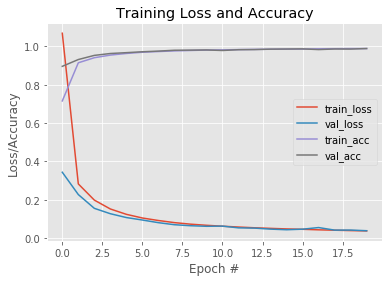

In [5]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testData, batch_size=128)
print(classification_report(
    testLabels.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in le.classes_]
))

#plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
